In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
Ncols = 14

names= [str(i) for i in range(Ncols)]

condos = pd.read_csv("TorontoCondos-August2020.csv")
homes = pd.read_csv("TorontoHomes-August2020.csv")

condo_coords = pd.read_csv("condo_coordinates.txt", names = names)

In [3]:
homes = homes.drop(columns = 'Unnamed: 0')
condos = condos.drop(columns = 'Unnamed: 0')
homes = homes.dropna(axis = 0, subset = ['Floor Area (m^2)', 'Price'])
condos = condos.dropna(axis = 0, subset = ['Floor Area (m^2)', 'Price', 'Condo Fees', 'Bedrooms', 'Bathrooms'])
homes.columns

Index(['Address', 'Style', 'Building Type', 'Basement Development',
       'Exterior Finish', 'Fireplace', 'OwnershipType', 'Property Type',
       'Bedrooms', 'Bathrooms', 'Amenities Nearby', 'Lot Size', 'Parking Type',
       'No. of Parking Spaces', 'Storeys', 'Floor Area (m^2)', 'Features',
       'Condo Fees', 'Community Features', 'Price'],
      dtype='object')

In [4]:
condos['Floor Area (m^2)'] = condos['Floor Area (m^2)'].apply(lambda x: round(x*10.75))
condos = condos.rename({'Floor Area (m^2)': 'Floor Area (sqft)'}, axis = 1)
condos.sort_values(by = 'Floor Area (sqft)', ascending = False, axis = 0)

Address      Style  \
2    #3703 -2045 LAKE SHORE BLVD W, Toronto, Ontari...  Apartment   
881  #601 -452 SCARBOROUGH GOLF CLU RD, Toronto, On...  Apartment   
513  #708 -44 LONGBOURNE  RD, Toronto, Ontario, M9R...  Apartment   
649  #203 -25 SILVER SPRINGS BLVD, Toronto, Ontario...  Apartment   
894  #1009 -225 WELLESLEY ST E, Toronto, Ontario, M...  Apartment   
..                                                 ...        ...   
628  #1411 -101 ERSKINE AVE, Toronto, Ontario, M4P 0C5  Apartment   
611  #2002 -20 THOMAS RILEY RD, Toronto, Ontario, M...  Apartment   
65       #304 -660 PAPE AVE, Toronto, Ontario, M4K 3S5  Apartment   
823       3108-1 Palace Pier CRT, Toronto, ON, M8V 3W9  Apartment   
812   #807 -138 PRINCESS ST, Toronto, Ontario, M5A 0B1  Apartment   

    Building Type Basement Development Exterior Finish  Fireplace  \
2       Apartment                  NaN        Concrete        NaN   
881     Apartment                  NaN           Brick        NaN   
513     Apartment                  NaN           Brick        NaN   
649     Apartment                  NaN        Concrete        NaN   
894     Apartment                  NaN        Concrete        NaN   
..            ...                  ...             ...        ...   
628     Apartment                  NaN        Concrete        NaN   
611     Apartment                  NaN        Concrete        NaN   
65      Apartment                  NaN           Brick        NaN   
823           NaN                  NaN             NaN        NaN   
812     Apartment                  NaN        Concrete        NaN   

          OwnershipType  Property Type Bedrooms  Bathrooms  \
2    Condominium/Strata  Single Family        3        4.0   
881  Condominium/Strata  Single Family      2+1        2.0   
513  Condominium/Strata  Single Family        2        2.0   
649  Condominium/Strata  Single Family      2+1        2.0   
894  Condominium/Strata  Single Family      1+1        2.0   
..                  ...            ...      ...        ...   
628  Condominium/Strata  Single Family        1        1.0   
611  Condominium/Strata  Single Family        2        2.0   
65   Condominium/Strata  Single Family      1+1        2.0   
823                 NaN            NaN        2        2.0   
812  Condominium/Strata  Single Family      1+1        2.0   

                            Amenities Nearby Lot Size  \
2               Marina, Park, Public Transit      NaN   
881                                 Hospital      NaN   
513            Park, Public Transit, Schools      NaN   
649  Hospital, Park, Public Transit, Schools      NaN   
894           Hospital, Park, Public Transit      NaN   
..                                       ...      ...   
628            Park, Public Transit, Schools      NaN   
611                           Public Transit      NaN   
65             Park, Public Transit, Schools      NaN   
823                                      NaN      NaN   
812            Park, Public Transit, Schools      NaN   

                     Parking Type  No. of Parking Spaces  Storeys  \
2                     Underground                    NaN      1.0   
881  Underground, Visitor parking                    NaN      1.0   
513  Underground, Visitor parking                    NaN      1.0   
649  Underground, Visitor parking                    NaN      1.0   
894  Underground, Visitor parking                    NaN      1.0   
..                            ...                    ...      ...   
628  Underground, Visitor parking                    NaN      1.0   
611  Underground, Visitor parking                    NaN      0.0   
65                    Underground                    NaN      0.0   
823                   Underground                    1.0      0.0   
812  Underground, Visitor parking                    NaN      0.0   

     Floor Area (sqft)                          Features      Condo Fees  \
2                35389                           Balco

In [5]:
# Some Square Footage computations appeared unreasonable. Some listings provided several names for the same room,
# which gave the appearance of a larger square footage than was actually there. To accomadate this, I set some 'reasonable'
# threshold.

threshold = 2500

condos = condos[condos['Floor Area (sqft)'] < threshold]
condos

Address      Style  \
0     #2506 -183 WELLINGTON ST W, Toronto, Ontario, ...  Apartment   
1     #PH 1027 -55 STEWART ST, Toronto, Ontario, M5V...  Apartment   
3     #1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...  Apartment   
4       #4901 -2191 YONGE ST, Toronto, Ontario, M4S 3H8  Apartment   
5     #1801 -210 VICTORIA  ST, Toronto, Ontario, M5B...  Apartment   
...                                                 ...        ...   
1005       12-48 Three Valleys Dr, Toronto, ON, M3A 3B5  Townhouse   
1006        #412 -12 REAN DR, Toronto, Ontario, M2K 3C6  Apartment   
1007  #2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...  Apartment   
1009       1516-105 The Queensway, Toronto, ON, M6S 5B5  Apartment   
1010  #207 -8835 SHEPPARD AVE E, Toronto, Ontario, M...  Townhouse   

        Building Type Basement Development Exterior Finish  Fireplace  \
0           Apartment                  NaN        Concrete        NaN   
1           Apartment                  NaN           Brick        NaN   
3           Apartment                  NaN        Concrete        NaN   
4           Apartment                  NaN        Concrete        NaN   
5           Apartment                  NaN        Concrete        NaN   
...               ...                  ...             ...        ...   
1005              NaN                  NaN             NaN        NaN   
1006        Apartment                  NaN          Stucco        NaN   
1007        Apartment                  NaN           Brick        NaN   
1009              NaN                  NaN             NaN        NaN   
1010  Row / Townhouse                  NaN   Brick, Stucco        NaN   

               OwnershipType  Property Type Bedrooms  Bathrooms  \
0         Condominium/Strata  Single Family        2        3.0   
1         Condominium/Strata  Single Family      2+1        3.0   
3         Condominium/Strata  Single Family        3        2.0   
4         Condominium/Strata  Single Family      2+1        3.0   
5     Shares in Co-operative  Single Family        2        3.0   
...                      ...            ...      ...        ...   
1005                     NaN            NaN        3        2.0   
1006      Condominium/Strata  Single Family      1+1        1.0   
1007      Condominium/Strata  Single Family      1+1        1.0   
1009                     NaN            NaN      1+1        1.0   
1010      Condominium/Strata  Single Family      1+1        2.0   

                    Amenities Nearby Lot Size                  Parking Type  \
0     Hospital, Park, Public Transit      NaN  Underground, Visitor parking   
1                                NaN      NaN                   Underground   
3       Marina, Park, Public Transit      NaN  Underground, Visitor parking   
4      Park, Public Transit, Schools      NaN                   Underground   
5     Hospital, Park, Public Transit      NaN                   Underground   
...                              ...      ...                           ...   
1005                             NaN      NaN                     Exclusive   
1006                             NaN      NaN  Underground, Visitor parking   
1007                             NaN      NaN  Underground, Visitor parking   
1009                             NaN      NaN                         Owned   
1010  Hospital, Park, Public Transit      NaN                   Underground   

      No. of Parking Spaces  Storeys  Floor Area (sqft) Features  \
0                       NaN      1.0               1731      NaN   
1                       NaN      2.0               1656      NaN   
3                       NaN      1.0                911      NaN   
4                       NaN      5.0                897      NaN   
5                       NaN      1.0                687      NaN   
...                     ...      ...                ...      ...   
1005                    1.0      2.0                938      NaN   
1006                    NaN     

In [6]:
condos['Price'] = condos['Price'].str.replace('$', '')
condos['Price'] = condos['Price'].str.replace(',', '').astype(int)
condos = condos.rename({'Price': 'Price ($)'}, axis = 1)

# Want to align index with Latitude / Longitude Dataframe so we will reset it
condos = condos.reset_index(drop = True)
condos

Address      Style  \
0    #2506 -183 WELLINGTON ST W, Toronto, Ontario, ...  Apartment   
1    #PH 1027 -55 STEWART ST, Toronto, Ontario, M5V...  Apartment   
2    #1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...  Apartment   
3      #4901 -2191 YONGE ST, Toronto, Ontario, M4S 3H8  Apartment   
4    #1801 -210 VICTORIA  ST, Toronto, Ontario, M5B...  Apartment   
..                                                 ...        ...   
671       12-48 Three Valleys Dr, Toronto, ON, M3A 3B5  Townhouse   
672        #412 -12 REAN DR, Toronto, Ontario, M2K 3C6  Apartment   
673  #2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...  Apartment   
674       1516-105 The Queensway, Toronto, ON, M6S 5B5  Apartment   
675  #207 -8835 SHEPPARD AVE E, Toronto, Ontario, M...  Townhouse   

       Building Type Basement Development Exterior Finish  Fireplace  \
0          Apartment                  NaN        Concrete        NaN   
1          Apartment                  NaN           Brick        NaN   
2          Apartment                  NaN        Concrete        NaN   
3          Apartment                  NaN        Concrete        NaN   
4          Apartment                  NaN        Concrete        NaN   
..               ...                  ...             ...        ...   
671              NaN                  NaN             NaN        NaN   
672        Apartment                  NaN          Stucco        NaN   
673        Apartment                  NaN           Brick        NaN   
674              NaN                  NaN             NaN        NaN   
675  Row / Townhouse                  NaN   Brick, Stucco        NaN   

              OwnershipType  Property Type Bedrooms  Bathrooms  \
0        Condominium/Strata  Single Family        2        3.0   
1        Condominium/Strata  Single Family      2+1        3.0   
2        Condominium/Strata  Single Family        3        2.0   
3        Condominium/Strata  Single Family      2+1        3.0   
4    Shares in Co-operative  Single Family        2        3.0   
..                      ...            ...      ...        ...   
671                     NaN            NaN        3        2.0   
672      Condominium/Strata  Single Family      1+1        1.0   
673      Condominium/Strata  Single Family      1+1        1.0   
674                     NaN            NaN      1+1        1.0   
675      Condominium/Strata  Single Family      1+1        2.0   

                   Amenities Nearby Lot Size                  Parking Type  \
0    Hospital, Park, Public Transit      NaN  Underground, Visitor parking   
1                               NaN      NaN                   Underground   
2      Marina, Park, Public Transit      NaN  Underground, Visitor parking   
3     Park, Public Transit, Schools      NaN                   Underground   
4    Hospital, Park, Public Transit      NaN                   Underground   
..                              ...      ...                           ...   
671                             NaN      NaN                     Exclusive   
672                             NaN      NaN  Underground, Visitor parking   
673                             NaN      NaN  Underground, Visitor parking   
674                             NaN      NaN                         Owned   
675  Hospital, Park, Public Transit      NaN                   Underground   

     No. of Parking Spaces  Storeys  Floor Area (sqft) Features  \
0                      NaN      1.0               1731      NaN   
1                      NaN      2.0               1656      NaN   
2                      NaN      1.0                911      NaN   
3                      NaN      5.0                897      NaN   
4                      NaN      1.0                687      NaN   
..                     ...      ...                ...      ...   
671                    1.0      2.0                938      NaN   
672                    NaN      1.0                836  Balcony   
673                 

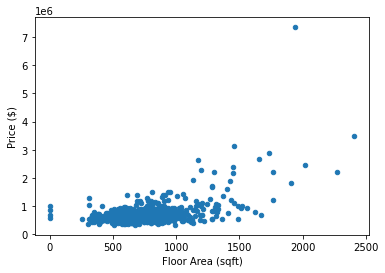

In [7]:
# We can see how much of an effect Square Footage has on Price
condos.plot(x = 'Floor Area (sqft)', y = 'Price ($)', kind = 'scatter')

In [8]:
condos['Postal Code'] = condos['Address'].str[-7:-1] + condos['Address'].str[-1]

condo_coords = condo_coords[['0', '1']]
condo_coords = condo_coords.rename({"0": "Latitude", "1": "Longitude"}, axis = 1)

condos = pd.concat([condos, condo_coords], axis = 1)

condos = condos[condos['Condo Fees ($ Monthly)'] < 3000]
condos.sort_values(by = 'Floor Area (sqft)', ascending = False)

Address      Style Building Type  \
0  #2506 -183 WELLINGTON ST W, Toronto, Ontario, ...  Apartment     Apartment   
1  #PH 1027 -55 STEWART ST, Toronto, Ontario, M5V...  Apartment     Apartment   
2  #1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...  Apartment     Apartment   
3    #4901 -2191 YONGE ST, Toronto, Ontario, M4S 3H8  Apartment     Apartment   
4  #1801 -210 VICTORIA  ST, Toronto, Ontario, M5B...  Apartment     Apartment   

  Basement Development Exterior Finish  Fireplace           OwnershipType  \
0                  NaN        Concrete        NaN      Condominium/Strata   
1                  NaN           Brick        NaN      Condominium/Strata   
2                  NaN        Concrete        NaN      Condominium/Strata   
3                  NaN        Concrete        NaN      Condominium/Strata   
4                  NaN        Concrete        NaN  Shares in Co-operative   

   Property Type Bedrooms  Bathrooms  ... No. of Parking Spaces Storeys  \
0  Single Family        2        3.0  ...                   NaN     1.0   
1  Single Family      2+1        3.0  ...                   NaN     2.0   
2  Single Family        3        2.0  ...                   NaN     1.0   
3  Single Family      2+1        3.0  ...                   NaN     5.0   
4  Single Family        2        3.0  ...                   NaN     1.0   

  Floor Area (sqft)  Features      Condo Fees  Community Features Price ($)  \
0              1731       NaN  $2,565 Monthly                 NaN   2890000   
1              1656       NaN  $2,254 Monthly                 NaN   2680000   
2               911       NaN  $1,201 Monthly    Community Centre   1399900   
3               897       NaN    $996 Monthly                 NaN   1399900   
4               687       NaN  $1,176 Monthly                 NaN   1399000   

  Postal Code  Latitude  Longitude  
0     M5V 0A1  43.64542  -79.38736  
1     M5V 2V1  43.64309  -79.40183  
2     M5V 3T1  43.63814  -79.39147  
3     M4S 3H8  43.70565  -79.39738  
4     M5B 2R3  43.65471  -79.37921  

[5 rows x 23 columns]

In [9]:
# Clean up the Condo Fees Column

def condo_fees_converter(condo_fees):
    condo_fees = condo_fees.str.strip()
    condo_fees = condo_fees.where((condo_fees.str[-8:-1] + condo_fees.str[-1]).str.strip() =="Monthly", 
                     other = "na")
    condo_fees = condo_fees.where(condo_fees == "na",
                     other =  condo_fees.str.replace("$", "").str.replace("Monthly", "").str.replace(",", "").str.strip())
    return condo_fees

condos['Condo Fees'] = condo_fees_converter(condos['Condo Fees'])
condos = condos[condos['Condo Fees'] != 'na']
condos['Condo Fees'] = condos['Condo Fees'].astype(int)
condos = condos.rename({'Condo Fees': 'Condo Fees ($ Monthly)'}, axis=1)
condos

Address      Style  \
0    #2506 -183 WELLINGTON ST W, Toronto, Ontario, ...  Apartment   
1    #PH 1027 -55 STEWART ST, Toronto, Ontario, M5V...  Apartment   
2    #1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...  Apartment   
3      #4901 -2191 YONGE ST, Toronto, Ontario, M4S 3H8  Apartment   
4    #1801 -210 VICTORIA  ST, Toronto, Ontario, M5B...  Apartment   
..                                                 ...        ...   
671       12-48 Three Valleys Dr, Toronto, ON, M3A 3B5  Townhouse   
672        #412 -12 REAN DR, Toronto, Ontario, M2K 3C6  Apartment   
673  #2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...  Apartment   
674       1516-105 The Queensway, Toronto, ON, M6S 5B5  Apartment   
675  #207 -8835 SHEPPARD AVE E, Toronto, Ontario, M...  Townhouse   

       Building Type Basement Development Exterior Finish  Fireplace  \
0          Apartment                  NaN        Concrete        NaN   
1          Apartment                  NaN           Brick        NaN   
2          Apartment                  NaN        Concrete        NaN   
3          Apartment                  NaN        Concrete        NaN   
4          Apartment                  NaN        Concrete        NaN   
..               ...                  ...             ...        ...   
671              NaN                  NaN             NaN        NaN   
672        Apartment                  NaN          Stucco        NaN   
673        Apartment                  NaN           Brick        NaN   
674              NaN                  NaN             NaN        NaN   
675  Row / Townhouse                  NaN   Brick, Stucco        NaN   

              OwnershipType  Property Type Bedrooms  Bathrooms  ...  \
0        Condominium/Strata  Single Family        2        3.0  ...   
1        Condominium/Strata  Single Family      2+1        3.0  ...   
2        Condominium/Strata  Single Family        3        2.0  ...   
3        Condominium/Strata  Single Family      2+1        3.0  ...   
4    Shares in Co-operative  Single Family        2        3.0  ...   
..                      ...            ...      ...        ...  ...   
671                     NaN            NaN        3        2.0  ...   
672      Condominium/Strata  Single Family      1+1        1.0  ...   
673      Condominium/Strata  Single Family      1+1        1.0  ...   
674                     NaN            NaN      1+1        1.0  ...   
675      Condominium/Strata  Single Family      1+1        2.0  ...   

    No. of Parking Spaces Storeys Floor Area (sqft)  Features  \
0                     NaN     1.0              1731       NaN   
1                     NaN     2.0              1656       NaN   
2                     NaN     1.0               911       NaN   
3                     NaN     5.0               897       NaN   
4                     NaN     1.0               687       NaN   
..                    ...     ...               ...       ...   
671                   1.0     2.0               938       NaN   
672                   NaN     1.0               836   Balcony   
673                   NaN     1.0               577   Balcony   
674                   1.0     1.0               635       NaN   
675                   NaN     1.0               622       NaN   

     Condo Fees ($ Monthly)  Community Features Price ($)  Postal Code  \
0                      2565                 NaN   2890000      M5V 0A1   
1                      2254                 NaN   2680000      M5V 2V1   
2                      1201    Community Centre   1399900      M5V 3T1   
3                       996                 NaN   1399900      M4S 3H8   
4                      1176                 NaN   1399000      M5B 2R3   
..                      ...                 ...       ...          ...   
671                     543                 NaN    629900      M3A 3B5   
672                     604                 NaN    629900      M2K 3C6   
673                     500                 NaN    61

In [10]:
# Clean up Bedrooms and Bathrooms

print(condos['Bedrooms'].unique())

def bedroom_converter(bedrooms):
    pluses = bedrooms[bedrooms.str.len() != 1]
    singles = bedrooms[bedrooms.str.len() == 1]
    
    pluses = pluses.str[0].astype(int) + 0.5*pluses.str[2].astype(int)
    singles = singles.astype(int)
    
    bedrooms = pd.concat([pluses,singles],axis = 0)
    
    return bedrooms

condos['Bedrooms'] = bedroom_converter(condos['Bedrooms'])
condos[['Bathrooms','Storeys']] = condos[['Bathrooms', 'Storeys']].astype(int)
condos = condos[condos['Storeys'] == 1]
condos

['2' '2+1' '3' '2+2' '1+1' '1' '4' '3+1' '4+1' '3+2' '0' '4+2']


Address      Style  \
0    #2506 -183 WELLINGTON ST W, Toronto, Ontario, ...  Apartment   
2    #1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...  Apartment   
4    #1801 -210 VICTORIA  ST, Toronto, Ontario, M5B...  Apartment   
5       #713 -89 SKYMARK DR, Toronto, Ontario, M2H 3S6  Apartment   
6    #201 -70 ELMSTHORPE AVE, Toronto, Ontario, M5P...  Apartment   
..                                                 ...        ...   
670  #3308 -3303 DON MILLS RD, Toronto, Ontario, M2...  Apartment   
672        #412 -12 REAN DR, Toronto, Ontario, M2K 3C6  Apartment   
673  #2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...  Apartment   
674       1516-105 The Queensway, Toronto, ON, M6S 5B5  Apartment   
675  #207 -8835 SHEPPARD AVE E, Toronto, Ontario, M...  Townhouse   

       Building Type Basement Development Exterior Finish  Fireplace  \
0          Apartment                  NaN        Concrete        NaN   
2          Apartment                  NaN        Concrete        NaN   
4          Apartment                  NaN        Concrete        NaN   
5          Apartment                  NaN           Brick        NaN   
6          Apartment                  NaN           Brick        NaN   
..               ...                  ...             ...        ...   
670        Apartment                  NaN        Concrete        NaN   
672        Apartment                  NaN          Stucco        NaN   
673        Apartment                  NaN           Brick        NaN   
674              NaN                  NaN             NaN        NaN   
675  Row / Townhouse                  NaN   Brick, Stucco        NaN   

              OwnershipType  Property Type  Bedrooms  Bathrooms  ...  \
0        Condominium/Strata  Single Family       2.0          3  ...   
2        Condominium/Strata  Single Family       3.0          2  ...   
4    Shares in Co-operative  Single Family       2.0          3  ...   
5        Condominium/Strata  Single Family       3.0          3  ...   
6        Condominium/Strata  Single Family       2.0          2  ...   
..                      ...            ...       ...        ...  ...   
670      Condominium/Strata  Single Family       2.0          2  ...   
672      Condominium/Strata  Single Family       1.5          1  ...   
673      Condominium/Strata  Single Family       1.5          1  ...   
674                     NaN            NaN       1.5          1  ...   
675      Condominium/Strata  Single Family       1.5          2  ...   

    No. of Parking Spaces Storeys Floor Area (sqft)  \
0                     NaN       1              1731   
2                     NaN       1               911   
4                     NaN       1               687   
5                     NaN       1              1265   
6                     NaN       1               935   
..                    ...     ...               ...   
670                   NaN       1               979   
672                   NaN       1               836   
673                   NaN       1               577   
674                   1.0       1               635   
675                   NaN       1               622   

                             Features  Condo Fees ($ Monthly)  \
0                                 NaN                    2565   
2                                 NaN                    1201   
4                                 NaN                    1176   
5    Conservation/green belt, Balcony                    1112   
6                             Balcony                    1193   
..                                ...                     ...   
670                           Balcony                    1057   
672                           Balcony                     604   
673                           Balcony                     500   
674                               NaN                     656   
675                               NaN                     339   

     Community Features Price ($)  Postal Code

In [11]:
from sklearn.model_selection import train_test_split

input_cols = ['Floor Area (sqft)', 'Bedrooms', 'Bathrooms', 'Condo Fees ($ Monthly)', 'Latitude', 'Longitude']
target_col = 'Price ($)'

X = condos[input_cols]
y = condos[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
predictions = sk_linear_model.predict(X_test)

values = 60

accuracy_table = []
threshold_table = [10000*i for i in range(values)]
accuracy_print = True

for i in range(values):
    accuracy_vec = np.abs(predictions - y_test) < threshold_table[i]
    accuracy = np.sum(accuracy_vec)/accuracy_vec.size
    if accuracy > 0.8 and accuracy_print:
        print("Accuracy greater than 0.9 occurs for +- $" + str(threshold_table[i]))
        accuracy_print =False
        
    accuracy_table.append(accuracy)

plt.plot(threshold_table, accuracy_table)
plt.show()

NameError: name 'sk_linear_model' is not defined

In [2]:
import tensorflow as tf

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [21]:
class FeedForwardNN:
    
    def __init__(self, nodes, num_data):
        """
        A standard feedforward neural network architecture.
        
        layers: (List[Int]: indicates number of nodes in each layer - including input and output layer)
        
        """
        self.nodes = nodes
        self.num_features = nodes[0]
        self.num_outputs = nodes[-1]
        
        self.total_layers = len(nodes) # Total number of layers (Including Input, Hidden and Output)
        
        self.parameters = {}
        self.activations = None
        
        self.X = tf.compat.v1.placeholder("float", shape = [self.num_features, None])
        self.y = tf.compat.v1.placeholder("float", shape = [self.num_outputs, None])
        
    def initialize_params(self, mean = 0, stddev = 1.0):
        
        for i in range(1,self.total_layers):
            
            weights_shape = [self.nodes[i], self.nodes[i-1]]
            weights = tf.Variable(tf.random.normal(weights_shape, mean = mean, stddev = stddev), name = 'W' + str(i))
            
            bias_shape = [self.nodes[i], 1]
            biases = tf.Variable(tf.random.normal(bias_shape, mean = mean, stddev = stddev), name = 'b' + str(i))
            
            self.parameters['W' + str(i)] = weights
            self.parameters['b' + str(i)] = biases
            
    def set_activations(self, activations):
        
        if len(activations) != self.total_layers - 1:
            print("Error: Require " + str(self.total_layers - 1) + " activations, but was given " +  str(len(activations)))
        else:
            self.activations = activations
        
    def forward_propagation(self):
        
        A = self.X
        
        for i in range(1,self.total_layers):
            W = self.parameters['W'+str(i)]
            b = self.parameters['b'+str(i)]
            
            z_OP = tf.add(tf.matmul(W, A), b)
            
            activation = activations[i-1]
            
            if activation == 'relu':
                A = tf.nn.relu(z_OP)
            elif activation == 'sigmoid':
                A = tf.nn.sigmoid(z_OP)
            elif activation == 'tanh':
                A = tf.nn.tanh(z_OP)
            else:
                print("Error: Activation function not found in list")
        
        predictions = A
        
        return predictions
    
    def cost(self, predictions, loss = "l2"):
        
        y = self.y
        
        if loss == "l2":
            cost = tf.nn.l2_loss(predictions-y)
            return cost
        else:
            print("Loss Function not found") 
        

In [22]:
from sklearn.model_selection import train_test_split

input_cols = ['Floor Area (sqft)', 'Bedrooms', 'Bathrooms', 'Condo Fees ($ Monthly)', 'Latitude', 'Longitude']
target_col = 'Price ($)'

X = condos[input_cols]
y = condos[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Training the Model
tf.compat.v1.disable_eager_execution()

X = X_train.to_numpy().T
y = np.reshape(y_train.to_numpy(), newshape = (1,-1))

num_features = X.shape[0]
num_data = X.shape[1]

nodes = [num_features, 30, 20, 1]
activations = ['tanh', 'relu', 'relu']

feed_NN = FeedForwardNN(nodes, num_data)
feed_NN.initialize_params(mean = 0, stddev = 1.0)
feed_NN.set_activations(activations)

predictions = feed_NN.forward_propagation() # Forward Propagate
cost = feed_NN.cost(predictions) # Cost Value

training_epochs = 100000

learn_rate = tf.compat.v1.train.exponential_decay(learning_rate = 100.0, 
                                                     global_step = 1, 
                                                     decay_steps = training_epochs/2, 
                                                     decay_rate = 0.001, 
                                                     staircase=False)

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learn_rate,
                                                        beta1=0.91, beta2=0.99, 
                                                        epsilon=1e-08).minimize(cost)

costs = []
epochs = []

display_freq = 100
    
with tf.compat.v1.Session() as sess:
    
    sess.run(tf.compat.v1.global_variables_initializer())
    
    batch_size = 64
    total_batches = int(num_data/batch_size)
        
    x_batches = np.array_split(X, total_batches, axis = 1)
    y_batches = np.array_split(y, total_batches, axis = 1)
    
    for epoch in range(training_epochs):
        
        avg_cost = 0
        
        for i in range(total_batches):
            
            x_batch, y_batch = x_batches[i], y_batches[i]
        
            _, c = sess.run([optimizer, cost], feed_dict = {feed_NN.X: x_batch, feed_NN.y: y_batch})
            
            avg_cost += c
            
        avg_cost = avg_cost / total_batches
        
        if epoch % display_freq == 0:
            
            print("Epoch: {:n}| Cost: {:e}".format(epoch,avg_cost))
            costs.append(avg_cost)
            epochs.append(epoch)
    
    print("Optimization Complete!")

Epoch: 0| Cost: 2.263526e+13
Epoch: 100| Cost: 1.841024e+13
Epoch: 200| Cost: 1.555352e+13
Epoch: 300| Cost: 1.301793e+13
Epoch: 400| Cost: 1.080274e+13
Epoch: 500| Cost: 8.907048e+12
Epoch: 600| Cost: 7.329594e+12
Epoch: 700| Cost: 6.068536e+12
Epoch: 800| Cost: 5.120856e+12
Epoch: 900| Cost: 4.480764e+12
Epoch: 1000| Cost: 4.133387e+12
Epoch: 1100| Cost: 4.023387e+12
Epoch: 1200| Cost: 4.011704e+12
Epoch: 1300| Cost: 4.011185e+12
Epoch: 1400| Cost: 4.011166e+12
Epoch: 1500| Cost: 4.011165e+12
Epoch: 1600| Cost: 4.011165e+12
Epoch: 1700| Cost: 4.011165e+12
Epoch: 1800| Cost: 4.011165e+12
Epoch: 1900| Cost: 4.011165e+12
Epoch: 2000| Cost: 4.011165e+12
Epoch: 2100| Cost: 4.011165e+12
Epoch: 2200| Cost: 4.011165e+12
Epoch: 2300| Cost: 4.011165e+12
Epoch: 2400| Cost: 4.011165e+12
Epoch: 2500| Cost: 4.011165e+12
Epoch: 2600| Cost: 4.011165e+12
Epoch: 2700| Cost: 4.011165e+12
Epoch: 2800| Cost: 4.011165e+12
Epoch: 2900| Cost: 4.011165e+12
Epoch: 3000| Cost: 4.011165e+12
Epoch: 3100| Cost: 4

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\rockh\anaconda3_next\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-42ed198718a2>", line 65, in <module>
    _, c = sess.run([optimizer, cost], feed_dict = {feed_NN.X: x_batch, feed_NN.y: y_batch})
  File "C:\Users\rockh\anaconda3_next\lib\site-packages\tensorflow\python\client\session.py", line 957, in run
    result = self._run(None, fetches, feed_dict, options_ptr,
  File "C:\Users\rockh\anaconda3_next\lib\site-packages\tensorflow\python\client\session.py", line 1180, in _run
    results = self._do_run(handle, final_targets, final_fetches,
  File "C:\Users\rockh\anaconda3_next\lib\site-packages\tensorflow\python\client\session.py", line 1358, in _do_run
    return self._do_call(_run_fn, feeds, fetches, targets, options,
  File "C:\Users\rockh\anaconda3_next\lib\site-packages\tensorflow\python\client\session.py", line 1365, i

TypeError: object of type 'NoneType' has no len()

Accuracy greater than 0.8 occurs for +- $830000


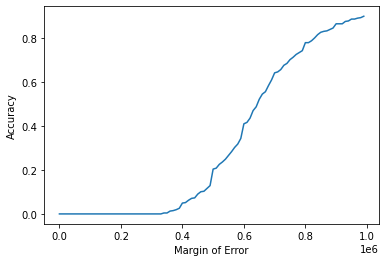

In [43]:
y = np.reshape(y_train.to_numpy(), newshape = (1,-1))

with tf.compat.v1.Session() as sess:
    
    sess.run(tf.compat.v1.global_variables_initializer())
    predictions = sess.run(feed_NN.forward_propagation(), feed_dict = {feed_NN.X: X})

    values = 100
    
    accuracy_table = []
    threshold_table = [10000*i for i in range(values)]
    accuracy_print = True

    for i in range(values):
        accuracy_vec = np.abs(predictions - y) < threshold_table[i]
        accuracy = np.sum(accuracy_vec)/accuracy_vec.size
        if accuracy > 0.8 and accuracy_print:
            print("Accuracy greater than 0.8 occurs for +- $" + str(threshold_table[i]))
            accuracy_print =False

        accuracy_table.append(accuracy)

plt.plot(threshold_table, accuracy_table)
plt.xlabel("Margin of Error")
plt.ylabel("Accuracy")
plt.show()

In [58]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

def keras_NN_model(nodes, activations, leaky_alpha = 0.01):
    
    model =  Sequential()
    model.add(Dense(nodes[1], input_dim = nodes[0], activation = activations[0]))
              
    for i in range(2,len(nodes)):
        if activations[i-1] == 'leaky_relu':
            model.add(Dense(nodes[i]))
            model.add(LeakyReLU(alpha = leaky_alpha))
        else:
            model.add(Dense(nodes[i], activation = activations[i-1]))
              
    return model

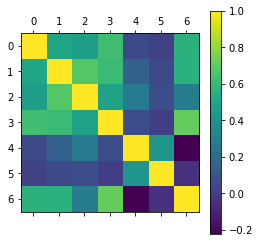

In [59]:
input_cols = ['Floor Area (sqft)', 'Bathrooms', 'Bedrooms', 'Condo Fees ($ Monthly)']
target_col = 'Price ($)'

total_cols = ['Floor Area (sqft)', 'Bathrooms', 'Bedrooms', 'Condo Fees ($ Monthly)', 'Latitude', 'Longitude', target_col]

Xy = condos[total_cols]

plt.matshow(Xy.corr())
cb = plt.colorbar()
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

input_cols = ['Floor Area (sqft)', 'Bedrooms', 'Bathrooms', 'Condo Fees ($ Monthly)']
target_col = 'Price ($)'

X = condos[input_cols]
y = condos[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

num_features = X.shape[1]
num_data = X.shape[0]

nodes = [num_features, 32, 32, 1]
activations = ['tanh', 'leaky_relu', 'relu']

model = keras_NN_model(nodes, activations)
model.compile(loss = 'mse', optimizer = 'Adam')

total_epochs = 10000
batch_size = 64

history = model.fit(X_train,y_train, epochs = total_epochs, batch_size = batch_size)

Train on 465 samples
Epoch 1/10000
465/465 [==============================] - 0s 21us/sample - loss: 634388876387.0968
Epoch 2/10000
465/465 [==============================] - 0s 22us/sample - loss: 634387548895.5182
Epoch 3/10000
465/465 [==============================] - 0s 24us/sample - loss: 634385985967.6215
Epoch 4/10000
465/465 [==============================] - 0s 17us/sample - loss: 634384442136.7742
Epoch 5/10000
465/465 [==============================] - 0s 21us/sample - loss: 634383032619.4924
Epoch 6/10000
465/465 [==============================] - 0s 22us/sample - loss: 634381458205.1785
Epoch 7/10000
465/465 [==============================] - 0s 24us/sample - loss: 634379620378.4258
Epoch 8/10000
465/465 [==============================] - 0s 19us/sample - loss: 634377648097.1699
Epoch 9/10000
465/465 [==============================] - 0s 17us/sample - loss: 634375472865.7205
Epoch 10/10000
465/465 [==============================] - 0s 22us/sample - loss: 634373130552.705

465/465 [==============================] - 0s 19us/sample - loss: 631772750652.0085
Epoch 165/10000
465/465 [==============================] - 0s 22us/sample - loss: 631742934590.7612
Epoch 166/10000
465/465 [==============================] - 0s 22us/sample - loss: 631712866251.1483
Epoch 167/10000
465/465 [==============================] - 0s 22us/sample - loss: 631682881346.6151
Epoch 168/10000
465/465 [==============================] - 0s 22us/sample - loss: 631652152996.0602
Epoch 169/10000
465/465 [==============================] - 0s 24us/sample - loss: 631621895940.9548
Epoch 170/10000
465/465 [==============================] - 0s 24us/sample - loss: 631591250673.1355
Epoch 171/10000
465/465 [==============================] - 0s 21us/sample - loss: 631560753389.8323
Epoch 172/10000
465/465 [==============================] - 0s 24us/sample - loss: 631529734989.6259
Epoch 173/10000
465/465 [==============================] - 0s 24us/sample - loss: 631498857245.1785
Epoch 174/10000


465/465 [==============================] - 0s 22us/sample - loss: 625215546383.4152
Epoch 327/10000
465/465 [==============================] - 0s 19us/sample - loss: 625164978876.2839
Epoch 328/10000
465/465 [==============================] - 0s 19us/sample - loss: 625114331668.9204
Epoch 329/10000
465/465 [==============================] - 0s 22us/sample - loss: 625064345600.0000
Epoch 330/10000
465/465 [==============================] - 0s 22us/sample - loss: 625014285186.4774
Epoch 331/10000
465/465 [==============================] - 0s 24us/sample - loss: 624963884549.5054
Epoch 332/10000
465/465 [==============================] - 0s 26us/sample - loss: 624913713147.5957
Epoch 333/10000
465/465 [==============================] - 0s 24us/sample - loss: 624862908231.0193
Epoch 334/10000
465/465 [==============================] - ETA: 0s - loss: 509382950912.00 - 0s 19us/sample - loss: 624812328109.9700
Epoch 335/10000
465/465 [==============================] - 0s 22us/sample - loss: 

465/465 [==============================] - 0s 19us/sample - loss: 615732587883.3549
Epoch 490/10000
465/465 [==============================] - 0s 22us/sample - loss: 615667558413.2129
Epoch 491/10000
465/465 [==============================] - 0s 22us/sample - loss: 615600493380.8171
Epoch 492/10000
465/465 [==============================] - 0s 24us/sample - loss: 615534453105.9612
Epoch 493/10000
465/465 [==============================] - 0s 15us/sample - loss: 615468092761.7377
Epoch 494/10000
465/465 [==============================] - 0s 19us/sample - loss: 615401829946.3571
Epoch 495/10000
465/465 [==============================] - 0s 22us/sample - loss: 615335916797.2473
Epoch 496/10000
465/465 [==============================] - 0s 21us/sample - loss: 615270615669.8151
Epoch 497/10000
465/465 [==============================] - 0s 24us/sample - loss: 615203997903.0022
Epoch 498/10000
465/465 [==============================] - 0s 19us/sample - loss: 615137543553.3763
Epoch 499/10000


465/465 [==============================] - 0s 17us/sample - loss: 610032611971.0280
Epoch 572/10000
465/465 [==============================] - 0s 21us/sample - loss: 609959693657.7377
Epoch 573/10000
465/465 [==============================] - 0s 21us/sample - loss: 609886272831.3119
Epoch 574/10000
465/465 [==============================] - 0s 24us/sample - loss: 609814422966.2280
Epoch 575/10000
465/465 [==============================] - 0s 22us/sample - loss: 609741705630.0043
Epoch 576/10000
465/465 [==============================] - 0s 19us/sample - loss: 609667857128.3269
Epoch 577/10000
465/465 [==============================] - 0s 19us/sample - loss: 609594588725.9526
Epoch 578/10000
465/465 [==============================] - 0s 19us/sample - loss: 609520617326.6581
Epoch 579/10000
465/465 [==============================] - 0s 22us/sample - loss: 609446878685.8667
Epoch 580/10000
465/465 [==============================] - 0s 19us/sample - loss: 609372474396.6279
Epoch 581/10000


465/465 [==============================] - 0s 21us/sample - loss: 603779542238.4172
Epoch 654/10000
465/465 [==============================] - 0s 17us/sample - loss: 603698602036.8516
Epoch 655/10000
465/465 [==============================] - 0s 24us/sample - loss: 603619128855.1226
Epoch 656/10000
465/465 [==============================] - 0s 24us/sample - loss: 603538703075.9226
Epoch 657/10000
465/465 [==============================] - 0s 24us/sample - loss: 603458617872.5161
Epoch 658/10000
465/465 [==============================] - 0s 22us/sample - loss: 603379022075.0452
Epoch 659/10000
465/465 [==============================] - 0s 21us/sample - loss: 603297882517.1957
Epoch 660/10000
465/465 [==============================] - 0s 24us/sample - loss: 603218155224.9119
Epoch 661/10000
465/465 [==============================] - 0s 22us/sample - loss: 603137321572.1979
Epoch 662/10000
465/465 [==============================] - 0s 17us/sample - loss: 603057206349.0752
Epoch 663/10000


465/465 [==============================] - 0s 21us/sample - loss: 596984614163.2688
Epoch 736/10000
465/465 [==============================] - 0s 22us/sample - loss: 596899283965.7979
Epoch 737/10000
465/465 [==============================] - 0s 17us/sample - loss: 596811360374.9161
Epoch 738/10000
465/465 [==============================] - 0s 24us/sample - loss: 596726105015.3291
Epoch 739/10000
465/465 [==============================] - 0s 24us/sample - loss: 596640153001.0150
Epoch 740/10000
465/465 [==============================] - ETA: 0s - loss: 521980510208.00 - 0s 24us/sample - loss: 596553370864.0344
Epoch 741/10000
465/465 [==============================] - 0s 19us/sample - loss: 596467128941.0065
Epoch 742/10000
465/465 [==============================] - 0s 21us/sample - loss: 596380992298.3915
Epoch 743/10000
465/465 [==============================] - 0s 22us/sample - loss: 596294519519.5183
Epoch 744/10000
465/465 [==============================] - 0s 22us/sample - loss: 

465/465 [==============================] - 0s 15us/sample - loss: 581988247212.8688
Epoch 899/10000
465/465 [==============================] - 0s 24us/sample - loss: 581891815851.2172
Epoch 900/10000
465/465 [==============================] - 0s 19us/sample - loss: 581794279186.1677
Epoch 901/10000
465/465 [==============================] - 0s 19us/sample - loss: 581696654153.2216
Epoch 902/10000
465/465 [==============================] - 0s 24us/sample - loss: 581599254268.1462
Epoch 903/10000
465/465 [==============================] - 0s 19us/sample - loss: 581500366786.3398
Epoch 904/10000
465/465 [==============================] - 0s 15us/sample - loss: 581401422929.4795
Epoch 905/10000
465/465 [==============================] - 0s 21us/sample - loss: 581303706498.4774
Epoch 906/10000
465/465 [==============================] - 0s 24us/sample - loss: 581205680286.5548
Epoch 907/10000
465/465 [==============================] - 0s 22us/sample - loss: 581107637303.0538
Epoch 908/10000


465/465 [==============================] - 0s 19us/sample - loss: 573743249236.2322
Epoch 981/10000
465/465 [==============================] - 0s 19us/sample - loss: 573638695991.0538
Epoch 982/10000
465/465 [==============================] - 0s 22us/sample - loss: 573536785678.8645
Epoch 983/10000
465/465 [==============================] - 0s 17us/sample - loss: 573433010198.0215
Epoch 984/10000
465/465 [==============================] - 0s 21us/sample - loss: 573328410795.7678
Epoch 985/10000
465/465 [==============================] - 0s 19us/sample - loss: 573222687134.0043
Epoch 986/10000
465/465 [==============================] - 0s 22us/sample - loss: 573117428495.9656
Epoch 987/10000
465/465 [==============================] - 0s 17us/sample - loss: 573012577449.5656
Epoch 988/10000
465/465 [==============================] - 0s 19us/sample - loss: 572907595119.7592
Epoch 989/10000
465/465 [==============================] - 0s 19us/sample - loss: 572801622773.5398
Epoch 990/10000


Epoch 1142/10000
465/465 [==============================] - 0s 19us/sample - loss: 556131824012.3871
Epoch 1143/10000
465/465 [==============================] - 0s 22us/sample - loss: 556019333511.9828
Epoch 1144/10000
465/465 [==============================] - 0s 28us/sample - loss: 555905724530.5118
Epoch 1145/10000
465/465 [==============================] - 0s 19us/sample - loss: 555792067912.1205
Epoch 1146/10000
465/465 [==============================] - 0s 24us/sample - loss: 555677396119.9484
Epoch 1147/10000
465/465 [==============================] - 0s 22us/sample - loss: 555563777695.6559
Epoch 1148/10000
465/465 [==============================] - 0s 26us/sample - loss: 555449423154.0989
Epoch 1149/10000
465/465 [==============================] - 0s 24us/sample - loss: 555336363336.1205
Epoch 1150/10000
465/465 [==============================] - 0s 22us/sample - loss: 555222060800.5505
Epoch 1151/10000
465/465 [==============================] - 0s 34us/sample - loss: 55510713

465/465 [==============================] - 0s 19us/sample - loss: 546747442015.2430
Epoch 1224/10000
465/465 [==============================] - 0s 22us/sample - loss: 546629467420.0774
Epoch 1225/10000
465/465 [==============================] - 0s 24us/sample - loss: 546510054979.1656
Epoch 1226/10000
465/465 [==============================] - 0s 19us/sample - loss: 546391208191.4495
Epoch 1227/10000
465/465 [==============================] - 0s 22us/sample - loss: 546272271133.1785
Epoch 1228/10000
465/465 [==============================] - 0s 22us/sample - loss: 546155269571.4409
Epoch 1229/10000
465/465 [==============================] - 0s 22us/sample - loss: 546035498937.5312
Epoch 1230/10000
465/465 [==============================] - 0s 19us/sample - loss: 545918595045.5742
Epoch 1231/10000
465/465 [==============================] - 0s 22us/sample - loss: 545799960087.1226
Epoch 1232/10000
465/465 [==============================] - 0s 19us/sample - loss: 545682215220.3011
Epoch 1

Epoch 1304/10000
465/465 [==============================] - 0s 17us/sample - loss: 536949806491.8022
Epoch 1305/10000
465/465 [==============================] - 0s 15us/sample - loss: 536825704914.8559
Epoch 1306/10000
465/465 [==============================] - 0s 17us/sample - loss: 536701909877.2645
Epoch 1307/10000
465/465 [==============================] - 0s 17us/sample - loss: 536579191744.1376
Epoch 1308/10000
465/465 [==============================] - 0s 24us/sample - loss: 536454825345.3763
Epoch 1309/10000
465/465 [==============================] - 0s 22us/sample - loss: 536332814930.5807
Epoch 1310/10000
465/465 [==============================] - 0s 24us/sample - loss: 536207504320.1376
Epoch 1311/10000
465/465 [==============================] - 0s 22us/sample - loss: 536085423013.7119
Epoch 1312/10000
465/465 [==============================] - 0s 22us/sample - loss: 535960843164.9033
Epoch 1313/10000
465/465 [==============================] - 0s 19us/sample - loss: 53583776

465/465 [==============================] - 0s 24us/sample - loss: 526807180232.9462
Epoch 1386/10000
465/465 [==============================] - 0s 21us/sample - loss: 526676670010.3569
Epoch 1387/10000
465/465 [==============================] - 0s 24us/sample - loss: 526550364380.2151
Epoch 1388/10000
465/465 [==============================] - 0s 24us/sample - loss: 526420804993.3763
Epoch 1389/10000
465/465 [==============================] - 0s 19us/sample - loss: 526293159680.5505
Epoch 1390/10000
465/465 [==============================] - 0s 17us/sample - loss: 526164728851.8193
Epoch 1391/10000
465/465 [==============================] - 0s 24us/sample - loss: 526037517485.9699
Epoch 1392/10000
465/465 [==============================] - 0s 22us/sample - loss: 525909431531.6301
Epoch 1393/10000
465/465 [==============================] - 0s 24us/sample - loss: 525780266699.6989
Epoch 1394/10000
465/465 [==============================] - 0s 22us/sample - loss: 525651890272.8947
Epoch 1

465/465 [==============================] - 0s 28us/sample - loss: 505656520360.4645
Epoch 1547/10000
465/465 [==============================] - 0s 24us/sample - loss: 505519714911.7935
Epoch 1548/10000
465/465 [==============================] - 0s 24us/sample - loss: 505387303510.9850
Epoch 1549/10000
465/465 [==============================] - 0s 21us/sample - loss: 505251172695.5355
Epoch 1550/10000
465/465 [==============================] - 0s 24us/sample - loss: 505117260308.9204
Epoch 1551/10000
465/465 [==============================] - 0s 22us/sample - loss: 504983246235.8022
Epoch 1552/10000
465/465 [==============================] - 0s 22us/sample - loss: 504850532136.1893
Epoch 1553/10000
465/465 [==============================] - 0s 21us/sample - loss: 504717000175.4838
Epoch 1554/10000
465/465 [==============================] - 0s 17us/sample - loss: 504582852423.0194
Epoch 1555/10000
465/465 [==============================] - 0s 24us/sample - loss: 504447842202.7010
Epoch 1

Epoch 1708/10000
465/465 [==============================] - 0s 17us/sample - loss: 483239322181.3677
Epoch 1709/10000
465/465 [==============================] - 0s 22us/sample - loss: 483097332306.5807
Epoch 1710/10000
465/465 [==============================] - 0s 19us/sample - loss: 482954360801.1699
Epoch 1711/10000
465/465 [==============================] - 0s 22us/sample - loss: 482811044985.1183
Epoch 1712/10000
465/465 [==============================] - 0s 22us/sample - loss: 482667352724.6452
Epoch 1713/10000
465/465 [==============================] - 0s 21us/sample - loss: 482522777137.5484
Epoch 1714/10000
465/465 [==============================] - 0s 22us/sample - loss: 482378147571.3376
Epoch 1715/10000
465/465 [==============================] - 0s 24us/sample - loss: 482236032262.0559
Epoch 1716/10000
465/465 [==============================] - 0s 19us/sample - loss: 482094910704.0344
Epoch 1717/10000
465/465 [==============================] - 0s 22us/sample - loss: 48195292

465/465 [==============================] - 0s 19us/sample - loss: 471641605329.2043
Epoch 1790/10000
465/465 [==============================] - 0s 19us/sample - loss: 471497177444.7484
Epoch 1791/10000
465/465 [==============================] - 0s 24us/sample - loss: 471351767436.3871
Epoch 1792/10000
465/465 [==============================] - 0s 19us/sample - loss: 471207696969.7720
Epoch 1793/10000
465/465 [==============================] - 0s 22us/sample - loss: 471061843078.3312
Epoch 1794/10000
465/465 [==============================] - 0s 19us/sample - loss: 470918343761.4796
Epoch 1795/10000
465/465 [==============================] - 0s 24us/sample - loss: 470773749852.4904
Epoch 1796/10000
465/465 [==============================] - 0s 22us/sample - loss: 470630268646.1248
Epoch 1797/10000
465/465 [==============================] - 0s 26us/sample - loss: 470484783236.1290
Epoch 1798/10000
465/465 [==============================] - 0s 19us/sample - loss: 470340590787.9914
Epoch 1

Epoch 1870/10000
465/465 [==============================] - 0s 21us/sample - loss: 459823633608.3958
Epoch 1871/10000
465/465 [==============================] - 0s 22us/sample - loss: 459675985862.7441
Epoch 1872/10000
465/465 [==============================] - 0s 24us/sample - loss: 459528911239.9828
Epoch 1873/10000
465/465 [==============================] - 0s 24us/sample - loss: 459382737067.7678
Epoch 1874/10000
465/465 [==============================] - 0s 19us/sample - loss: 459233644218.0817
Epoch 1875/10000
465/465 [==============================] - 0s 22us/sample - loss: 459086615681.9269
Epoch 1876/10000
465/465 [==============================] - 0s 22us/sample - loss: 458936942803.4064
Epoch 1877/10000
465/465 [==============================] - 0s 24us/sample - loss: 458787766518.6409
Epoch 1878/10000
465/465 [==============================] - 0s 17us/sample - loss: 458641012176.6537
Epoch 1879/10000
465/465 [==============================] - 0s 19us/sample - loss: 45849386

465/465 [==============================] - 0s 24us/sample - loss: 447812359297.9269
Epoch 1952/10000
465/465 [==============================] - 0s 26us/sample - loss: 447666506815.8624
Epoch 1953/10000
465/465 [==============================] - 0s 22us/sample - loss: 447515820525.2817
Epoch 1954/10000
465/465 [==============================] - 0s 28us/sample - loss: 447364341319.5699
Epoch 1955/10000
465/465 [==============================] - 0s 19us/sample - loss: 447215586931.6129
Epoch 1956/10000
465/465 [==============================] - 0s 28us/sample - loss: 447066046464.0000
Epoch 1957/10000
465/465 [==============================] - 0s 22us/sample - loss: 446916307556.1978
Epoch 1958/10000
465/465 [==============================] - 0s 28us/sample - loss: 446767632586.5978
Epoch 1959/10000
465/465 [==============================] - 0s 24us/sample - loss: 446618150467.1656
Epoch 1960/10000
465/465 [==============================] - 0s 24us/sample - loss: 446470894034.8559
Epoch 1

Epoch 2113/10000
465/465 [==============================] - 0s 17us/sample - loss: 423255077824.1376
Epoch 2114/10000
465/465 [==============================] - 0s 17us/sample - loss: 423101645117.1097
Epoch 2115/10000
465/465 [==============================] - 0s 22us/sample - loss: 422948797547.9054
Epoch 2116/10000
465/465 [==============================] - 0s 22us/sample - loss: 422796511897.0495
Epoch 2117/10000
465/465 [==============================] - 0s 19us/sample - loss: 422639374186.2538
Epoch 2118/10000
465/465 [==============================] - 0s 19us/sample - loss: 422483335789.0064
Epoch 2119/10000
465/465 [==============================] - 0s 24us/sample - loss: 422331756799.4495
Epoch 2120/10000
465/465 [==============================] - 0s 19us/sample - loss: 422179054713.1183
Epoch 2121/10000
465/465 [==============================] - 0s 22us/sample - loss: 422024196562.8559
Epoch 2122/10000
465/465 [==============================] - 0s 26us/sample - loss: 42187326

465/465 [==============================] - 0s 24us/sample - loss: 398393745601.7892
Epoch 2275/10000
465/465 [==============================] - 0s 24us/sample - loss: 398235991077.4366
Epoch 2276/10000
465/465 [==============================] - 0s 22us/sample - loss: 398082398370.9592
Epoch 2277/10000
465/465 [==============================] - 0s 24us/sample - loss: 397928314778.7010
Epoch 2278/10000
465/465 [==============================] - 0s 19us/sample - loss: 397772571716.2667
Epoch 2279/10000
465/465 [==============================] - 0s 21us/sample - loss: 397615527130.0129
Epoch 2280/10000
465/465 [==============================] - 0s 24us/sample - loss: 397460432697.8065
Epoch 2281/10000
465/465 [==============================] - 0s 24us/sample - loss: 397304978487.0538
Epoch 2282/10000
465/465 [==============================] - 0s 26us/sample - loss: 397150964976.0344
Epoch 2283/10000
465/465 [==============================] - 0s 19us/sample - loss: 396993449939.9570
Epoch 2

Epoch 2435/10000
465/465 [==============================] - 0s 17us/sample - loss: 373213252037.6431
Epoch 2436/10000
465/465 [==============================] - 0s 19us/sample - loss: 373055562344.6021
Epoch 2437/10000
465/465 [==============================] - 0s 17us/sample - loss: 372899831402.8043
Epoch 2438/10000
465/465 [==============================] - 0s 15us/sample - loss: 372741333890.4774
Epoch 2439/10000
465/465 [==============================] - 0s 17us/sample - loss: 372584989341.4538
Epoch 2440/10000
465/465 [==============================] - 0s 15us/sample - loss: 372428153871.4150
Epoch 2441/10000
465/465 [==============================] - 0s 19us/sample - loss: 372272662065.5484
Epoch 2442/10000
465/465 [==============================] - 0s 22us/sample - loss: 372116180736.5505
Epoch 2443/10000
465/465 [==============================] - 0s 17us/sample - loss: 371958199408.3097
Epoch 2444/10000
465/465 [==============================] - 0s 19us/sample - loss: 37180388

465/465 [==============================] - 0s 15us/sample - loss: 360514578233.8065
Epoch 2517/10000
465/465 [==============================] - 0s 19us/sample - loss: 360355875974.3312
Epoch 2518/10000
465/465 [==============================] - 0s 22us/sample - loss: 360197668758.2968
Epoch 2519/10000
465/465 [==============================] - 0s 19us/sample - loss: 360041779120.7226
Epoch 2520/10000
465/465 [==============================] - 0s 22us/sample - loss: 359886276709.2990
Epoch 2521/10000
465/465 [==============================] - 0s 22us/sample - loss: 359729003980.2495
Epoch 2522/10000
465/465 [==============================] - 0s 21us/sample - loss: 359572808190.8989
Epoch 2523/10000
465/465 [==============================] - 0s 19us/sample - loss: 359417286012.9720
Epoch 2524/10000
465/465 [==============================] - 0s 22us/sample - loss: 359259878829.4193
Epoch 2525/10000
465/465 [==============================] - 0s 19us/sample - loss: 359102633230.8646
Epoch 2

465/465 [==============================] - 0s 17us/sample - loss: 335290627113.8409
Epoch 2679/10000
465/465 [==============================] - 0s 19us/sample - loss: 335133873669.5054
Epoch 2680/10000
465/465 [==============================] - 0s 19us/sample - loss: 334975863554.7527
Epoch 2681/10000
465/465 [==============================] - 0s 17us/sample - loss: 334820263403.0796
Epoch 2682/10000
465/465 [==============================] - 0s 22us/sample - loss: 334664764374.1591
Epoch 2683/10000
465/465 [==============================] - 0s 22us/sample - loss: 334509681393.1354
Epoch 2684/10000
465/465 [==============================] - 0s 19us/sample - loss: 334353666462.0043
Epoch 2685/10000
465/465 [==============================] - 0s 22us/sample - loss: 334196343136.3441
Epoch 2686/10000
465/465 [==============================] - 0s 24us/sample - loss: 334040147628.8688
Epoch 2687/10000
465/465 [==============================] - 0s 24us/sample - loss: 333885756686.8646
Epoch 2

Epoch 2840/10000
465/465 [==============================] - 0s 15us/sample - loss: 310314887921.1354
Epoch 2841/10000
465/465 [==============================] - 0s 19us/sample - loss: 310161748047.2774
Epoch 2842/10000
465/465 [==============================] - 0s 17us/sample - loss: 310011599398.5376
Epoch 2843/10000
465/465 [==============================] - 0s 19us/sample - loss: 309859244970.1161
Epoch 2844/10000
465/465 [==============================] - 0s 17us/sample - loss: 309709721732.1290
Epoch 2845/10000
465/465 [==============================] - 0s 19us/sample - loss: 309554959419.4581
Epoch 2846/10000
465/465 [==============================] - 0s 26us/sample - loss: 309403797499.5957
Epoch 2847/10000
465/465 [==============================] - 0s 17us/sample - loss: 309253483883.3548
Epoch 2848/10000
465/465 [==============================] - 0s 19us/sample - loss: 309098609842.3742
Epoch 2849/10000
465/465 [==============================] - 0s 22us/sample - loss: 30894838

465/465 [==============================] - 0s 24us/sample - loss: 298040136798.6924
Epoch 2922/10000
465/465 [==============================] - 0s 22us/sample - loss: 297888146236.0086
Epoch 2923/10000
465/465 [==============================] - 0s 24us/sample - loss: 297742558346.7355
Epoch 2924/10000
465/465 [==============================] - 0s 17us/sample - loss: 297591138317.2129
Epoch 2925/10000
465/465 [==============================] - 0s 22us/sample - loss: 297442941267.1312
Epoch 2926/10000
465/465 [==============================] - 0s 26us/sample - loss: 297292845928.0516
Epoch 2927/10000
465/465 [==============================] - 0s 19us/sample - loss: 297142113339.4581
Epoch 2928/10000
465/465 [==============================] - 0s 19us/sample - loss: 296991915221.6086
Epoch 2929/10000
465/465 [==============================] - 0s 22us/sample - loss: 296841607313.3419
Epoch 2930/10000
465/465 [==============================] - 0s 17us/sample - loss: 296690476857.8065
Epoch 2

Epoch 3083/10000
465/465 [==============================] - 0s 22us/sample - loss: 274013877430.7785
Epoch 3084/10000
465/465 [==============================] - 0s 19us/sample - loss: 273865745071.0710
Epoch 3085/10000
465/465 [==============================] - 0s 19us/sample - loss: 273722740198.6753
Epoch 3086/10000
465/465 [==============================] - 0s 19us/sample - loss: 273576535865.8065
Epoch 3087/10000
465/465 [==============================] - 0s 22us/sample - loss: 273431334727.0193
Epoch 3088/10000
465/465 [==============================] - 0s 22us/sample - loss: 273287783897.4624
Epoch 3089/10000
465/465 [==============================] - 0s 22us/sample - loss: 273139969316.8860
Epoch 3090/10000
465/465 [==============================] - 0s 22us/sample - loss: 272993193975.1914
Epoch 3091/10000
465/465 [==============================] - 0s 21us/sample - loss: 272848894343.9828
Epoch 3092/10000
465/465 [==============================] - 0s 22us/sample - loss: 27270381

465/465 [==============================] - 0s 22us/sample - loss: 250950112209.7548
Epoch 3245/10000
465/465 [==============================] - 0s 24us/sample - loss: 250808577633.9957
Epoch 3246/10000
465/465 [==============================] - 0s 22us/sample - loss: 250673148793.6688
Epoch 3247/10000
465/465 [==============================] - 0s 19us/sample - loss: 250532592571.7333
Epoch 3248/10000
465/465 [==============================] - 0s 24us/sample - loss: 250395569303.9484
Epoch 3249/10000
465/465 [==============================] - 0s 24us/sample - loss: 250257932640.3441
Epoch 3250/10000
465/465 [==============================] - 0s 24us/sample - loss: 250118099393.2387
Epoch 3251/10000
465/465 [==============================] - 0s 19us/sample - loss: 249984272555.7677
Epoch 3252/10000
465/465 [==============================] - 0s 24us/sample - loss: 249845369778.9247
Epoch 3253/10000
465/465 [==============================] - 0s 22us/sample - loss: 249701570546.7871
Epoch 3

Epoch 3325/10000
465/465 [==============================] - 0s 49us/sample - loss: 239839965650.8559
Epoch 3326/10000
465/465 [==============================] - 0s 37us/sample - loss: 239705798413.7635
Epoch 3327/10000
465/465 [==============================] - 0s 45us/sample - loss: 239572916501.4710
Epoch 3328/10000
465/465 [==============================] - 0s 41us/sample - loss: 239436482027.0796
Epoch 3329/10000
465/465 [==============================] - 0s 37us/sample - loss: 239305193088.8258
Epoch 3330/10000
465/465 [==============================] - 0s 28us/sample - loss: 239167404670.6237
Epoch 3331/10000
465/465 [==============================] - 0s 26us/sample - loss: 239036755589.2301
Epoch 3332/10000
465/465 [==============================] - 0s 34us/sample - loss: 238903482989.0064
Epoch 3333/10000
465/465 [==============================] - 0s 34us/sample - loss: 238768832820.3011
Epoch 3334/10000
465/465 [==============================] - 0s 39us/sample - loss: 23863632

465/465 [==============================] - 0s 19us/sample - loss: 229047568908.1118
Epoch 3407/10000
465/465 [==============================] - 0s 17us/sample - loss: 228915095847.0882
Epoch 3408/10000
465/465 [==============================] - 0s 17us/sample - loss: 228784067291.1140
Epoch 3409/10000
465/465 [==============================] - 0s 26us/sample - loss: 228655091033.7376
Epoch 3410/10000
465/465 [==============================] - 0s 17us/sample - loss: 228520536605.7290
Epoch 3411/10000
465/465 [==============================] - 0s 21us/sample - loss: 228390967846.5376
Epoch 3412/10000
465/465 [==============================] - 0s 19us/sample - loss: 228262778620.1462
Epoch 3413/10000
465/465 [==============================] - 0s 26us/sample - loss: 228127640992.2065
Epoch 3414/10000
465/465 [==============================] - 0s 24us/sample - loss: 228001587658.0473
Epoch 3415/10000
465/465 [==============================] - 0s 30us/sample - loss: 227867232885.8151
Epoch 3

465/465 [==============================] - 0s 19us/sample - loss: 208699366181.9871
Epoch 3568/10000
465/465 [==============================] - 0s 19us/sample - loss: 208583244097.5140
Epoch 3569/10000
465/465 [==============================] - 0s 17us/sample - loss: 208465420023.7419
Epoch 3570/10000
465/465 [==============================] - 0s 19us/sample - loss: 208346095105.1011
Epoch 3571/10000
465/465 [==============================] - 0s 19us/sample - loss: 208223301781.7462
Epoch 3572/10000
465/465 [==============================] - 0s 28us/sample - loss: 208104559217.4107
Epoch 3573/10000
465/465 [==============================] - 0s 22us/sample - loss: 207983101700.9548
Epoch 3574/10000
465/465 [==============================] - 0s 15us/sample - loss: 207860633873.0667
Epoch 3575/10000
465/465 [==============================] - 0s 19us/sample - loss: 207737230219.2860
Epoch 3576/10000
465/465 [==============================] - 0s 21us/sample - loss: 207615169630.6925
Epoch 3

Epoch 3728/10000
465/465 [==============================] - 0s 30us/sample - loss: 189990247901.8666
Epoch 3729/10000
465/465 [==============================] - 0s 21us/sample - loss: 189881474076.6280
Epoch 3730/10000
465/465 [==============================] - 0s 26us/sample - loss: 189773261341.7290
Epoch 3731/10000
465/465 [==============================] - 0s 24us/sample - loss: 189661272279.8108
Epoch 3732/10000
465/465 [==============================] - 0s 28us/sample - loss: 189555353815.8108
Epoch 3733/10000
465/465 [==============================] - 0s 17us/sample - loss: 189443897066.5290
Epoch 3734/10000
465/465 [==============================] - 0s 24us/sample - loss: 189337362766.7269
Epoch 3735/10000
465/465 [==============================] - 0s 24us/sample - loss: 189225943092.8516
Epoch 3736/10000
465/465 [==============================] - 0s 26us/sample - loss: 189113453843.2688
Epoch 3737/10000
465/465 [==============================] - 0s 24us/sample - loss: 18900380

465/465 [==============================] - 0s 45us/sample - loss: 181326065205.9527
Epoch 3810/10000
465/465 [==============================] - 0s 41us/sample - loss: 181221226923.2172
Epoch 3811/10000
465/465 [==============================] - 0s 24us/sample - loss: 181120365592.2236
Epoch 3812/10000
465/465 [==============================] - 0s 43us/sample - loss: 181013649659.0452
Epoch 3813/10000
465/465 [==============================] - 0s 32us/sample - loss: 180913053396.5075
Epoch 3814/10000
465/465 [==============================] - 0s 45us/sample - loss: 180809617143.7419
Epoch 3815/10000
465/465 [==============================] - 0s 39us/sample - loss: 180707846403.8538
Epoch 3816/10000
465/465 [==============================] - 0s 43us/sample - loss: 180606447140.3355
Epoch 3817/10000
465/465 [==============================] - 0s 45us/sample - loss: 180505431597.1441
Epoch 3818/10000
465/465 [==============================] - 0s 43us/sample - loss: 180401534117.1613
Epoch 3

465/465 [==============================] - 0s 30us/sample - loss: 165447916480.1376
Epoch 3972/10000
465/465 [==============================] - 0s 24us/sample - loss: 165358263914.8043
Epoch 3973/10000
465/465 [==============================] - 0s 37us/sample - loss: 165268627667.4065
Epoch 3974/10000
465/465 [==============================] - 0s 32us/sample - loss: 165179180360.1205
Epoch 3975/10000
465/465 [==============================] - 0s 24us/sample - loss: 165091427167.2430
Epoch 3976/10000
465/465 [==============================] - 0s 26us/sample - loss: 165002568860.3527
Epoch 3977/10000
465/465 [==============================] - 0s 26us/sample - loss: 164909654632.6022
Epoch 3978/10000
465/465 [==============================] - 0s 26us/sample - loss: 164820906767.9656
Epoch 3979/10000
465/465 [==============================] - 0s 26us/sample - loss: 164723796721.1355
Epoch 3980/10000
465/465 [==============================] - 0s 26us/sample - loss: 164634134541.2129
Epoch 3

Epoch 4133/10000
465/465 [==============================] - 0s 26us/sample - loss: 151930568351.6559
Epoch 4134/10000
465/465 [==============================] - 0s 24us/sample - loss: 151852925650.3054
Epoch 4135/10000
465/465 [==============================] - 0s 26us/sample - loss: 151775565282.2710
Epoch 4136/10000
465/465 [==============================] - 0s 24us/sample - loss: 151701630746.9763
Epoch 4137/10000
465/465 [==============================] - 0s 21us/sample - loss: 151622789661.7290
Epoch 4138/10000
465/465 [==============================] - 0s 28us/sample - loss: 151543242981.0237
Epoch 4139/10000
465/465 [==============================] - 0s 24us/sample - loss: 151469224297.1527
Epoch 4140/10000
465/465 [==============================] - 0s 32us/sample - loss: 151394126400.9634
Epoch 4141/10000
465/465 [==============================] - 0s 28us/sample - loss: 151316094746.9763
Epoch 4142/10000
465/465 [==============================] - 0s 32us/sample - loss: 15123983

465/465 [==============================] - 0s 22us/sample - loss: 146022022146.2021
Epoch 4215/10000
465/465 [==============================] - 0s 17us/sample - loss: 145947426428.4215
Epoch 4216/10000
465/465 [==============================] - 0s 26us/sample - loss: 145877770856.6021
Epoch 4217/10000
465/465 [==============================] - 0s 19us/sample - loss: 145811316929.7892
Epoch 4218/10000
465/465 [==============================] - 0s 26us/sample - loss: 145739291456.4129
Epoch 4219/10000
465/465 [==============================] - 0s 28us/sample - loss: 145670727939.8538
Epoch 4220/10000
465/465 [==============================] - 0s 26us/sample - loss: 145600026963.1312
Epoch 4221/10000
465/465 [==============================] - 0s 28us/sample - loss: 145532037586.8559
Epoch 4222/10000
465/465 [==============================] - 0s 24us/sample - loss: 145461504083.6817
Epoch 4223/10000
465/465 [==============================] - 0s 21us/sample - loss: 145395648194.8903
Epoch 4

465/465 [==============================] - 0s 24us/sample - loss: 136112933863.7763
Epoch 4377/10000
465/465 [==============================] - 0s 19us/sample - loss: 136058787914.8731
Epoch 4378/10000
465/465 [==============================] - 0s 24us/sample - loss: 136007027617.3075
Epoch 4379/10000
465/465 [==============================] - 0s 24us/sample - loss: 135957198887.6387
Epoch 4380/10000
465/465 [==============================] - 0s 26us/sample - loss: 135901923050.5290
Epoch 4381/10000
465/465 [==============================] - 0s 28us/sample - loss: 135845519095.7419
Epoch 4382/10000
465/465 [==============================] - 0s 19us/sample - loss: 135793511311.6903
Epoch 4383/10000
465/465 [==============================] - 0s 28us/sample - loss: 135739736152.0860
Epoch 4384/10000
465/465 [==============================] - 0s 28us/sample - loss: 135688083759.8968
Epoch 4385/10000
465/465 [==============================] - 0s 30us/sample - loss: 135633672354.9591
Epoch 4

Epoch 4457/10000
465/465 [==============================] - 0s 22us/sample - loss: 132099996546.4774
Epoch 4458/10000
465/465 [==============================] - 0s 24us/sample - loss: 132057996290.2021
Epoch 4459/10000
465/465 [==============================] - 0s 15us/sample - loss: 132012925016.0860
Epoch 4460/10000
465/465 [==============================] - 0s 17us/sample - loss: 131971025878.1591
Epoch 4461/10000
465/465 [==============================] - 0s 19us/sample - loss: 131923819416.4989
Epoch 4462/10000
465/465 [==============================] - 0s 19us/sample - loss: 131881303623.5699
Epoch 4463/10000
465/465 [==============================] - 0s 28us/sample - loss: 131835545146.3570
Epoch 4464/10000
465/465 [==============================] - 0s 21us/sample - loss: 131795091244.5936
Epoch 4465/10000
465/465 [==============================] - 0s 37us/sample - loss: 131749566979.3032
Epoch 4466/10000
465/465 [==============================] - 0s 24us/sample - loss: 13170407

465/465 [==============================] - 0s 22us/sample - loss: 126067657457.1355
Epoch 4619/10000
465/465 [==============================] - 0s 28us/sample - loss: 126035110046.5548
Epoch 4620/10000
465/465 [==============================] - 0s 24us/sample - loss: 126003571044.7484
Epoch 4621/10000
465/465 [==============================] - 0s 28us/sample - loss: 125975213238.7785
Epoch 4622/10000
465/465 [==============================] - 0s 26us/sample - loss: 125946877057.9269
Epoch 4623/10000
465/465 [==============================] - 0s 26us/sample - loss: 125921434718.6925
Epoch 4624/10000
465/465 [==============================] - 0s 24us/sample - loss: 125889478268.4215
Epoch 4625/10000
465/465 [==============================] - 0s 32us/sample - loss: 125862302990.8645
Epoch 4626/10000
465/465 [==============================] - 0s 28us/sample - loss: 125834412886.4344
Epoch 4627/10000
465/465 [==============================] - 0s 26us/sample - loss: 125805959260.4903
Epoch 4

Epoch 4779/10000
465/465 [==============================] - 0s 24us/sample - loss: 122345564217.2559
Epoch 4780/10000
465/465 [==============================] - 0s 26us/sample - loss: 122330261834.3226
Epoch 4781/10000
465/465 [==============================] - 0s 24us/sample - loss: 122315576872.7398
Epoch 4782/10000
465/465 [==============================] - 0s 22us/sample - loss: 122297439908.0602
Epoch 4783/10000
465/465 [==============================] - 0s 24us/sample - loss: 122279907565.8323
Epoch 4784/10000
465/465 [==============================] - 0s 22us/sample - loss: 122266483925.6086
Epoch 4785/10000
465/465 [==============================] - 0s 24us/sample - loss: 122245118520.1548
Epoch 4786/10000
465/465 [==============================] - 0s 22us/sample - loss: 122229888191.5871
Epoch 4787/10000
465/465 [==============================] - 0s 19us/sample - loss: 122211478301.1785
Epoch 4788/10000
465/465 [==============================] - 0s 22us/sample - loss: 12219993

465/465 [==============================] - 0s 24us/sample - loss: 120525524736.5505
Epoch 4941/10000
465/465 [==============================] - 0s 21us/sample - loss: 120519620506.7011
Epoch 4942/10000
465/465 [==============================] - 0s 17us/sample - loss: 120508653638.4688
Epoch 4943/10000
465/465 [==============================] - 0s 21us/sample - loss: 120502898185.9097
Epoch 4944/10000
465/465 [==============================] - 0s 19us/sample - loss: 120491441400.8430
Epoch 4945/10000
465/465 [==============================] - 0s 24us/sample - loss: 120484127829.8839
Epoch 4946/10000
465/465 [==============================] - 0s 24us/sample - loss: 120475340791.1914
Epoch 4947/10000
465/465 [==============================] - 0s 19us/sample - loss: 120466978494.4860
Epoch 4948/10000
465/465 [==============================] - 0s 22us/sample - loss: 120460545272.8430
Epoch 4949/10000
465/465 [==============================] - 0s 19us/sample - loss: 120455024067.4409
Epoch 4

465/465 [==============================] - 0s 26us/sample - loss: 119856542021.9183
Epoch 5103/10000
465/465 [==============================] - 0s 19us/sample - loss: 119855969603.7161
Epoch 5104/10000
465/465 [==============================] - 0s 24us/sample - loss: 119852174831.4839
Epoch 5105/10000
465/465 [==============================] - 0s 26us/sample - loss: 119850847225.3935
Epoch 5106/10000
465/465 [==============================] - 0s 24us/sample - loss: 119848499653.6430
Epoch 5107/10000
465/465 [==============================] - 0s 49us/sample - loss: 119846856717.2129
Epoch 5108/10000
465/465 [==============================] - 0s 32us/sample - loss: 119845673125.1613
Epoch 5109/10000
465/465 [==============================] - 0s 22us/sample - loss: 119844135185.0667
Epoch 5110/10000
465/465 [==============================] - 0s 34us/sample - loss: 119843488906.7355
Epoch 5111/10000
465/465 [==============================] - 0s 22us/sample - loss: 119841782759.7763
Epoch 5

465/465 [==============================] - 0s 49us/sample - loss: 119691491579.0452
Epoch 5264/10000
465/465 [==============================] - 0s 49us/sample - loss: 119691327421.9355
Epoch 5265/10000
465/465 [==============================] - 0s 34us/sample - loss: 119690566112.0688
Epoch 5266/10000
465/465 [==============================] - 0s 43us/sample - loss: 119690145069.6946
Epoch 5267/10000
465/465 [==============================] - 0s 47us/sample - loss: 119689878988.2495
Epoch 5268/10000
465/465 [==============================] - 0s 52us/sample - loss: 119689788242.0301
Epoch 5269/10000
465/465 [==============================] - 0s 45us/sample - loss: 119689365825.5140
Epoch 5270/10000
465/465 [==============================] - 0s 52us/sample - loss: 119688168481.0323
Epoch 5271/10000
465/465 [==============================] - 0s 52us/sample - loss: 119687677912.3613
Epoch 5272/10000
465/465 [==============================] - 0s 49us/sample - loss: 119688048455.0193
Epoch 5

Epoch 5344/10000
465/465 [==============================] - 0s 47us/sample - loss: 119664448007.7075
Epoch 5345/10000
465/465 [==============================] - 0s 32us/sample - loss: 119664287946.5979
Epoch 5346/10000
465/465 [==============================] - 0s 37us/sample - loss: 119664647786.8043
Epoch 5347/10000
465/465 [==============================] - 0s 24us/sample - loss: 119664328360.4645
Epoch 5348/10000
465/465 [==============================] - 0s 34us/sample - loss: 119664091365.0237
Epoch 5349/10000
465/465 [==============================] - 0s 45us/sample - loss: 119663940759.9484
Epoch 5350/10000
465/465 [==============================] - 0s 58us/sample - loss: 119663642055.8452
Epoch 5351/10000
465/465 [==============================] - 0s 45us/sample - loss: 119663768741.1613
Epoch 5352/10000
465/465 [==============================] - 0s 39us/sample - loss: 119663188800.4129
Epoch 5353/10000
465/465 [==============================] - 0s 43us/sample - loss: 11966355

465/465 [==============================] - 0s 22us/sample - loss: 119655968389.2301
Epoch 5426/10000
465/465 [==============================] - 0s 19us/sample - loss: 119656056307.8882
Epoch 5427/10000
465/465 [==============================] - 0s 19us/sample - loss: 119655746500.5419
Epoch 5428/10000
465/465 [==============================] - 0s 28us/sample - loss: 119655821012.5075
Epoch 5429/10000
465/465 [==============================] - 0s 24us/sample - loss: 119655971947.9054
Epoch 5430/10000
465/465 [==============================] - 0s 24us/sample - loss: 119656824228.6107
Epoch 5431/10000
465/465 [==============================] - 0s 26us/sample - loss: 119655951476.7140
Epoch 5432/10000
465/465 [==============================] - 0s 26us/sample - loss: 119655960791.8108
Epoch 5433/10000
465/465 [==============================] - 0s 24us/sample - loss: 119655477151.1054
Epoch 5434/10000
465/465 [==============================] - 0s 24us/sample - loss: 119655214372.8860
Epoch 5

Epoch 5587/10000
465/465 [==============================] - 0s 24us/sample - loss: 119646729759.9312
Epoch 5588/10000
465/465 [==============================] - 0s 22us/sample - loss: 119646551447.3979
Epoch 5589/10000
465/465 [==============================] - 0s 26us/sample - loss: 119646472258.0645
Epoch 5590/10000
465/465 [==============================] - 0s 24us/sample - loss: 119646636168.5333
Epoch 5591/10000
465/465 [==============================] - 0s 22us/sample - loss: 119646364053.1957
Epoch 5592/10000
465/465 [==============================] - 0s 22us/sample - loss: 119646610183.1570
Epoch 5593/10000
465/465 [==============================] - 0s 22us/sample - loss: 119647423129.0495
Epoch 5594/10000
465/465 [==============================] - 0s 22us/sample - loss: 119646924051.2688
Epoch 5595/10000
465/465 [==============================] - 0s 24us/sample - loss: 119646560590.7269
Epoch 5596/10000
465/465 [==============================] - 0s 26us/sample - loss: 11964628

465/465 [==============================] - 0s 22us/sample - loss: 119642486629.8495
Epoch 5749/10000
465/465 [==============================] - 0s 17us/sample - loss: 119642226476.5936
Epoch 5750/10000
465/465 [==============================] - 0s 21us/sample - loss: 119642527492.9548
Epoch 5751/10000
465/465 [==============================] - 0s 26us/sample - loss: 119642115430.9505
Epoch 5752/10000
465/465 [==============================] - 0s 28us/sample - loss: 119642412373.3333
Epoch 5753/10000
465/465 [==============================] - 0s 24us/sample - loss: 119642125019.1140
Epoch 5754/10000
465/465 [==============================] - 0s 26us/sample - loss: 119641919448.3613
Epoch 5755/10000
465/465 [==============================] - 0s 28us/sample - loss: 119642050815.4495
Epoch 5756/10000
465/465 [==============================] - 0s 26us/sample - loss: 119642498239.5871
Epoch 5757/10000
465/465 [==============================] - 0s 21us/sample - loss: 119642350241.8581
Epoch 5

465/465 [==============================] - 0s 30us/sample - loss: 119637682629.6430
Epoch 5911/10000
465/465 [==============================] - 0s 21us/sample - loss: 119637599317.8839
Epoch 5912/10000
465/465 [==============================] - 0s 28us/sample - loss: 119638755305.9785
Epoch 5913/10000
465/465 [==============================] - 0s 22us/sample - loss: 119637676904.0516
Epoch 5914/10000
465/465 [==============================] - 0s 24us/sample - loss: 119637315751.3634
Epoch 5915/10000
465/465 [==============================] - 0s 24us/sample - loss: 119637542925.2129
Epoch 5916/10000
465/465 [==============================] - 0s 22us/sample - loss: 119637670632.3269
Epoch 5917/10000
465/465 [==============================] - 0s 19us/sample - loss: 119637471346.5118
Epoch 5918/10000
465/465 [==============================] - 0s 22us/sample - loss: 119637126137.3935
Epoch 5919/10000
465/465 [==============================] - 0s 22us/sample - loss: 119637265894.6753
Epoch 5

465/465 [==============================] - 0s 19us/sample - loss: 119633038065.1355
Epoch 6073/10000
465/465 [==============================] - 0s 22us/sample - loss: 119633647184.3785
Epoch 6074/10000
465/465 [==============================] - 0s 22us/sample - loss: 119633729787.0452
Epoch 6075/10000
465/465 [==============================] - 0s 17us/sample - loss: 119633443489.8581
Epoch 6076/10000
465/465 [==============================] - 0s 24us/sample - loss: 119633240187.3204
Epoch 6077/10000
465/465 [==============================] - 0s 22us/sample - loss: 119633078584.7054
Epoch 6078/10000
465/465 [==============================] - 0s 22us/sample - loss: 119632932361.9097
Epoch 6079/10000
465/465 [==============================] - 0s 19us/sample - loss: 119633037686.3656
Epoch 6080/10000
465/465 [==============================] - 0s 22us/sample - loss: 119632998602.5979
Epoch 6081/10000
465/465 [==============================] - 0s 21us/sample - loss: 119632899532.2495
Epoch 6

465/465 [==============================] - 0s 19us/sample - loss: 119628597525.4710
Epoch 6234/10000
465/465 [==============================] - 0s 26us/sample - loss: 119628778529.0323
Epoch 6235/10000
465/465 [==============================] - 0s 26us/sample - loss: 119629593108.9204
Epoch 6236/10000
465/465 [==============================] - 0s 15us/sample - loss: 119629186785.7204
Epoch 6237/10000
465/465 [==============================] - 0s 19us/sample - loss: 119628931107.2344
Epoch 6238/10000
465/465 [==============================] - 0s 22us/sample - loss: 119628650764.6624
Epoch 6239/10000
465/465 [==============================] - 0s 17us/sample - loss: 119628351624.5333
Epoch 6240/10000
465/465 [==============================] - 0s 22us/sample - loss: 119628616675.3721
Epoch 6241/10000
465/465 [==============================] - 0s 21us/sample - loss: 119628212977.1355
Epoch 6242/10000
465/465 [==============================] - 0s 19us/sample - loss: 119628363850.8731
Epoch 6

Epoch 6314/10000
465/465 [==============================] - 0s 24us/sample - loss: 119626557523.6817
Epoch 6315/10000
465/465 [==============================] - 0s 19us/sample - loss: 119626097899.6301
Epoch 6316/10000
465/465 [==============================] - 0s 22us/sample - loss: 119626104814.3828
Epoch 6317/10000
465/465 [==============================] - 0s 17us/sample - loss: 119626386460.6279
Epoch 6318/10000
465/465 [==============================] - 0s 26us/sample - loss: 119626179581.7979
Epoch 6319/10000
465/465 [==============================] - 0s 24us/sample - loss: 119626252111.8280
Epoch 6320/10000
465/465 [==============================] - 0s 21us/sample - loss: 119626571776.0000
Epoch 6321/10000
465/465 [==============================] - 0s 24us/sample - loss: 119626466773.0581
Epoch 6322/10000
465/465 [==============================] - 0s 19us/sample - loss: 119625772822.5720
Epoch 6323/10000
465/465 [==============================] - 0s 22us/sample - loss: 11962625

465/465 [==============================] - 0s 26us/sample - loss: 119623940567.2602
Epoch 6395/10000
465/465 [==============================] - 0s 22us/sample - loss: 119623790354.1677
Epoch 6396/10000
465/465 [==============================] - 0s 26us/sample - loss: 119624006622.9677
Epoch 6397/10000
465/465 [==============================] - 0s 26us/sample - loss: 119625831183.9656
Epoch 6398/10000
465/465 [==============================] - 0s 28us/sample - loss: 119623814295.9484
Epoch 6399/10000
465/465 [==============================] - 0s 22us/sample - loss: 119624018149.0237
Epoch 6400/10000
465/465 [==============================] - 0s 28us/sample - loss: 119623491742.5548
Epoch 6401/10000
465/465 [==============================] - 0s 19us/sample - loss: 119623858092.3183
Epoch 6402/10000
465/465 [==============================] - 0s 26us/sample - loss: 119623609125.9871
Epoch 6403/10000
465/465 [==============================] - 0s 26us/sample - loss: 119623689090.4774
Epoch 6

Epoch 6475/10000
465/465 [==============================] - 0s 22us/sample - loss: 119621297722.3570
Epoch 6476/10000
465/465 [==============================] - 0s 22us/sample - loss: 119621107324.4215
Epoch 6477/10000
465/465 [==============================] - 0s 22us/sample - loss: 119621426407.2258
Epoch 6478/10000
465/465 [==============================] - 0s 24us/sample - loss: 119621317180.5591
Epoch 6479/10000
465/465 [==============================] - 0s 28us/sample - loss: 119621361179.5269
Epoch 6480/10000
465/465 [==============================] - 0s 19us/sample - loss: 119621214014.2108
Epoch 6481/10000
465/465 [==============================] - 0s 24us/sample - loss: 119621078035.8194
Epoch 6482/10000
465/465 [==============================] - 0s 22us/sample - loss: 119620981837.0753
Epoch 6483/10000
465/465 [==============================] - 0s 21us/sample - loss: 119620967390.9677
Epoch 6484/10000
465/465 [==============================] - 0s 22us/sample - loss: 11962098

465/465 [==============================] - 0s 26us/sample - loss: 119619347726.8645
Epoch 6557/10000
465/465 [==============================] - 0s 19us/sample - loss: 119619126243.3721
Epoch 6558/10000
465/465 [==============================] - 0s 19us/sample - loss: 119619040297.8409
Epoch 6559/10000
465/465 [==============================] - 0s 22us/sample - loss: 119618806174.0043
Epoch 6560/10000
465/465 [==============================] - 0s 22us/sample - loss: 119619135695.0022
Epoch 6561/10000
465/465 [==============================] - 0s 17us/sample - loss: 119618733969.8925
Epoch 6562/10000
465/465 [==============================] - 0s 19us/sample - loss: 119618765923.0968
Epoch 6563/10000
465/465 [==============================] - 0s 22us/sample - loss: 119618890023.0882
Epoch 6564/10000
465/465 [==============================] - 0s 22us/sample - loss: 119618842421.4021
Epoch 6565/10000
465/465 [==============================] - 0s 21us/sample - loss: 119618727936.0000
Epoch 6

Epoch 6637/10000
465/465 [==============================] - 0s 19us/sample - loss: 119616974883.2344
Epoch 6638/10000
465/465 [==============================] - 0s 19us/sample - loss: 119616874438.7441
Epoch 6639/10000
465/465 [==============================] - 0s 22us/sample - loss: 119616975279.6215
Epoch 6640/10000
465/465 [==============================] - 0s 22us/sample - loss: 119616809078.9161
Epoch 6641/10000
465/465 [==============================] - 0s 15us/sample - loss: 119616655580.2151
Epoch 6642/10000
465/465 [==============================] - 0s 17us/sample - loss: 119616951787.0796
Epoch 6643/10000
465/465 [==============================] - 0s 24us/sample - loss: 119616505922.0645
Epoch 6644/10000
465/465 [==============================] - 0s 21us/sample - loss: 119616424741.9871
Epoch 6645/10000
465/465 [==============================] - 0s 24us/sample - loss: 119617365183.5871
Epoch 6646/10000
465/465 [==============================] - 0s 19us/sample - loss: 11961652

465/465 [==============================] - 0s 17us/sample - loss: 119612394824.1204
Epoch 6799/10000
465/465 [==============================] - 0s 30us/sample - loss: 119612635545.6000
Epoch 6800/10000
465/465 [==============================] - 0s 22us/sample - loss: 119613464135.5699
Epoch 6801/10000
465/465 [==============================] - 0s 28us/sample - loss: 119613424558.5204
Epoch 6802/10000
465/465 [==============================] - 0s 22us/sample - loss: 119612446953.4280
Epoch 6803/10000
465/465 [==============================] - 0s 24us/sample - loss: 119612315916.6624
Epoch 6804/10000
465/465 [==============================] - 0s 22us/sample - loss: 119612098551.1914
Epoch 6805/10000
465/465 [==============================] - 0s 24us/sample - loss: 119612182272.5505
Epoch 6806/10000
465/465 [==============================] - 0s 24us/sample - loss: 119612255176.9462
Epoch 6807/10000
465/465 [==============================] - 0s 21us/sample - loss: 119612266297.8064
Epoch 6

Epoch 6879/10000
465/465 [==============================] - 0s 26us/sample - loss: 119610474152.4645
Epoch 6880/10000
465/465 [==============================] - 0s 19us/sample - loss: 119610456315.0452
Epoch 6881/10000
465/465 [==============================] - 0s 24us/sample - loss: 119610102209.2387
Epoch 6882/10000
465/465 [==============================] - 0s 19us/sample - loss: 119610031348.4387
Epoch 6883/10000
465/465 [==============================] - 0s 24us/sample - loss: 119610141381.0925
Epoch 6884/10000
465/465 [==============================] - 0s 22us/sample - loss: 119610298068.5075
Epoch 6885/10000
465/465 [==============================] - 0s 17us/sample - loss: 119610317262.4516
Epoch 6886/10000
465/465 [==============================] - 0s 24us/sample - loss: 119610028076.0430
Epoch 6887/10000
465/465 [==============================] - 0s 19us/sample - loss: 119609980113.2043
Epoch 6888/10000
465/465 [==============================] - 0s 26us/sample - loss: 11961000

Epoch 7040/10000
465/465 [==============================] - 0s 17us/sample - loss: 119606444076.0430
Epoch 7041/10000
465/465 [==============================] - 0s 24us/sample - loss: 119605611108.1978
Epoch 7042/10000
465/465 [==============================] - 0s 19us/sample - loss: 119605565814.3656
Epoch 7043/10000
465/465 [==============================] - 0s 22us/sample - loss: 119605628302.5892
Epoch 7044/10000
465/465 [==============================] - 0s 26us/sample - loss: 119605876934.1936
Epoch 7045/10000
465/465 [==============================] - 0s 19us/sample - loss: 119605379723.8366
Epoch 7046/10000
465/465 [==============================] - 0s 22us/sample - loss: 119605624990.5548
Epoch 7047/10000
465/465 [==============================] - 0s 22us/sample - loss: 119605432760.4301
Epoch 7048/10000
465/465 [==============================] - 0s 22us/sample - loss: 119605220693.3333
Epoch 7049/10000
465/465 [==============================] - 0s 21us/sample - loss: 11960532

465/465 [==============================] - 0s 22us/sample - loss: 119603979931.2516
Epoch 7122/10000
465/465 [==============================] - 0s 21us/sample - loss: 119603462320.1720
Epoch 7123/10000
465/465 [==============================] - 0s 19us/sample - loss: 119603321276.8344
Epoch 7124/10000
465/465 [==============================] - 0s 17us/sample - loss: 119603273864.5333
Epoch 7125/10000
465/465 [==============================] - 0s 26us/sample - loss: 119603350732.8000
Epoch 7126/10000
465/465 [==============================] - 0s 17us/sample - loss: 119603550582.3656
Epoch 7127/10000
465/465 [==============================] - 0s 22us/sample - loss: 119603251442.2366
Epoch 7128/10000
465/465 [==============================] - 0s 19us/sample - loss: 119603701279.9312
Epoch 7129/10000
465/465 [==============================] - 0s 24us/sample - loss: 119603180515.3721
Epoch 7130/10000
465/465 [==============================] - 0s 26us/sample - loss: 119603322474.8043
Epoch 7

Epoch 7282/10000
465/465 [==============================] - 0s 22us/sample - loss: 119598849413.7806
Epoch 7283/10000
465/465 [==============================] - 0s 24us/sample - loss: 119599312918.0215
Epoch 7284/10000
465/465 [==============================] - 0s 17us/sample - loss: 119599195120.5849
Epoch 7285/10000
465/465 [==============================] - 0s 21us/sample - loss: 119599529702.1247
Epoch 7286/10000
465/465 [==============================] - 0s 19us/sample - loss: 119598471894.7097
Epoch 7287/10000
465/465 [==============================] - 0s 22us/sample - loss: 119599115627.3548
Epoch 7288/10000
465/465 [==============================] - 0s 22us/sample - loss: 119598561671.9828
Epoch 7289/10000
465/465 [==============================] - 0s 24us/sample - loss: 119598719522.1333
Epoch 7290/10000
465/465 [==============================] - 0s 24us/sample - loss: 119599256212.6452
Epoch 7291/10000
465/465 [==============================] - 0s 26us/sample - loss: 11959878

Epoch 7443/10000
465/465 [==============================] - 0s 28us/sample - loss: 119594472168.3269
Epoch 7444/10000
465/465 [==============================] - 0s 32us/sample - loss: 119594363351.2602
Epoch 7445/10000
465/465 [==============================] - 0s 26us/sample - loss: 119594751722.5290
Epoch 7446/10000
465/465 [==============================] - 0s 32us/sample - loss: 119594268183.1226
Epoch 7447/10000
465/465 [==============================] - 0s 28us/sample - loss: 119594539435.2172
Epoch 7448/10000
465/465 [==============================] - 0s 26us/sample - loss: 119594267954.0989
Epoch 7449/10000
465/465 [==============================] - 0s 21us/sample - loss: 119594182140.6968
Epoch 7450/10000
465/465 [==============================] - 0s 21us/sample - loss: 119594153565.5914
Epoch 7451/10000
465/465 [==============================] - 0s 24us/sample - loss: 119594159484.9720
Epoch 7452/10000
465/465 [==============================] - 0s 22us/sample - loss: 11959402

Epoch 7604/10000
465/465 [==============================] - 0s 19us/sample - loss: 119589989069.9011
Epoch 7605/10000
465/465 [==============================] - 0s 19us/sample - loss: 119590151112.9462
Epoch 7606/10000
465/465 [==============================] - 0s 21us/sample - loss: 119589826405.8495
Epoch 7607/10000
465/465 [==============================] - 0s 24us/sample - loss: 119590063238.3312
Epoch 7608/10000
465/465 [==============================] - 0s 19us/sample - loss: 119590324906.6667
Epoch 7609/10000
465/465 [==============================] - 0s 19us/sample - loss: 119589916557.4882
Epoch 7610/10000
465/465 [==============================] - 0s 26us/sample - loss: 119589524539.4581
Epoch 7611/10000
465/465 [==============================] - 0s 24us/sample - loss: 119589686300.6279
Epoch 7612/10000
465/465 [==============================] - 0s 22us/sample - loss: 119589665124.7484
Epoch 7613/10000
465/465 [==============================] - 0s 24us/sample - loss: 11958963

465/465 [==============================] - 0s 19us/sample - loss: 119587894067.2000
Epoch 7686/10000
465/465 [==============================] - ETA: 0s - loss: 177831346176.00 - 0s 22us/sample - loss: 119587674054.7441
Epoch 7687/10000
465/465 [==============================] - 0s 22us/sample - loss: 119587842920.0516
Epoch 7688/10000
465/465 [==============================] - 0s 19us/sample - loss: 119588084438.7097
Epoch 7689/10000
465/465 [==============================] - 0s 28us/sample - loss: 119587908619.0107
Epoch 7690/10000
465/465 [==============================] - 0s 21us/sample - loss: 119587693830.0559
Epoch 7691/10000
465/465 [==============================] - 0s 24us/sample - loss: 119587696234.8043
Epoch 7692/10000
465/465 [==============================] - 0s 26us/sample - loss: 119588014938.8387
Epoch 7693/10000
465/465 [==============================] - 0s 26us/sample - loss: 119588044826.4258
Epoch 7694/10000
465/465 [==============================] - 0s 30us/sample

Epoch 7846/10000
465/465 [==============================] - 0s 32us/sample - loss: 119583534608.5161
Epoch 7847/10000
465/465 [==============================] - 0s 32us/sample - loss: 119583503049.4968
Epoch 7848/10000
465/465 [==============================] - 0s 34us/sample - loss: 119583824290.4086
Epoch 7849/10000
465/465 [==============================] - 0s 28us/sample - loss: 119583512210.4430
Epoch 7850/10000
465/465 [==============================] - 0s 39us/sample - loss: 119583529748.3699
Epoch 7851/10000
465/465 [==============================] - 0s 45us/sample - loss: 119584468754.1677
Epoch 7852/10000
465/465 [==============================] - 0s 32us/sample - loss: 119583517909.6086
Epoch 7853/10000
465/465 [==============================] - 0s 30us/sample - loss: 119583573500.6968
Epoch 7854/10000
465/465 [==============================] - 0s 28us/sample - loss: 119583423560.6710
Epoch 7855/10000
465/465 [==============================] - 0s 34us/sample - loss: 11958336

Epoch 8007/10000
465/465 [==============================] - 0s 41us/sample - loss: 119579822234.1505
Epoch 8008/10000
465/465 [==============================] - 0s 37us/sample - loss: 119579060215.1914
Epoch 8009/10000
465/465 [==============================] - 0s 32us/sample - loss: 119579193352.8086
Epoch 8010/10000
465/465 [==============================] - 0s 24us/sample - loss: 119580010482.7871
Epoch 8011/10000
465/465 [==============================] - 0s 22us/sample - loss: 119579525014.2968
Epoch 8012/10000
465/465 [==============================] - 0s 37us/sample - loss: 119579441579.2172
Epoch 8013/10000
465/465 [==============================] - 0s 34us/sample - loss: 119580103757.0753
Epoch 8014/10000
465/465 [==============================] - 0s 37us/sample - loss: 119579583362.4774
Epoch 8015/10000
465/465 [==============================] - 0s 26us/sample - loss: 119579930544.7226
Epoch 8016/10000
465/465 [==============================] - 0s 26us/sample - loss: 11957968

465/465 [==============================] - 0s 32us/sample - loss: 119574370607.8968
Epoch 8169/10000
465/465 [==============================] - 0s 30us/sample - loss: 119574166627.0968
Epoch 8170/10000
465/465 [==============================] - 0s 32us/sample - loss: 119574273413.7806
Epoch 8171/10000
465/465 [==============================] - 0s 37us/sample - loss: 119573816335.4151
Epoch 8172/10000
465/465 [==============================] - 0s 32us/sample - loss: 119574222266.6323
Epoch 8173/10000
465/465 [==============================] - ETA: 0s - loss: 95219384320.000 - 0s 30us/sample - loss: 119573958083.4409
Epoch 8174/10000
465/465 [==============================] - 0s 34us/sample - loss: 119573896555.3548
Epoch 8175/10000
465/465 [==============================] - 0s 30us/sample - loss: 119573883985.4796
Epoch 8176/10000
465/465 [==============================] - 0s 28us/sample - loss: 119573819158.5720
Epoch 8177/10000
465/465 [==============================] - 0s 30us/sample

Epoch 8249/10000
465/465 [==============================] - 0s 22us/sample - loss: 119571890783.7935
Epoch 8250/10000
465/465 [==============================] - 0s 24us/sample - loss: 119571521765.0237
Epoch 8251/10000
465/465 [==============================] - 0s 26us/sample - loss: 119571592471.6731
Epoch 8252/10000
465/465 [==============================] - 0s 30us/sample - loss: 119572023652.7484
Epoch 8253/10000
465/465 [==============================] - 0s 30us/sample - loss: 119571619980.9376
Epoch 8254/10000
465/465 [==============================] - 0s 26us/sample - loss: 119571898447.2774
Epoch 8255/10000
465/465 [==============================] - 0s 30us/sample - loss: 119571774131.4753
Epoch 8256/10000
465/465 [==============================] - 0s 39us/sample - loss: 119571830092.5247
Epoch 8257/10000
465/465 [==============================] - 0s 37us/sample - loss: 119571751458.1333
Epoch 8258/10000
465/465 [==============================] - 0s 30us/sample - loss: 11957270

465/465 [==============================] - 0s 34us/sample - loss: 119569385819.9398
Epoch 8331/10000
465/465 [==============================] - 0s 34us/sample - loss: 119568973832.8086
Epoch 8332/10000
465/465 [==============================] - 0s 28us/sample - loss: 119569132678.3312
Epoch 8333/10000
465/465 [==============================] - 0s 28us/sample - loss: 119569148269.5570
Epoch 8334/10000
465/465 [==============================] - 0s 32us/sample - loss: 119569211850.0473
Epoch 8335/10000
465/465 [==============================] - 0s 28us/sample - loss: 119569140535.6043
Epoch 8336/10000
465/465 [==============================] - 0s 43us/sample - loss: 119569183433.4968
Epoch 8337/10000
465/465 [==============================] - 0s 47us/sample - loss: 119569113493.1957
Epoch 8338/10000
465/465 [==============================] - 0s 41us/sample - loss: 119568974969.1183
Epoch 8339/10000
465/465 [==============================] - 0s 32us/sample - loss: 119569300737.6516
Epoch 8

Epoch 8491/10000
465/465 [==============================] - 0s 24us/sample - loss: 119565176210.9935
Epoch 8492/10000
465/465 [==============================] - 0s 19us/sample - loss: 119565167574.1591
Epoch 8493/10000
465/465 [==============================] - 0s 28us/sample - loss: 119564963853.2129
Epoch 8494/10000
465/465 [==============================] - 0s 22us/sample - loss: 119566022695.6387
Epoch 8495/10000
465/465 [==============================] - 0s 24us/sample - loss: 119565104434.0989
Epoch 8496/10000
465/465 [==============================] - 0s 26us/sample - loss: 119565281786.4946
Epoch 8497/10000
465/465 [==============================] - 0s 26us/sample - loss: 119564990116.0602
Epoch 8498/10000
465/465 [==============================] - 0s 28us/sample - loss: 119564894789.3677
Epoch 8499/10000
465/465 [==============================] - 0s 26us/sample - loss: 119564919030.6409
Epoch 8500/10000
465/465 [==============================] - 0s 28us/sample - loss: 11956533

Epoch 8652/10000
465/465 [==============================] - 0s 26us/sample - loss: 119560872825.6688
Epoch 8653/10000
465/465 [==============================] - 0s 19us/sample - loss: 119560532188.2151
Epoch 8654/10000
465/465 [==============================] - 0s 30us/sample - loss: 119560405494.0903
Epoch 8655/10000
465/465 [==============================] - 0s 24us/sample - loss: 119561143857.5484
Epoch 8656/10000
465/465 [==============================] - 0s 19us/sample - loss: 119560524877.0753
Epoch 8657/10000
465/465 [==============================] - 0s 26us/sample - loss: 119561332555.4236
Epoch 8658/10000
465/465 [==============================] - 0s 24us/sample - loss: 119560652980.5764
Epoch 8659/10000
465/465 [==============================] - 0s 21us/sample - loss: 119560188881.7549
Epoch 8660/10000
465/465 [==============================] - 0s 26us/sample - loss: 119560302407.0193
Epoch 8661/10000
465/465 [==============================] - 0s 26us/sample - loss: 11956077

465/465 [==============================] - 0s 24us/sample - loss: 119559395724.3871
Epoch 8734/10000
465/465 [==============================] - 0s 24us/sample - loss: 119559003790.0387
Epoch 8735/10000
465/465 [==============================] - 0s 28us/sample - loss: 119558757642.4602
Epoch 8736/10000
465/465 [==============================] - 0s 22us/sample - loss: 119558621479.0882
Epoch 8737/10000
465/465 [==============================] - 0s 24us/sample - loss: 119558874770.4430
Epoch 8738/10000
465/465 [==============================] - 0s 24us/sample - loss: 119558915157.8839
Epoch 8739/10000
465/465 [==============================] - 0s 28us/sample - loss: 119559153483.4236
Epoch 8740/10000
465/465 [==============================] - 0s 21us/sample - loss: 119558867820.4559
Epoch 8741/10000
465/465 [==============================] - 0s 22us/sample - loss: 119558854686.8301
Epoch 8742/10000
465/465 [==============================] - 0s 24us/sample - loss: 119559164705.5828
Epoch 8

Epoch 8894/10000
465/465 [==============================] - 0s 26us/sample - loss: 119555996075.2172
Epoch 8895/10000
465/465 [==============================] - 0s 24us/sample - loss: 119554373332.5075
Epoch 8896/10000
465/465 [==============================] - 0s 26us/sample - loss: 119554433063.6387
Epoch 8897/10000
465/465 [==============================] - 0s 24us/sample - loss: 119554189783.2602
Epoch 8898/10000
465/465 [==============================] - 0s 26us/sample - loss: 119554382903.0538
Epoch 8899/10000
465/465 [==============================] - 0s 24us/sample - loss: 119554271086.6581
Epoch 8900/10000
465/465 [==============================] - 0s 19us/sample - loss: 119554414754.9591
Epoch 8901/10000
465/465 [==============================] - 0s 26us/sample - loss: 119554294693.7118
Epoch 8902/10000
465/465 [==============================] - 0s 19us/sample - loss: 119554193711.8968
Epoch 8903/10000
465/465 [==============================] - 0s 24us/sample - loss: 11955416

465/465 [==============================] - 0s 26us/sample - loss: 119553267205.5054
Epoch 8976/10000
465/465 [==============================] - 0s 24us/sample - loss: 119552747286.5720
Epoch 8977/10000
465/465 [==============================] - 0s 26us/sample - loss: 119552439478.7785
Epoch 8978/10000
465/465 [==============================] - 0s 28us/sample - loss: 119552666317.9011
Epoch 8979/10000
465/465 [==============================] - 0s 19us/sample - loss: 119552598808.7742
Epoch 8980/10000
465/465 [==============================] - 0s 24us/sample - loss: 119552500962.8215
Epoch 8981/10000
465/465 [==============================] - 0s 24us/sample - loss: 119552503490.8903
Epoch 8982/10000
465/465 [==============================] - 0s 26us/sample - loss: 119552769907.0624
Epoch 8983/10000
465/465 [==============================] - 0s 30us/sample - loss: 119552358386.7871
Epoch 8984/10000
465/465 [==============================] - 0s 28us/sample - loss: 119552285442.7527
Epoch 8

465/465 [==============================] - 0s 28us/sample - loss: 119548058044.8344
Epoch 9137/10000
465/465 [==============================] - 0s 21us/sample - loss: 119547647458.2710
Epoch 9138/10000
465/465 [==============================] - 0s 24us/sample - loss: 119548248874.3914
Epoch 9139/10000
465/465 [==============================] - 0s 26us/sample - loss: 119547856310.2280
Epoch 9140/10000
465/465 [==============================] - 0s 26us/sample - loss: 119548010372.6796
Epoch 9141/10000
465/465 [==============================] - 0s 28us/sample - loss: 119548200427.0796
Epoch 9142/10000
465/465 [==============================] - 0s 28us/sample - loss: 119547885224.4645
Epoch 9143/10000
465/465 [==============================] - 0s 24us/sample - loss: 119548416273.0667
Epoch 9144/10000
465/465 [==============================] - 0s 24us/sample - loss: 119548044056.7742
Epoch 9145/10000
465/465 [==============================] - 0s 26us/sample - loss: 119548410706.0301
Epoch 9

465/465 [==============================] - 0s 28us/sample - loss: 119544454375.2258
Epoch 9299/10000
465/465 [==============================] - 0s 24us/sample - loss: 119545414988.5247
Epoch 9300/10000
465/465 [==============================] - 0s 26us/sample - loss: 119544549265.8925
Epoch 9301/10000
465/465 [==============================] - 0s 22us/sample - loss: 119544381299.0624
Epoch 9302/10000
465/465 [==============================] - 0s 26us/sample - loss: 119544101502.6237
Epoch 9303/10000
465/465 [==============================] - 0s 32us/sample - loss: 119544075763.8882
Epoch 9304/10000
465/465 [==============================] - 0s 26us/sample - loss: 119544331230.9677
Epoch 9305/10000
465/465 [==============================] - 0s 30us/sample - loss: 119544866899.6817
Epoch 9306/10000
465/465 [==============================] - 0s 21us/sample - loss: 119544125347.5097
Epoch 9307/10000
465/465 [==============================] - 0s 24us/sample - loss: 119543607718.8129
Epoch 9

465/465 [==============================] - 0s 26us/sample - loss: 119539239233.5140
Epoch 9460/10000
465/465 [==============================] - 0s 22us/sample - loss: 119539331574.0903
Epoch 9461/10000
465/465 [==============================] - 0s 30us/sample - loss: 119539248244.7140
Epoch 9462/10000
465/465 [==============================] - 0s 26us/sample - loss: 119539146399.6559
Epoch 9463/10000
465/465 [==============================] - 0s 26us/sample - loss: 119539352961.3763
Epoch 9464/10000
465/465 [==============================] - 0s 30us/sample - loss: 119539093389.4882
Epoch 9465/10000
465/465 [==============================] - 0s 28us/sample - loss: 119539102462.3484
Epoch 9466/10000
465/465 [==============================] - 0s 24us/sample - loss: 119538874777.6000
Epoch 9467/10000
465/465 [==============================] - 0s 24us/sample - loss: 119538802414.9333
Epoch 9468/10000
465/465 [==============================] - 0s 26us/sample - loss: 119538848721.7549
Epoch 9

465/465 [==============================] - 0s 24us/sample - loss: 119534890409.0151
Epoch 9622/10000
465/465 [==============================] - 0s 28us/sample - loss: 119534641451.4925
Epoch 9623/10000
465/465 [==============================] - 0s 22us/sample - loss: 119535332900.3355
Epoch 9624/10000
465/465 [==============================] - 0s 26us/sample - loss: 119534829885.1097
Epoch 9625/10000
465/465 [==============================] - 0s 26us/sample - loss: 119534626697.0839
Epoch 9626/10000
465/465 [==============================] - 0s 24us/sample - loss: 119534971386.4946
Epoch 9627/10000
465/465 [==============================] - 0s 26us/sample - loss: 119534678958.5204
Epoch 9628/10000
465/465 [==============================] - 0s 28us/sample - loss: 119534828281.9441
Epoch 9629/10000
465/465 [==============================] - 0s 24us/sample - loss: 119534814892.8688
Epoch 9630/10000
465/465 [==============================] - 0s 26us/sample - loss: 119534721653.8150
Epoch 9

465/465 [==============================] - 0s 30us/sample - loss: 119531024533.7462
Epoch 9784/10000
465/465 [==============================] - 0s 22us/sample - loss: 119530487314.7183
Epoch 9785/10000
465/465 [==============================] - 0s 30us/sample - loss: 119530764829.7290
Epoch 9786/10000
465/465 [==============================] - 0s 22us/sample - loss: 119530146263.2602
Epoch 9787/10000
465/465 [==============================] - 0s 28us/sample - loss: 119530498757.0925
Epoch 9788/10000
465/465 [==============================] - 0s 24us/sample - loss: 119531149554.2366
Epoch 9789/10000
465/465 [==============================] - 0s 26us/sample - loss: 119531793877.0581
Epoch 9790/10000
465/465 [==============================] - 0s 26us/sample - loss: 119530069364.1634
Epoch 9791/10000
465/465 [==============================] - 0s 30us/sample - loss: 119529854786.6151
Epoch 9792/10000
465/465 [==============================] - 0s 26us/sample - loss: 119530892096.4129
Epoch 9

Epoch 9864/10000
465/465 [==============================] - 0s 30us/sample - loss: 119528257646.1075
Epoch 9865/10000
465/465 [==============================] - 0s 24us/sample - loss: 119528230638.9333
Epoch 9866/10000
465/465 [==============================] - 0s 24us/sample - loss: 119528617970.7871
Epoch 9867/10000
465/465 [==============================] - 0s 28us/sample - loss: 119528137998.8645
Epoch 9868/10000
465/465 [==============================] - 0s 26us/sample - loss: 119528002654.6925
Epoch 9869/10000
465/465 [==============================] - 0s 26us/sample - loss: 119528680688.0344
Epoch 9870/10000
465/465 [==============================] - 0s 26us/sample - loss: 119529211476.7828
Epoch 9871/10000
465/465 [==============================] - 0s 21us/sample - loss: 119528352497.1355
Epoch 9872/10000
465/465 [==============================] - 0s 24us/sample - loss: 119528729787.1828
Epoch 9873/10000
465/465 [==============================] - 0s 28us/sample - loss: 11952829

In [62]:
# Train Model

total_epochs = 50000
batch_size = 32

history = model.fit(X_train,y_train, epochs = total_epochs, batch_size = batch_size)

Train on 465 samples
Epoch 1/50000
465/465 [==============================] - 0s 43us/sample - loss: 119525137005.0065
Epoch 2/50000
465/465 [==============================] - 0s 43us/sample - loss: 119526175222.0903
Epoch 3/50000
465/465 [==============================] - 0s 54us/sample - loss: 119524894275.1656
Epoch 4/50000
465/465 [==============================] - 0s 54us/sample - loss: 119527569130.5290
Epoch 5/50000
465/465 [==============================] - 0s 54us/sample - loss: 119525033063.5011
Epoch 6/50000
465/465 [==============================] - 0s 62us/sample - loss: 119525224130.8903
Epoch 7/50000
465/465 [==============================] - 0s 52us/sample - loss: 119524381491.2000
Epoch 8/50000
465/465 [==============================] - 0s 60us/sample - loss: 119524610779.1140
Epoch 9/50000
465/465 [==============================] - 0s 49us/sample - loss: 119524626652.2151
Epoch 10/50000
465/465 [==============================] - 0s 56us/sample - loss: 119524317250.064

Epoch 165/50000
465/465 [==============================] - 0s 52us/sample - loss: 119518651971.1656
Epoch 166/50000
465/465 [==============================] - 0s 65us/sample - loss: 119518771380.5764
Epoch 167/50000
465/465 [==============================] - 0s 54us/sample - loss: 119518181970.5806
Epoch 168/50000
465/465 [==============================] - 0s 65us/sample - loss: 119518210942.0731
Epoch 169/50000
465/465 [==============================] - 0s 58us/sample - loss: 119518840202.1850
Epoch 170/50000
465/465 [==============================] - 0s 47us/sample - loss: 119518334473.9097
Epoch 171/50000
465/465 [==============================] - 0s 34us/sample - loss: 119518447911.0882
Epoch 172/50000
465/465 [==============================] - 0s 49us/sample - loss: 119518351597.8323
Epoch 173/50000
465/465 [==============================] - 0s 43us/sample - loss: 119520015992.0172
Epoch 174/50000
465/465 [==============================] - 0s 56us/sample - loss: 119517990216.1204


Epoch 247/50000
465/465 [==============================] - 0s 49us/sample - loss: 119515779160.0860
Epoch 248/50000
465/465 [==============================] - 0s 52us/sample - loss: 119515014529.3763
Epoch 249/50000
465/465 [==============================] - 0s 47us/sample - loss: 119514724814.4516
Epoch 250/50000
465/465 [==============================] - 0s 45us/sample - loss: 119515411418.5634
Epoch 251/50000
465/465 [==============================] - 0s 52us/sample - loss: 119515104896.8258
Epoch 252/50000
465/465 [==============================] - 0s 52us/sample - loss: 119514704061.3849
Epoch 253/50000
465/465 [==============================] - 0s 52us/sample - loss: 119515055630.3140
Epoch 254/50000
465/465 [==============================] - 0s 58us/sample - loss: 119514860599.0538
Epoch 255/50000
465/465 [==============================] - 0s 58us/sample - loss: 119514942880.2065
Epoch 256/50000
465/465 [==============================] - 0s 45us/sample - loss: 119514772275.2000


Epoch 329/50000
465/465 [==============================] - 0s 47us/sample - loss: 119512178811.3204
Epoch 330/50000
465/465 [==============================] - 0s 45us/sample - loss: 119511698011.3893
Epoch 331/50000
465/465 [==============================] - 0s 49us/sample - loss: 119512033870.1763
Epoch 332/50000
465/465 [==============================] - 0s 43us/sample - loss: 119511858248.6710
Epoch 333/50000
465/465 [==============================] - 0s 49us/sample - loss: 119512735118.5892
Epoch 334/50000
465/465 [==============================] - 0s 43us/sample - loss: 119511889677.7634
Epoch 335/50000
465/465 [==============================] - 0s 52us/sample - loss: 119512989097.0151
Epoch 336/50000
465/465 [==============================] - 0s 41us/sample - loss: 119511645045.2645
Epoch 337/50000
465/465 [==============================] - 0s 45us/sample - loss: 119511184055.8796
Epoch 338/50000
465/465 [==============================] - 0s 49us/sample - loss: 119512184237.4194


Epoch 411/50000
465/465 [==============================] - 0s 49us/sample - loss: 119508768120.5677
Epoch 412/50000
465/465 [==============================] - 0s 49us/sample - loss: 119508406087.0193
Epoch 413/50000
465/465 [==============================] - 0s 49us/sample - loss: 119509887059.6817
Epoch 414/50000
465/465 [==============================] - 0s 45us/sample - loss: 119510019347.2688
Epoch 415/50000
465/465 [==============================] - 0s 47us/sample - loss: 119508883720.2581
Epoch 416/50000
465/465 [==============================] - 0s 47us/sample - loss: 119509261895.5699
Epoch 417/50000
465/465 [==============================] - 0s 52us/sample - loss: 119509861003.8366
Epoch 418/50000
465/465 [==============================] - 0s 52us/sample - loss: 119509235434.5290
Epoch 419/50000
465/465 [==============================] - 0s 47us/sample - loss: 119508454855.8452
Epoch 420/50000
465/465 [==============================] - 0s 43us/sample - loss: 119508234918.2624


Epoch 493/50000
465/465 [==============================] - 0s 73us/sample - loss: 119505544295.5011
Epoch 494/50000
465/465 [==============================] - 0s 49us/sample - loss: 119505076188.7656
Epoch 495/50000
465/465 [==============================] - 0s 56us/sample - loss: 119505358698.2538
Epoch 496/50000
465/465 [==============================] - 0s 58us/sample - loss: 119506815359.1742
Epoch 497/50000
465/465 [==============================] - 0s 56us/sample - loss: 119505696640.2753
Epoch 498/50000
465/465 [==============================] - 0s 54us/sample - loss: 119506147693.5570
Epoch 499/50000
465/465 [==============================] - 0s 52us/sample - loss: 119505513747.2688
Epoch 500/50000
465/465 [==============================] - 0s 56us/sample - loss: 119507751960.2237
Epoch 501/50000
465/465 [==============================] - 0s 54us/sample - loss: 119505568977.2043
Epoch 502/50000
465/465 [==============================] - 0s 58us/sample - loss: 119507248900.9548


465/465 [==============================] - 0s 47us/sample - loss: 119499416283.1140
Epoch 657/50000
465/465 [==============================] - 0s 54us/sample - loss: 119499186052.6796
Epoch 658/50000
465/465 [==============================] - 0s 54us/sample - loss: 119499298027.6301
Epoch 659/50000
465/465 [==============================] - 0s 45us/sample - loss: 119499481717.8150
Epoch 660/50000
465/465 [==============================] - 0s 47us/sample - loss: 119501248807.0882
Epoch 661/50000
465/465 [==============================] - 0s 43us/sample - loss: 119499226649.3247
Epoch 662/50000
465/465 [==============================] - 0s 43us/sample - loss: 119499583725.8323
Epoch 663/50000
465/465 [==============================] - 0s 43us/sample - loss: 119499013020.9032
Epoch 664/50000
465/465 [==============================] - 0s 45us/sample - loss: 119499015209.8409
Epoch 665/50000
465/465 [==============================] - 0s 34us/sample - loss: 119498946317.7634
Epoch 666/50000


465/465 [==============================] - 0s 43us/sample - loss: 119496184147.1312
Epoch 739/50000
465/465 [==============================] - 0s 41us/sample - loss: 119496755415.8108
Epoch 740/50000
465/465 [==============================] - 0s 56us/sample - loss: 119496117118.0731
Epoch 741/50000
465/465 [==============================] - 0s 39us/sample - loss: 119496087019.0796
Epoch 742/50000
465/465 [==============================] - 0s 54us/sample - loss: 119495928279.2602
Epoch 743/50000
465/465 [==============================] - 0s 37us/sample - loss: 119496216708.1290
Epoch 744/50000
465/465 [==============================] - 0s 37us/sample - loss: 119496489492.9204
Epoch 745/50000
465/465 [==============================] - 0s 54us/sample - loss: 119495924412.2839
Epoch 746/50000
465/465 [==============================] - 0s 39us/sample - loss: 119496247256.3613
Epoch 747/50000
465/465 [==============================] - 0s 41us/sample - loss: 119496149410.4086
Epoch 748/50000


465/465 [==============================] - 0s 37us/sample - loss: 119490430584.0172
Epoch 901/50000
465/465 [==============================] - 0s 41us/sample - loss: 119491465207.1914
Epoch 902/50000
465/465 [==============================] - 0s 39us/sample - loss: 119491453509.3677
Epoch 903/50000
465/465 [==============================] - 0s 39us/sample - loss: 119491265507.3721
Epoch 904/50000
465/465 [==============================] - 0s 39us/sample - loss: 119490104128.4129
Epoch 905/50000
465/465 [==============================] - 0s 45us/sample - loss: 119490004141.9699
Epoch 906/50000
465/465 [==============================] - 0s 49us/sample - loss: 119489895919.4839
Epoch 907/50000
465/465 [==============================] - 0s 49us/sample - loss: 119490762967.8108
Epoch 908/50000
465/465 [==============================] - 0s 37us/sample - loss: 119490080882.5118
Epoch 909/50000
465/465 [==============================] - 0s 47us/sample - loss: 119490888041.1527
Epoch 910/50000


465/465 [==============================] - 0s 39us/sample - loss: 119487176334.0387
Epoch 983/50000
465/465 [==============================] - 0s 43us/sample - loss: 119487070278.4688
Epoch 984/50000
465/465 [==============================] - 0s 39us/sample - loss: 119486822492.4903
Epoch 985/50000
465/465 [==============================] - 0s 39us/sample - loss: 119486860827.5269
Epoch 986/50000
465/465 [==============================] - 0s 45us/sample - loss: 119487107239.3634
Epoch 987/50000
465/465 [==============================] - 0s 45us/sample - loss: 119486849834.3914
Epoch 988/50000
465/465 [==============================] - 0s 34us/sample - loss: 119487490237.3849
Epoch 989/50000
465/465 [==============================] - 0s 39us/sample - loss: 119487162099.3376
Epoch 990/50000
465/465 [==============================] - 0s 39us/sample - loss: 119487699291.9398
Epoch 991/50000
465/465 [==============================] - 0s 49us/sample - loss: 119487415223.3290
Epoch 992/50000


465/465 [==============================] - 0s 62us/sample - loss: 119482205631.0366
Epoch 1145/50000
465/465 [==============================] - 0s 54us/sample - loss: 119481129651.4753
Epoch 1146/50000
465/465 [==============================] - 0s 75us/sample - loss: 119480939094.9849
Epoch 1147/50000
465/465 [==============================] - 0s 75us/sample - loss: 119481321494.0215
Epoch 1148/50000
465/465 [==============================] - 0s 92us/sample - loss: 119481563281.3419
Epoch 1149/50000
465/465 [==============================] - 0s 90us/sample - loss: 119481466880.0000
Epoch 1150/50000
465/465 [==============================] - 0s 105us/sample - loss: 119480938786.6839
Epoch 1151/50000
465/465 [==============================] - 0s 99us/sample - loss: 119481061032.4645
Epoch 1152/50000
465/465 [==============================] - 0s 77us/sample - loss: 119481044965.5742
Epoch 1153/50000
465/465 [==============================] - 0s 77us/sample - loss: 119480878408.1204
Epoch 

465/465 [==============================] - 0s 39us/sample - loss: 119475067113.4280
Epoch 1307/50000
465/465 [==============================] - 0s 41us/sample - loss: 119475006756.8860
Epoch 1308/50000
465/465 [==============================] - 0s 37us/sample - loss: 119475893289.8409
Epoch 1309/50000
465/465 [==============================] - 0s 52us/sample - loss: 119475476035.1656
Epoch 1310/50000
465/465 [==============================] - 0s 47us/sample - loss: 119475273957.0237
Epoch 1311/50000
465/465 [==============================] - 0s 45us/sample - loss: 119474822727.5699
Epoch 1312/50000
465/465 [==============================] - 0s 62us/sample - loss: 119475144858.1505
Epoch 1313/50000
465/465 [==============================] - 0s 58us/sample - loss: 119475179009.1011
Epoch 1314/50000
465/465 [==============================] - 0s 49us/sample - loss: 119475100123.6645
Epoch 1315/50000
465/465 [==============================] - 0s 60us/sample - loss: 119474987060.8516
Epoch 1

Epoch 1468/50000
465/465 [==============================] - 0s 43us/sample - loss: 119468734715.0452
Epoch 1469/50000
465/465 [==============================] - 0s 45us/sample - loss: 119470404623.4151
Epoch 1470/50000
465/465 [==============================] - 0s 43us/sample - loss: 119468885201.2043
Epoch 1471/50000
465/465 [==============================] - 0s 47us/sample - loss: 119469027724.3871
Epoch 1472/50000
465/465 [==============================] - 0s 39us/sample - loss: 119468811015.1570
Epoch 1473/50000
465/465 [==============================] - 0s 43us/sample - loss: 119468865293.7634
Epoch 1474/50000
465/465 [==============================] - 0s 49us/sample - loss: 119468952824.8430
Epoch 1475/50000
465/465 [==============================] - 0s 52us/sample - loss: 119469045200.6538
Epoch 1476/50000
465/465 [==============================] - 0s 56us/sample - loss: 119468687888.5161
Epoch 1477/50000
465/465 [==============================] - 0s 52us/sample - loss: 11946960

465/465 [==============================] - 0s 52us/sample - loss: 119466526662.7441
Epoch 1550/50000
465/465 [==============================] - 0s 49us/sample - loss: 119466204567.3979
Epoch 1551/50000
465/465 [==============================] - 0s 45us/sample - loss: 119466670612.9204
Epoch 1552/50000
465/465 [==============================] - 0s 45us/sample - loss: 119465502380.8688
Epoch 1553/50000
465/465 [==============================] - 0s 45us/sample - loss: 119465742045.3161
Epoch 1554/50000
465/465 [==============================] - 0s 47us/sample - loss: 119466383663.8968
Epoch 1555/50000
465/465 [==============================] - 0s 56us/sample - loss: 119466398779.4581
Epoch 1556/50000
465/465 [==============================] - 0s 47us/sample - loss: 119466939909.5054
Epoch 1557/50000
465/465 [==============================] - 0s 49us/sample - loss: 119466492890.5634
Epoch 1558/50000
465/465 [==============================] - 0s 47us/sample - loss: 119466552251.7333
Epoch 1

Epoch 1711/50000
465/465 [==============================] - 0s 47us/sample - loss: 119460801124.1978
Epoch 1712/50000
465/465 [==============================] - 0s 60us/sample - loss: 119459904421.7118
Epoch 1713/50000
465/465 [==============================] - 0s 54us/sample - loss: 119459801973.2645
Epoch 1714/50000
465/465 [==============================] - 0s 34us/sample - loss: 119460725458.3054
Epoch 1715/50000
465/465 [==============================] - 0s 47us/sample - loss: 119459515068.2839
Epoch 1716/50000
465/465 [==============================] - 0s 47us/sample - loss: 119459744602.8387
Epoch 1717/50000
465/465 [==============================] - 0s 49us/sample - loss: 119461003528.2581
Epoch 1718/50000
465/465 [==============================] - 0s 41us/sample - loss: 119460373026.1333
Epoch 1719/50000
465/465 [==============================] - 0s 45us/sample - loss: 119460084465.1355
Epoch 1720/50000
465/465 [==============================] - 0s 60us/sample - loss: 11945952

465/465 [==============================] - 0s 37us/sample - loss: 119459191581.1785
Epoch 1793/50000
465/465 [==============================] - 0s 43us/sample - loss: 119457267113.0151
Epoch 1794/50000
465/465 [==============================] - 0s 39us/sample - loss: 119457347236.0602
Epoch 1795/50000
465/465 [==============================] - 0s 39us/sample - loss: 119457594969.1871
Epoch 1796/50000
465/465 [==============================] - 0s 39us/sample - loss: 119457961688.9118
Epoch 1797/50000
465/465 [==============================] - 0s 39us/sample - loss: 119458357846.9849
Epoch 1798/50000
465/465 [==============================] - 0s 43us/sample - loss: 119456914205.1785
Epoch 1799/50000
465/465 [==============================] - 0s 37us/sample - loss: 119456975345.6860
Epoch 1800/50000
465/465 [==============================] - 0s 37us/sample - loss: 119457081947.3893
Epoch 1801/50000
465/465 [==============================] - 0s 37us/sample - loss: 119456944083.9570
Epoch 1

Epoch 1954/50000
465/465 [==============================] - 0s 43us/sample - loss: 119451779424.3441
Epoch 1955/50000
465/465 [==============================] - 0s 43us/sample - loss: 119451226684.5591
Epoch 1956/50000
465/465 [==============================] - 0s 45us/sample - loss: 119452163602.7183
Epoch 1957/50000
465/465 [==============================] - 0s 34us/sample - loss: 119451350339.7161
Epoch 1958/50000
465/465 [==============================] - 0s 39us/sample - loss: 119452935394.8215
Epoch 1959/50000
465/465 [==============================] - 0s 34us/sample - loss: 119451028927.0366
Epoch 1960/50000
465/465 [==============================] - 0s 43us/sample - loss: 119451050142.5548
Epoch 1961/50000
465/465 [==============================] - 0s 43us/sample - loss: 119451060307.6817
Epoch 1962/50000
465/465 [==============================] - 0s 37us/sample - loss: 119451354285.9699
Epoch 1963/50000
465/465 [==============================] - 0s 39us/sample - loss: 11945107

465/465 [==============================] - 0s 43us/sample - loss: 119450984967.7075
Epoch 2036/50000
465/465 [==============================] - 0s 41us/sample - loss: 119449356587.4925
Epoch 2037/50000
465/465 [==============================] - 0s 41us/sample - loss: 119449037482.6667
Epoch 2038/50000
465/465 [==============================] - 0s 34us/sample - loss: 119447900785.4108
Epoch 2039/50000
465/465 [==============================] - 0s 49us/sample - loss: 119448429125.3677
Epoch 2040/50000
465/465 [==============================] - 0s 41us/sample - loss: 119448970819.1656
Epoch 2041/50000
465/465 [==============================] - 0s 39us/sample - loss: 119448149152.7570
Epoch 2042/50000
465/465 [==============================] - 0s 39us/sample - loss: 119448647807.7247
Epoch 2043/50000
465/465 [==============================] - 0s 37us/sample - loss: 119448260951.5355
Epoch 2044/50000
465/465 [==============================] - 0s 34us/sample - loss: 119447986087.9140
Epoch 2

465/465 [==============================] - 0s 41us/sample - loss: 119443270473.2215
Epoch 2198/50000
465/465 [==============================] - 0s 34us/sample - loss: 119443053631.8624
Epoch 2199/50000
465/465 [==============================] - 0s 41us/sample - loss: 119442698072.6366
Epoch 2200/50000
465/465 [==============================] - 0s 37us/sample - loss: 119443372776.3269
Epoch 2201/50000
465/465 [==============================] - 0s 75us/sample - loss: 119444508663.1914
Epoch 2202/50000
465/465 [==============================] - 0s 43us/sample - loss: 119444163269.0925
Epoch 2203/50000
465/465 [==============================] - 0s 45us/sample - loss: 119442941612.8688
Epoch 2204/50000
465/465 [==============================] - 0s 37us/sample - loss: 119443485596.9032
Epoch 2205/50000
465/465 [==============================] - 0s 41us/sample - loss: 119442460874.5979
Epoch 2206/50000
465/465 [==============================] - 0s 37us/sample - loss: 119442664705.6516
Epoch 2

465/465 [==============================] - 0s 54us/sample - loss: 119436871675.5957
Epoch 2360/50000
465/465 [==============================] - 0s 45us/sample - loss: 119436859273.0839
Epoch 2361/50000
465/465 [==============================] - 0s 47us/sample - loss: 119436941091.7849
Epoch 2362/50000
465/465 [==============================] - 0s 41us/sample - loss: 119437823872.2753
Epoch 2363/50000
465/465 [==============================] - 0s 47us/sample - loss: 119437727898.1505
Epoch 2364/50000
465/465 [==============================] - 0s 43us/sample - loss: 119437064196.4043
Epoch 2365/50000
465/465 [==============================] - 0s 43us/sample - loss: 119436742858.5979
Epoch 2366/50000
465/465 [==============================] - 0s 43us/sample - loss: 119436737106.5806
Epoch 2367/50000
465/465 [==============================] - 0s 52us/sample - loss: 119437283565.8323
Epoch 2368/50000
465/465 [==============================] - 0s 41us/sample - loss: 119437772183.3979
Epoch 2

Epoch 2440/50000
465/465 [==============================] - 0s 37us/sample - loss: 119435081054.1419
Epoch 2441/50000
465/465 [==============================] - 0s 43us/sample - loss: 119433934491.2516
Epoch 2442/50000
465/465 [==============================] - 0s 41us/sample - loss: 119434858200.9118
Epoch 2443/50000
465/465 [==============================] - 0s 43us/sample - loss: 119434088033.9957
Epoch 2444/50000
465/465 [==============================] - 0s 45us/sample - loss: 119434395330.8903
Epoch 2445/50000
465/465 [==============================] - 0s 47us/sample - loss: 119433776508.9720
Epoch 2446/50000
465/465 [==============================] - 0s 39us/sample - loss: 119434818002.8559
Epoch 2447/50000
465/465 [==============================] - 0s 41us/sample - loss: 119435859774.2108
Epoch 2448/50000
465/465 [==============================] - 0s 41us/sample - loss: 119434747516.4215
Epoch 2449/50000
465/465 [==============================] - 0s 39us/sample - loss: 11943443

465/465 [==============================] - 0s 41us/sample - loss: 119428355624.7398
Epoch 2602/50000
465/465 [==============================] - 0s 43us/sample - loss: 119428808615.9140
Epoch 2603/50000
465/465 [==============================] - 0s 41us/sample - loss: 119428013886.2108
Epoch 2604/50000
465/465 [==============================] - 0s 43us/sample - loss: 119428674566.6065
Epoch 2605/50000
465/465 [==============================] - 0s 41us/sample - loss: 119428147935.5183
Epoch 2606/50000
465/465 [==============================] - 0s 41us/sample - loss: 119428989526.9849
Epoch 2607/50000
465/465 [==============================] - 0s 39us/sample - loss: 119428348718.7957
Epoch 2608/50000
465/465 [==============================] - 0s 45us/sample - loss: 119428088970.7355
Epoch 2609/50000
465/465 [==============================] - 0s 43us/sample - loss: 119430350984.5333
Epoch 2610/50000
465/465 [==============================] - 0s 45us/sample - loss: 119427965368.4301
Epoch 2

465/465 [==============================] - 0s 45us/sample - loss: 119423442221.6946
Epoch 2764/50000
465/465 [==============================] - 0s 43us/sample - loss: 119422432852.7828
Epoch 2765/50000
465/465 [==============================] - 0s 56us/sample - loss: 119423210890.1850
Epoch 2766/50000
465/465 [==============================] - 0s 43us/sample - loss: 119422939356.2151
Epoch 2767/50000
465/465 [==============================] - 0s 45us/sample - loss: 119422338750.4860
Epoch 2768/50000
465/465 [==============================] - 0s 43us/sample - loss: 119423392770.2021
Epoch 2769/50000
465/465 [==============================] - 0s 47us/sample - loss: 119422310686.2796
Epoch 2770/50000
465/465 [==============================] - 0s 52us/sample - loss: 119422118253.5570
Epoch 2771/50000
465/465 [==============================] - 0s 49us/sample - loss: 119423796820.7828
Epoch 2772/50000
465/465 [==============================] - 0s 60us/sample - loss: 119422048533.4710
Epoch 2

465/465 [==============================] - 0s 34us/sample - loss: 119416720910.3140
Epoch 2926/50000
465/465 [==============================] - 0s 41us/sample - loss: 119418254060.7312
Epoch 2927/50000
465/465 [==============================] - 0s 39us/sample - loss: 119418657670.8817
Epoch 2928/50000
465/465 [==============================] - 0s 41us/sample - loss: 119418037668.6107
Epoch 2929/50000
465/465 [==============================] - 0s 41us/sample - loss: 119417421903.2774
Epoch 2930/50000
465/465 [==============================] - 0s 37us/sample - loss: 119417481475.8538
Epoch 2931/50000
465/465 [==============================] - 0s 41us/sample - loss: 119416484271.6215
Epoch 2932/50000
465/465 [==============================] - 0s 39us/sample - loss: 119416436264.7398
Epoch 2933/50000
465/465 [==============================] - 0s 39us/sample - loss: 119417036553.3591
Epoch 2934/50000
465/465 [==============================] - 0s 41us/sample - loss: 119416746217.4280
Epoch 2

465/465 [==============================] - 0s 60us/sample - loss: 119411458981.7118
Epoch 3088/50000
465/465 [==============================] - 0s 52us/sample - loss: 119411265844.3011
Epoch 3089/50000
465/465 [==============================] - 0s 52us/sample - loss: 119411771563.7677
Epoch 3090/50000
465/465 [==============================] - 0s 52us/sample - loss: 119411847881.4968
Epoch 3091/50000
465/465 [==============================] - 0s 47us/sample - loss: 119412489513.2903
Epoch 3092/50000
465/465 [==============================] - 0s 47us/sample - loss: 119410629929.2903
Epoch 3093/50000
465/465 [==============================] - 0s 47us/sample - loss: 119411468935.4323
Epoch 3094/50000
465/465 [==============================] - 0s 49us/sample - loss: 119410809602.7527
Epoch 3095/50000
465/465 [==============================] - 0s 49us/sample - loss: 119411151755.2860
Epoch 3096/50000
465/465 [==============================] - 0s 52us/sample - loss: 119411291398.0559
Epoch 3

465/465 [==============================] - 0s 45us/sample - loss: 119405844871.9828
Epoch 3250/50000
465/465 [==============================] - 0s 41us/sample - loss: 119405355976.9462
Epoch 3251/50000
465/465 [==============================] - 0s 45us/sample - loss: 119405716918.2280
Epoch 3252/50000
465/465 [==============================] - 0s 43us/sample - loss: 119405864017.4796
Epoch 3253/50000
465/465 [==============================] - 0s 49us/sample - loss: 119405323248.5849
Epoch 3254/50000
465/465 [==============================] - 0s 43us/sample - loss: 119405348665.8064
Epoch 3255/50000
465/465 [==============================] - 0s 45us/sample - loss: 119406128733.5914
Epoch 3256/50000
465/465 [==============================] - 0s 45us/sample - loss: 119405319029.2645
Epoch 3257/50000
465/465 [==============================] - 0s 52us/sample - loss: 119408313112.7742
Epoch 3258/50000
465/465 [==============================] - 0s 37us/sample - loss: 119408056588.6624
Epoch 3

465/465 [==============================] - 0s 39us/sample - loss: 119400039210.3914
Epoch 3412/50000
465/465 [==============================] - 0s 41us/sample - loss: 119399704694.9161
Epoch 3413/50000
465/465 [==============================] - 0s 41us/sample - loss: 119400144156.0774
Epoch 3414/50000
465/465 [==============================] - 0s 34us/sample - loss: 119401155304.3269
Epoch 3415/50000
465/465 [==============================] - 0s 37us/sample - loss: 119400463749.7806
Epoch 3416/50000
465/465 [==============================] - 0s 34us/sample - loss: 119401128852.0946
Epoch 3417/50000
465/465 [==============================] - 0s 43us/sample - loss: 119399486197.5398
Epoch 3418/50000
465/465 [==============================] - 0s 39us/sample - loss: 119400214572.0430
Epoch 3419/50000
465/465 [==============================] - 0s 43us/sample - loss: 119400103499.9742
Epoch 3420/50000
465/465 [==============================] - 0s 37us/sample - loss: 119402132698.0129
Epoch 3

465/465 [==============================] - 0s 56us/sample - loss: 119395701202.8559
Epoch 3574/50000
465/465 [==============================] - 0s 39us/sample - loss: 119394137869.7634
Epoch 3575/50000
465/465 [==============================] - 0s 43us/sample - loss: 119394558973.7979
Epoch 3576/50000
465/465 [==============================] - 0s 39us/sample - loss: 119394607403.4925
Epoch 3577/50000
465/465 [==============================] - 0s 39us/sample - loss: 119394518542.3140
Epoch 3578/50000
465/465 [==============================] - 0s 39us/sample - loss: 119395235174.9505
Epoch 3579/50000
465/465 [==============================] - 0s 43us/sample - loss: 119393696620.4559
Epoch 3580/50000
465/465 [==============================] - 0s 39us/sample - loss: 119393877452.2495
Epoch 3581/50000
465/465 [==============================] - 0s 45us/sample - loss: 119394597995.9054
Epoch 3582/50000
465/465 [==============================] - 0s 41us/sample - loss: 119393630053.8495
Epoch 3

465/465 [==============================] - 0s 41us/sample - loss: 119389680611.3721
Epoch 3736/50000
465/465 [==============================] - 0s 41us/sample - loss: 119388698839.8108
Epoch 3737/50000
465/465 [==============================] - 0s 43us/sample - loss: 119388999838.5548
Epoch 3738/50000
465/465 [==============================] - 0s 41us/sample - loss: 119388611493.7118
Epoch 3739/50000
465/465 [==============================] - 0s 41us/sample - loss: 119388888119.0538
Epoch 3740/50000
465/465 [==============================] - 0s 39us/sample - loss: 119388570445.6258
Epoch 3741/50000
465/465 [==============================] - 0s 37us/sample - loss: 119388822063.3462
Epoch 3742/50000
465/465 [==============================] - 0s 37us/sample - loss: 119388705111.5355
Epoch 3743/50000
465/465 [==============================] - 0s 39us/sample - loss: 119388432185.8064
Epoch 3744/50000
465/465 [==============================] - 0s 43us/sample - loss: 119388165390.8645
Epoch 3

Epoch 3897/50000
465/465 [==============================] - 0s 56us/sample - loss: 119384002753.7892
Epoch 3898/50000
465/465 [==============================] - 0s 73us/sample - loss: 119384533850.8387
Epoch 3899/50000
465/465 [==============================] - 0s 54us/sample - loss: 119383286341.3677
Epoch 3900/50000
465/465 [==============================] - 0s 62us/sample - loss: 119383882683.7333
Epoch 3901/50000
465/465 [==============================] - 0s 52us/sample - loss: 119384472313.9441
Epoch 3902/50000
465/465 [==============================] - 0s 39us/sample - loss: 119382884422.4688
Epoch 3903/50000
465/465 [==============================] - 0s 37us/sample - loss: 119383871831.5355
Epoch 3904/50000
465/465 [==============================] - 0s 43us/sample - loss: 119383298365.1097
Epoch 3905/50000
465/465 [==============================] - 0s 39us/sample - loss: 119382735451.3893
Epoch 3906/50000
465/465 [==============================] - 0s 41us/sample - loss: 11938416

465/465 [==============================] - 0s 71us/sample - loss: 119380111430.4688
Epoch 3979/50000
465/465 [==============================] - 0s 60us/sample - loss: 119380268611.1656
Epoch 3980/50000
465/465 [==============================] - 0s 56us/sample - loss: 119380139732.5075
Epoch 3981/50000
465/465 [==============================] - 0s 60us/sample - loss: 119381484277.5398
Epoch 3982/50000
465/465 [==============================] - 0s 62us/sample - loss: 119379414027.0107
Epoch 3983/50000
465/465 [==============================] - 0s 67us/sample - loss: 119381416319.1742
Epoch 3984/50000
465/465 [==============================] - 0s 56us/sample - loss: 119379831889.4796
Epoch 3985/50000
465/465 [==============================] - 0s 47us/sample - loss: 119379549547.3548
Epoch 3986/50000
465/465 [==============================] - 0s 49us/sample - loss: 119379937028.9548
Epoch 3987/50000
465/465 [==============================] - 0s 52us/sample - loss: 119380150095.8280
Epoch 3

465/465 [==============================] - 0s 56us/sample - loss: 119375253847.5355
Epoch 4141/50000
465/465 [==============================] - 0s 45us/sample - loss: 119375434714.5634
Epoch 4142/50000
465/465 [==============================] - 0s 39us/sample - loss: 119375164175.9656
Epoch 4143/50000
465/465 [==============================] - 0s 39us/sample - loss: 119374847105.9269
Epoch 4144/50000
465/465 [==============================] - 0s 39us/sample - loss: 119374490775.9484
Epoch 4145/50000
465/465 [==============================] - 0s 54us/sample - loss: 119376165150.2796
Epoch 4146/50000
465/465 [==============================] - 0s 58us/sample - loss: 119375540972.7312
Epoch 4147/50000
465/465 [==============================] - 0s 65us/sample - loss: 119374625256.8774
Epoch 4148/50000
465/465 [==============================] - 0s 62us/sample - loss: 119375281048.4989
Epoch 4149/50000
465/465 [==============================] - 0s 67us/sample - loss: 119374622270.7613
Epoch 4

465/465 [==============================] - 0s 49us/sample - loss: 119369687973.7118
Epoch 4303/50000
465/465 [==============================] - 0s 58us/sample - loss: 119368960770.7527
Epoch 4304/50000
465/465 [==============================] - 0s 45us/sample - loss: 119369286733.0753
Epoch 4305/50000
465/465 [==============================] - 0s 56us/sample - loss: 119368902457.8064
Epoch 4306/50000
465/465 [==============================] - 0s 56us/sample - loss: 119370514291.0624
Epoch 4307/50000
465/465 [==============================] - 0s 54us/sample - loss: 119369541433.8064
Epoch 4308/50000
465/465 [==============================] - 0s 54us/sample - loss: 119368267410.4430
Epoch 4309/50000
465/465 [==============================] - 0s 52us/sample - loss: 119370043629.8323
Epoch 4310/50000
465/465 [==============================] - 0s 47us/sample - loss: 119369154736.1720
Epoch 4311/50000
465/465 [==============================] - 0s 56us/sample - loss: 119368637847.3979
Epoch 4

465/465 [==============================] - 0s 43us/sample - loss: 119363620009.5656
Epoch 4465/50000
465/465 [==============================] - 0s 43us/sample - loss: 119363470228.0946
Epoch 4466/50000
465/465 [==============================] - 0s 47us/sample - loss: 119363255950.0387
Epoch 4467/50000
465/465 [==============================] - 0s 56us/sample - loss: 119363287000.3613
Epoch 4468/50000
465/465 [==============================] - 0s 67us/sample - loss: 119363593337.1183
Epoch 4469/50000
465/465 [==============================] - 0s 60us/sample - loss: 119363140055.2602
Epoch 4470/50000
465/465 [==============================] - 0s 69us/sample - loss: 119363935146.1161
Epoch 4471/50000
465/465 [==============================] - 0s 54us/sample - loss: 119363106749.9355
Epoch 4472/50000
465/465 [==============================] - 0s 58us/sample - loss: 119363490065.0667
Epoch 4473/50000
465/465 [==============================] - 0s 52us/sample - loss: 119364151273.9785
Epoch 4

Epoch 4626/50000
465/465 [==============================] - 0s 43us/sample - loss: 119358677643.8366
Epoch 4627/50000
465/465 [==============================] - 0s 52us/sample - loss: 119358100988.6968
Epoch 4628/50000
465/465 [==============================] - 0s 52us/sample - loss: 119359264208.6538
Epoch 4629/50000
465/465 [==============================] - 0s 56us/sample - loss: 119358128656.5161
Epoch 4630/50000
465/465 [==============================] - 0s 49us/sample - loss: 119358332117.6086
Epoch 4631/50000
465/465 [==============================] - 0s 43us/sample - loss: 119358002112.1376
Epoch 4632/50000
465/465 [==============================] - 0s 56us/sample - loss: 119358669989.1613
Epoch 4633/50000
465/465 [==============================] - 0s 43us/sample - loss: 119359730166.0903
Epoch 4634/50000
465/465 [==============================] - 0s 58us/sample - loss: 119360882718.8301
Epoch 4635/50000
465/465 [==============================] - 0s 65us/sample - loss: 11935848

465/465 [==============================] - 0s 60us/sample - loss: 119353057826.1333
Epoch 4788/50000
465/465 [==============================] - 0s 56us/sample - loss: 119352617862.8817
Epoch 4789/50000
465/465 [==============================] - 0s 67us/sample - loss: 119352900169.7720
Epoch 4790/50000
465/465 [==============================] - 0s 75us/sample - loss: 119354368616.6021
Epoch 4791/50000
465/465 [==============================] - 0s 69us/sample - loss: 119352681954.2710
Epoch 4792/50000
465/465 [==============================] - 0s 69us/sample - loss: 119352620681.6344
Epoch 4793/50000
465/465 [==============================] - 0s 49us/sample - loss: 119354110753.5828
Epoch 4794/50000
465/465 [==============================] - 0s 52us/sample - loss: 119352603443.2000
Epoch 4795/50000
465/465 [==============================] - 0s 62us/sample - loss: 119354180570.5634
Epoch 4796/50000
465/465 [==============================] - 0s 60us/sample - loss: 119353839386.9763
Epoch 4

Epoch 4868/50000
465/465 [==============================] - 0s 56us/sample - loss: 119350674324.0946
Epoch 4869/50000
465/465 [==============================] - 0s 56us/sample - loss: 119351224368.4473
Epoch 4870/50000
465/465 [==============================] - 0s 67us/sample - loss: 119351596866.6151
Epoch 4871/50000
465/465 [==============================] - 0s 75us/sample - loss: 119350445776.1032
Epoch 4872/50000
465/465 [==============================] - 0s 65us/sample - loss: 119350558389.6774
Epoch 4873/50000
465/465 [==============================] - 0s 69us/sample - loss: 119350039311.9656
Epoch 4874/50000
465/465 [==============================] - 0s 56us/sample - loss: 119350013502.7613
Epoch 4875/50000
465/465 [==============================] - 0s 71us/sample - loss: 119351108306.3054
Epoch 4876/50000
465/465 [==============================] - 0s 62us/sample - loss: 119349794802.7871
Epoch 4877/50000
465/465 [==============================] - 0s 67us/sample - loss: 11935008

465/465 [==============================] - 0s 49us/sample - loss: 119345216153.0495
Epoch 5030/50000
465/465 [==============================] - 0s 52us/sample - loss: 119345157685.9527
Epoch 5031/50000
465/465 [==============================] - 0s 47us/sample - loss: 119345138928.0344
Epoch 5032/50000
465/465 [==============================] - 0s 45us/sample - loss: 119346963947.0796
Epoch 5033/50000
465/465 [==============================] - 0s 49us/sample - loss: 119345243221.8839
Epoch 5034/50000
465/465 [==============================] - 0s 51us/sample - loss: 119346634910.5548
Epoch 5035/50000
465/465 [==============================] - 0s 49us/sample - loss: 119345204869.2301
Epoch 5036/50000
465/465 [==============================] - 0s 62us/sample - loss: 119345062279.9828
Epoch 5037/50000
465/465 [==============================] - 0s 43us/sample - loss: 119345092136.7398
Epoch 5038/50000
465/465 [==============================] - 0s 49us/sample - loss: 119344922764.9376
Epoch 5

Epoch 5191/50000
465/465 [==============================] - 0s 45us/sample - loss: 119339586390.4344
Epoch 5192/50000
465/465 [==============================] - 0s 41us/sample - loss: 119340647183.9656
Epoch 5193/50000
465/465 [==============================] - 0s 56us/sample - loss: 119340021341.5914
Epoch 5194/50000
465/465 [==============================] - 0s 52us/sample - loss: 119339585201.2731
Epoch 5195/50000
465/465 [==============================] - 0s 54us/sample - loss: 119340355073.1011
Epoch 5196/50000
465/465 [==============================] - 0s 52us/sample - loss: 119339807917.9699
Epoch 5197/50000
465/465 [==============================] - 0s 60us/sample - loss: 119341926976.9634
Epoch 5198/50000
465/465 [==============================] - 0s 47us/sample - loss: 119340378662.5376
Epoch 5199/50000
465/465 [==============================] - 0s 49us/sample - loss: 119340347083.6989
Epoch 5200/50000
465/465 [==============================] - 0s 45us/sample - loss: 11933957

465/465 [==============================] - 0s 56us/sample - loss: 119334912211.4064
Epoch 5353/50000
465/465 [==============================] - 0s 54us/sample - loss: 119334792203.0107
Epoch 5354/50000
465/465 [==============================] - 0s 60us/sample - loss: 119336326665.9097
Epoch 5355/50000
465/465 [==============================] - 0s 54us/sample - loss: 119334967635.1312
Epoch 5356/50000
465/465 [==============================] - 0s 52us/sample - loss: 119337037797.5742
Epoch 5357/50000
465/465 [==============================] - 0s 54us/sample - loss: 119334705209.2559
Epoch 5358/50000
465/465 [==============================] - 0s 54us/sample - loss: 119335268572.2151
Epoch 5359/50000
465/465 [==============================] - 0s 60us/sample - loss: 119335996127.5183
Epoch 5360/50000
465/465 [==============================] - 0s 56us/sample - loss: 119335744360.0516
Epoch 5361/50000
465/465 [==============================] - 0s 65us/sample - loss: 119334405681.5484
Epoch 5

465/465 [==============================] - 0s 77us/sample - loss: 119329480651.1484
Epoch 5515/50000
465/465 [==============================] - 0s 71us/sample - loss: 119329467913.9097
Epoch 5516/50000
465/465 [==============================] - 0s 58us/sample - loss: 119329097415.2946
Epoch 5517/50000
465/465 [==============================] - 0s 58us/sample - loss: 119329797175.0538
Epoch 5518/50000
465/465 [==============================] - 0s 58us/sample - loss: 119331768183.4667
Epoch 5519/50000
465/465 [==============================] - 0s 75us/sample - loss: 119329050108.6968
Epoch 5520/50000
465/465 [==============================] - 0s 56us/sample - loss: 119329042616.9807
Epoch 5521/50000
465/465 [==============================] - 0s 47us/sample - loss: 119329065343.1742
Epoch 5522/50000
465/465 [==============================] - 0s 54us/sample - loss: 119329032187.5957
Epoch 5523/50000
465/465 [==============================] - 0s 52us/sample - loss: 119329592379.4581
Epoch 5

Epoch 5595/50000
465/465 [==============================] - 0s 47us/sample - loss: 119326605946.2194
Epoch 5596/50000
465/465 [==============================] - 0s 43us/sample - loss: 119328177682.7183
Epoch 5597/50000
465/465 [==============================] - 0s 39us/sample - loss: 119328330600.0516
Epoch 5598/50000
465/465 [==============================] - 0s 47us/sample - loss: 119327401812.2323
Epoch 5599/50000
465/465 [==============================] - 0s 80us/sample - loss: 119327002579.9570
Epoch 5600/50000
465/465 [==============================] - 0s 67us/sample - loss: 119326230849.5140
Epoch 5601/50000
465/465 [==============================] - 0s 54us/sample - loss: 119326410148.6107
Epoch 5602/50000
465/465 [==============================] - 0s 71us/sample - loss: 119326867544.0860
Epoch 5603/50000
465/465 [==============================] - 0s 77us/sample - loss: 119327558120.8774
Epoch 5604/50000
465/465 [==============================] - 0s 56us/sample - loss: 11932713

465/465 [==============================] - 0s 49us/sample - loss: 119324532330.8043
Epoch 5677/50000
465/465 [==============================] - 0s 41us/sample - loss: 119324173996.8688
Epoch 5678/50000
465/465 [==============================] - 0s 39us/sample - loss: 119324685459.5441
Epoch 5679/50000
465/465 [==============================] - 0s 37us/sample - loss: 119324096181.6774
Epoch 5680/50000
465/465 [==============================] - 0s 41us/sample - loss: 119324502240.6194
Epoch 5681/50000
465/465 [==============================] - 0s 41us/sample - loss: 119324164272.1720
Epoch 5682/50000
465/465 [==============================] - 0s 43us/sample - loss: 119323631475.0624
Epoch 5683/50000
465/465 [==============================] - 0s 39us/sample - loss: 119323827078.8817
Epoch 5684/50000
465/465 [==============================] - 0s 43us/sample - loss: 119323637341.5914
Epoch 5685/50000
465/465 [==============================] - 0s 41us/sample - loss: 119323967029.9527
Epoch 5

465/465 [==============================] - 0s 41us/sample - loss: 119319877548.3183
Epoch 5839/50000
465/465 [==============================] - 0s 43us/sample - loss: 119318741793.5828
Epoch 5840/50000
465/465 [==============================] - 0s 54us/sample - loss: 119319464380.8344
Epoch 5841/50000
465/465 [==============================] - 0s 58us/sample - loss: 119319248446.7613
Epoch 5842/50000
465/465 [==============================] - 0s 62us/sample - loss: 119319083593.7720
Epoch 5843/50000
465/465 [==============================] - 0s 62us/sample - loss: 119318770469.9871
Epoch 5844/50000
465/465 [==============================] - 0s 45us/sample - loss: 119318607312.6538
Epoch 5845/50000
465/465 [==============================] - 0s 39us/sample - loss: 119319452779.9054
Epoch 5846/50000
465/465 [==============================] - 0s 43us/sample - loss: 119319196713.8409
Epoch 5847/50000
465/465 [==============================] - 0s 43us/sample - loss: 119318769065.0151
Epoch 5

465/465 [==============================] - 0s 37us/sample - loss: 119314203821.9699
Epoch 6001/50000
465/465 [==============================] - 0s 41us/sample - loss: 119313995960.9807
Epoch 6002/50000
465/465 [==============================] - 0s 39us/sample - loss: 119314270538.3226
Epoch 6003/50000
465/465 [==============================] - 0s 41us/sample - loss: 119313602441.0839
Epoch 6004/50000
465/465 [==============================] - 0s 41us/sample - loss: 119313559560.8086
Epoch 6005/50000
465/465 [==============================] - 0s 41us/sample - loss: 119313356610.6151
Epoch 6006/50000
465/465 [==============================] - 0s 49us/sample - loss: 119313766686.2796
Epoch 6007/50000
465/465 [==============================] - 0s 49us/sample - loss: 119313949676.1806
Epoch 6008/50000
465/465 [==============================] - 0s 54us/sample - loss: 119314434219.7677
Epoch 6009/50000
465/465 [==============================] - 0s 58us/sample - loss: 119313983536.4473
Epoch 6

Epoch 6081/50000
465/465 [==============================] - 0s 62us/sample - loss: 119311628503.8108
Epoch 6082/50000
465/465 [==============================] - 0s 69us/sample - loss: 119311122572.9376
Epoch 6083/50000
465/465 [==============================] - 0s 69us/sample - loss: 119311522756.5419
Epoch 6084/50000
465/465 [==============================] - 0s 60us/sample - loss: 119311581606.8129
Epoch 6085/50000
465/465 [==============================] - 0s 54us/sample - loss: 119311150751.6559
Epoch 6086/50000
465/465 [==============================] - 0s 58us/sample - loss: 119312085864.0516
Epoch 6087/50000
465/465 [==============================] - 0s 60us/sample - loss: 119311266364.5591
Epoch 6088/50000
465/465 [==============================] - 0s 58us/sample - loss: 119311132235.9742
Epoch 6089/50000
465/465 [==============================] - 0s 49us/sample - loss: 119313435888.0344
Epoch 6090/50000
465/465 [==============================] - 0s 60us/sample - loss: 11931081

465/465 [==============================] - 0s 39us/sample - loss: 119306757628.6968
Epoch 6243/50000
465/465 [==============================] - 0s 41us/sample - loss: 119306089738.4602
Epoch 6244/50000
465/465 [==============================] - 0s 41us/sample - loss: 119307158332.0086
Epoch 6245/50000
465/465 [==============================] - 0s 41us/sample - loss: 119306156468.0258
Epoch 6246/50000
465/465 [==============================] - 0s 45us/sample - loss: 119306768952.1548
Epoch 6247/50000
465/465 [==============================] - 0s 41us/sample - loss: 119308214421.7462
Epoch 6248/50000
465/465 [==============================] - 0s 69us/sample - loss: 119306863393.5828
Epoch 6249/50000
465/465 [==============================] - 0s 73us/sample - loss: 119306045541.2989
Epoch 6250/50000
465/465 [==============================] - 0s 65us/sample - loss: 119306655512.7742
Epoch 6251/50000
465/465 [==============================] - 0s 62us/sample - loss: 119305960617.5656
Epoch 6

465/465 [==============================] - 0s 43us/sample - loss: 119301485090.1333
Epoch 6405/50000
465/465 [==============================] - 0s 39us/sample - loss: 119301712484.1978
Epoch 6406/50000
465/465 [==============================] - 0s 43us/sample - loss: 119302637880.7054
Epoch 6407/50000
465/465 [==============================] - 0s 41us/sample - loss: 119301442976.2065
Epoch 6408/50000
465/465 [==============================] - 0s 43us/sample - loss: 119302013729.5828
Epoch 6409/50000
465/465 [==============================] - 0s 47us/sample - loss: 119301291433.0151
Epoch 6410/50000
465/465 [==============================] - 0s 39us/sample - loss: 119301253485.5570
Epoch 6411/50000
465/465 [==============================] - 0s 37us/sample - loss: 119301052702.2796
Epoch 6412/50000
465/465 [==============================] - 0s 37us/sample - loss: 119303824963.1656
Epoch 6413/50000
465/465 [==============================] - 0s 45us/sample - loss: 119301761671.4323
Epoch 6

465/465 [==============================] - 0s 37us/sample - loss: 119298799091.8882
Epoch 6567/50000
465/465 [==============================] - 0s 34us/sample - loss: 119296117427.4753
Epoch 6568/50000
465/465 [==============================] - 0s 41us/sample - loss: 119296066311.1570
Epoch 6569/50000
465/465 [==============================] - 0s 39us/sample - loss: 119295978736.0344
Epoch 6570/50000
465/465 [==============================] - 0s 41us/sample - loss: 119296005179.4581
Epoch 6571/50000
465/465 [==============================] - 0s 39us/sample - loss: 119296517082.5634
Epoch 6572/50000
465/465 [==============================] - 0s 37us/sample - loss: 119296186548.5764
Epoch 6573/50000
465/465 [==============================] - 0s 34us/sample - loss: 119296791681.9269
Epoch 6574/50000
465/465 [==============================] - 0s 41us/sample - loss: 119296286962.2366
Epoch 6575/50000
465/465 [==============================] - 0s 39us/sample - loss: 119296240510.0731
Epoch 6

465/465 [==============================] - 0s 45us/sample - loss: 119291587876.8860
Epoch 6729/50000
465/465 [==============================] - 0s 43us/sample - loss: 119292119898.8387
Epoch 6730/50000
465/465 [==============================] - 0s 37us/sample - loss: 119292082697.9097
Epoch 6731/50000
465/465 [==============================] - 0s 41us/sample - loss: 119291046676.3699
Epoch 6732/50000
465/465 [==============================] - 0s 39us/sample - loss: 119290908874.5979
Epoch 6733/50000
465/465 [==============================] - 0s 47us/sample - loss: 119291106028.7312
Epoch 6734/50000
465/465 [==============================] - 0s 41us/sample - loss: 119291104566.5032
Epoch 6735/50000
465/465 [==============================] - 0s 47us/sample - loss: 119292487909.0237
Epoch 6736/50000
465/465 [==============================] - 0s 43us/sample - loss: 119291911328.7570
Epoch 6737/50000
465/465 [==============================] - 0s 43us/sample - loss: 119290952552.0516
Epoch 6

465/465 [==============================] - 0s 52us/sample - loss: 119287979697.2731
Epoch 6891/50000
465/465 [==============================] - 0s 41us/sample - loss: 119286100188.2151
Epoch 6892/50000
465/465 [==============================] - 0s 41us/sample - loss: 119288896038.5376
Epoch 6893/50000
465/465 [==============================] - 0s 34us/sample - loss: 119287005791.7935
Epoch 6894/50000
465/465 [==============================] - 0s 41us/sample - loss: 119286274484.0258
Epoch 6895/50000
465/465 [==============================] - 0s 39us/sample - loss: 119286639767.9484
Epoch 6896/50000
465/465 [==============================] - 0s 41us/sample - loss: 119286554993.9613
Epoch 6897/50000
465/465 [==============================] - 0s 41us/sample - loss: 119286827404.3871
Epoch 6898/50000
465/465 [==============================] - 0s 43us/sample - loss: 119286333792.3441
Epoch 6899/50000
465/465 [==============================] - 0s 43us/sample - loss: 119286183526.4000
Epoch 6

Epoch 7051/50000
465/465 [==============================] - 0s 92us/sample - loss: 119280996299.1484
Epoch 7052/50000
465/465 [==============================] - 0s 90us/sample - loss: 119281795944.0516
Epoch 7053/50000
465/465 [==============================] - 0s 80us/sample - loss: 119281099368.6021
Epoch 7054/50000
465/465 [==============================] - 0s 90us/sample - loss: 119281900528.5849
Epoch 7055/50000
465/465 [==============================] - 0s 80us/sample - loss: 119281031943.1570
Epoch 7056/50000
465/465 [==============================] - 0s 84us/sample - loss: 119281382864.6538
Epoch 7057/50000
465/465 [==============================] - 0s 75us/sample - loss: 119281738529.5828
Epoch 7058/50000
465/465 [==============================] - 0s 82us/sample - loss: 119283954042.7699
Epoch 7059/50000
465/465 [==============================] - ETA: 0s - loss: 432034316288.00 - 0s 69us/sample - loss: 119283174067.4753
Epoch 7060/50000
465/465 [==============================]

465/465 [==============================] - 0s 45us/sample - loss: 119276322331.5269
Epoch 7213/50000
465/465 [==============================] - 0s 47us/sample - loss: 119277208556.1806
Epoch 7214/50000
465/465 [==============================] - 0s 52us/sample - loss: 119276624977.4796
Epoch 7215/50000
465/465 [==============================] - 0s 52us/sample - loss: 119276334830.9333
Epoch 7216/50000
465/465 [==============================] - 0s 49us/sample - loss: 119277108437.6086
Epoch 7217/50000
465/465 [==============================] - 0s 47us/sample - loss: 119275916228.5419
Epoch 7218/50000
465/465 [==============================] - 0s 45us/sample - loss: 119276050700.6624
Epoch 7219/50000
465/465 [==============================] - 0s 56us/sample - loss: 119276632279.8108
Epoch 7220/50000
465/465 [==============================] - 0s 56us/sample - loss: 119276953335.7419
Epoch 7221/50000
465/465 [==============================] - 0s 97us/sample - loss: 119275812991.7247
Epoch 7

465/465 [==============================] - 0s 39us/sample - loss: 119271310968.0172
Epoch 7374/50000
465/465 [==============================] - 0s 45us/sample - loss: 119272996652.5936
Epoch 7375/50000
465/465 [==============================] - 0s 41us/sample - loss: 119271279094.0903
Epoch 7376/50000
465/465 [==============================] - 0s 43us/sample - loss: 119272246719.0366
Epoch 7377/50000
465/465 [==============================] - 0s 54us/sample - loss: 119271389813.8150
Epoch 7378/50000
465/465 [==============================] - 0s 62us/sample - loss: 119271365616.5849
Epoch 7379/50000
465/465 [==============================] - 0s 56us/sample - loss: 119273201346.8903
Epoch 7380/50000
465/465 [==============================] - 0s 60us/sample - loss: 119271975502.1763
Epoch 7381/50000
465/465 [==============================] - 0s 69us/sample - loss: 119271203789.3505
Epoch 7382/50000
465/465 [==============================] - 0s 56us/sample - loss: 119271230545.4796
Epoch 7

Epoch 7454/50000
465/465 [==============================] - 0s 45us/sample - loss: 119268961656.5677
Epoch 7455/50000
465/465 [==============================] - 0s 43us/sample - loss: 119269098890.1850
Epoch 7456/50000
465/465 [==============================] - 0s 73us/sample - loss: 119269177454.1075
Epoch 7457/50000
465/465 [==============================] - 0s 49us/sample - loss: 119268952711.4323
Epoch 7458/50000
465/465 [==============================] - 0s 47us/sample - loss: 119268924431.4151
Epoch 7459/50000
465/465 [==============================] - 0s 52us/sample - loss: 119268825110.0215
Epoch 7460/50000
465/465 [==============================] - 0s 49us/sample - loss: 119269962124.3871
Epoch 7461/50000
465/465 [==============================] - 0s 47us/sample - loss: 119270662144.0000
Epoch 7462/50000
465/465 [==============================] - 0s 45us/sample - loss: 119270643615.1054
Epoch 7463/50000
465/465 [==============================] - 0s 45us/sample - loss: 11927018

465/465 [==============================] - 0s 52us/sample - loss: 119264240752.3097
Epoch 7616/50000
465/465 [==============================] - 0s 56us/sample - loss: 119264776755.7505
Epoch 7617/50000
465/465 [==============================] - 0s 49us/sample - loss: 119265250526.4172
Epoch 7618/50000
465/465 [==============================] - 0s 58us/sample - loss: 119264101065.4968
Epoch 7619/50000
465/465 [==============================] - 0s 58us/sample - loss: 119263901665.1699
Epoch 7620/50000
465/465 [==============================] - 0s 45us/sample - loss: 119264503433.6344
Epoch 7621/50000
465/465 [==============================] - 0s 39us/sample - loss: 119263827029.8839
Epoch 7622/50000
465/465 [==============================] - 0s 45us/sample - loss: 119265455079.7763
Epoch 7623/50000
465/465 [==============================] - 0s 45us/sample - loss: 119264020841.1527
Epoch 7624/50000
465/465 [==============================] - 0s 45us/sample - loss: 119264476866.8903
Epoch 7

Epoch 7696/50000
465/465 [==============================] - 0s 103us/sample - loss: 119261725482.3914
Epoch 7697/50000
465/465 [==============================] - 0s 129us/sample - loss: 119261566865.8925
Epoch 7698/50000
465/465 [==============================] - 0s 95us/sample - loss: 119264473272.9807
Epoch 7699/50000
465/465 [==============================] - 0s 99us/sample - loss: 119261752921.1871
Epoch 7700/50000
465/465 [==============================] - 0s 77us/sample - loss: 119261785336.8430
Epoch 7701/50000
465/465 [==============================] - 0s 54us/sample - loss: 119262574578.7871
Epoch 7702/50000
465/465 [==============================] - 0s 56us/sample - loss: 119261668063.5183
Epoch 7703/50000
465/465 [==============================] - 0s 52us/sample - loss: 119261806891.4925
Epoch 7704/50000
465/465 [==============================] - 0s 56us/sample - loss: 119262166951.9140
Epoch 7705/50000
465/465 [==============================] - 0s 62us/sample - loss: 119261

465/465 [==============================] - 0s 47us/sample - loss: 119259160805.0237
Epoch 7778/50000
465/465 [==============================] - 0s 45us/sample - loss: 119260236229.6430
Epoch 7779/50000
465/465 [==============================] - 0s 43us/sample - loss: 119258846205.7979
Epoch 7780/50000
465/465 [==============================] - 0s 47us/sample - loss: 119259479341.6946
Epoch 7781/50000
465/465 [==============================] - 0s 45us/sample - loss: 119259918084.9548
Epoch 7782/50000
465/465 [==============================] - 0s 47us/sample - loss: 119258991486.0731
Epoch 7783/50000
465/465 [==============================] - 0s 47us/sample - loss: 119259659486.4172
Epoch 7784/50000
465/465 [==============================] - 0s 43us/sample - loss: 119258863074.2710
Epoch 7785/50000
465/465 [==============================] - 0s 45us/sample - loss: 119258850160.8602
Epoch 7786/50000
465/465 [==============================] - 0s 41us/sample - loss: 119259587423.2430
Epoch 7

Epoch 7858/50000
465/465 [==============================] - 0s 52us/sample - loss: 119257012453.0237
Epoch 7859/50000
465/465 [==============================] - 0s 49us/sample - loss: 119256718135.6043
Epoch 7860/50000
465/465 [==============================] - 0s 47us/sample - loss: 119257033254.5376
Epoch 7861/50000
465/465 [==============================] - 0s 43us/sample - loss: 119257379282.8559
Epoch 7862/50000
465/465 [==============================] - 0s 49us/sample - loss: 119256748128.8946
Epoch 7863/50000
465/465 [==============================] - 0s 49us/sample - loss: 119257085670.1247
Epoch 7864/50000
465/465 [==============================] - 0s 49us/sample - loss: 119257171540.7828
Epoch 7865/50000
465/465 [==============================] - 0s 43us/sample - loss: 119256439968.7570
Epoch 7866/50000
465/465 [==============================] - 0s 52us/sample - loss: 119256609393.4108
Epoch 7867/50000
465/465 [==============================] - 0s 47us/sample - loss: 11925672

465/465 [==============================] - 0s 47us/sample - loss: 119254264120.7054
Epoch 7940/50000
465/465 [==============================] - 0s 52us/sample - loss: 119254535795.6129
Epoch 7941/50000
465/465 [==============================] - 0s 47us/sample - loss: 119259177739.5613
Epoch 7942/50000
465/465 [==============================] - 0s 54us/sample - loss: 119254698644.6452
Epoch 7943/50000
465/465 [==============================] - 0s 54us/sample - loss: 119254906074.0129
Epoch 7944/50000
465/465 [==============================] - 0s 52us/sample - loss: 119254290053.2301
Epoch 7945/50000
465/465 [==============================] - 0s 56us/sample - loss: 119254709404.3527
Epoch 7946/50000
465/465 [==============================] - 0s 56us/sample - loss: 119255912615.3634
Epoch 7947/50000
465/465 [==============================] - 0s 49us/sample - loss: 119255236321.7204
Epoch 7948/50000
465/465 [==============================] - 0s 43us/sample - loss: 119254466383.8280
Epoch 7

465/465 [==============================] - 0s 82us/sample - loss: 119249967513.6000
Epoch 8102/50000
465/465 [==============================] - 0s 86us/sample - loss: 119249888905.6344
Epoch 8103/50000
465/465 [==============================] - 0s 77us/sample - loss: 119250251872.8946
Epoch 8104/50000
465/465 [==============================] - 0s 69us/sample - loss: 119249659899.5957
Epoch 8105/50000
465/465 [==============================] - 0s 75us/sample - loss: 119249396927.5871
Epoch 8106/50000
465/465 [==============================] - 0s 67us/sample - loss: 119250779455.3118
Epoch 8107/50000
465/465 [==============================] - 0s 84us/sample - loss: 119249566722.2021
Epoch 8108/50000
465/465 [==============================] - 0s 90us/sample - loss: 119249916683.5613
Epoch 8109/50000
465/465 [==============================] - 0s 67us/sample - loss: 119249646281.4968
Epoch 8110/50000
465/465 [==============================] - 0s 67us/sample - loss: 119249460904.4645
Epoch 8

465/465 [==============================] - 0s 58us/sample - loss: 119246322496.4129
Epoch 8264/50000
465/465 [==============================] - 0s 62us/sample - loss: 119244528651.0107
Epoch 8265/50000
465/465 [==============================] - 0s 54us/sample - loss: 119244867244.8688
Epoch 8266/50000
465/465 [==============================] - 0s 52us/sample - loss: 119244780832.4817
Epoch 8267/50000
465/465 [==============================] - 0s 52us/sample - loss: 119244636723.7505
Epoch 8268/50000
465/465 [==============================] - 0s 47us/sample - loss: 119245100302.8645
Epoch 8269/50000
465/465 [==============================] - 0s 49us/sample - loss: 119244532984.8430
Epoch 8270/50000
465/465 [==============================] - 0s 52us/sample - loss: 119245055392.2065
Epoch 8271/50000
465/465 [==============================] - 0s 52us/sample - loss: 119244626717.1785
Epoch 8272/50000
465/465 [==============================] - 0s 49us/sample - loss: 119244906372.6796
Epoch 8

465/465 [==============================] - 0s 138us/sample - loss: 119240211740.0774
Epoch 8425/50000
465/465 [==============================] - 0s 97us/sample - loss: 119241055921.2731
Epoch 8426/50000
465/465 [==============================] - 0s 92us/sample - loss: 119240648651.1484
Epoch 8427/50000
465/465 [==============================] - 0s 62us/sample - loss: 119239901747.7505
Epoch 8428/50000
465/465 [==============================] - 0s 67us/sample - loss: 119239729557.1957
Epoch 8429/50000
465/465 [==============================] - 0s 62us/sample - loss: 119241286354.3054
Epoch 8430/50000
465/465 [==============================] - 0s 54us/sample - loss: 119240632139.4236
Epoch 8431/50000
465/465 [==============================] - 0s 73us/sample - loss: 119240535949.4882
Epoch 8432/50000
465/465 [==============================] - 0s 77us/sample - loss: 119240621833.3591
Epoch 8433/50000
465/465 [==============================] - 0s 73us/sample - loss: 119240808452.4043
Epoch 

Epoch 8586/50000
465/465 [==============================] - 0s 39us/sample - loss: 119236520002.0645
Epoch 8587/50000
465/465 [==============================] - 0s 37us/sample - loss: 119236332229.0925
Epoch 8588/50000
465/465 [==============================] - 0s 41us/sample - loss: 119235145860.1290
Epoch 8589/50000
465/465 [==============================] - 0s 49us/sample - loss: 119235069018.2882
Epoch 8590/50000
465/465 [==============================] - 0s 43us/sample - loss: 119235560445.7979
Epoch 8591/50000
465/465 [==============================] - 0s 47us/sample - loss: 119235729478.4688
Epoch 8592/50000
465/465 [==============================] - 0s 54us/sample - loss: 119235115840.4129
Epoch 8593/50000
465/465 [==============================] - 0s 45us/sample - loss: 119236034326.5720
Epoch 8594/50000
465/465 [==============================] - 0s 45us/sample - loss: 119235467374.1075
Epoch 8595/50000
465/465 [==============================] - 0s 39us/sample - loss: 11923564

465/465 [==============================] - 0s 43us/sample - loss: 119233043933.8667
Epoch 8668/50000
465/465 [==============================] - 0s 41us/sample - loss: 119233500695.1226
Epoch 8669/50000
465/465 [==============================] - 0s 41us/sample - loss: 119232726802.1677
Epoch 8670/50000
465/465 [==============================] - 0s 39us/sample - loss: 119233701196.5247
Epoch 8671/50000
465/465 [==============================] - 0s 37us/sample - loss: 119234313993.3591
Epoch 8672/50000
465/465 [==============================] - 0s 37us/sample - loss: 119233169297.8925
Epoch 8673/50000
465/465 [==============================] - 0s 39us/sample - loss: 119234901210.0129
Epoch 8674/50000
465/465 [==============================] - 0s 43us/sample - loss: 119233250980.0602
Epoch 8675/50000
465/465 [==============================] - 0s 37us/sample - loss: 119232735844.1978
Epoch 8676/50000
465/465 [==============================] - 0s 39us/sample - loss: 119232543746.2021
Epoch 8

465/465 [==============================] - 0s 46us/sample - loss: 119228370477.1441
Epoch 8830/50000
465/465 [==============================] - 0s 41us/sample - loss: 119228354375.0193
Epoch 8831/50000
465/465 [==============================] - 0s 37us/sample - loss: 119230256398.8645
Epoch 8832/50000
465/465 [==============================] - 0s 44us/sample - loss: 119228968545.9957
Epoch 8833/50000
465/465 [==============================] - 0s 43us/sample - loss: 119228280100.8860
Epoch 8834/50000
465/465 [==============================] - 0s 43us/sample - loss: 119228734210.7527
Epoch 8835/50000
465/465 [==============================] - 0s 49us/sample - loss: 119228417479.8452
Epoch 8836/50000
465/465 [==============================] - 0s 41us/sample - loss: 119228746102.3656
Epoch 8837/50000
465/465 [==============================] - 0s 45us/sample - loss: 119227901190.0559
Epoch 8838/50000
465/465 [==============================] - 0s 39us/sample - loss: 119230688311.0538
Epoch 8

465/465 [==============================] - 0s 47us/sample - loss: 119223890272.3441
Epoch 8992/50000
465/465 [==============================] - 0s 47us/sample - loss: 119223779702.3656
Epoch 8993/50000
465/465 [==============================] - 0s 43us/sample - loss: 119223557562.6323
Epoch 8994/50000
465/465 [==============================] - 0s 47us/sample - loss: 119223607945.6344
Epoch 8995/50000
465/465 [==============================] - 0s 58us/sample - loss: 119224702187.6301
Epoch 8996/50000
465/465 [==============================] - 0s 43us/sample - loss: 119223719147.6301
Epoch 8997/50000
465/465 [==============================] - 0s 49us/sample - loss: 119223545935.2774
Epoch 8998/50000
465/465 [==============================] - 0s 41us/sample - loss: 119223430014.0731
Epoch 8999/50000
465/465 [==============================] - 0s 49us/sample - loss: 119224374190.5204
Epoch 9000/50000
465/465 [==============================] - 0s 41us/sample - loss: 119223182034.3054
Epoch 9

Epoch 9153/50000
465/465 [==============================] - 0s 43us/sample - loss: 119219092993.1011
Epoch 9154/50000
465/465 [==============================] - 0s 39us/sample - loss: 119219125761.1011
Epoch 9155/50000
465/465 [==============================] - 0s 34us/sample - loss: 119218789219.6473
Epoch 9156/50000
465/465 [==============================] - 0s 41us/sample - loss: 119219261624.9807
Epoch 9157/50000
465/465 [==============================] - 0s 39us/sample - loss: 119219077269.7462
Epoch 9158/50000
465/465 [==============================] - 0s 34us/sample - loss: 119219626952.9462
Epoch 9159/50000
465/465 [==============================] - 0s 37us/sample - loss: 119218757993.1527
Epoch 9160/50000
465/465 [==============================] - 0s 39us/sample - loss: 119219383941.2301
Epoch 9161/50000
465/465 [==============================] - 0s 41us/sample - loss: 119218496985.4624
Epoch 9162/50000
465/465 [==============================] - 0s 39us/sample - loss: 11921926

465/465 [==============================] - 0s 41us/sample - loss: 119216488130.8903
Epoch 9235/50000
465/465 [==============================] - 0s 49us/sample - loss: 119216970692.5419
Epoch 9236/50000
465/465 [==============================] - 0s 47us/sample - loss: 119216599233.7892
Epoch 9237/50000
465/465 [==============================] - 0s 49us/sample - loss: 119217492064.8946
Epoch 9238/50000
465/465 [==============================] - 0s 45us/sample - loss: 119217014392.0172
Epoch 9239/50000
465/465 [==============================] - 0s 52us/sample - loss: 119217418513.0667
Epoch 9240/50000
465/465 [==============================] - 0s 45us/sample - loss: 119216311721.0151
Epoch 9241/50000
465/465 [==============================] - 0s 45us/sample - loss: 119216526783.0366
Epoch 9242/50000
465/465 [==============================] - 0s 49us/sample - loss: 119217104037.1613
Epoch 9243/50000
465/465 [==============================] - 0s 45us/sample - loss: 119216505430.9849
Epoch 9

465/465 [==============================] - 0s 47us/sample - loss: 119212342723.4409
Epoch 9397/50000
465/465 [==============================] - 0s 47us/sample - loss: 119212792970.7355
Epoch 9398/50000
465/465 [==============================] - 0s 41us/sample - loss: 119214026884.1290
Epoch 9399/50000
465/465 [==============================] - 0s 45us/sample - loss: 119211959531.6301
Epoch 9400/50000
465/465 [==============================] - 0s 47us/sample - loss: 119212121944.6366
Epoch 9401/50000
465/465 [==============================] - 0s 41us/sample - loss: 119212198412.1118
Epoch 9402/50000
465/465 [==============================] - 0s 45us/sample - loss: 119212893049.6688
Epoch 9403/50000
465/465 [==============================] - 0s 37us/sample - loss: 119212259116.5936
Epoch 9404/50000
465/465 [==============================] - 0s 45us/sample - loss: 119212590359.6731
Epoch 9405/50000
465/465 [==============================] - 0s 41us/sample - loss: 119211729503.7935
Epoch 9

465/465 [==============================] - 0s 41us/sample - loss: 119207587716.6796
Epoch 9559/50000
465/465 [==============================] - 0s 37us/sample - loss: 119207175315.5441
Epoch 9560/50000
465/465 [==============================] - 0s 41us/sample - loss: 119207092655.6215
Epoch 9561/50000
465/465 [==============================] - 0s 41us/sample - loss: 119207282727.6387
Epoch 9562/50000
465/465 [==============================] - 0s 47us/sample - loss: 119207533235.4753
Epoch 9563/50000
465/465 [==============================] - 0s 45us/sample - loss: 119207298785.7204
Epoch 9564/50000
465/465 [==============================] - 0s 45us/sample - loss: 119207235434.2538
Epoch 9565/50000
465/465 [==============================] - 0s 41us/sample - loss: 119207524743.9828
Epoch 9566/50000
465/465 [==============================] - 0s 37us/sample - loss: 119207314500.2667
Epoch 9567/50000
465/465 [==============================] - 0s 39us/sample - loss: 119207344660.9204
Epoch 9

465/465 [==============================] - 0s 39us/sample - loss: 119203828460.7312
Epoch 9721/50000
465/465 [==============================] - 0s 43us/sample - loss: 119202725086.4172
Epoch 9722/50000
465/465 [==============================] - 0s 45us/sample - loss: 119203414579.7505
Epoch 9723/50000
465/465 [==============================] - 0s 39us/sample - loss: 119203406158.7269
Epoch 9724/50000
465/465 [==============================] - 0s 43us/sample - loss: 119203148454.2624
Epoch 9725/50000
465/465 [==============================] - 0s 43us/sample - loss: 119203059099.8022
Epoch 9726/50000
465/465 [==============================] - 0s 41us/sample - loss: 119203087868.6968
Epoch 9727/50000
465/465 [==============================] - 0s 41us/sample - loss: 119202684707.7849
Epoch 9728/50000
465/465 [==============================] - 0s 37us/sample - loss: 119202696396.8000
Epoch 9729/50000
465/465 [==============================] - 0s 43us/sample - loss: 119203525321.4968
Epoch 9

465/465 [==============================] - 0s 71us/sample - loss: 119199910473.7720
Epoch 9883/50000
465/465 [==============================] - 0s 69us/sample - loss: 119198260419.9914
Epoch 9884/50000
465/465 [==============================] - 0s 71us/sample - loss: 119199267357.7290
Epoch 9885/50000
465/465 [==============================] - 0s 45us/sample - loss: 119199959652.1978
Epoch 9886/50000
465/465 [==============================] - 0s 47us/sample - loss: 119197895100.8344
Epoch 9887/50000
465/465 [==============================] - 0s 58us/sample - loss: 119198048731.6645
Epoch 9888/50000
465/465 [==============================] - 0s 60us/sample - loss: 119197938307.0280
Epoch 9889/50000
465/465 [==============================] - 0s 65us/sample - loss: 119198100728.8430
Epoch 9890/50000
465/465 [==============================] - 0s 62us/sample - loss: 119198714344.8774
Epoch 9891/50000
465/465 [==============================] - 0s 56us/sample - loss: 119198146190.0387
Epoch 9

465/465 [==============================] - 0s 41us/sample - loss: 119194507145.0839
Epoch 10043/50000
465/465 [==============================] - 0s 45us/sample - loss: 119194440098.4086
Epoch 10044/50000
465/465 [==============================] - 0s 47us/sample - loss: 119194364410.4946
Epoch 10045/50000
465/465 [==============================] - ETA: 0s - loss: 352547962880.00 - 0s 47us/sample - loss: 119194617816.3613
Epoch 10046/50000
465/465 [==============================] - 0s 37us/sample - loss: 119193578718.4172
Epoch 10047/50000
465/465 [==============================] - 0s 49us/sample - loss: 119193265414.0559
Epoch 10048/50000
465/465 [==============================] - 0s 54us/sample - loss: 119193664390.8817
Epoch 10049/50000
465/465 [==============================] - 0s 41us/sample - loss: 119194650029.4194
Epoch 10050/50000
465/465 [==============================] - 0s 41us/sample - loss: 119194371527.8452
Epoch 10051/50000
465/465 [==============================] - 0s 47

465/465 [==============================] - 0s 41us/sample - loss: 119191829902.5892
Epoch 10123/50000
465/465 [==============================] - 0s 47us/sample - loss: 119191539324.4215
Epoch 10124/50000
465/465 [==============================] - 0s 47us/sample - loss: 119191285742.3828
Epoch 10125/50000
465/465 [==============================] - 0s 43us/sample - loss: 119192070500.7484
Epoch 10126/50000
465/465 [==============================] - 0s 47us/sample - loss: 119191197312.8258
Epoch 10127/50000
465/465 [==============================] - 0s 43us/sample - loss: 119191040026.4258
Epoch 10128/50000
465/465 [==============================] - 0s 45us/sample - loss: 119191236105.9097
Epoch 10129/50000
465/465 [==============================] - 0s 49us/sample - loss: 119191781957.3677
Epoch 10130/50000
465/465 [==============================] - 0s 62us/sample - loss: 119191982353.0667
Epoch 10131/50000
465/465 [==============================] - 0s 69us/sample - loss: 119192054548.369

465/465 [==============================] - 0s 54us/sample - loss: 119187021594.9763
Epoch 10283/50000
465/465 [==============================] - 0s 43us/sample - loss: 119188486060.3183
Epoch 10284/50000
465/465 [==============================] - 0s 45us/sample - loss: 119187190085.9183
Epoch 10285/50000
465/465 [==============================] - 0s 52us/sample - loss: 119186854900.9893
Epoch 10286/50000
465/465 [==============================] - 0s 49us/sample - loss: 119187372106.8731
Epoch 10287/50000
465/465 [==============================] - 0s 65us/sample - loss: 119187014653.7979
Epoch 10288/50000
465/465 [==============================] - 0s 86us/sample - loss: 119187217762.5462
Epoch 10289/50000
465/465 [==============================] - 0s 71us/sample - loss: 119187149636.8172
Epoch 10290/50000
465/465 [==============================] - 0s 69us/sample - loss: 119188755246.7957
Epoch 10291/50000
465/465 [==============================] - 0s 69us/sample - loss: 119187488221.866

465/465 [==============================] - 0s 62us/sample - loss: 119182733673.1527
Epoch 10443/50000
465/465 [==============================] - 0s 65us/sample - loss: 119183088166.5376
Epoch 10444/50000
465/465 [==============================] - 0s 71us/sample - loss: 119182659399.0193
Epoch 10445/50000
465/465 [==============================] - 0s 60us/sample - loss: 119182663310.0387
Epoch 10446/50000
465/465 [==============================] - 0s 71us/sample - loss: 119182177612.5247
Epoch 10447/50000
465/465 [==============================] - 0s 49us/sample - loss: 119182706895.0022
Epoch 10448/50000
465/465 [==============================] - 0s 67us/sample - loss: 119182358215.2946
Epoch 10449/50000
465/465 [==============================] - 0s 73us/sample - loss: 119182560460.8000
Epoch 10450/50000
465/465 [==============================] - 0s 73us/sample - loss: 119182539971.9914
Epoch 10451/50000
465/465 [==============================] - 0s 71us/sample - loss: 119182493550.658

465/465 [==============================] - 0s 52us/sample - loss: 119178245998.6581
Epoch 10603/50000
465/465 [==============================] - 0s 54us/sample - loss: 119178561707.7677
Epoch 10604/50000
465/465 [==============================] - 0s 54us/sample - loss: 119177950470.0559
Epoch 10605/50000
465/465 [==============================] - 0s 49us/sample - loss: 119178325531.5269
Epoch 10606/50000
465/465 [==============================] - 0s 58us/sample - loss: 119178734532.5419
Epoch 10607/50000
465/465 [==============================] - 0s 56us/sample - loss: 119178448922.4258
Epoch 10608/50000
465/465 [==============================] - 0s 58us/sample - loss: 119178424751.6215
Epoch 10609/50000
465/465 [==============================] - 0s 56us/sample - loss: 119178333476.8860
Epoch 10610/50000
465/465 [==============================] - 0s 52us/sample - loss: 119177986365.1097
Epoch 10611/50000
465/465 [==============================] - 0s 62us/sample - loss: 119177953773.281

465/465 [==============================] - 0s 49us/sample - loss: 119174246840.4301
Epoch 10763/50000
465/465 [==============================] - 0s 47us/sample - loss: 119174003617.3075
Epoch 10764/50000
465/465 [==============================] - 0s 47us/sample - loss: 119173754272.2065
Epoch 10765/50000
465/465 [==============================] - 0s 60us/sample - loss: 119173750563.7849
Epoch 10766/50000
465/465 [==============================] - 0s 49us/sample - loss: 119175188990.8989
Epoch 10767/50000
465/465 [==============================] - 0s 49us/sample - loss: 119173974786.7527
Epoch 10768/50000
465/465 [==============================] - 0s 47us/sample - loss: 119173691325.9355
Epoch 10769/50000
465/465 [==============================] - 0s 49us/sample - loss: 119173823877.7806
Epoch 10770/50000
465/465 [==============================] - 0s 54us/sample - loss: 119175847918.3828
Epoch 10771/50000
465/465 [==============================] - 0s 54us/sample - loss: 119173710986.735

465/465 [==============================] - 0s 43us/sample - loss: 119170043859.9570
Epoch 10923/50000
465/465 [==============================] - 0s 47us/sample - loss: 119169990127.4839
Epoch 10924/50000
465/465 [==============================] - 0s 47us/sample - loss: 119169943124.7828
Epoch 10925/50000
465/465 [==============================] - 0s 45us/sample - loss: 119169023656.4645
Epoch 10926/50000
465/465 [==============================] - 0s 47us/sample - loss: 119169413569.2387
Epoch 10927/50000
465/465 [==============================] - 0s 45us/sample - loss: 119169178978.5462
Epoch 10928/50000
465/465 [==============================] - 0s 49us/sample - loss: 119171784633.5312
Epoch 10929/50000
465/465 [==============================] - 0s 45us/sample - loss: 119169548288.0000
Epoch 10930/50000
465/465 [==============================] - 0s 45us/sample - loss: 119170173135.0022
Epoch 10931/50000
465/465 [==============================] - 0s 47us/sample - loss: 119169159617.238

465/465 [==============================] - 0s 41us/sample - loss: 119165802993.6860
Epoch 11083/50000
465/465 [==============================] - 0s 41us/sample - loss: 119165375054.1763
Epoch 11084/50000
465/465 [==============================] - 0s 43us/sample - loss: 119165043066.7699
Epoch 11085/50000
465/465 [==============================] - 0s 41us/sample - loss: 119166503568.2409
Epoch 11086/50000
465/465 [==============================] - 0s 52us/sample - loss: 119165018781.4538
Epoch 11087/50000
465/465 [==============================] - 0s 43us/sample - loss: 119165689512.4645
Epoch 11088/50000
465/465 [==============================] - 0s 37us/sample - loss: 119165366844.5591
Epoch 11089/50000
465/465 [==============================] - 0s 41us/sample - loss: 119165293204.6452
Epoch 11090/50000
465/465 [==============================] - 0s 41us/sample - loss: 119165378577.6172
Epoch 11091/50000
465/465 [==============================] - 0s 43us/sample - loss: 119165716405.126

465/465 [==============================] - 0s 34us/sample - loss: 119161302291.2688
Epoch 11243/50000
465/465 [==============================] - 0s 37us/sample - loss: 119161174346.3226
Epoch 11244/50000
465/465 [==============================] - 0s 34us/sample - loss: 119161043203.8538
Epoch 11245/50000
465/465 [==============================] - 0s 41us/sample - loss: 119160606121.0151
Epoch 11246/50000
465/465 [==============================] - 0s 39us/sample - loss: 119160896597.8839
Epoch 11247/50000
465/465 [==============================] - 0s 37us/sample - loss: 119160485663.3806
Epoch 11248/50000
465/465 [==============================] - 0s 39us/sample - loss: 119161134712.0172
Epoch 11249/50000
465/465 [==============================] - 0s 37us/sample - loss: 119162572544.5505
Epoch 11250/50000
465/465 [==============================] - 0s 37us/sample - loss: 119160141299.8882
Epoch 11251/50000
465/465 [==============================] - 0s 41us/sample - loss: 119160899791.002

465/465 [==============================] - 0s 41us/sample - loss: 119156531781.3677
Epoch 11403/50000
465/465 [==============================] - 0s 34us/sample - loss: 119156340352.8258
Epoch 11404/50000
465/465 [==============================] - 0s 41us/sample - loss: 119156576678.8129
Epoch 11405/50000
465/465 [==============================] - 0s 41us/sample - loss: 119156025181.0409
Epoch 11406/50000
465/465 [==============================] - 0s 37us/sample - loss: 119156196015.0710
Epoch 11407/50000
465/465 [==============================] - 0s 50us/sample - loss: 119156638272.9634
Epoch 11408/50000
465/465 [==============================] - 0s 39us/sample - loss: 119156696422.9505
Epoch 11409/50000
465/465 [==============================] - 0s 39us/sample - loss: 119156050347.2172
Epoch 11410/50000
465/465 [==============================] - 0s 41us/sample - loss: 119156183211.7677
Epoch 11411/50000
465/465 [==============================] - 0s 34us/sample - loss: 119157258367.724

465/465 [==============================] - 0s 37us/sample - loss: 119155159454.0043
Epoch 11483/50000
465/465 [==============================] - 0s 43us/sample - loss: 119155126915.0280
Epoch 11484/50000
465/465 [==============================] - 0s 43us/sample - loss: 119154375281.4108
Epoch 11485/50000
465/465 [==============================] - 0s 37us/sample - loss: 119154369586.6495
Epoch 11486/50000
465/465 [==============================] - 0s 39us/sample - loss: 119155423623.9828
Epoch 11487/50000
465/465 [==============================] - 0s 41us/sample - loss: 119153950667.1484
Epoch 11488/50000
465/465 [==============================] - 0s 37us/sample - loss: 119154349221.1613
Epoch 11489/50000
465/465 [==============================] - 0s 41us/sample - loss: 119154409366.2968
Epoch 11490/50000
465/465 [==============================] - 0s 41us/sample - loss: 119154267574.2280
Epoch 11491/50000
465/465 [==============================] - 0s 37us/sample - loss: 119153927879.294

465/465 [==============================] - 0s 41us/sample - loss: 119153096849.3419
Epoch 11643/50000
465/465 [==============================] - 0s 34us/sample - loss: 119154177312.4817
Epoch 11644/50000
465/465 [==============================] - 0s 34us/sample - loss: 119150027571.2000
Epoch 11645/50000
465/465 [==============================] - 0s 34us/sample - loss: 119149836785.6860
Epoch 11646/50000
465/465 [==============================] - 0s 45us/sample - loss: 119150581993.4280
Epoch 11647/50000
465/465 [==============================] - 0s 39us/sample - loss: 119150625366.9849
Epoch 11648/50000
465/465 [==============================] - 0s 39us/sample - loss: 119151252592.3097
Epoch 11649/50000
465/465 [==============================] - 0s 34us/sample - loss: 119150269983.9312
Epoch 11650/50000
465/465 [==============================] - 0s 41us/sample - loss: 119149741562.4946
Epoch 11651/50000
465/465 [==============================] - 0s 47us/sample - loss: 119149821943.191

465/465 [==============================] - 0s 39us/sample - loss: 119146255040.6882
Epoch 11803/50000
465/465 [==============================] - 0s 41us/sample - loss: 119147633331.4753
Epoch 11804/50000
465/465 [==============================] - 0s 39us/sample - loss: 119145913381.4366
Epoch 11805/50000
465/465 [==============================] - 0s 43us/sample - loss: 119145708828.0774
Epoch 11806/50000
465/465 [==============================] - 0s 43us/sample - loss: 119145708123.3893
Epoch 11807/50000
465/465 [==============================] - 0s 43us/sample - loss: 119145721833.9785
Epoch 11808/50000
465/465 [==============================] - 0s 43us/sample - loss: 119146103686.8817
Epoch 11809/50000
465/465 [==============================] - 0s 32us/sample - loss: 119145466644.3699
Epoch 11810/50000
465/465 [==============================] - 0s 39us/sample - loss: 119145412013.4194
Epoch 11811/50000
465/465 [==============================] - 0s 39us/sample - loss: 119146478224.240

465/465 [==============================] - 0s 41us/sample - loss: 119142099582.6237
Epoch 11963/50000
465/465 [==============================] - 0s 41us/sample - loss: 119142194794.8043
Epoch 11964/50000
465/465 [==============================] - 0s 41us/sample - loss: 119141267323.8710
Epoch 11965/50000
465/465 [==============================] - 0s 37us/sample - loss: 119141997112.1548
Epoch 11966/50000
465/465 [==============================] - 0s 41us/sample - loss: 119141684107.2860
Epoch 11967/50000
465/465 [==============================] - 0s 34us/sample - loss: 119142134830.2451
Epoch 11968/50000
465/465 [==============================] - 0s 34us/sample - loss: 119142723130.3570
Epoch 11969/50000
465/465 [==============================] - 0s 34us/sample - loss: 119142502584.9807
Epoch 11970/50000
465/465 [==============================] - 0s 34us/sample - loss: 119142658056.8086
Epoch 11971/50000
465/465 [==============================] - 0s 41us/sample - loss: 119142745112.223

465/465 [==============================] - 0s 43us/sample - loss: 119137461756.6968
Epoch 12123/50000
465/465 [==============================] - 0s 37us/sample - loss: 119137632009.3591
Epoch 12124/50000
465/465 [==============================] - 0s 37us/sample - loss: 119139010670.1075
Epoch 12125/50000
465/465 [==============================] - 0s 39us/sample - loss: 119137513234.1677
Epoch 12126/50000
465/465 [==============================] - 0s 39us/sample - loss: 119137527002.0129
Epoch 12127/50000
465/465 [==============================] - 0s 39us/sample - loss: 119137489768.0516
Epoch 12128/50000
465/465 [==============================] - 0s 39us/sample - loss: 119138926292.5075
Epoch 12129/50000
465/465 [==============================] - 0s 39us/sample - loss: 119136994248.9462
Epoch 12130/50000
465/465 [==============================] - 0s 43us/sample - loss: 119137376260.4043
Epoch 12131/50000
465/465 [==============================] - 0s 39us/sample - loss: 119137747648.688

465/465 [==============================] - 0s 37us/sample - loss: 119133945908.8516
Epoch 12283/50000
465/465 [==============================] - 0s 41us/sample - loss: 119133928344.4989
Epoch 12284/50000
465/465 [==============================] - 0s 37us/sample - loss: 119133334001.6860
Epoch 12285/50000
465/465 [==============================] - 0s 37us/sample - loss: 119134047612.9720
Epoch 12286/50000
465/465 [==============================] - 0s 43us/sample - loss: 119133063247.2774
Epoch 12287/50000
465/465 [==============================] - 0s 34us/sample - loss: 119133955373.6946
Epoch 12288/50000
465/465 [==============================] - 0s 39us/sample - loss: 119132967555.0280
Epoch 12289/50000
465/465 [==============================] - 0s 41us/sample - loss: 119133511768.0860
Epoch 12290/50000
465/465 [==============================] - 0s 41us/sample - loss: 119132944071.2946
Epoch 12291/50000
465/465 [==============================] - 0s 37us/sample - loss: 119133140432.653

465/465 [==============================] - 0s 39us/sample - loss: 119131059585.3763
Epoch 12443/50000
465/465 [==============================] - 0s 52us/sample - loss: 119130409801.2215
Epoch 12444/50000
465/465 [==============================] - 0s 47us/sample - loss: 119130870711.3290
Epoch 12445/50000
465/465 [==============================] - 0s 47us/sample - loss: 119128883939.9226
Epoch 12446/50000
465/465 [==============================] - 0s 43us/sample - loss: 119129963469.3505
Epoch 12447/50000
465/465 [==============================] - 0s 39us/sample - loss: 119129180402.2366
Epoch 12448/50000
465/465 [==============================] - 0s 45us/sample - loss: 119129362048.8258
Epoch 12449/50000
465/465 [==============================] - 0s 32us/sample - loss: 119130272845.0753
Epoch 12450/50000
465/465 [==============================] - 0s 43us/sample - loss: 119129015610.9075
Epoch 12451/50000
465/465 [==============================] - 0s 41us/sample - loss: 119129428100.129

465/465 [==============================] - 0s 45us/sample - loss: 119127430802.4430
Epoch 12603/50000
465/465 [==============================] - 0s 34us/sample - loss: 119124636890.0129
Epoch 12604/50000
465/465 [==============================] - 0s 37us/sample - loss: 119126893257.4968
Epoch 12605/50000
465/465 [==============================] - 0s 37us/sample - loss: 119125594314.5979
Epoch 12606/50000
465/465 [==============================] - 0s 41us/sample - loss: 119125414090.5979
Epoch 12607/50000
465/465 [==============================] - 0s 43us/sample - loss: 119124971009.1011
Epoch 12608/50000
465/465 [==============================] - 0s 37us/sample - loss: 119124943764.0946
Epoch 12609/50000
465/465 [==============================] - 0s 37us/sample - loss: 119126913385.1527
Epoch 12610/50000
465/465 [==============================] - 0s 41us/sample - loss: 119126962378.5979
Epoch 12611/50000
465/465 [==============================] - 0s 41us/sample - loss: 119125363000.705

465/465 [==============================] - 0s 41us/sample - loss: 119121976137.2215
Epoch 12763/50000
465/465 [==============================] - 0s 45us/sample - loss: 119121454201.1183
Epoch 12764/50000
465/465 [==============================] - 0s 34us/sample - loss: 119121099778.2021
Epoch 12765/50000
465/465 [==============================] - 0s 37us/sample - loss: 119121006230.8473
Epoch 12766/50000
465/465 [==============================] - 0s 32us/sample - loss: 119124658215.6387
Epoch 12767/50000
465/465 [==============================] - 0s 39us/sample - loss: 119120707460.6796
Epoch 12768/50000
465/465 [==============================] - 0s 43us/sample - loss: 119121211568.1720
Epoch 12769/50000
465/465 [==============================] - 0s 41us/sample - loss: 119120906944.6882
Epoch 12770/50000
465/465 [==============================] - 0s 41us/sample - loss: 119120930362.3570
Epoch 12771/50000
465/465 [==============================] - 0s 41us/sample - loss: 119121207243.148

465/465 [==============================] - 0s 37us/sample - loss: 119117379938.5462
Epoch 12923/50000
465/465 [==============================] - 0s 37us/sample - loss: 119117279029.4021
Epoch 12924/50000
465/465 [==============================] - 0s 45us/sample - loss: 119117921845.9527
Epoch 12925/50000
465/465 [==============================] - 0s 37us/sample - loss: 119118898957.7634
Epoch 12926/50000
465/465 [==============================] - 0s 41us/sample - loss: 119117370682.9075
Epoch 12927/50000
465/465 [==============================] - 0s 39us/sample - loss: 119116688870.6753
Epoch 12928/50000
465/465 [==============================] - 0s 45us/sample - loss: 119116579344.5161
Epoch 12929/50000
465/465 [==============================] - 0s 39us/sample - loss: 119117058920.0516
Epoch 12930/50000
465/465 [==============================] - 0s 39us/sample - loss: 119116911375.9656
Epoch 12931/50000
465/465 [==============================] - 0s 39us/sample - loss: 119117693526.984

465/465 [==============================] - 0s 39us/sample - loss: 119114953206.0903
Epoch 13003/50000
465/465 [==============================] - 0s 34us/sample - loss: 119115281890.2710
Epoch 13004/50000
465/465 [==============================] - 0s 37us/sample - loss: 119117552377.9441
Epoch 13005/50000
465/465 [==============================] - 0s 43us/sample - loss: 119113975028.4387
Epoch 13006/50000
465/465 [==============================] - 0s 41us/sample - loss: 119115846715.4581
Epoch 13007/50000
465/465 [==============================] - 0s 37us/sample - loss: 119114587191.0538
Epoch 13008/50000
465/465 [==============================] - 0s 39us/sample - loss: 119115496177.1355
Epoch 13009/50000
465/465 [==============================] - 0s 37us/sample - loss: 119115105418.7355
Epoch 13010/50000
465/465 [==============================] - 0s 37us/sample - loss: 119114433251.9226
Epoch 13011/50000
465/465 [==============================] - 0s 41us/sample - loss: 119114521064.877

465/465 [==============================] - 0s 43us/sample - loss: 119110488962.4774
Epoch 13162/50000
465/465 [==============================] - 0s 37us/sample - loss: 119110962063.6903
Epoch 13163/50000
465/465 [==============================] - 0s 41us/sample - loss: 119110941152.0688
Epoch 13164/50000
465/465 [==============================] - 0s 39us/sample - loss: 119111076645.9871
Epoch 13165/50000
465/465 [==============================] - 0s 41us/sample - loss: 119110714365.7979
Epoch 13166/50000
465/465 [==============================] - 0s 37us/sample - loss: 119110433891.0968
Epoch 13167/50000
465/465 [==============================] - 0s 41us/sample - loss: 119110635229.3161
Epoch 13168/50000
465/465 [==============================] - 0s 43us/sample - loss: 119110553274.0817
Epoch 13169/50000
465/465 [==============================] - 0s 34us/sample - loss: 119110459550.5548
Epoch 13170/50000
465/465 [==============================] - 0s 41us/sample - loss: 119110463003.526

465/465 [==============================] - 0s 41us/sample - loss: 119106362845.8667
Epoch 13322/50000
465/465 [==============================] - 0s 39us/sample - loss: 119106951049.0839
Epoch 13323/50000
465/465 [==============================] - 0s 34us/sample - loss: 119106393050.5634
Epoch 13324/50000
465/465 [==============================] - 0s 37us/sample - loss: 119106599515.3893
Epoch 13325/50000
465/465 [==============================] - 0s 39us/sample - loss: 119106779078.7441
Epoch 13326/50000
465/465 [==============================] - 0s 41us/sample - loss: 119107077443.7161
Epoch 13327/50000
465/465 [==============================] - 0s 37us/sample - loss: 119106605417.1527
Epoch 13328/50000
465/465 [==============================] - 0s 39us/sample - loss: 119106973105.8237
Epoch 13329/50000
465/465 [==============================] - 0s 37us/sample - loss: 119107000575.4495
Epoch 13330/50000
465/465 [==============================] - 0s 37us/sample - loss: 119106380022.640

465/465 [==============================] - 0s 37us/sample - loss: 119104771519.0366
Epoch 13402/50000
465/465 [==============================] - 0s 41us/sample - loss: 119104715306.9419
Epoch 13403/50000
465/465 [==============================] - 0s 39us/sample - loss: 119105241722.2194
Epoch 13404/50000
465/465 [==============================] - 0s 41us/sample - loss: 119104888920.0860
Epoch 13405/50000
465/465 [==============================] - 0s 39us/sample - loss: 119104890364.6968
Epoch 13406/50000
465/465 [==============================] - 0s 41us/sample - loss: 119106386082.9591
Epoch 13407/50000
465/465 [==============================] - 0s 49us/sample - loss: 119104651457.7892
Epoch 13408/50000
465/465 [==============================] - 0s 37us/sample - loss: 119104324420.8172
Epoch 13409/50000
465/465 [==============================] - 0s 39us/sample - loss: 119104298426.6323
Epoch 13410/50000
465/465 [==============================] - 0s 39us/sample - loss: 119104884938.597

465/465 [==============================] - 0s 97us/sample - loss: 119100374511.4839
Epoch 13562/50000
465/465 [==============================] - 0s 67us/sample - loss: 119101202528.8946
Epoch 13563/50000
465/465 [==============================] - 0s 69us/sample - loss: 119100757624.0172
Epoch 13564/50000
465/465 [==============================] - 0s 80us/sample - loss: 119100552586.1850
Epoch 13565/50000
465/465 [==============================] - 0s 86us/sample - loss: 119101016588.1118
Epoch 13566/50000
465/465 [==============================] - 0s 65us/sample - loss: 119100364998.1936
Epoch 13567/50000
465/465 [==============================] - 0s 62us/sample - loss: 119100227354.9763
Epoch 13568/50000
465/465 [==============================] - 0s 71us/sample - loss: 119100693884.9720
Epoch 13569/50000
465/465 [==============================] - 0s 58us/sample - loss: 119100452414.7613
Epoch 13570/50000
465/465 [==============================] - 0s 54us/sample - loss: 119101208025.462

465/465 [==============================] - 0s 45us/sample - loss: 119099595976.3957
Epoch 13642/50000
465/465 [==============================] - 0s 52us/sample - loss: 119098601075.6129
Epoch 13643/50000
465/465 [==============================] - 0s 47us/sample - loss: 119099137272.8430
Epoch 13644/50000
465/465 [==============================] - 0s 43us/sample - loss: 119099937129.1527
Epoch 13645/50000
465/465 [==============================] - 0s 49us/sample - loss: 119098270065.9613
Epoch 13646/50000
465/465 [==============================] - 0s 45us/sample - loss: 119098436002.4086
Epoch 13647/50000
465/465 [==============================] - 0s 65us/sample - loss: 119098294474.5979
Epoch 13648/50000
465/465 [==============================] - 0s 49us/sample - loss: 119098321543.4323
Epoch 13649/50000
465/465 [==============================] - 0s 41us/sample - loss: 119098849262.3828
Epoch 13650/50000
465/465 [==============================] - 0s 41us/sample - loss: 119098102262.090

465/465 [==============================] - 0s 49us/sample - loss: 119094896723.6817
Epoch 13801/50000
465/465 [==============================] - 0s 56us/sample - loss: 119094335439.5527
Epoch 13802/50000
465/465 [==============================] - 0s 52us/sample - loss: 119097147920.5161
Epoch 13803/50000
465/465 [==============================] - 0s 41us/sample - loss: 119093692006.4000
Epoch 13804/50000
465/465 [==============================] - 0s 47us/sample - loss: 119095265222.7441
Epoch 13805/50000
465/465 [==============================] - 0s 39us/sample - loss: 119095243113.1527
Epoch 13806/50000
465/465 [==============================] - 0s 45us/sample - loss: 119094501248.2753
Epoch 13807/50000
465/465 [==============================] - 0s 43us/sample - loss: 119094386141.8667
Epoch 13808/50000
465/465 [==============================] - 0s 43us/sample - loss: 119094451087.6903
Epoch 13809/50000
465/465 [==============================] - 0s 58us/sample - loss: 119094453527.673

465/465 [==============================] - 0s 37us/sample - loss: 119090983502.1763
Epoch 13961/50000
465/465 [==============================] - 0s 45us/sample - loss: 119091166967.7419
Epoch 13962/50000
465/465 [==============================] - 0s 37us/sample - loss: 119090592717.3505
Epoch 13963/50000
465/465 [==============================] - 0s 34us/sample - loss: 119094718367.1054
Epoch 13964/50000
465/465 [==============================] - 0s 30us/sample - loss: 119090545256.6021
Epoch 13965/50000
465/465 [==============================] - 0s 32us/sample - loss: 119091655228.5591
Epoch 13966/50000
465/465 [==============================] - 0s 32us/sample - loss: 119090778526.0043
Epoch 13967/50000
465/465 [==============================] - 0s 34us/sample - loss: 119092235821.1441
Epoch 13968/50000
465/465 [==============================] - 0s 32us/sample - loss: 119092309091.0968
Epoch 13969/50000
465/465 [==============================] - 0s 30us/sample - loss: 119090939723.423

465/465 [==============================] - 0s 39us/sample - loss: 119086753488.1032
Epoch 14121/50000
465/465 [==============================] - 0s 32us/sample - loss: 119086926365.7290
Epoch 14122/50000
465/465 [==============================] - 0s 34us/sample - loss: 119087535832.9118
Epoch 14123/50000
465/465 [==============================] - 0s 30us/sample - loss: 119086663746.0645
Epoch 14124/50000
465/465 [==============================] - 0s 34us/sample - loss: 119087452644.4731
Epoch 14125/50000
465/465 [==============================] - 0s 30us/sample - loss: 119086591268.8860
Epoch 14126/50000
465/465 [==============================] - 0s 37us/sample - loss: 119086677152.7570
Epoch 14127/50000
465/465 [==============================] - 0s 34us/sample - loss: 119086862415.2774
Epoch 14128/50000
465/465 [==============================] - 0s 32us/sample - loss: 119086844886.1591
Epoch 14129/50000
465/465 [==============================] - 0s 30us/sample - loss: 119086883846.606

465/465 [==============================] - 0s 32us/sample - loss: 119085517280.0688
Epoch 14201/50000
465/465 [==============================] - 0s 30us/sample - loss: 119086406913.6516
Epoch 14202/50000
465/465 [==============================] - 0s 37us/sample - loss: 119085125447.0193
Epoch 14203/50000
465/465 [==============================] - 0s 34us/sample - loss: 119084808583.9828
Epoch 14204/50000
465/465 [==============================] - 0s 30us/sample - loss: 119084642559.4495
Epoch 14205/50000
465/465 [==============================] - 0s 37us/sample - loss: 119085033952.0688
Epoch 14206/50000
465/465 [==============================] - 0s 37us/sample - loss: 119085250555.5957
Epoch 14207/50000
465/465 [==============================] - 0s 39us/sample - loss: 119084944051.4753
Epoch 14208/50000
465/465 [==============================] - 0s 37us/sample - loss: 119084778084.1978
Epoch 14209/50000
465/465 [==============================] - 0s 34us/sample - loss: 119084526127.346

465/465 [==============================] - 0s 32us/sample - loss: 119084349673.4280
Epoch 14281/50000
465/465 [==============================] - 0s 24us/sample - loss: 119082724010.6667
Epoch 14282/50000
465/465 [==============================] - 0s 32us/sample - loss: 119082949017.6000
Epoch 14283/50000
465/465 [==============================] - 0s 30us/sample - loss: 119083048246.5032
Epoch 14284/50000
465/465 [==============================] - 0s 32us/sample - loss: 119082952681.9785
Epoch 14285/50000
465/465 [==============================] - 0s 28us/sample - loss: 119082560822.5032
Epoch 14286/50000
465/465 [==============================] - 0s 32us/sample - loss: 119082856668.2151
Epoch 14287/50000
465/465 [==============================] - 0s 28us/sample - loss: 119083423184.6538
Epoch 14288/50000
465/465 [==============================] - 0s 28us/sample - loss: 119082772528.4473
Epoch 14289/50000
465/465 [==============================] - 0s 34us/sample - loss: 119082620192.481

465/465 [==============================] - 0s 34us/sample - loss: 119078972700.0774
Epoch 14441/50000
465/465 [==============================] - 0s 30us/sample - loss: 119079922699.0107
Epoch 14442/50000
465/465 [==============================] - 0s 28us/sample - loss: 119078876060.9032
Epoch 14443/50000
465/465 [==============================] - 0s 30us/sample - loss: 119078805169.2731
Epoch 14444/50000
465/465 [==============================] - 0s 43us/sample - loss: 119079481229.4882
Epoch 14445/50000
465/465 [==============================] - 0s 30us/sample - loss: 119080123358.9677
Epoch 14446/50000
465/465 [==============================] - 0s 30us/sample - loss: 119079746749.3849
Epoch 14447/50000
465/465 [==============================] - 0s 32us/sample - loss: 119078808472.4989
Epoch 14448/50000
465/465 [==============================] - 0s 41us/sample - loss: 119079540229.5054
Epoch 14449/50000
465/465 [==============================] - 0s 49us/sample - loss: 119079123335.982

465/465 [==============================] - 0s 32us/sample - loss: 119078078847.1742
Epoch 14521/50000
465/465 [==============================] - 0s 30us/sample - loss: 119077132803.3032
Epoch 14522/50000
465/465 [==============================] - 0s 32us/sample - loss: 119077080246.7785
Epoch 14523/50000
465/465 [==============================] - 0s 32us/sample - loss: 119077296009.0839
Epoch 14524/50000
465/465 [==============================] - 0s 34us/sample - loss: 119076831971.9226
Epoch 14525/50000
465/465 [==============================] - 0s 32us/sample - loss: 119077332243.2688
Epoch 14526/50000
465/465 [==============================] - 0s 39us/sample - loss: 119077254714.3570
Epoch 14527/50000
465/465 [==============================] - 0s 37us/sample - loss: 119078410310.4688
Epoch 14528/50000
465/465 [==============================] - 0s 34us/sample - loss: 119076813156.7484
Epoch 14529/50000
465/465 [==============================] - 0s 49us/sample - loss: 119077309785.737

465/465 [==============================] - 0s 30us/sample - loss: 119073237533.7290
Epoch 14681/50000
465/465 [==============================] - 0s 30us/sample - loss: 119073687710.5548
Epoch 14682/50000
465/465 [==============================] - 0s 30us/sample - loss: 119073280960.1376
Epoch 14683/50000
465/465 [==============================] - 0s 30us/sample - loss: 119074360524.8000
Epoch 14684/50000
465/465 [==============================] - 0s 30us/sample - loss: 119073008298.6667
Epoch 14685/50000
465/465 [==============================] - 0s 28us/sample - loss: 119073123585.6516
Epoch 14686/50000
465/465 [==============================] - 0s 32us/sample - loss: 119073174428.9032
Epoch 14687/50000
465/465 [==============================] - 0s 37us/sample - loss: 119073277286.9505
Epoch 14688/50000
465/465 [==============================] - 0s 41us/sample - loss: 119073323822.7957
Epoch 14689/50000
465/465 [==============================] - 0s 34us/sample - loss: 119075382454.778

465/465 [==============================] - 0s 30us/sample - loss: 119069621232.5849
Epoch 14841/50000
465/465 [==============================] - 0s 30us/sample - loss: 119071034255.6903
Epoch 14842/50000
465/465 [==============================] - 0s 30us/sample - loss: 119069537608.1204
Epoch 14843/50000
465/465 [==============================] - 0s 28us/sample - loss: 119069981839.1398
Epoch 14844/50000
465/465 [==============================] - 0s 32us/sample - loss: 119070308321.1699
Epoch 14845/50000
465/465 [==============================] - 0s 32us/sample - loss: 119069203634.3742
Epoch 14846/50000
465/465 [==============================] - 0s 34us/sample - loss: 119069192958.3484
Epoch 14847/50000
465/465 [==============================] - 0s 32us/sample - loss: 119069490178.2021
Epoch 14848/50000
465/465 [==============================] - 0s 34us/sample - loss: 119068982961.2731
Epoch 14849/50000
465/465 [==============================] - 0s 30us/sample - loss: 119068916033.514

465/465 [==============================] - 0s 30us/sample - loss: 119072449340.0086
Epoch 15001/50000
465/465 [==============================] - 0s 28us/sample - loss: 119065807843.3721
Epoch 15002/50000
465/465 [==============================] - 0s 30us/sample - loss: 119065748953.4624
Epoch 15003/50000
465/465 [==============================] - 0s 32us/sample - loss: 119067256087.6731
Epoch 15004/50000
465/465 [==============================] - 0s 32us/sample - loss: 119065107299.6473
Epoch 15005/50000
465/465 [==============================] - 0s 30us/sample - loss: 119065772401.9613
Epoch 15006/50000
465/465 [==============================] - 0s 30us/sample - loss: 119065725020.4903
Epoch 15007/50000
465/465 [==============================] - ETA: 0s - loss: 130114584576.00 - 0s 34us/sample - loss: 119067016158.9677
Epoch 15008/50000
465/465 [==============================] - 0s 30us/sample - loss: 119065561664.9634
Epoch 15009/50000
465/465 [==============================] - 0s 32

465/465 [==============================] - 0s 32us/sample - loss: 119062328264.9462
Epoch 15160/50000
465/465 [==============================] - 0s 37us/sample - loss: 119061967830.1591
Epoch 15161/50000
465/465 [==============================] - 0s 34us/sample - loss: 119061498661.9871
Epoch 15162/50000
465/465 [==============================] - 0s 37us/sample - loss: 119061890944.2753
Epoch 15163/50000
465/465 [==============================] - 0s 30us/sample - loss: 119061790429.3161
Epoch 15164/50000
465/465 [==============================] - 0s 32us/sample - loss: 119061796392.7398
Epoch 15165/50000
465/465 [==============================] - 0s 32us/sample - loss: 119063198017.5140
Epoch 15166/50000
465/465 [==============================] - 0s 30us/sample - loss: 119061857841.5484
Epoch 15167/50000
465/465 [==============================] - 0s 30us/sample - loss: 119061468571.8022
Epoch 15168/50000
465/465 [==============================] - 0s 30us/sample - loss: 119062200390.468

465/465 [==============================] - 0s 32us/sample - loss: 119060129038.8645
Epoch 15240/50000
465/465 [==============================] - 0s 30us/sample - loss: 119060045277.8667
Epoch 15241/50000
465/465 [==============================] - 0s 32us/sample - loss: 119059995773.5226
Epoch 15242/50000
465/465 [==============================] - 0s 34us/sample - loss: 119059849903.0710
Epoch 15243/50000
465/465 [==============================] - 0s 32us/sample - loss: 119060181815.6043
Epoch 15244/50000
465/465 [==============================] - 0s 34us/sample - loss: 119059577400.1548
Epoch 15245/50000
465/465 [==============================] - 0s 34us/sample - loss: 119059773972.9204
Epoch 15246/50000
465/465 [==============================] - 0s 37us/sample - loss: 119060414428.7656
Epoch 15247/50000
465/465 [==============================] - 0s 32us/sample - loss: 119060628090.2194
Epoch 15248/50000
465/465 [==============================] - 0s 32us/sample - loss: 119060137587.612

465/465 [==============================] - 0s 30us/sample - loss: 119055977892.6107
Epoch 15399/50000
465/465 [==============================] - 0s 32us/sample - loss: 119056255359.1742
Epoch 15400/50000
465/465 [==============================] - 0s 30us/sample - loss: 119055870617.0495
Epoch 15401/50000
465/465 [==============================] - 0s 30us/sample - loss: 119056379172.8860
Epoch 15402/50000
465/465 [==============================] - 0s 34us/sample - loss: 119056071259.3893
Epoch 15403/50000
465/465 [==============================] - 0s 32us/sample - loss: 119056297640.4645
Epoch 15404/50000
465/465 [==============================] - 0s 30us/sample - loss: 119056084252.0774
Epoch 15405/50000
465/465 [==============================] - 0s 41us/sample - loss: 119056186075.1140
Epoch 15406/50000
465/465 [==============================] - 0s 30us/sample - loss: 119056221393.2043
Epoch 15407/50000
465/465 [==============================] - 0s 30us/sample - loss: 119057482952.395

465/465 [==============================] - 0s 28us/sample - loss: 119054254326.6409
Epoch 15479/50000
465/465 [==============================] - 0s 26us/sample - loss: 119054371798.1591
Epoch 15480/50000
465/465 [==============================] - 0s 28us/sample - loss: 119054503451.5269
Epoch 15481/50000
465/465 [==============================] - 0s 28us/sample - loss: 119053879943.4323
Epoch 15482/50000
465/465 [==============================] - 0s 26us/sample - loss: 119054917050.6323
Epoch 15483/50000
465/465 [==============================] - 0s 32us/sample - loss: 119054560936.4645
Epoch 15484/50000
465/465 [==============================] - 0s 32us/sample - loss: 119054364460.5936
Epoch 15485/50000
465/465 [==============================] - 0s 28us/sample - loss: 119054524865.2387
Epoch 15486/50000
465/465 [==============================] - 0s 32us/sample - loss: 119054305280.0000
Epoch 15487/50000
465/465 [==============================] - 0s 30us/sample - loss: 119053857534.348

465/465 [==============================] - 0s 45us/sample - loss: 119050459827.4753
Epoch 15639/50000
465/465 [==============================] - 0s 49us/sample - loss: 119050540144.3097
Epoch 15640/50000
465/465 [==============================] - 0s 45us/sample - loss: 119050770119.2946
Epoch 15641/50000
465/465 [==============================] - 0s 54us/sample - loss: 119050476387.6473
Epoch 15642/50000
465/465 [==============================] - 0s 41us/sample - loss: 119050841116.6279
Epoch 15643/50000
465/465 [==============================] - 0s 30us/sample - loss: 119050355410.3054
Epoch 15644/50000
465/465 [==============================] - 0s 39us/sample - loss: 119051434164.5764
Epoch 15645/50000
465/465 [==============================] - 0s 30us/sample - loss: 119050266540.3183
Epoch 15646/50000
465/465 [==============================] - 0s 37us/sample - loss: 119050766049.7204
Epoch 15647/50000
465/465 [==============================] - 0s 34us/sample - loss: 119050541606.537

465/465 [==============================] - 0s 77us/sample - loss: 119047216491.3548
Epoch 15799/50000
465/465 [==============================] - 0s 82us/sample - loss: 119049239254.7097
Epoch 15800/50000
465/465 [==============================] - 0s 71us/sample - loss: 119046571041.0323
Epoch 15801/50000
465/465 [==============================] - 0s 73us/sample - loss: 119047449699.0968
Epoch 15802/50000
465/465 [==============================] - 0s 62us/sample - loss: 119047524959.7935
Epoch 15803/50000
465/465 [==============================] - 0s 80us/sample - loss: 119046486592.9634
Epoch 15804/50000
465/465 [==============================] - 0s 71us/sample - loss: 119046381550.3828
Epoch 15805/50000
465/465 [==============================] - 0s 62us/sample - loss: 119046675969.1011
Epoch 15806/50000
465/465 [==============================] - 0s 67us/sample - loss: 119046752383.7247
Epoch 15807/50000
465/465 [==============================] - 0s 71us/sample - loss: 119048090771.544

465/465 [==============================] - 0s 34us/sample - loss: 119042996034.6151
Epoch 15959/50000
465/465 [==============================] - 0s 30us/sample - loss: 119043305806.7269
Epoch 15960/50000
465/465 [==============================] - 0s 32us/sample - loss: 119042892463.0710
Epoch 15961/50000
465/465 [==============================] - 0s 34us/sample - loss: 119043379314.5118
Epoch 15962/50000
465/465 [==============================] - ETA: 0s - loss: 116482629632.00 - 0s 28us/sample - loss: 119043020716.3183
Epoch 15963/50000
465/465 [==============================] - 0s 43us/sample - loss: 119045434070.7097
Epoch 15964/50000
465/465 [==============================] - 0s 37us/sample - loss: 119042694991.8280
Epoch 15965/50000
465/465 [==============================] - 0s 30us/sample - loss: 119042967256.9118
Epoch 15966/50000
465/465 [==============================] - 0s 34us/sample - loss: 119043425295.4151
Epoch 15967/50000
465/465 [==============================] - 0s 37

465/465 [==============================] - 0s 32us/sample - loss: 119040221589.1957
Epoch 16118/50000
465/465 [==============================] - 0s 30us/sample - loss: 119039366661.5054
Epoch 16119/50000
465/465 [==============================] - 0s 26us/sample - loss: 119039376562.3742
Epoch 16120/50000
465/465 [==============================] - 0s 30us/sample - loss: 119039570210.6839
Epoch 16121/50000
465/465 [==============================] - 0s 32us/sample - loss: 119039372765.8667
Epoch 16122/50000
465/465 [==============================] - 0s 30us/sample - loss: 119039367106.3398
Epoch 16123/50000
465/465 [==============================] - 0s 32us/sample - loss: 119039605674.1161
Epoch 16124/50000
465/465 [==============================] - 0s 32us/sample - loss: 119039692438.8473
Epoch 16125/50000
465/465 [==============================] - 0s 32us/sample - loss: 119041090355.2000
Epoch 16126/50000
465/465 [==============================] - 0s 28us/sample - loss: 119039595975.845

465/465 [==============================] - 0s 30us/sample - loss: 119035971306.5290
Epoch 16278/50000
465/465 [==============================] - 0s 37us/sample - loss: 119037072408.2237
Epoch 16279/50000
465/465 [==============================] - 0s 41us/sample - loss: 119036676126.8301
Epoch 16280/50000
465/465 [==============================] - 0s 41us/sample - loss: 119035743313.4796
Epoch 16281/50000
465/465 [==============================] - 0s 32us/sample - loss: 119035607925.2645
Epoch 16282/50000
465/465 [==============================] - 0s 32us/sample - loss: 119036231803.3204
Epoch 16283/50000
465/465 [==============================] - 0s 39us/sample - loss: 119035599504.2409
Epoch 16284/50000
465/465 [==============================] - 0s 39us/sample - loss: 119036281316.4731
Epoch 16285/50000
465/465 [==============================] - 0s 34us/sample - loss: 119039950751.1054
Epoch 16286/50000
465/465 [==============================] - 0s 32us/sample - loss: 119037862680.774

465/465 [==============================] - 0s 37us/sample - loss: 119033017341.7979
Epoch 16438/50000
465/465 [==============================] - 0s 32us/sample - loss: 119032179053.5570
Epoch 16439/50000
465/465 [==============================] - 0s 32us/sample - loss: 119032070249.7032
Epoch 16440/50000
465/465 [==============================] - 0s 28us/sample - loss: 119032618171.1828
Epoch 16441/50000
465/465 [==============================] - 0s 32us/sample - loss: 119032150720.6882
Epoch 16442/50000
465/465 [==============================] - 0s 28us/sample - loss: 119032203854.1763
Epoch 16443/50000
465/465 [==============================] - 0s 30us/sample - loss: 119032972673.3763
Epoch 16444/50000
465/465 [==============================] - 0s 30us/sample - loss: 119032278978.3398
Epoch 16445/50000
465/465 [==============================] - 0s 30us/sample - loss: 119031807189.6086
Epoch 16446/50000
465/465 [==============================] - 0s 32us/sample - loss: 119032898046.898

465/465 [==============================] - 0s 28us/sample - loss: 119028522426.6323
Epoch 16598/50000
465/465 [==============================] - 0s 32us/sample - loss: 119030537641.0151
Epoch 16599/50000
465/465 [==============================] - 0s 30us/sample - loss: 119028738272.6194
Epoch 16600/50000
465/465 [==============================] - 0s 30us/sample - loss: 119028850740.8516
Epoch 16601/50000
465/465 [==============================] - 0s 30us/sample - loss: 119028818043.3204
Epoch 16602/50000
465/465 [==============================] - 0s 30us/sample - loss: 119028772943.2774
Epoch 16603/50000
465/465 [==============================] - 0s 32us/sample - loss: 119029058341.9871
Epoch 16604/50000
465/465 [==============================] - 0s 30us/sample - loss: 119028668847.6215
Epoch 16605/50000
465/465 [==============================] - 0s 28us/sample - loss: 119028470085.9183
Epoch 16606/50000
465/465 [==============================] - 0s 28us/sample - loss: 119028835308.180

465/465 [==============================] - 0s 30us/sample - loss: 119026585326.9333
Epoch 16758/50000
465/465 [==============================] - 0s 30us/sample - loss: 119025409783.7419
Epoch 16759/50000
465/465 [==============================] - 0s 30us/sample - loss: 119025771429.7118
Epoch 16760/50000
465/465 [==============================] - 0s 32us/sample - loss: 119025388924.9720
Epoch 16761/50000
465/465 [==============================] - 0s 30us/sample - loss: 119025025085.6602
Epoch 16762/50000
465/465 [==============================] - 0s 32us/sample - loss: 119026022668.6624
Epoch 16763/50000
465/465 [==============================] - 0s 30us/sample - loss: 119025742819.3721
Epoch 16764/50000
465/465 [==============================] - 0s 32us/sample - loss: 119025518076.6968
Epoch 16765/50000
465/465 [==============================] - 0s 26us/sample - loss: 119024985913.8064
Epoch 16766/50000
465/465 [==============================] - 0s 30us/sample - loss: 119025010806.916

465/465 [==============================] - 0s 32us/sample - loss: 119023930815.0366
Epoch 16838/50000
465/465 [==============================] - 0s 30us/sample - loss: 119023395503.0710
Epoch 16839/50000
465/465 [==============================] - 0s 30us/sample - loss: 119024085762.7527
Epoch 16840/50000
465/465 [==============================] - 0s 30us/sample - loss: 119023195591.8452
Epoch 16841/50000
465/465 [==============================] - 0s 30us/sample - loss: 119023149866.3914
Epoch 16842/50000
465/465 [==============================] - 0s 28us/sample - loss: 119023162427.4581
Epoch 16843/50000
465/465 [==============================] - 0s 30us/sample - loss: 119024104688.0344
Epoch 16844/50000
465/465 [==============================] - 0s 28us/sample - loss: 119023411798.9849
Epoch 16845/50000
465/465 [==============================] - 0s 30us/sample - loss: 119023433203.8882
Epoch 16846/50000
465/465 [==============================] - 0s 28us/sample - loss: 119024370976.481

465/465 [==============================] - 0s 30us/sample - loss: 119021148763.3893
Epoch 16918/50000
465/465 [==============================] - 0s 30us/sample - loss: 119021550030.4516
Epoch 16919/50000
465/465 [==============================] - 0s 30us/sample - loss: 119020927121.3419
Epoch 16920/50000
465/465 [==============================] - 0s 30us/sample - loss: 119021621857.9957
Epoch 16921/50000
465/465 [==============================] - 0s 32us/sample - loss: 119021185970.9247
Epoch 16922/50000
465/465 [==============================] - 0s 32us/sample - loss: 119021487330.8215
Epoch 16923/50000
465/465 [==============================] - 0s 32us/sample - loss: 119021804986.6323
Epoch 16924/50000
465/465 [==============================] - ETA: 0s - loss: 410547159040.00 - 0s 37us/sample - loss: 119021178871.1914
Epoch 16925/50000
465/465 [==============================] - 0s 32us/sample - loss: 119020977224.6710
Epoch 16926/50000
465/465 [==============================] - 0s 32

465/465 [==============================] - 0s 30us/sample - loss: 119019112655.0022
Epoch 16998/50000
465/465 [==============================] - 0s 30us/sample - loss: 119019505025.3763
Epoch 16999/50000
465/465 [==============================] - 0s 30us/sample - loss: 119019286307.7849
Epoch 17000/50000
465/465 [==============================] - 0s 32us/sample - loss: 119019635260.5591
Epoch 17001/50000
465/465 [==============================] - 0s 32us/sample - loss: 119019655485.1097
Epoch 17002/50000
465/465 [==============================] - 0s 30us/sample - loss: 119019405541.0237
Epoch 17003/50000
465/465 [==============================] - 0s 30us/sample - loss: 119019185590.2280
Epoch 17004/50000
465/465 [==============================] - 0s 26us/sample - loss: 119020376301.8323
Epoch 17005/50000
465/465 [==============================] - 0s 30us/sample - loss: 119019644936.8086
Epoch 17006/50000
465/465 [==============================] - 0s 26us/sample - loss: 119020077654.984

465/465 [==============================] - 0s 30us/sample - loss: 119018042445.0753
Epoch 17078/50000
465/465 [==============================] - 0s 30us/sample - loss: 119017676984.9807
Epoch 17079/50000
465/465 [==============================] - 0s 30us/sample - loss: 119017468899.3721
Epoch 17080/50000
465/465 [==============================] - 0s 32us/sample - loss: 119017539310.9333
Epoch 17081/50000
465/465 [==============================] - 0s 30us/sample - loss: 119017531458.0645
Epoch 17082/50000
465/465 [==============================] - 0s 30us/sample - loss: 119018722821.5054
Epoch 17083/50000
465/465 [==============================] - 0s 28us/sample - loss: 119018051192.0172
Epoch 17084/50000
465/465 [==============================] - 0s 30us/sample - loss: 119017523583.1742
Epoch 17085/50000
465/465 [==============================] - 0s 28us/sample - loss: 119017601768.3269
Epoch 17086/50000
465/465 [==============================] - 0s 30us/sample - loss: 119017641512.739

465/465 [==============================] - 0s 28us/sample - loss: 119014246501.2989
Epoch 17238/50000
465/465 [==============================] - 0s 28us/sample - loss: 119014017398.3656
Epoch 17239/50000
465/465 [==============================] - 0s 30us/sample - loss: 119014639682.0645
Epoch 17240/50000
465/465 [==============================] - 0s 32us/sample - loss: 119014370350.2451
Epoch 17241/50000
465/465 [==============================] - 0s 34us/sample - loss: 119014181740.4559
Epoch 17242/50000
465/465 [==============================] - 0s 30us/sample - loss: 119014152557.5570
Epoch 17243/50000
465/465 [==============================] - 0s 32us/sample - loss: 119015062600.6710
Epoch 17244/50000
465/465 [==============================] - 0s 28us/sample - loss: 119013778324.0946
Epoch 17245/50000
465/465 [==============================] - 0s 32us/sample - loss: 119014123982.4516
Epoch 17246/50000
465/465 [==============================] - 0s 28us/sample - loss: 119014247716.886

465/465 [==============================] - 0s 30us/sample - loss: 119010834048.8258
Epoch 17397/50000
465/465 [==============================] - 0s 28us/sample - loss: 119011211708.8344
Epoch 17398/50000
465/465 [==============================] - 0s 26us/sample - loss: 119010745813.0581
Epoch 17399/50000
465/465 [==============================] - 0s 28us/sample - loss: 119010627363.7849
Epoch 17400/50000
465/465 [==============================] - 0s 28us/sample - loss: 119010291861.7462
Epoch 17401/50000
465/465 [==============================] - 0s 28us/sample - loss: 119010841025.2387
Epoch 17402/50000
465/465 [==============================] - 0s 30us/sample - loss: 119010889772.0430
Epoch 17403/50000
465/465 [==============================] - 0s 30us/sample - loss: 119010844002.5462
Epoch 17404/50000
465/465 [==============================] - 0s 32us/sample - loss: 119010463933.3849
Epoch 17405/50000
465/465 [==============================] - 0s 28us/sample - loss: 119011605594.288

465/465 [==============================] - 0s 30us/sample - loss: 119009077261.2129
Epoch 17477/50000
465/465 [==============================] - 0s 32us/sample - loss: 119008534360.6366
Epoch 17478/50000
465/465 [==============================] - 0s 32us/sample - loss: 119009180894.4172
Epoch 17479/50000
465/465 [==============================] - 0s 30us/sample - loss: 119008748277.5398
Epoch 17480/50000
465/465 [==============================] - 0s 28us/sample - loss: 119008613858.2710
Epoch 17481/50000
465/465 [==============================] - 0s 32us/sample - loss: 119009285633.1011
Epoch 17482/50000
465/465 [==============================] - 0s 28us/sample - loss: 119008609013.5398
Epoch 17483/50000
465/465 [==============================] - 0s 28us/sample - loss: 119009997271.2602
Epoch 17484/50000
465/465 [==============================] - 0s 30us/sample - loss: 119008624604.7656
Epoch 17485/50000
465/465 [==============================] - 0s 28us/sample - loss: 119008830127.071

465/465 [==============================] - 0s 28us/sample - loss: 119006105155.1656
Epoch 17637/50000
465/465 [==============================] - 0s 28us/sample - loss: 119006419036.4903
Epoch 17638/50000
465/465 [==============================] - 0s 32us/sample - loss: 119005434587.1140
Epoch 17639/50000
465/465 [==============================] - 0s 30us/sample - loss: 119005786913.5828
Epoch 17640/50000
465/465 [==============================] - 0s 30us/sample - loss: 119005182044.4903
Epoch 17641/50000
465/465 [==============================] - 0s 37us/sample - loss: 119005848838.0559
Epoch 17642/50000
465/465 [==============================] - 0s 30us/sample - loss: 119006566633.4280
Epoch 17643/50000
465/465 [==============================] - 0s 32us/sample - loss: 119004974117.4366
Epoch 17644/50000
465/465 [==============================] - 0s 30us/sample - loss: 119005160754.0989
Epoch 17645/50000
465/465 [==============================] - 0s 32us/sample - loss: 119005118763.492

465/465 [==============================] - 0s 28us/sample - loss: 119002172290.4774
Epoch 17797/50000
465/465 [==============================] - 0s 30us/sample - loss: 119002175377.8925
Epoch 17798/50000
465/465 [==============================] - 0s 26us/sample - loss: 119001707297.5828
Epoch 17799/50000
465/465 [==============================] - 0s 30us/sample - loss: 119002418953.3591
Epoch 17800/50000
465/465 [==============================] - 0s 30us/sample - loss: 119001634027.6301
Epoch 17801/50000
465/465 [==============================] - 0s 30us/sample - loss: 119001465642.3914
Epoch 17802/50000
465/465 [==============================] - 0s 28us/sample - loss: 119001631244.1118
Epoch 17803/50000
465/465 [==============================] - 0s 28us/sample - loss: 119001870776.4301
Epoch 17804/50000
465/465 [==============================] - 0s 30us/sample - loss: 119001584452.8172
Epoch 17805/50000
465/465 [==============================] - 0s 30us/sample - loss: 119002942950.675

465/465 [==============================] - 0s 30us/sample - loss: 118998392074.4602
Epoch 17957/50000
465/465 [==============================] - 0s 30us/sample - loss: 118998387529.2215
Epoch 17958/50000
465/465 [==============================] - 0s 34us/sample - loss: 118998557993.2903
Epoch 17959/50000
465/465 [==============================] - 0s 39us/sample - loss: 118998427308.8688
Epoch 17960/50000
465/465 [==============================] - 0s 39us/sample - loss: 118998993860.5419
Epoch 17961/50000
465/465 [==============================] - 0s 37us/sample - loss: 118999159902.6925
Epoch 17962/50000
465/465 [==============================] - 0s 34us/sample - loss: 118998021831.2946
Epoch 17963/50000
465/465 [==============================] - 0s 32us/sample - loss: 118999379184.0344
Epoch 17964/50000
465/465 [==============================] - 0s 32us/sample - loss: 118998458473.7032
Epoch 17965/50000
465/465 [==============================] - 0s 34us/sample - loss: 118998294091.974

465/465 [==============================] - 0s 30us/sample - loss: 118995215851.0796
Epoch 18117/50000
465/465 [==============================] - 0s 28us/sample - loss: 118995922688.5505
Epoch 18118/50000
465/465 [==============================] - 0s 30us/sample - loss: 118995140920.7054
Epoch 18119/50000
465/465 [==============================] - 0s 30us/sample - loss: 118995077925.9871
Epoch 18120/50000
465/465 [==============================] - 0s 28us/sample - loss: 118994776103.6387
Epoch 18121/50000
465/465 [==============================] - 0s 26us/sample - loss: 118995242620.4215
Epoch 18122/50000
465/465 [==============================] - 0s 28us/sample - loss: 118995225223.4323
Epoch 18123/50000
465/465 [==============================] - 0s 30us/sample - loss: 118995768661.3333
Epoch 18124/50000
465/465 [==============================] - 0s 28us/sample - loss: 118994948545.2387
Epoch 18125/50000
465/465 [==============================] - 0s 28us/sample - loss: 118998290317.488

465/465 [==============================] - 0s 34us/sample - loss: 118992731966.2108
Epoch 18277/50000
465/465 [==============================] - 0s 32us/sample - loss: 118992121230.5892
Epoch 18278/50000
465/465 [==============================] - 0s 32us/sample - loss: 118991275961.5312
Epoch 18279/50000
465/465 [==============================] - 0s 30us/sample - loss: 118991439664.9978
Epoch 18280/50000
465/465 [==============================] - 0s 37us/sample - loss: 118990882353.5484
Epoch 18281/50000
465/465 [==============================] - 0s 30us/sample - loss: 118991402069.8839
Epoch 18282/50000
465/465 [==============================] - 0s 30us/sample - loss: 118991123577.1183
Epoch 18283/50000
465/465 [==============================] - 0s 34us/sample - loss: 118991087298.8903
Epoch 18284/50000
465/465 [==============================] - 0s 32us/sample - loss: 118990955570.6495
Epoch 18285/50000
465/465 [==============================] - 0s 24us/sample - loss: 118991251768.705

465/465 [==============================] - 0s 28us/sample - loss: 118988043975.2946
Epoch 18437/50000
465/465 [==============================] - 0s 30us/sample - loss: 118987893374.6237
Epoch 18438/50000
465/465 [==============================] - 0s 28us/sample - loss: 118988593367.8108
Epoch 18439/50000
465/465 [==============================] - 0s 30us/sample - loss: 118987960011.6989
Epoch 18440/50000
465/465 [==============================] - 0s 30us/sample - loss: 118987734071.0538
Epoch 18441/50000
465/465 [==============================] - 0s 32us/sample - loss: 118987857444.3355
Epoch 18442/50000
465/465 [==============================] - 0s 30us/sample - loss: 118988224622.1075
Epoch 18443/50000
465/465 [==============================] - 0s 28us/sample - loss: 118987816043.9054
Epoch 18444/50000
465/465 [==============================] - 0s 30us/sample - loss: 118988499415.2602
Epoch 18445/50000
465/465 [==============================] - 0s 30us/sample - loss: 118988815943.569

465/465 [==============================] - 0s 30us/sample - loss: 118985587899.1828
Epoch 18597/50000
465/465 [==============================] - 0s 30us/sample - loss: 118984454540.3871
Epoch 18598/50000
465/465 [==============================] - 0s 30us/sample - loss: 118985861027.5097
Epoch 18599/50000
465/465 [==============================] - 0s 32us/sample - loss: 118984676429.0753
Epoch 18600/50000
465/465 [==============================] - 0s 37us/sample - loss: 118984980766.2796
Epoch 18601/50000
465/465 [==============================] - 0s 37us/sample - loss: 118984599697.3419
Epoch 18602/50000
465/465 [==============================] - 0s 32us/sample - loss: 118984828254.1419
Epoch 18603/50000
465/465 [==============================] - 0s 32us/sample - loss: 118986161083.7333
Epoch 18604/50000
465/465 [==============================] - 0s 45us/sample - loss: 118984991296.9634
Epoch 18605/50000
465/465 [==============================] - 0s 32us/sample - loss: 118985746524.490

465/465 [==============================] - 0s 28us/sample - loss: 118983733714.8559
Epoch 18757/50000
465/465 [==============================] - 0s 37us/sample - loss: 118985713351.2946
Epoch 18758/50000
465/465 [==============================] - 0s 34us/sample - loss: 118981313269.5398
Epoch 18759/50000
465/465 [==============================] - 0s 37us/sample - loss: 118981546036.8516
Epoch 18760/50000
465/465 [==============================] - 0s 32us/sample - loss: 118980968201.3591
Epoch 18761/50000
465/465 [==============================] - 0s 41us/sample - loss: 118981029940.8516
Epoch 18762/50000
465/465 [==============================] - 0s 34us/sample - loss: 118981962533.9871
Epoch 18763/50000
465/465 [==============================] - 0s 30us/sample - loss: 118980788135.9140
Epoch 18764/50000
465/465 [==============================] - 0s 45us/sample - loss: 118980987721.2215
Epoch 18765/50000
465/465 [==============================] - 0s 34us/sample - loss: 118981981908.507

465/465 [==============================] - 0s 30us/sample - loss: 118977812484.4043
Epoch 18917/50000
465/465 [==============================] - 0s 34us/sample - loss: 118977897769.2903
Epoch 18918/50000
465/465 [==============================] - 0s 30us/sample - loss: 118980324129.5828
Epoch 18919/50000
465/465 [==============================] - 0s 30us/sample - loss: 118977729886.1419
Epoch 18920/50000
465/465 [==============================] - 0s 30us/sample - loss: 118977990012.9720
Epoch 18921/50000
465/465 [==============================] - 0s 34us/sample - loss: 118977770335.2430
Epoch 18922/50000
465/465 [==============================] - 0s 34us/sample - loss: 118977542395.0452
Epoch 18923/50000
465/465 [==============================] - 0s 28us/sample - loss: 118977502544.9290
Epoch 18924/50000
465/465 [==============================] - 0s 32us/sample - loss: 118978187325.6602
Epoch 18925/50000
465/465 [==============================] - 0s 28us/sample - loss: 118977367901.040

465/465 [==============================] - 0s 32us/sample - loss: 118975694191.7591
Epoch 19077/50000
465/465 [==============================] - 0s 32us/sample - loss: 118974353962.9419
Epoch 19078/50000
465/465 [==============================] - 0s 32us/sample - loss: 118974382291.4064
Epoch 19079/50000
465/465 [==============================] - 0s 37us/sample - loss: 118975350942.5548
Epoch 19080/50000
465/465 [==============================] - 0s 32us/sample - loss: 118974827936.2065
Epoch 19081/50000
465/465 [==============================] - 0s 34us/sample - loss: 118975098677.4021
Epoch 19082/50000
465/465 [==============================] - 0s 28us/sample - loss: 118974232738.9591
Epoch 19083/50000
465/465 [==============================] - 0s 32us/sample - loss: 118974977541.5054
Epoch 19084/50000
465/465 [==============================] - 0s 34us/sample - loss: 118975997436.6968
Epoch 19085/50000
465/465 [==============================] - 0s 37us/sample - loss: 118975062209.789

465/465 [==============================] - 0s 34us/sample - loss: 118973901130.3226
Epoch 19157/50000
465/465 [==============================] - 0s 41us/sample - loss: 118973193623.3979
Epoch 19158/50000
465/465 [==============================] - 0s 37us/sample - loss: 118972499021.0753
Epoch 19159/50000
465/465 [==============================] - 0s 34us/sample - loss: 118972650022.5376
Epoch 19160/50000
465/465 [==============================] - 0s 32us/sample - loss: 118973621527.6731
Epoch 19161/50000
465/465 [==============================] - 0s 30us/sample - loss: 118972420633.3247
Epoch 19162/50000
465/465 [==============================] - 0s 30us/sample - loss: 118972828947.2688
Epoch 19163/50000
465/465 [==============================] - 0s 32us/sample - loss: 118972753862.7441
Epoch 19164/50000
465/465 [==============================] - 0s 30us/sample - loss: 118973290390.2968
Epoch 19165/50000
465/465 [==============================] - 0s 32us/sample - loss: 118973279930.081

465/465 [==============================] - 0s 30us/sample - loss: 118969312244.9893
Epoch 19316/50000
465/465 [==============================] - 0s 28us/sample - loss: 118969430870.4344
Epoch 19317/50000
465/465 [==============================] - 0s 30us/sample - loss: 118969707108.1978
Epoch 19318/50000
465/465 [==============================] - 0s 28us/sample - loss: 118970624400.7914
Epoch 19319/50000
465/465 [==============================] - 0s 28us/sample - loss: 118970190806.1591
Epoch 19320/50000
465/465 [==============================] - 0s 30us/sample - loss: 118969361308.9032
Epoch 19321/50000
465/465 [==============================] - 0s 30us/sample - loss: 118969479423.4495
Epoch 19322/50000
465/465 [==============================] - 0s 32us/sample - loss: 118970191872.0000
Epoch 19323/50000
465/465 [==============================] - 0s 32us/sample - loss: 118969555137.7892
Epoch 19324/50000
465/465 [==============================] - 0s 28us/sample - loss: 118969537260.731

465/465 [==============================] - 0s 32us/sample - loss: 118966263120.9290
Epoch 19476/50000
465/465 [==============================] - 0s 32us/sample - loss: 118966459579.1828
Epoch 19477/50000
465/465 [==============================] - 0s 28us/sample - loss: 118966536029.0409
Epoch 19478/50000
465/465 [==============================] - 0s 28us/sample - loss: 118966368894.6237
Epoch 19479/50000
465/465 [==============================] - 0s 30us/sample - loss: 118966325587.1312
Epoch 19480/50000
465/465 [==============================] - 0s 30us/sample - loss: 118966763000.2925
Epoch 19481/50000
465/465 [==============================] - 0s 30us/sample - loss: 118967127174.3312
Epoch 19482/50000
465/465 [==============================] - 0s 37us/sample - loss: 118965685805.1441
Epoch 19483/50000
465/465 [==============================] - 0s 34us/sample - loss: 118966749056.2753
Epoch 19484/50000
465/465 [==============================] - 0s 45us/sample - loss: 118965809204.851

465/465 [==============================] - 0s 34us/sample - loss: 118965269783.6731
Epoch 19556/50000
465/465 [==============================] - 0s 39us/sample - loss: 118964464157.7290
Epoch 19557/50000
465/465 [==============================] - 0s 34us/sample - loss: 118965587606.8473
Epoch 19558/50000
465/465 [==============================] - 0s 28us/sample - loss: 118964343585.5828
Epoch 19559/50000
465/465 [==============================] - 0s 37us/sample - loss: 118966521146.9075
Epoch 19560/50000
465/465 [==============================] - 0s 39us/sample - loss: 118965530685.6602
Epoch 19561/50000
465/465 [==============================] - 0s 32us/sample - loss: 118964939364.1978
Epoch 19562/50000
465/465 [==============================] - 0s 32us/sample - loss: 118965771213.3505
Epoch 19563/50000
465/465 [==============================] - 0s 32us/sample - loss: 118964215332.3355
Epoch 19564/50000
465/465 [==============================] - 0s 34us/sample - loss: 118963986026.804

465/465 [==============================] - 0s 54us/sample - loss: 118961082050.8903
Epoch 19715/50000
465/465 [==============================] - 0s 43us/sample - loss: 118961674733.2817
Epoch 19716/50000
465/465 [==============================] - 0s 41us/sample - loss: 118961570809.3935
Epoch 19717/50000
465/465 [==============================] - 0s 37us/sample - loss: 118961517768.3957
Epoch 19718/50000
465/465 [==============================] - 0s 43us/sample - loss: 118961887500.6624
Epoch 19719/50000
465/465 [==============================] - 0s 39us/sample - loss: 118961893596.2151
Epoch 19720/50000
465/465 [==============================] - 0s 39us/sample - loss: 118961674288.4473
Epoch 19721/50000
465/465 [==============================] - 0s 37us/sample - loss: 118963508723.8882
Epoch 19722/50000
465/465 [==============================] - 0s 32us/sample - loss: 118961426669.8323
Epoch 19723/50000
465/465 [==============================] - 0s 30us/sample - loss: 118961369766.262

465/465 [==============================] - 0s 34us/sample - loss: 118958750581.2645
Epoch 19875/50000
465/465 [==============================] - 0s 39us/sample - loss: 118958635012.4043
Epoch 19876/50000
465/465 [==============================] - 0s 45us/sample - loss: 118958610401.1699
Epoch 19877/50000
465/465 [==============================] - 0s 41us/sample - loss: 118958269737.2903
Epoch 19878/50000
465/465 [==============================] - 0s 37us/sample - loss: 118958359426.4774
Epoch 19879/50000
465/465 [==============================] - 0s 34us/sample - loss: 118958342831.0710
Epoch 19880/50000
465/465 [==============================] - 0s 39us/sample - loss: 118958030226.9935
Epoch 19881/50000
465/465 [==============================] - 0s 34us/sample - loss: 118958168640.9634
Epoch 19882/50000
465/465 [==============================] - 0s 37us/sample - loss: 118957983585.4452
Epoch 19883/50000
465/465 [==============================] - 0s 43us/sample - loss: 118957853266.580

465/465 [==============================] - 0s 37us/sample - loss: 118955909208.0860
Epoch 20035/50000
465/465 [==============================] - 0s 37us/sample - loss: 118955219723.5613
Epoch 20036/50000
465/465 [==============================] - 0s 45us/sample - loss: 118954720328.6710
Epoch 20037/50000
465/465 [==============================] - 0s 39us/sample - loss: 118955714700.9376
Epoch 20038/50000
465/465 [==============================] - 0s 32us/sample - loss: 118954773105.4108
Epoch 20039/50000
465/465 [==============================] - 0s 37us/sample - loss: 118957737486.3140
Epoch 20040/50000
465/465 [==============================] - 0s 39us/sample - loss: 118957216862.6925
Epoch 20041/50000
465/465 [==============================] - 0s 39us/sample - loss: 118954669203.5441
Epoch 20042/50000
465/465 [==============================] - 0s 41us/sample - loss: 118954712048.5849
Epoch 20043/50000
465/465 [==============================] - 0s 32us/sample - loss: 118954523641.393

465/465 [==============================] - 0s 37us/sample - loss: 118952070331.1828
Epoch 20195/50000
465/465 [==============================] - 0s 32us/sample - loss: 118952136404.5075
Epoch 20196/50000
465/465 [==============================] - 0s 39us/sample - loss: 118950969854.8989
Epoch 20197/50000
465/465 [==============================] - 0s 54us/sample - loss: 118951428298.5979
Epoch 20198/50000
465/465 [==============================] - 0s 52us/sample - loss: 118952561485.6258
Epoch 20199/50000
465/465 [==============================] - 0s 39us/sample - loss: 118952251576.9807
Epoch 20200/50000
465/465 [==============================] - 0s 37us/sample - loss: 118951601061.7118
Epoch 20201/50000
465/465 [==============================] - 0s 34us/sample - loss: 118951270853.6430
Epoch 20202/50000
465/465 [==============================] - 0s 37us/sample - loss: 118951305903.0710
Epoch 20203/50000
465/465 [==============================] - 0s 37us/sample - loss: 118951182221.488

465/465 [==============================] - 0s 39us/sample - loss: 118948346247.9828
Epoch 20355/50000
465/465 [==============================] - 0s 43us/sample - loss: 118948344362.9419
Epoch 20356/50000
465/465 [==============================] - 0s 32us/sample - loss: 118948195832.2925
Epoch 20357/50000
465/465 [==============================] - 0s 34us/sample - loss: 118949229733.1613
Epoch 20358/50000
465/465 [==============================] - 0s 28us/sample - loss: 118949296555.2172
Epoch 20359/50000
465/465 [==============================] - 0s 30us/sample - loss: 118947948627.6817
Epoch 20360/50000
465/465 [==============================] - 0s 30us/sample - loss: 118947752283.9398
Epoch 20361/50000
465/465 [==============================] - 0s 37us/sample - loss: 118948375703.9484
Epoch 20362/50000
465/465 [==============================] - 0s 37us/sample - loss: 118948663538.2366
Epoch 20363/50000
465/465 [==============================] - 0s 34us/sample - loss: 118949572193.995

465/465 [==============================] - 0s 30us/sample - loss: 118944781248.1376
Epoch 20515/50000
465/465 [==============================] - 0s 30us/sample - loss: 118947071396.6107
Epoch 20516/50000
465/465 [==============================] - 0s 32us/sample - loss: 118945237058.0645
Epoch 20517/50000
465/465 [==============================] - 0s 34us/sample - loss: 118945300673.7892
Epoch 20518/50000
465/465 [==============================] - 0s 28us/sample - loss: 118945369649.5484
Epoch 20519/50000
465/465 [==============================] - 0s 32us/sample - loss: 118945228707.5097
Epoch 20520/50000
465/465 [==============================] - 0s 32us/sample - loss: 118945284280.9807
Epoch 20521/50000
465/465 [==============================] - 0s 30us/sample - loss: 118944794232.0172
Epoch 20522/50000
465/465 [==============================] - 0s 34us/sample - loss: 118945071702.9849
Epoch 20523/50000
465/465 [==============================] - 0s 34us/sample - loss: 118945657193.152

465/465 [==============================] - 0s 34us/sample - loss: 118944050521.7376
Epoch 20595/50000
465/465 [==============================] - 0s 32us/sample - loss: 118943337430.1591
Epoch 20596/50000
465/465 [==============================] - 0s 30us/sample - loss: 118943201821.7290
Epoch 20597/50000
465/465 [==============================] - 0s 34us/sample - loss: 118943316818.0301
Epoch 20598/50000
465/465 [==============================] - 0s 34us/sample - loss: 118943750042.7011
Epoch 20599/50000
465/465 [==============================] - 0s 32us/sample - loss: 118944143064.9118
Epoch 20600/50000
465/465 [==============================] - 0s 34us/sample - loss: 118944224156.9032
Epoch 20601/50000
465/465 [==============================] - 0s 28us/sample - loss: 118943619058.7871
Epoch 20602/50000
465/465 [==============================] - 0s 28us/sample - loss: 118943414558.2796
Epoch 20603/50000
465/465 [==============================] - 0s 34us/sample - loss: 118943862444.868

465/465 [==============================] - 0s 34us/sample - loss: 118940387024.1032
Epoch 20755/50000
465/465 [==============================] - 0s 39us/sample - loss: 118940008130.8903
Epoch 20756/50000
465/465 [==============================] - 0s 34us/sample - loss: 118940053248.5505
Epoch 20757/50000
465/465 [==============================] - 0s 32us/sample - loss: 118941196402.5118
Epoch 20758/50000
465/465 [==============================] - 0s 30us/sample - loss: 118940068194.5462
Epoch 20759/50000
465/465 [==============================] - 0s 28us/sample - loss: 118939732562.5806
Epoch 20760/50000
465/465 [==============================] - 0s 32us/sample - loss: 118940269085.7290
Epoch 20761/50000
465/465 [==============================] - 0s 32us/sample - loss: 118939936402.4430
Epoch 20762/50000
465/465 [==============================] - 0s 30us/sample - loss: 118939987166.4172
Epoch 20763/50000
465/465 [==============================] - 0s 30us/sample - loss: 118941015253.608

465/465 [==============================] - 0s 39us/sample - loss: 118937112567.1914
Epoch 20915/50000
465/465 [==============================] - 0s 34us/sample - loss: 118936849260.4559
Epoch 20916/50000
465/465 [==============================] - 0s 34us/sample - loss: 118936796549.7806
Epoch 20917/50000
465/465 [==============================] - 0s 34us/sample - loss: 118936766618.1505
Epoch 20918/50000
465/465 [==============================] - 0s 32us/sample - loss: 118937074558.0731
Epoch 20919/50000
465/465 [==============================] - 0s 37us/sample - loss: 118936654097.0667
Epoch 20920/50000
465/465 [==============================] - 0s 34us/sample - loss: 118936685922.5462
Epoch 20921/50000
465/465 [==============================] - 0s 34us/sample - loss: 118936795387.0452
Epoch 20922/50000
465/465 [==============================] - 0s 34us/sample - loss: 118936646697.8409
Epoch 20923/50000
465/465 [==============================] - 0s 32us/sample - loss: 118937017998.038

465/465 [==============================] - 0s 37us/sample - loss: 118935123567.2086
Epoch 20995/50000
465/465 [==============================] - 0s 32us/sample - loss: 118935254973.9355
Epoch 20996/50000
465/465 [==============================] - 0s 34us/sample - loss: 118935259087.5527
Epoch 20997/50000
465/465 [==============================] - 0s 30us/sample - loss: 118935191701.7462
Epoch 20998/50000
465/465 [==============================] - 0s 34us/sample - loss: 118935620927.3118
Epoch 20999/50000
465/465 [==============================] - 0s 34us/sample - loss: 118935352397.0753
Epoch 21000/50000
465/465 [==============================] - 0s 32us/sample - loss: 118936213895.9828
Epoch 21001/50000
465/465 [==============================] - 0s 39us/sample - loss: 118935062875.9398
Epoch 21002/50000
465/465 [==============================] - 0s 34us/sample - loss: 118935709409.7204
Epoch 21003/50000
465/465 [==============================] - 0s 32us/sample - loss: 118935264469.608

465/465 [==============================] - 0s 37us/sample - loss: 118932483259.1828
Epoch 21155/50000
465/465 [==============================] - 0s 37us/sample - loss: 118932073694.4172
Epoch 21156/50000
465/465 [==============================] - 0s 37us/sample - loss: 118932559048.3957
Epoch 21157/50000
465/465 [==============================] - 0s 37us/sample - loss: 118932113808.7914
Epoch 21158/50000
465/465 [==============================] - 0s 32us/sample - loss: 118932777854.0731
Epoch 21159/50000
465/465 [==============================] - 0s 28us/sample - loss: 118931629582.3140
Epoch 21160/50000
465/465 [==============================] - 0s 30us/sample - loss: 118932000847.2774
Epoch 21161/50000
465/465 [==============================] - 0s 28us/sample - loss: 118932425862.3312
Epoch 21162/50000
465/465 [==============================] - 0s 30us/sample - loss: 118933064049.9613
Epoch 21163/50000
465/465 [==============================] - 0s 26us/sample - loss: 118931604653.969

465/465 [==============================] - 0s 41us/sample - loss: 118931149575.1570
Epoch 21235/50000
465/465 [==============================] - 0s 37us/sample - loss: 118931924036.2667
Epoch 21236/50000
465/465 [==============================] - 0s 32us/sample - loss: 118931015887.0022
Epoch 21237/50000
465/465 [==============================] - 0s 32us/sample - loss: 118930931104.2065
Epoch 21238/50000
465/465 [==============================] - 0s 32us/sample - loss: 118930593012.4387
Epoch 21239/50000
465/465 [==============================] - 0s 30us/sample - loss: 118932045189.7806
Epoch 21240/50000
465/465 [==============================] - 0s 30us/sample - loss: 118930641908.9893
Epoch 21241/50000
465/465 [==============================] - 0s 32us/sample - loss: 118930628766.5548
Epoch 21242/50000
465/465 [==============================] - 0s 34us/sample - loss: 118930276263.9140
Epoch 21243/50000
465/465 [==============================] - 0s 34us/sample - loss: 118930224064.137

465/465 [==============================] - 0s 32us/sample - loss: 118927538911.5183
Epoch 21395/50000
465/465 [==============================] - 0s 32us/sample - loss: 118927707904.5505
Epoch 21396/50000
465/465 [==============================] - 0s 26us/sample - loss: 118928916867.5785
Epoch 21397/50000
465/465 [==============================] - 0s 30us/sample - loss: 118928945715.7505
Epoch 21398/50000
465/465 [==============================] - 0s 30us/sample - loss: 118927791304.3957
Epoch 21399/50000
465/465 [==============================] - 0s 28us/sample - loss: 118928530531.0968
Epoch 21400/50000
465/465 [==============================] - 0s 28us/sample - loss: 118927461149.1785
Epoch 21401/50000
465/465 [==============================] - 0s 26us/sample - loss: 118928006040.4989
Epoch 21402/50000
465/465 [==============================] - 0s 28us/sample - loss: 118927048105.0151
Epoch 21403/50000
465/465 [==============================] - 0s 28us/sample - loss: 118927869665.720

465/465 [==============================] - 0s 32us/sample - loss: 118925665066.3914
Epoch 21475/50000
465/465 [==============================] - 0s 34us/sample - loss: 118926587177.2903
Epoch 21476/50000
465/465 [==============================] - 0s 30us/sample - loss: 118925743868.1462
Epoch 21477/50000
465/465 [==============================] - 0s 32us/sample - loss: 118925737926.7441
Epoch 21478/50000
465/465 [==============================] - 0s 30us/sample - loss: 118926261166.5204
Epoch 21479/50000
465/465 [==============================] - 0s 30us/sample - loss: 118926194903.8108
Epoch 21480/50000
465/465 [==============================] - 0s 26us/sample - loss: 118925845184.6882
Epoch 21481/50000
465/465 [==============================] - 0s 30us/sample - loss: 118925627259.8710
Epoch 21482/50000
465/465 [==============================] - 0s 28us/sample - loss: 118925920304.4473
Epoch 21483/50000
465/465 [==============================] - 0s 30us/sample - loss: 118926852413.109

465/465 [==============================] - 0s 30us/sample - loss: 118923352138.8731
Epoch 21634/50000
465/465 [==============================] - 0s 30us/sample - loss: 118923021093.9871
Epoch 21635/50000
465/465 [==============================] - 0s 32us/sample - loss: 118923487641.6000
Epoch 21636/50000
465/465 [==============================] - 0s 28us/sample - loss: 118923795079.4323
Epoch 21637/50000
465/465 [==============================] - 0s 28us/sample - loss: 118923254486.7097
Epoch 21638/50000
465/465 [==============================] - 0s 28us/sample - loss: 118923236658.0989
Epoch 21639/50000
465/465 [==============================] - 0s 37us/sample - loss: 118922765345.0323
Epoch 21640/50000
465/465 [==============================] - 0s 28us/sample - loss: 118922711559.7075
Epoch 21641/50000
465/465 [==============================] - 0s 30us/sample - loss: 118923432662.7097
Epoch 21642/50000
465/465 [==============================] - 0s 30us/sample - loss: 118922421377.926

465/465 [==============================] - 0s 30us/sample - loss: 118922789868.1806
Epoch 21714/50000
465/465 [==============================] - 0s 30us/sample - loss: 118921441053.1785
Epoch 21715/50000
465/465 [==============================] - 0s 32us/sample - loss: 118922506319.2774
Epoch 21716/50000
465/465 [==============================] - 0s 30us/sample - loss: 118922955769.3935
Epoch 21717/50000
465/465 [==============================] - 0s 28us/sample - loss: 118923869062.8817
Epoch 21718/50000
465/465 [==============================] - 0s 32us/sample - loss: 118921824004.9548
Epoch 21719/50000
465/465 [==============================] - 0s 26us/sample - loss: 118921134326.6409
Epoch 21720/50000
465/465 [==============================] - 0s 32us/sample - loss: 118921202980.8860
Epoch 21721/50000
465/465 [==============================] - 0s 30us/sample - loss: 118921109741.8323
Epoch 21722/50000
465/465 [==============================] - 0s 28us/sample - loss: 118921700895.931

465/465 [==============================] - 0s 37us/sample - loss: 118920965518.5892
Epoch 21794/50000
465/465 [==============================] - 0s 34us/sample - loss: 118921105839.6215
Epoch 21795/50000
465/465 [==============================] - 0s 32us/sample - loss: 118920631602.0989
Epoch 21796/50000
465/465 [==============================] - 0s 30us/sample - loss: 118919686210.0645
Epoch 21797/50000
465/465 [==============================] - 0s 30us/sample - loss: 118921446433.0323
Epoch 21798/50000
465/465 [==============================] - 0s 30us/sample - loss: 118919813983.2430
Epoch 21799/50000
465/465 [==============================] - 0s 28us/sample - loss: 118920239548.8344
Epoch 21800/50000
465/465 [==============================] - 0s 30us/sample - loss: 118920904157.8667
Epoch 21801/50000
465/465 [==============================] - 0s 30us/sample - loss: 118920276192.6194
Epoch 21802/50000
465/465 [==============================] - 0s 30us/sample - loss: 118921785678.726

465/465 [==============================] - 0s 28us/sample - loss: 118917196705.3075
Epoch 21954/50000
465/465 [==============================] - 0s 30us/sample - loss: 118917629181.2473
Epoch 21955/50000
465/465 [==============================] - 0s 30us/sample - loss: 118916822683.2516
Epoch 21956/50000
465/465 [==============================] - 0s 30us/sample - loss: 118917056965.6430
Epoch 21957/50000
465/465 [==============================] - 0s 30us/sample - loss: 118917017494.2968
Epoch 21958/50000
465/465 [==============================] - 0s 30us/sample - loss: 118918285765.6430
Epoch 21959/50000
465/465 [==============================] - 0s 28us/sample - loss: 118917154705.8925
Epoch 21960/50000
465/465 [==============================] - 0s 30us/sample - loss: 118917391903.9312
Epoch 21961/50000
465/465 [==============================] - 0s 30us/sample - loss: 118916898816.0000
Epoch 21962/50000
465/465 [==============================] - 0s 30us/sample - loss: 118917680649.909

465/465 [==============================] - 0s 28us/sample - loss: 118914194641.2043
Epoch 22114/50000
465/465 [==============================] - 0s 32us/sample - loss: 118914408958.8989
Epoch 22115/50000
465/465 [==============================] - 0s 34us/sample - loss: 118913629961.3591
Epoch 22116/50000
465/465 [==============================] - 0s 34us/sample - loss: 118913617030.3312
Epoch 22117/50000
465/465 [==============================] - 0s 32us/sample - loss: 118914384898.2021
Epoch 22118/50000
465/465 [==============================] - 0s 28us/sample - loss: 118914141877.6774
Epoch 22119/50000
465/465 [==============================] - 0s 34us/sample - loss: 118913724001.9957
Epoch 22120/50000
465/465 [==============================] - 0s 30us/sample - loss: 118914006581.9527
Epoch 22121/50000
465/465 [==============================] - 0s 34us/sample - loss: 118913600188.2839
Epoch 22122/50000
465/465 [==============================] - 0s 28us/sample - loss: 118913577065.703

465/465 [==============================] - 0s 30us/sample - loss: 118911049692.7656
Epoch 22274/50000
465/465 [==============================] - 0s 28us/sample - loss: 118911688774.4688
Epoch 22275/50000
465/465 [==============================] - 0s 30us/sample - loss: 118911074171.8710
Epoch 22276/50000
465/465 [==============================] - 0s 32us/sample - loss: 118912200254.7613
Epoch 22277/50000
465/465 [==============================] - 0s 32us/sample - loss: 118910593600.9634
Epoch 22278/50000
465/465 [==============================] - 0s 30us/sample - loss: 118911792187.4581
Epoch 22279/50000
465/465 [==============================] - 0s 26us/sample - loss: 118910762514.7183
Epoch 22280/50000
465/465 [==============================] - 0s 30us/sample - loss: 118912652294.6065
Epoch 22281/50000
465/465 [==============================] - 0s 32us/sample - loss: 118913901918.1419
Epoch 22282/50000
465/465 [==============================] - 0s 30us/sample - loss: 118911205869.281

465/465 [==============================] - 0s 28us/sample - loss: 118910291016.6710
Epoch 22354/50000
465/465 [==============================] - 0s 30us/sample - loss: 118909465712.3097
Epoch 22355/50000
465/465 [==============================] - 0s 28us/sample - loss: 118909182427.6645
Epoch 22356/50000
465/465 [==============================] - 0s 30us/sample - loss: 118909164810.4602
Epoch 22357/50000
465/465 [==============================] - 0s 32us/sample - loss: 118909919320.0860
Epoch 22358/50000
465/465 [==============================] - 0s 28us/sample - loss: 118909215125.1957
Epoch 22359/50000
465/465 [==============================] - 0s 32us/sample - loss: 118909435921.6172
Epoch 22360/50000
465/465 [==============================] - 0s 30us/sample - loss: 118909033386.1161
Epoch 22361/50000
465/465 [==============================] - 0s 30us/sample - loss: 118910141534.6925
Epoch 22362/50000
465/465 [==============================] - 0s 30us/sample - loss: 118908958336.825

465/465 [==============================] - 0s 30us/sample - loss: 118906454826.3914
Epoch 22513/50000
465/465 [==============================] - 0s 28us/sample - loss: 118906268119.2602
Epoch 22514/50000
465/465 [==============================] - 0s 28us/sample - loss: 118906197025.0323
Epoch 22515/50000
465/465 [==============================] - 0s 30us/sample - loss: 118906896745.1527
Epoch 22516/50000
465/465 [==============================] - 0s 28us/sample - loss: 118906607778.9591
Epoch 22517/50000
465/465 [==============================] - 0s 28us/sample - loss: 118906415892.3699
Epoch 22518/50000
465/465 [==============================] - 0s 28us/sample - loss: 118906132202.5290
Epoch 22519/50000
465/465 [==============================] - 0s 28us/sample - loss: 118906884739.0280
Epoch 22520/50000
465/465 [==============================] - 0s 30us/sample - loss: 118906368889.6688
Epoch 22521/50000
465/465 [==============================] - 0s 30us/sample - loss: 118908354313.359

465/465 [==============================] - 0s 28us/sample - loss: 118905354200.3613
Epoch 22593/50000
465/465 [==============================] - 0s 28us/sample - loss: 118904622135.0538
Epoch 22594/50000
465/465 [==============================] - 0s 30us/sample - loss: 118904944327.2946
Epoch 22595/50000
465/465 [==============================] - 0s 32us/sample - loss: 118905592658.0301
Epoch 22596/50000
465/465 [==============================] - 0s 28us/sample - loss: 118905037073.0667
Epoch 22597/50000
465/465 [==============================] - 0s 30us/sample - loss: 118905042736.9978
Epoch 22598/50000
465/465 [==============================] - 0s 30us/sample - loss: 118904552370.9247
Epoch 22599/50000
465/465 [==============================] - 0s 30us/sample - loss: 118906359904.8946
Epoch 22600/50000
465/465 [==============================] - 0s 28us/sample - loss: 118904897972.0258
Epoch 22601/50000
465/465 [==============================] - 0s 28us/sample - loss: 118907370101.815

465/465 [==============================] - 0s 30us/sample - loss: 118901877436.2839
Epoch 22753/50000
465/465 [==============================] - 0s 30us/sample - loss: 118901564818.9935
Epoch 22754/50000
465/465 [==============================] - 0s 26us/sample - loss: 118902046121.0151
Epoch 22755/50000
465/465 [==============================] - 0s 28us/sample - loss: 118903017762.6839
Epoch 22756/50000
465/465 [==============================] - 0s 26us/sample - loss: 118901437411.3721
Epoch 22757/50000
465/465 [==============================] - 0s 28us/sample - loss: 118901877216.0688
Epoch 22758/50000
465/465 [==============================] - 0s 32us/sample - loss: 118902279839.6559
Epoch 22759/50000
465/465 [==============================] - 0s 28us/sample - loss: 118900964459.9054
Epoch 22760/50000
465/465 [==============================] - 0s 28us/sample - loss: 118901835912.5333
Epoch 22761/50000
465/465 [==============================] - 0s 30us/sample - loss: 118901779185.135

465/465 [==============================] - 0s 28us/sample - loss: 118899931853.9011
Epoch 22833/50000
465/465 [==============================] - 0s 30us/sample - loss: 118901146639.4151
Epoch 22834/50000
465/465 [==============================] - 0s 32us/sample - loss: 118901040742.4000
Epoch 22835/50000
465/465 [==============================] - 0s 30us/sample - loss: 118900040455.1570
Epoch 22836/50000
465/465 [==============================] - 0s 30us/sample - loss: 118901870028.2495
Epoch 22837/50000
465/465 [==============================] - 0s 30us/sample - loss: 118900174469.2301
Epoch 22838/50000
465/465 [==============================] - 0s 28us/sample - loss: 118900315265.9269
Epoch 22839/50000
465/465 [==============================] - 0s 28us/sample - loss: 118900435485.7290
Epoch 22840/50000
465/465 [==============================] - 0s 30us/sample - loss: 118900491482.0129
Epoch 22841/50000
465/465 [==============================] - 0s 28us/sample - loss: 118901140940.249

465/465 [==============================] - 0s 28us/sample - loss: 118897020778.2538
Epoch 22993/50000
465/465 [==============================] - 0s 37us/sample - loss: 118897121504.6194
Epoch 22994/50000
465/465 [==============================] - 0s 30us/sample - loss: 118897163336.6710
Epoch 22995/50000
465/465 [==============================] - 0s 30us/sample - loss: 118899370437.6430
Epoch 22996/50000
465/465 [==============================] - 0s 28us/sample - loss: 118897125635.8538
Epoch 22997/50000
465/465 [==============================] - 0s 30us/sample - loss: 118897031295.7247
Epoch 22998/50000
465/465 [==============================] - 0s 30us/sample - loss: 118897279821.6258
Epoch 22999/50000
465/465 [==============================] - 0s 32us/sample - loss: 118897228097.5140
Epoch 23000/50000
465/465 [==============================] - 0s 30us/sample - loss: 118897917546.8043
Epoch 23001/50000
465/465 [==============================] - 0s 32us/sample - loss: 118897573923.234

465/465 [==============================] - 0s 32us/sample - loss: 118895830771.3376
Epoch 23073/50000
465/465 [==============================] - 0s 30us/sample - loss: 118896543492.9548
Epoch 23074/50000
465/465 [==============================] - 0s 30us/sample - loss: 118896272469.8839
Epoch 23075/50000
465/465 [==============================] - 0s 34us/sample - loss: 118896208977.4796
Epoch 23076/50000
465/465 [==============================] - 0s 34us/sample - loss: 118896326202.3570
Epoch 23077/50000
465/465 [==============================] - 0s 34us/sample - loss: 118896436345.1183
Epoch 23078/50000
465/465 [==============================] - 0s 34us/sample - loss: 118895803817.0151
Epoch 23079/50000
465/465 [==============================] - 0s 32us/sample - loss: 118895758082.7527
Epoch 23080/50000
465/465 [==============================] - 0s 30us/sample - loss: 118896282723.0968
Epoch 23081/50000
465/465 [==============================] - 0s 32us/sample - loss: 118895637369.668

465/465 [==============================] - 0s 28us/sample - loss: 118894253089.0323
Epoch 23153/50000
465/465 [==============================] - 0s 32us/sample - loss: 118894201699.6473
Epoch 23154/50000
465/465 [==============================] - 0s 28us/sample - loss: 118894409106.9935
Epoch 23155/50000
465/465 [==============================] - 0s 28us/sample - loss: 118894077198.8645
Epoch 23156/50000
465/465 [==============================] - 0s 30us/sample - loss: 118894642120.9462
Epoch 23157/50000
465/465 [==============================] - 0s 26us/sample - loss: 118894479108.9548
Epoch 23158/50000
465/465 [==============================] - 0s 26us/sample - loss: 118894363117.2817
Epoch 23159/50000
465/465 [==============================] - 0s 30us/sample - loss: 118894034838.2968
Epoch 23160/50000
465/465 [==============================] - 0s 37us/sample - loss: 118894226178.7527
Epoch 23161/50000
465/465 [==============================] - 0s 34us/sample - loss: 118894709224.877

465/465 [==============================] - 0s 41us/sample - loss: 118891475692.7312
Epoch 23313/50000
465/465 [==============================] - 0s 37us/sample - loss: 118891760915.2688
Epoch 23314/50000
465/465 [==============================] - 0s 37us/sample - loss: 118892028943.4151
Epoch 23315/50000
465/465 [==============================] - 0s 32us/sample - loss: 118891210734.3828
Epoch 23316/50000
465/465 [==============================] - 0s 30us/sample - loss: 118892214659.5785
Epoch 23317/50000
465/465 [==============================] - 0s 28us/sample - loss: 118891485135.5527
Epoch 23318/50000
465/465 [==============================] - 0s 30us/sample - loss: 118891406289.7549
Epoch 23319/50000
465/465 [==============================] - 0s 30us/sample - loss: 118891709702.0559
Epoch 23320/50000
465/465 [==============================] - 0s 28us/sample - loss: 118891205233.4108
Epoch 23321/50000
465/465 [==============================] - 0s 30us/sample - loss: 118891623166.348

465/465 [==============================] - 0s 32us/sample - loss: 118889271921.4108
Epoch 23473/50000
465/465 [==============================] - 0s 28us/sample - loss: 118888600529.7549
Epoch 23474/50000
465/465 [==============================] - 0s 28us/sample - loss: 118888425379.5097
Epoch 23475/50000
465/465 [==============================] - 0s 30us/sample - loss: 118888592364.1806
Epoch 23476/50000
465/465 [==============================] - 0s 32us/sample - loss: 118889051072.1376
Epoch 23477/50000
465/465 [==============================] - 0s 30us/sample - loss: 118888449145.1183
Epoch 23478/50000
465/465 [==============================] - 0s 32us/sample - loss: 118888806281.0839
Epoch 23479/50000
465/465 [==============================] - 0s 30us/sample - loss: 118888428515.3721
Epoch 23480/50000
465/465 [==============================] - 0s 30us/sample - loss: 118888132898.6839
Epoch 23481/50000
465/465 [==============================] - 0s 28us/sample - loss: 118888272303.621

465/465 [==============================] - 0s 28us/sample - loss: 118886190989.4882
Epoch 23633/50000
465/465 [==============================] - 0s 30us/sample - loss: 118885436673.6516
Epoch 23634/50000
465/465 [==============================] - 0s 30us/sample - loss: 118885370529.8581
Epoch 23635/50000
465/465 [==============================] - 0s 28us/sample - loss: 118885644653.5570
Epoch 23636/50000
465/465 [==============================] - 0s 30us/sample - loss: 118885296105.9785
Epoch 23637/50000
465/465 [==============================] - 0s 28us/sample - loss: 118886634590.6925
Epoch 23638/50000
465/465 [==============================] - 0s 30us/sample - loss: 118885716787.2000
Epoch 23639/50000
465/465 [==============================] - 0s 30us/sample - loss: 118885228632.0860
Epoch 23640/50000
465/465 [==============================] - 0s 26us/sample - loss: 118885598381.9699
Epoch 23641/50000
465/465 [==============================] - 0s 32us/sample - loss: 118885589643.836

465/465 [==============================] - 0s 30us/sample - loss: 118883995049.0151
Epoch 23793/50000
465/465 [==============================] - 0s 32us/sample - loss: 118883625995.0107
Epoch 23794/50000
465/465 [==============================] - 0s 28us/sample - loss: 118883110744.6366
Epoch 23795/50000
465/465 [==============================] - 0s 30us/sample - loss: 118882960927.9312
Epoch 23796/50000
465/465 [==============================] - 0s 28us/sample - loss: 118884189393.2043
Epoch 23797/50000
465/465 [==============================] - 0s 28us/sample - loss: 118883473835.2172
Epoch 23798/50000
465/465 [==============================] - 0s 28us/sample - loss: 118884070996.7828
Epoch 23799/50000
465/465 [==============================] - 0s 32us/sample - loss: 118882913643.3548
Epoch 23800/50000
465/465 [==============================] - 0s 28us/sample - loss: 118884424556.4559
Epoch 23801/50000
465/465 [==============================] - 0s 30us/sample - loss: 118882999496.395

465/465 [==============================] - 0s 28us/sample - loss: 118880505635.7849
Epoch 23953/50000
465/465 [==============================] - 0s 30us/sample - loss: 118881251336.8086
Epoch 23954/50000
465/465 [==============================] - 0s 30us/sample - loss: 118881742169.7376
Epoch 23955/50000
465/465 [==============================] - 0s 34us/sample - loss: 118879617200.1720
Epoch 23956/50000
465/465 [==============================] - 0s 43us/sample - loss: 118880139101.0409
Epoch 23957/50000
465/465 [==============================] - 0s 47us/sample - loss: 118879940229.2301
Epoch 23958/50000
465/465 [==============================] - 0s 45us/sample - loss: 118880181884.4215
Epoch 23959/50000
465/465 [==============================] - 0s 37us/sample - loss: 118879721053.5914
Epoch 23960/50000
465/465 [==============================] - 0s 45us/sample - loss: 118879670862.1763
Epoch 23961/50000
465/465 [==============================] - 0s 45us/sample - loss: 118879597301.539

465/465 [==============================] - 0s 30us/sample - loss: 118878615798.6409
Epoch 24033/50000
465/465 [==============================] - 0s 30us/sample - loss: 118878796388.1978
Epoch 24034/50000
465/465 [==============================] - 0s 30us/sample - loss: 118880751395.7849
Epoch 24035/50000
465/465 [==============================] - 0s 26us/sample - loss: 118878596397.6946
Epoch 24036/50000
465/465 [==============================] - 0s 28us/sample - loss: 118878575371.5613
Epoch 24037/50000
465/465 [==============================] - 0s 28us/sample - loss: 118878111915.7677
Epoch 24038/50000
465/465 [==============================] - 0s 28us/sample - loss: 118878203666.1677
Epoch 24039/50000
465/465 [==============================] - 0s 30us/sample - loss: 118878027494.1247
Epoch 24040/50000
465/465 [==============================] - 0s 30us/sample - loss: 118878484612.1290
Epoch 24041/50000
465/465 [==============================] - 0s 32us/sample - loss: 118878842289.823

465/465 [==============================] - 0s 32us/sample - loss: 118877542351.5527
Epoch 24113/50000
465/465 [==============================] - 0s 28us/sample - loss: 118878725355.6301
Epoch 24114/50000
465/465 [==============================] - 0s 30us/sample - loss: 118877166506.1161
Epoch 24115/50000
465/465 [==============================] - 0s 30us/sample - loss: 118878450218.9419
Epoch 24116/50000
465/465 [==============================] - 0s 30us/sample - loss: 118877077821.1097
Epoch 24117/50000
465/465 [==============================] - 0s 26us/sample - loss: 118878136447.7247
Epoch 24118/50000
465/465 [==============================] - 0s 28us/sample - loss: 118878237671.7763
Epoch 24119/50000
465/465 [==============================] - 0s 30us/sample - loss: 118876686498.9591
Epoch 24120/50000
465/465 [==============================] - 0s 28us/sample - loss: 118877059256.9807
Epoch 24121/50000
465/465 [==============================] - 0s 30us/sample - loss: 118877387989.608

465/465 [==============================] - 0s 28us/sample - loss: 118875412616.5333
Epoch 24193/50000
465/465 [==============================] - 0s 30us/sample - loss: 118875314109.9355
Epoch 24194/50000
465/465 [==============================] - 0s 26us/sample - loss: 118875912495.8968
Epoch 24195/50000
465/465 [==============================] - 0s 30us/sample - loss: 118875676011.3548
Epoch 24196/50000
465/465 [==============================] - 0s 30us/sample - loss: 118875286825.2903
Epoch 24197/50000
465/465 [==============================] - 0s 30us/sample - loss: 118875308560.5161
Epoch 24198/50000
465/465 [==============================] - 0s 28us/sample - loss: 118875557949.6602
Epoch 24199/50000
465/465 [==============================] - 0s 28us/sample - loss: 118875288952.5677
Epoch 24200/50000
465/465 [==============================] - 0s 32us/sample - loss: 118875841340.0086
Epoch 24201/50000
465/465 [==============================] - 0s 32us/sample - loss: 118875035846.193

465/465 [==============================] - 0s 30us/sample - loss: 118873046361.7376
Epoch 24352/50000
465/465 [==============================] - 0s 28us/sample - loss: 118872741108.4387
Epoch 24353/50000
465/465 [==============================] - 0s 28us/sample - loss: 118873104084.5075
Epoch 24354/50000
465/465 [==============================] - 0s 28us/sample - loss: 118873321727.4495
Epoch 24355/50000
465/465 [==============================] - 0s 30us/sample - loss: 118873118283.9742
Epoch 24356/50000
465/465 [==============================] - 0s 30us/sample - loss: 118874647844.8860
Epoch 24357/50000
465/465 [==============================] - 0s 30us/sample - loss: 118872694898.5118
Epoch 24358/50000
465/465 [==============================] - 0s 32us/sample - loss: 118872414185.9785
Epoch 24359/50000
465/465 [==============================] - 0s 30us/sample - loss: 118872349293.0065
Epoch 24360/50000
465/465 [==============================] - 0s 28us/sample - loss: 118873868010.529

465/465 [==============================] - 0s 28us/sample - loss: 118869958391.7419
Epoch 24512/50000
465/465 [==============================] - 0s 30us/sample - loss: 118869894538.1850
Epoch 24513/50000
465/465 [==============================] - 0s 30us/sample - loss: 118869814168.4989
Epoch 24514/50000
465/465 [==============================] - 0s 26us/sample - loss: 118869656626.6495
Epoch 24515/50000
465/465 [==============================] - 0s 30us/sample - loss: 118871678147.9914
Epoch 24516/50000
465/465 [==============================] - 0s 28us/sample - loss: 118870293730.8215
Epoch 24517/50000
465/465 [==============================] - 0s 30us/sample - loss: 118870104808.3269
Epoch 24518/50000
465/465 [==============================] - 0s 30us/sample - loss: 118869600242.7871
Epoch 24519/50000
465/465 [==============================] - 0s 34us/sample - loss: 118869921712.7226
Epoch 24520/50000
465/465 [==============================] - 0s 37us/sample - loss: 118869291651.028

465/465 [==============================] - 0s 37us/sample - loss: 118869431610.9075
Epoch 24592/50000
465/465 [==============================] - 0s 41us/sample - loss: 118868346311.8452
Epoch 24593/50000
465/465 [==============================] - 0s 41us/sample - loss: 118869527175.4323
Epoch 24594/50000
465/465 [==============================] - 0s 45us/sample - loss: 118869117011.6817
Epoch 24595/50000
465/465 [==============================] - 0s 37us/sample - loss: 118872587970.8903
Epoch 24596/50000
465/465 [==============================] - 0s 39us/sample - loss: 118868734136.9807
Epoch 24597/50000
465/465 [==============================] - 0s 32us/sample - loss: 118868293072.6538
Epoch 24598/50000
465/465 [==============================] - 0s 30us/sample - loss: 118868730270.0043
Epoch 24599/50000
465/465 [==============================] - 0s 28us/sample - loss: 118868258120.1204
Epoch 24600/50000
465/465 [==============================] - 0s 28us/sample - loss: 118869389699.578

465/465 [==============================] - 0s 30us/sample - loss: 118866646533.5054
Epoch 24752/50000
465/465 [==============================] - 0s 28us/sample - loss: 118865345344.4129
Epoch 24753/50000
465/465 [==============================] - 0s 30us/sample - loss: 118865559692.9376
Epoch 24754/50000
465/465 [==============================] - 0s 28us/sample - loss: 118866218928.7226
Epoch 24755/50000
465/465 [==============================] - 0s 30us/sample - loss: 118865408105.7032
Epoch 24756/50000
465/465 [==============================] - 0s 28us/sample - loss: 118866192361.9785
Epoch 24757/50000
465/465 [==============================] - 0s 28us/sample - loss: 118866478359.6731
Epoch 24758/50000
465/465 [==============================] - 0s 28us/sample - loss: 118865268832.8946
Epoch 24759/50000
465/465 [==============================] - 0s 28us/sample - loss: 118866311419.0452
Epoch 24760/50000
465/465 [==============================] - 0s 28us/sample - loss: 118866520482.408

465/465 [==============================] - 0s 32us/sample - loss: 118863142964.8516
Epoch 24912/50000
465/465 [==============================] - 0s 32us/sample - loss: 118863361277.2473
Epoch 24913/50000
465/465 [==============================] - 0s 32us/sample - loss: 118863444633.0495
Epoch 24914/50000
465/465 [==============================] - 0s 32us/sample - loss: 118862961225.7720
Epoch 24915/50000
465/465 [==============================] - 0s 30us/sample - loss: 118863718827.2172
Epoch 24916/50000
465/465 [==============================] - 0s 34us/sample - loss: 118862803375.6215
Epoch 24917/50000
465/465 [==============================] - 0s 32us/sample - loss: 118862999322.9763
Epoch 24918/50000
465/465 [==============================] - 0s 30us/sample - loss: 118862653116.2839
Epoch 24919/50000
465/465 [==============================] - 0s 30us/sample - loss: 118862994504.6710
Epoch 24920/50000
465/465 [==============================] - 0s 28us/sample - loss: 118863398026.735

465/465 [==============================] - 0s 30us/sample - loss: 118860057285.0925
Epoch 25072/50000
465/465 [==============================] - 0s 34us/sample - loss: 118860076426.1850
Epoch 25073/50000
465/465 [==============================] - 0s 28us/sample - loss: 118860987358.9677
Epoch 25074/50000
465/465 [==============================] - 0s 30us/sample - loss: 118860935053.4882
Epoch 25075/50000
465/465 [==============================] - 0s 26us/sample - loss: 118860450439.4323
Epoch 25076/50000
465/465 [==============================] - 0s 30us/sample - loss: 118860491646.0731
Epoch 25077/50000
465/465 [==============================] - 0s 30us/sample - loss: 118860859343.5527
Epoch 25078/50000
465/465 [==============================] - 0s 30us/sample - loss: 118859884997.6430
Epoch 25079/50000
465/465 [==============================] - 0s 30us/sample - loss: 118860239420.5591
Epoch 25080/50000
465/465 [==============================] - 0s 30us/sample - loss: 118859879976.739

465/465 [==============================] - 0s 28us/sample - loss: 118857102959.2086
Epoch 25232/50000
465/465 [==============================] - 0s 30us/sample - loss: 118857297378.2710
Epoch 25233/50000
465/465 [==============================] - 0s 28us/sample - loss: 118857272172.4559
Epoch 25234/50000
465/465 [==============================] - 0s 28us/sample - loss: 118857360857.4624
Epoch 25235/50000
465/465 [==============================] - 0s 28us/sample - loss: 118857271643.9398
Epoch 25236/50000
465/465 [==============================] - 0s 30us/sample - loss: 118857536791.6731
Epoch 25237/50000
465/465 [==============================] - 0s 28us/sample - loss: 118857649277.5226
Epoch 25238/50000
465/465 [==============================] - 0s 32us/sample - loss: 118857962819.7161
Epoch 25239/50000
465/465 [==============================] - 0s 30us/sample - loss: 118857520808.4645
Epoch 25240/50000
465/465 [==============================] - 0s 32us/sample - loss: 118857325024.068

465/465 [==============================] - 0s 26us/sample - loss: 118854504967.7075
Epoch 25392/50000
465/465 [==============================] - 0s 28us/sample - loss: 118854659188.7140
Epoch 25393/50000
465/465 [==============================] - 0s 30us/sample - loss: 118855372685.4882
Epoch 25394/50000
465/465 [==============================] - 0s 32us/sample - loss: 118854676788.3011
Epoch 25395/50000
465/465 [==============================] - 0s 26us/sample - loss: 118854824420.4731
Epoch 25396/50000
465/465 [==============================] - 0s 30us/sample - loss: 118854606962.5118
Epoch 25397/50000
465/465 [==============================] - 0s 24us/sample - loss: 118855502700.4559
Epoch 25398/50000
465/465 [==============================] - 0s 28us/sample - loss: 118854611322.7699
Epoch 25399/50000
465/465 [==============================] - 0s 28us/sample - loss: 118855008859.3893
Epoch 25400/50000
465/465 [==============================] - 0s 26us/sample - loss: 118854298405.987

465/465 [==============================] - 0s 39us/sample - loss: 118852122258.4430
Epoch 25552/50000
465/465 [==============================] - 0s 58us/sample - loss: 118851764206.3828
Epoch 25553/50000
465/465 [==============================] - 0s 39us/sample - loss: 118851855269.7118
Epoch 25554/50000
465/465 [==============================] - 0s 32us/sample - loss: 118852479508.9204
Epoch 25555/50000
465/465 [==============================] - 0s 58us/sample - loss: 118852812518.1247
Epoch 25556/50000
465/465 [==============================] - 0s 30us/sample - loss: 118852330863.7591
Epoch 25557/50000
465/465 [==============================] - 0s 45us/sample - loss: 118854738677.5398
Epoch 25558/50000
465/465 [==============================] - 0s 32us/sample - loss: 118851480895.3118
Epoch 25559/50000
465/465 [==============================] - 0s 34us/sample - loss: 118852249613.2129
Epoch 25560/50000
465/465 [==============================] - 0s 45us/sample - loss: 118851252690.855

465/465 [==============================] - 0s 30us/sample - loss: 118849327130.4258
Epoch 25712/50000
465/465 [==============================] - 0s 30us/sample - loss: 118849079194.7011
Epoch 25713/50000
465/465 [==============================] - 0s 28us/sample - loss: 118849793193.5656
Epoch 25714/50000
465/465 [==============================] - 0s 30us/sample - loss: 118848790510.3828
Epoch 25715/50000
465/465 [==============================] - 0s 28us/sample - loss: 118849099516.1462
Epoch 25716/50000
465/465 [==============================] - 0s 28us/sample - loss: 118850030832.0344
Epoch 25717/50000
465/465 [==============================] - 0s 32us/sample - loss: 118848076423.4323
Epoch 25718/50000
465/465 [==============================] - 0s 30us/sample - loss: 118849062520.0172
Epoch 25719/50000
465/465 [==============================] - 0s 30us/sample - loss: 118849114490.7699
Epoch 25720/50000
465/465 [==============================] - 0s 32us/sample - loss: 118848791523.372

465/465 [==============================] - 0s 34us/sample - loss: 118846840514.8903
Epoch 25871/50000
465/465 [==============================] - 0s 34us/sample - loss: 118846387818.8043
Epoch 25872/50000
465/465 [==============================] - 0s 32us/sample - loss: 118846538212.4731
Epoch 25873/50000
465/465 [==============================] - 0s 32us/sample - loss: 118846782677.6086
Epoch 25874/50000
465/465 [==============================] - 0s 34us/sample - loss: 118847646695.7763
Epoch 25875/50000
465/465 [==============================] - 0s 30us/sample - loss: 118846144520.8086
Epoch 25876/50000
465/465 [==============================] - 0s 30us/sample - loss: 118847243367.5011
Epoch 25877/50000
465/465 [==============================] - 0s 41us/sample - loss: 118847043130.3570
Epoch 25878/50000
465/465 [==============================] - 0s 52us/sample - loss: 118846061869.6946
Epoch 25879/50000
465/465 [==============================] - 0s 37us/sample - loss: 118846532830.417

465/465 [==============================] - 0s 32us/sample - loss: 118843276713.0151
Epoch 26031/50000
465/465 [==============================] - 0s 32us/sample - loss: 118844278180.6107
Epoch 26032/50000
465/465 [==============================] - 0s 32us/sample - loss: 118843904114.5118
Epoch 26033/50000
465/465 [==============================] - 0s 32us/sample - loss: 118843920361.9785
Epoch 26034/50000
465/465 [==============================] - 0s 28us/sample - loss: 118843979199.0366
Epoch 26035/50000
465/465 [==============================] - 0s 32us/sample - loss: 118844868075.0796
Epoch 26036/50000
465/465 [==============================] - 0s 28us/sample - loss: 118843681926.3312
Epoch 26037/50000
465/465 [==============================] - 0s 41us/sample - loss: 118843960753.8237
Epoch 26038/50000
465/465 [==============================] - 0s 41us/sample - loss: 118844209306.1505
Epoch 26039/50000
465/465 [==============================] - 0s 43us/sample - loss: 118844386068.369

465/465 [==============================] - 0s 37us/sample - loss: 118844441597.7979
Epoch 26111/50000
465/465 [==============================] - 0s 37us/sample - loss: 118843533166.6581
Epoch 26112/50000
465/465 [==============================] - 0s 32us/sample - loss: 118843241091.0280
Epoch 26113/50000
465/465 [==============================] - 0s 34us/sample - loss: 118842294721.2387
Epoch 26114/50000
465/465 [==============================] - 0s 30us/sample - loss: 118842571214.4516
Epoch 26115/50000
465/465 [==============================] - 0s 37us/sample - loss: 118842982822.8129
Epoch 26116/50000
465/465 [==============================] - 0s 39us/sample - loss: 118841891190.3656
Epoch 26117/50000
465/465 [==============================] - 0s 34us/sample - loss: 118842311783.5011
Epoch 26118/50000
465/465 [==============================] - 0s 52us/sample - loss: 118843387172.8860
Epoch 26119/50000
465/465 [==============================] - 0s 34us/sample - loss: 118842200055.191

465/465 [==============================] - 0s 41us/sample - loss: 118839946462.4172
Epoch 26271/50000
465/465 [==============================] - 0s 41us/sample - loss: 118839793553.8925
Epoch 26272/50000
465/465 [==============================] - 0s 34us/sample - loss: 118839643014.8817
Epoch 26273/50000
465/465 [==============================] - 0s 37us/sample - loss: 118840309500.1462
Epoch 26274/50000
465/465 [==============================] - 0s 39us/sample - loss: 118841908442.0129
Epoch 26275/50000
465/465 [==============================] - 0s 39us/sample - loss: 118840511516.6279
Epoch 26276/50000
465/465 [==============================] - 0s 37us/sample - loss: 118839873861.9183
Epoch 26277/50000
465/465 [==============================] - 0s 39us/sample - loss: 118839937019.5957
Epoch 26278/50000
465/465 [==============================] - 0s 39us/sample - loss: 118839647956.5075
Epoch 26279/50000
465/465 [==============================] - 0s 37us/sample - loss: 118839672655.828

465/465 [==============================] - 0s 43us/sample - loss: 118837745016.5677
Epoch 26431/50000
465/465 [==============================] - 0s 37us/sample - loss: 118836957809.4108
Epoch 26432/50000
465/465 [==============================] - 0s 37us/sample - loss: 118837300314.2882
Epoch 26433/50000
465/465 [==============================] - 0s 32us/sample - loss: 118837163032.2237
Epoch 26434/50000
465/465 [==============================] - 0s 30us/sample - loss: 118836905530.3570
Epoch 26435/50000
465/465 [==============================] - 0s 39us/sample - loss: 118837019733.8839
Epoch 26436/50000
465/465 [==============================] - 0s 39us/sample - loss: 118837024036.8860
Epoch 26437/50000
465/465 [==============================] - 0s 43us/sample - loss: 118838540997.0925
Epoch 26438/50000
465/465 [==============================] - 0s 37us/sample - loss: 118837202019.0968
Epoch 26439/50000
465/465 [==============================] - 0s 37us/sample - loss: 118837015514.563

465/465 [==============================] - 0s 37us/sample - loss: 118836176415.9312
Epoch 26591/50000
465/465 [==============================] - 0s 32us/sample - loss: 118835737782.7785
Epoch 26592/50000
465/465 [==============================] - 0s 41us/sample - loss: 118834221434.7699
Epoch 26593/50000
465/465 [==============================] - 0s 37us/sample - loss: 118835042784.0688
Epoch 26594/50000
465/465 [==============================] - 0s 37us/sample - loss: 118834595835.5957
Epoch 26595/50000
465/465 [==============================] - 0s 37us/sample - loss: 118834186852.1978
Epoch 26596/50000
465/465 [==============================] - 0s 34us/sample - loss: 118834758671.4151
Epoch 26597/50000
465/465 [==============================] - 0s 37us/sample - loss: 118834371568.5849
Epoch 26598/50000
465/465 [==============================] - 0s 41us/sample - loss: 118835092605.5226
Epoch 26599/50000
465/465 [==============================] - 0s 43us/sample - loss: 118834717381.092

465/465 [==============================] - 0s 32us/sample - loss: 118834859829.4021
Epoch 26671/50000
465/465 [==============================] - 0s 37us/sample - loss: 118833418081.4452
Epoch 26672/50000
465/465 [==============================] - 0s 26us/sample - loss: 118833468202.3914
Epoch 26673/50000
465/465 [==============================] - 0s 34us/sample - loss: 118835029293.6946
Epoch 26674/50000
465/465 [==============================] - 0s 32us/sample - loss: 118833058928.3097
Epoch 26675/50000
465/465 [==============================] - 0s 37us/sample - loss: 118833104662.5720
Epoch 26676/50000
465/465 [==============================] - 0s 37us/sample - loss: 118833527880.6710
Epoch 26677/50000
465/465 [==============================] - 0s 34us/sample - loss: 118834281720.8430
Epoch 26678/50000
465/465 [==============================] - 0s 34us/sample - loss: 118833203186.7871
Epoch 26679/50000
465/465 [==============================] - 0s 37us/sample - loss: 118833264397.763

465/465 [==============================] - 0s 37us/sample - loss: 118832260428.5247
Epoch 26751/50000
465/465 [==============================] - 0s 34us/sample - loss: 118833836569.3247
Epoch 26752/50000
465/465 [==============================] - 0s 32us/sample - loss: 118831936553.8409
Epoch 26753/50000
465/465 [==============================] - 0s 37us/sample - loss: 118831976456.8086
Epoch 26754/50000
465/465 [==============================] - 0s 34us/sample - loss: 118832148876.3871
Epoch 26755/50000
465/465 [==============================] - 0s 30us/sample - loss: 118832500304.3785
Epoch 26756/50000
465/465 [==============================] - 0s 34us/sample - loss: 118832346647.1226
Epoch 26757/50000
465/465 [==============================] - 0s 39us/sample - loss: 118831948965.1613
Epoch 26758/50000
465/465 [==============================] - 0s 37us/sample - loss: 118832043036.6279
Epoch 26759/50000
465/465 [==============================] - 0s 37us/sample - loss: 118832545633.445

465/465 [==============================] - 0s 32us/sample - loss: 118829724026.7699
Epoch 26911/50000
465/465 [==============================] - 0s 34us/sample - loss: 118829100034.2021
Epoch 26912/50000
465/465 [==============================] - 0s 30us/sample - loss: 118829315316.4387
Epoch 26913/50000
465/465 [==============================] - 0s 34us/sample - loss: 118830233604.4043
Epoch 26914/50000
465/465 [==============================] - 0s 37us/sample - loss: 118829316598.0903
Epoch 26915/50000
465/465 [==============================] - 0s 32us/sample - loss: 118829544666.0129
Epoch 26916/50000
465/465 [==============================] - 0s 39us/sample - loss: 118829632584.6710
Epoch 26917/50000
465/465 [==============================] - 0s 30us/sample - loss: 118830252432.7914
Epoch 26918/50000
465/465 [==============================] - 0s 41us/sample - loss: 118829140421.6430
Epoch 26919/50000
465/465 [==============================] - 0s 32us/sample - loss: 118830469498.769

465/465 [==============================] - 0s 39us/sample - loss: 118826475925.1957
Epoch 27071/50000
465/465 [==============================] - 0s 32us/sample - loss: 118827362863.3462
Epoch 27072/50000
465/465 [==============================] - 0s 28us/sample - loss: 118826905670.4688
Epoch 27073/50000
465/465 [==============================] - 0s 28us/sample - loss: 118827526099.9570
Epoch 27074/50000
465/465 [==============================] - 0s 32us/sample - loss: 118826568204.1118
Epoch 27075/50000
465/465 [==============================] - 0s 28us/sample - loss: 118826924846.7957
Epoch 27076/50000
465/465 [==============================] - 0s 37us/sample - loss: 118826388015.3462
Epoch 27077/50000
465/465 [==============================] - 0s 30us/sample - loss: 118826571687.9140
Epoch 27078/50000
465/465 [==============================] - 0s 34us/sample - loss: 118827692956.9032
Epoch 27079/50000
465/465 [==============================] - 0s 32us/sample - loss: 118826019287.260

465/465 [==============================] - 0s 34us/sample - loss: 118826430864.7914
Epoch 27151/50000
465/465 [==============================] - 0s 26us/sample - loss: 118826282347.3548
Epoch 27152/50000
465/465 [==============================] - 0s 54us/sample - loss: 118825550282.0473
Epoch 27153/50000
465/465 [==============================] - 0s 37us/sample - loss: 118825848048.0344
Epoch 27154/50000
465/465 [==============================] - 0s 34us/sample - loss: 118825607643.6645
Epoch 27155/50000
465/465 [==============================] - 0s 39us/sample - loss: 118825807026.3742
Epoch 27156/50000
465/465 [==============================] - 0s 30us/sample - loss: 118825323376.8602
Epoch 27157/50000
465/465 [==============================] - 0s 32us/sample - loss: 118825205020.0774
Epoch 27158/50000
465/465 [==============================] - 0s 32us/sample - loss: 118825366746.0129
Epoch 27159/50000
465/465 [==============================] - 0s 39us/sample - loss: 118825663428.541

465/465 [==============================] - 0s 37us/sample - loss: 118824367586.2710
Epoch 27231/50000
465/465 [==============================] - 0s 37us/sample - loss: 118825904845.9011
Epoch 27232/50000
465/465 [==============================] - 0s 37us/sample - loss: 118823819651.5785
Epoch 27233/50000
465/465 [==============================] - 0s 37us/sample - loss: 118824186948.2667
Epoch 27234/50000
465/465 [==============================] - 0s 41us/sample - loss: 118824697776.7226
Epoch 27235/50000
465/465 [==============================] - 0s 39us/sample - loss: 118825406613.7462
Epoch 27236/50000
465/465 [==============================] - 0s 39us/sample - loss: 118823882531.7849
Epoch 27237/50000
465/465 [==============================] - 0s 30us/sample - loss: 118823906200.4989
Epoch 27238/50000
465/465 [==============================] - 0s 34us/sample - loss: 118824057003.7677
Epoch 27239/50000
465/465 [==============================] - 0s 32us/sample - loss: 118824097849.255

465/465 [==============================] - 0s 30us/sample - loss: 118822920852.6452
Epoch 27391/50000
465/465 [==============================] - 0s 34us/sample - loss: 118821549203.5441
Epoch 27392/50000
465/465 [==============================] - 0s 32us/sample - loss: 118821986704.7914
Epoch 27393/50000
465/465 [==============================] - 0s 34us/sample - loss: 118822347121.9613
Epoch 27394/50000
465/465 [==============================] - 0s 37us/sample - loss: 118821555087.6903
Epoch 27395/50000
465/465 [==============================] - 0s 30us/sample - loss: 118821701424.9978
Epoch 27396/50000
465/465 [==============================] - 0s 39us/sample - loss: 118821544006.4688
Epoch 27397/50000
465/465 [==============================] - 0s 43us/sample - loss: 118821668965.2989
Epoch 27398/50000
465/465 [==============================] - 0s 37us/sample - loss: 118822001992.1204
Epoch 27399/50000
465/465 [==============================] - 0s 43us/sample - loss: 118822503738.907

465/465 [==============================] - 0s 41us/sample - loss: 118820412559.1398
Epoch 27471/50000
465/465 [==============================] - 0s 34us/sample - loss: 118821316392.1892
Epoch 27472/50000
465/465 [==============================] - 0s 39us/sample - loss: 118819996207.3462
Epoch 27473/50000
465/465 [==============================] - 0s 41us/sample - loss: 118820251440.9978
Epoch 27474/50000
465/465 [==============================] - 0s 32us/sample - loss: 118820460715.7677
Epoch 27475/50000
465/465 [==============================] - 0s 37us/sample - loss: 118820267199.5871
Epoch 27476/50000
465/465 [==============================] - 0s 39us/sample - loss: 118820624652.6624
Epoch 27477/50000
465/465 [==============================] - 0s 34us/sample - loss: 118820635029.1957
Epoch 27478/50000
465/465 [==============================] - 0s 39us/sample - loss: 118820891694.2451
Epoch 27479/50000
465/465 [==============================] - 0s 34us/sample - loss: 118820050208.481

465/465 [==============================] - 0s 34us/sample - loss: 118819688192.5505
Epoch 27551/50000
465/465 [==============================] - 0s 39us/sample - loss: 118819719586.4086
Epoch 27552/50000
465/465 [==============================] - 0s 37us/sample - loss: 118818991925.4021
Epoch 27553/50000
465/465 [==============================] - 0s 34us/sample - loss: 118819752081.3419
Epoch 27554/50000
465/465 [==============================] - 0s 39us/sample - loss: 118818950207.8624
Epoch 27555/50000
465/465 [==============================] - 0s 37us/sample - loss: 118819247101.7979
Epoch 27556/50000
465/465 [==============================] - 0s 37us/sample - loss: 118819079165.7979
Epoch 27557/50000
465/465 [==============================] - 0s 52us/sample - loss: 118820038193.5484
Epoch 27558/50000
465/465 [==============================] - 0s 39us/sample - loss: 118819103548.0086
Epoch 27559/50000
465/465 [==============================] - 0s 37us/sample - loss: 118819050846.141

465/465 [==============================] - 0s 39us/sample - loss: 118817936298.1161
Epoch 27711/50000
465/465 [==============================] - 0s 43us/sample - loss: 118817696202.0473
Epoch 27712/50000
465/465 [==============================] - 0s 49us/sample - loss: 118817127849.0151
Epoch 27713/50000
465/465 [==============================] - 0s 49us/sample - loss: 118817025951.1054
Epoch 27714/50000
465/465 [==============================] - 0s 43us/sample - loss: 118817067598.1763
Epoch 27715/50000
465/465 [==============================] - 0s 34us/sample - loss: 118816793791.5871
Epoch 27716/50000
465/465 [==============================] - 0s 28us/sample - loss: 118817408658.4430
Epoch 27717/50000
465/465 [==============================] - 0s 30us/sample - loss: 118816584684.1806
Epoch 27718/50000
465/465 [==============================] - 0s 30us/sample - loss: 118817182409.4968
Epoch 27719/50000
465/465 [==============================] - 0s 30us/sample - loss: 118816582896.034

465/465 [==============================] - 0s 41us/sample - loss: 118814569654.7785
Epoch 27871/50000
465/465 [==============================] - 0s 30us/sample - loss: 118816050363.1828
Epoch 27872/50000
465/465 [==============================] - 0s 41us/sample - loss: 118813987027.4064
Epoch 27873/50000
465/465 [==============================] - 0s 32us/sample - loss: 118813998980.6796
Epoch 27874/50000
465/465 [==============================] - 0s 34us/sample - loss: 118813810384.1032
Epoch 27875/50000
465/465 [==============================] - 0s 32us/sample - loss: 118814756185.7376
Epoch 27876/50000
465/465 [==============================] - 0s 28us/sample - loss: 118813884794.7699
Epoch 27877/50000
465/465 [==============================] - 0s 39us/sample - loss: 118813868128.8946
Epoch 27878/50000
465/465 [==============================] - 0s 32us/sample - loss: 118814204133.0237
Epoch 27879/50000
465/465 [==============================] - 0s 45us/sample - loss: 118815025773.006

465/465 [==============================] - 0s 37us/sample - loss: 118812046835.8882
Epoch 28031/50000
465/465 [==============================] - 0s 28us/sample - loss: 118811879261.0409
Epoch 28032/50000
465/465 [==============================] - 0s 37us/sample - loss: 118811458033.6860
Epoch 28033/50000
465/465 [==============================] - 0s 30us/sample - loss: 118812546094.2451
Epoch 28034/50000
465/465 [==============================] - 0s 28us/sample - loss: 118811694209.9269
Epoch 28035/50000
465/465 [==============================] - 0s 26us/sample - loss: 118811335770.2882
Epoch 28036/50000
465/465 [==============================] - 0s 30us/sample - loss: 118812519505.4796
Epoch 28037/50000
465/465 [==============================] - 0s 54us/sample - loss: 118812146249.7720
Epoch 28038/50000
465/465 [==============================] - 0s 47us/sample - loss: 118811425653.2645
Epoch 28039/50000
465/465 [==============================] - 0s 54us/sample - loss: 118811220527.346

465/465 [==============================] - 0s 28us/sample - loss: 118809341722.9763
Epoch 28191/50000
465/465 [==============================] - 0s 30us/sample - loss: 118809350795.8366
Epoch 28192/50000
465/465 [==============================] - 0s 30us/sample - loss: 118809633745.7549
Epoch 28193/50000
465/465 [==============================] - 0s 30us/sample - loss: 118809230655.3118
Epoch 28194/50000
465/465 [==============================] - 0s 30us/sample - loss: 118809738449.2043
Epoch 28195/50000
465/465 [==============================] - 0s 34us/sample - loss: 118809285546.1161
Epoch 28196/50000
465/465 [==============================] - 0s 30us/sample - loss: 118810111779.7849
Epoch 28197/50000
465/465 [==============================] - 0s 30us/sample - loss: 118809055135.1054
Epoch 28198/50000
465/465 [==============================] - 0s 28us/sample - loss: 118812127531.4925
Epoch 28199/50000
465/465 [==============================] - 0s 30us/sample - loss: 118809415776.894

465/465 [==============================] - 0s 28us/sample - loss: 118806846413.3505
Epoch 28351/50000
465/465 [==============================] - 0s 30us/sample - loss: 118806606607.9656
Epoch 28352/50000
465/465 [==============================] - 0s 30us/sample - loss: 118806644678.7441
Epoch 28353/50000
465/465 [==============================] - 0s 28us/sample - loss: 118806938533.7118
Epoch 28354/50000
465/465 [==============================] - 0s 32us/sample - loss: 118806824021.8839
Epoch 28355/50000
465/465 [==============================] - 0s 30us/sample - loss: 118807364359.1570
Epoch 28356/50000
465/465 [==============================] - 0s 30us/sample - loss: 118806465952.2065
Epoch 28357/50000
465/465 [==============================] - 0s 32us/sample - loss: 118806347767.1914
Epoch 28358/50000
465/465 [==============================] - 0s 30us/sample - loss: 118806342702.2451
Epoch 28359/50000
465/465 [==============================] - 0s 30us/sample - loss: 118806439878.744

465/465 [==============================] - 0s 32us/sample - loss: 118805173523.2688
Epoch 28511/50000
465/465 [==============================] - 0s 30us/sample - loss: 118804273244.4903
Epoch 28512/50000
465/465 [==============================] - 0s 30us/sample - loss: 118804129003.6301
Epoch 28513/50000
465/465 [==============================] - 0s 30us/sample - loss: 118804145836.8688
Epoch 28514/50000
465/465 [==============================] - 0s 28us/sample - loss: 118804813458.4430
Epoch 28515/50000
465/465 [==============================] - 0s 30us/sample - loss: 118804006872.3613
Epoch 28516/50000
465/465 [==============================] - 0s 32us/sample - loss: 118804758492.7656
Epoch 28517/50000
465/465 [==============================] - 0s 32us/sample - loss: 118804049611.6989
Epoch 28518/50000
465/465 [==============================] - 0s 30us/sample - loss: 118804179979.0107
Epoch 28519/50000
465/465 [==============================] - 0s 28us/sample - loss: 118804361083.871

465/465 [==============================] - 0s 30us/sample - loss: 118804376600.2237
Epoch 28591/50000
465/465 [==============================] - 0s 30us/sample - loss: 118803203897.8064
Epoch 28592/50000
465/465 [==============================] - 0s 32us/sample - loss: 118802859256.8430
Epoch 28593/50000
465/465 [==============================] - 0s 26us/sample - loss: 118803713052.6279
Epoch 28594/50000
465/465 [==============================] - 0s 28us/sample - loss: 118802675892.5764
Epoch 28595/50000
465/465 [==============================] - 0s 30us/sample - loss: 118803266879.3118
Epoch 28596/50000
465/465 [==============================] - 0s 34us/sample - loss: 118802840613.4366
Epoch 28597/50000
465/465 [==============================] - 0s 26us/sample - loss: 118802575298.3398
Epoch 28598/50000
465/465 [==============================] - 0s 28us/sample - loss: 118802786643.1312
Epoch 28599/50000
465/465 [==============================] - 0s 32us/sample - loss: 118802560328.120

465/465 [==============================] - 0s 30us/sample - loss: 118800488293.8495
Epoch 28751/50000
465/465 [==============================] - 0s 30us/sample - loss: 118801203270.4688
Epoch 28752/50000
465/465 [==============================] - 0s 28us/sample - loss: 118800437626.7699
Epoch 28753/50000
465/465 [==============================] - 0s 30us/sample - loss: 118800454821.1613
Epoch 28754/50000
465/465 [==============================] - 0s 30us/sample - loss: 118800501141.1957
Epoch 28755/50000
465/465 [==============================] - 0s 32us/sample - loss: 118801833732.9548
Epoch 28756/50000
465/465 [==============================] - 0s 37us/sample - loss: 118800356279.3290
Epoch 28757/50000
465/465 [==============================] - 0s 34us/sample - loss: 118800066687.7247
Epoch 28758/50000
465/465 [==============================] - 0s 34us/sample - loss: 118800179609.6000
Epoch 28759/50000
465/465 [==============================] - 0s 32us/sample - loss: 118802396408.843

465/465 [==============================] - 0s 34us/sample - loss: 118797824572.5591
Epoch 28911/50000
465/465 [==============================] - 0s 32us/sample - loss: 118797737261.6946
Epoch 28912/50000
465/465 [==============================] - 0s 32us/sample - loss: 118797770382.0387
Epoch 28913/50000
465/465 [==============================] - 0s 34us/sample - loss: 118798413797.5742
Epoch 28914/50000
465/465 [==============================] - 0s 34us/sample - loss: 118798062369.5828
Epoch 28915/50000
465/465 [==============================] - 0s 34us/sample - loss: 118799607081.2903
Epoch 28916/50000
465/465 [==============================] - 0s 34us/sample - loss: 118797624176.8602
Epoch 28917/50000
465/465 [==============================] - 0s 37us/sample - loss: 118799004837.1613
Epoch 28918/50000
465/465 [==============================] - 0s 41us/sample - loss: 118797806285.9011
Epoch 28919/50000
465/465 [==============================] - 0s 37us/sample - loss: 118798065399.741

465/465 [==============================] - 0s 30us/sample - loss: 118795430641.1355
Epoch 29071/50000
465/465 [==============================] - 0s 26us/sample - loss: 118795612234.8731
Epoch 29072/50000
465/465 [==============================] - 0s 30us/sample - loss: 118795586535.7763
Epoch 29073/50000
465/465 [==============================] - 0s 30us/sample - loss: 118795438427.9398
Epoch 29074/50000
465/465 [==============================] - 0s 28us/sample - loss: 118797149622.2280
Epoch 29075/50000
465/465 [==============================] - 0s 28us/sample - loss: 118796261662.2796
Epoch 29076/50000
465/465 [==============================] - 0s 28us/sample - loss: 118795815506.5806
Epoch 29077/50000
465/465 [==============================] - 0s 32us/sample - loss: 118796945368.3613
Epoch 29078/50000
465/465 [==============================] - 0s 28us/sample - loss: 118795963191.6043
Epoch 29079/50000
465/465 [==============================] - 0s 30us/sample - loss: 118795489464.980

465/465 [==============================] - 0s 28us/sample - loss: 118794305148.4215
Epoch 29231/50000
465/465 [==============================] - 0s 28us/sample - loss: 118793042162.2366
Epoch 29232/50000
465/465 [==============================] - 0s 30us/sample - loss: 118794453097.7032
Epoch 29233/50000
465/465 [==============================] - 0s 30us/sample - loss: 118793021259.4236
Epoch 29234/50000
465/465 [==============================] - 0s 28us/sample - loss: 118794748177.0667
Epoch 29235/50000
465/465 [==============================] - 0s 30us/sample - loss: 118792877124.2667
Epoch 29236/50000
465/465 [==============================] - 0s 26us/sample - loss: 118793059369.8409
Epoch 29237/50000
465/465 [==============================] - 0s 28us/sample - loss: 118793076277.9527
Epoch 29238/50000
465/465 [==============================] - 0s 30us/sample - loss: 118793216105.7032
Epoch 29239/50000
465/465 [==============================] - 0s 30us/sample - loss: 118793779521.514

465/465 [==============================] - 0s 30us/sample - loss: 118790379180.8688
Epoch 29391/50000
465/465 [==============================] - 0s 28us/sample - loss: 118790378203.1140
Epoch 29392/50000
465/465 [==============================] - 0s 28us/sample - loss: 118791744593.4796
Epoch 29393/50000
465/465 [==============================] - 0s 30us/sample - loss: 118791071704.3613
Epoch 29394/50000
465/465 [==============================] - 0s 30us/sample - loss: 118791187709.2473
Epoch 29395/50000
465/465 [==============================] - 0s 32us/sample - loss: 118791175029.2645
Epoch 29396/50000
465/465 [==============================] - 0s 34us/sample - loss: 118791250378.0473
Epoch 29397/50000
465/465 [==============================] - 0s 30us/sample - loss: 118790412336.4473
Epoch 29398/50000
465/465 [==============================] - 0s 30us/sample - loss: 118790593943.3979
Epoch 29399/50000
465/465 [==============================] - 0s 30us/sample - loss: 118790570512.516

465/465 [==============================] - 0s 30us/sample - loss: 118789528895.3118
Epoch 29551/50000
465/465 [==============================] - ETA: 0s - loss: 65196302336.000 - 0s 28us/sample - loss: 118788636918.6409
Epoch 29552/50000
465/465 [==============================] - 0s 32us/sample - loss: 118788534730.0473
Epoch 29553/50000
465/465 [==============================] - 0s 26us/sample - loss: 118788208080.6538
Epoch 29554/50000
465/465 [==============================] - 0s 30us/sample - loss: 118788918283.0107
Epoch 29555/50000
465/465 [==============================] - 0s 28us/sample - loss: 118788635015.9828
Epoch 29556/50000
465/465 [==============================] - 0s 28us/sample - loss: 118788792443.3204
Epoch 29557/50000
465/465 [==============================] - 0s 30us/sample - loss: 118789838253.4194
Epoch 29558/50000
465/465 [==============================] - 0s 30us/sample - loss: 118788224583.5699
Epoch 29559/50000
465/465 [==============================] - 0s 30

465/465 [==============================] - 0s 30us/sample - loss: 118787526435.7849
Epoch 29631/50000
465/465 [==============================] - 0s 28us/sample - loss: 118787031343.8968
Epoch 29632/50000
465/465 [==============================] - 0s 30us/sample - loss: 118787822114.1333
Epoch 29633/50000
465/465 [==============================] - 0s 30us/sample - loss: 118787264608.8946
Epoch 29634/50000
465/465 [==============================] - 0s 28us/sample - loss: 118787137016.2925
Epoch 29635/50000
465/465 [==============================] - 0s 26us/sample - loss: 118787796947.9570
Epoch 29636/50000
465/465 [==============================] - 0s 30us/sample - loss: 118787739639.1914
Epoch 29637/50000
465/465 [==============================] - 0s 32us/sample - loss: 118787689606.3312
Epoch 29638/50000
465/465 [==============================] - 0s 28us/sample - loss: 118787009397.2645
Epoch 29639/50000
465/465 [==============================] - 0s 28us/sample - loss: 118786877021.591

465/465 [==============================] - 0s 32us/sample - loss: 118784715540.3699
Epoch 29791/50000
465/465 [==============================] - 0s 32us/sample - loss: 118784594263.5355
Epoch 29792/50000
465/465 [==============================] - 0s 26us/sample - loss: 118785087827.1312
Epoch 29793/50000
465/465 [==============================] - 0s 39us/sample - loss: 118785977355.0107
Epoch 29794/50000
465/465 [==============================] - 0s 37us/sample - loss: 118785863195.5269
Epoch 29795/50000
465/465 [==============================] - 0s 28us/sample - loss: 118785254133.5398
Epoch 29796/50000
465/465 [==============================] - 0s 28us/sample - loss: 118784737429.7462
Epoch 29797/50000
465/465 [==============================] - 0s 28us/sample - loss: 118786336521.3591
Epoch 29798/50000
465/465 [==============================] - 0s 30us/sample - loss: 118784923410.1677
Epoch 29799/50000
465/465 [==============================] - 0s 28us/sample - loss: 118784498707.819

465/465 [==============================] - 0s 32us/sample - loss: 118782644849.4108
Epoch 29951/50000
465/465 [==============================] - 0s 30us/sample - loss: 118782354460.6279
Epoch 29952/50000
465/465 [==============================] - 0s 30us/sample - loss: 118782362921.2903
Epoch 29953/50000
465/465 [==============================] - 0s 28us/sample - loss: 118782395081.4968
Epoch 29954/50000
465/465 [==============================] - 0s 30us/sample - loss: 118783120055.8796
Epoch 29955/50000
465/465 [==============================] - 0s 30us/sample - loss: 118783165050.2194
Epoch 29956/50000
465/465 [==============================] - 0s 32us/sample - loss: 118782129061.7118
Epoch 29957/50000
465/465 [==============================] - 0s 30us/sample - loss: 118782513790.6237
Epoch 29958/50000
465/465 [==============================] - 0s 30us/sample - loss: 118782296680.6021
Epoch 29959/50000
465/465 [==============================] - 0s 30us/sample - loss: 118782523858.855

465/465 [==============================] - 0s 30us/sample - loss: 118780114560.8258
Epoch 30111/50000
465/465 [==============================] - 0s 30us/sample - loss: 118780994575.4151
Epoch 30112/50000
465/465 [==============================] - 0s 30us/sample - loss: 118780270367.3806
Epoch 30113/50000
465/465 [==============================] - 0s 30us/sample - loss: 118779498689.7892
Epoch 30114/50000
465/465 [==============================] - 0s 32us/sample - loss: 118781197578.4602
Epoch 30115/50000
465/465 [==============================] - 0s 30us/sample - loss: 118780416704.6882
Epoch 30116/50000
465/465 [==============================] - 0s 28us/sample - loss: 118779799283.3376
Epoch 30117/50000
465/465 [==============================] - 0s 30us/sample - loss: 118779718526.0731
Epoch 30118/50000
465/465 [==============================] - 0s 26us/sample - loss: 118779887069.8667
Epoch 30119/50000
465/465 [==============================] - 0s 28us/sample - loss: 118779779690.804

465/465 [==============================] - 0s 30us/sample - loss: 118777617031.4323
Epoch 30271/50000
465/465 [==============================] - 0s 32us/sample - loss: 118777893612.7312
Epoch 30272/50000
465/465 [==============================] - 0s 28us/sample - loss: 118778785809.6172
Epoch 30273/50000
465/465 [==============================] - 0s 26us/sample - loss: 118778466718.0043
Epoch 30274/50000
465/465 [==============================] - 0s 28us/sample - loss: 118778960783.6903
Epoch 30275/50000
465/465 [==============================] - 0s 28us/sample - loss: 118777415252.7828
Epoch 30276/50000
465/465 [==============================] - 0s 28us/sample - loss: 118779205072.6538
Epoch 30277/50000
465/465 [==============================] - 0s 28us/sample - loss: 118777713705.8409
Epoch 30278/50000
465/465 [==============================] - 0s 28us/sample - loss: 118778317121.5140
Epoch 30279/50000
465/465 [==============================] - 0s 30us/sample - loss: 118777417789.660

465/465 [==============================] - 0s 30us/sample - loss: 118775979115.9054
Epoch 30431/50000
465/465 [==============================] - 0s 28us/sample - loss: 118775575611.4581
Epoch 30432/50000
465/465 [==============================] - 0s 34us/sample - loss: 118775875914.3226
Epoch 30433/50000
465/465 [==============================] - 0s 32us/sample - loss: 118775386279.3634
Epoch 30434/50000
465/465 [==============================] - 0s 30us/sample - loss: 118775783115.6989
Epoch 30435/50000
465/465 [==============================] - 0s 30us/sample - loss: 118775611105.7204
Epoch 30436/50000
465/465 [==============================] - 0s 28us/sample - loss: 118776638087.4323
Epoch 30437/50000
465/465 [==============================] - 0s 28us/sample - loss: 118775240109.4194
Epoch 30438/50000
465/465 [==============================] - 0s 30us/sample - loss: 118776100718.6581
Epoch 30439/50000
465/465 [==============================] - 0s 28us/sample - loss: 118775424508.696

465/465 [==============================] - 0s 28us/sample - loss: 118774699243.6301
Epoch 30511/50000
465/465 [==============================] - 0s 30us/sample - loss: 118774935032.2925
Epoch 30512/50000
465/465 [==============================] - 0s 32us/sample - loss: 118774139826.9247
Epoch 30513/50000
465/465 [==============================] - 0s 28us/sample - loss: 118774921361.3419
Epoch 30514/50000
465/465 [==============================] - 0s 30us/sample - loss: 118774214206.7613
Epoch 30515/50000
465/465 [==============================] - 0s 28us/sample - loss: 118774451166.9677
Epoch 30516/50000
465/465 [==============================] - 0s 26us/sample - loss: 118775285253.5054
Epoch 30517/50000
465/465 [==============================] - 0s 28us/sample - loss: 118774376086.8473
Epoch 30518/50000
465/465 [==============================] - 0s 30us/sample - loss: 118774949808.7226
Epoch 30519/50000
465/465 [==============================] - 0s 26us/sample - loss: 118775208891.733

465/465 [==============================] - 0s 30us/sample - loss: 118772167545.6688
Epoch 30670/50000
465/465 [==============================] - 0s 34us/sample - loss: 118773208259.9914
Epoch 30671/50000
465/465 [==============================] - 0s 28us/sample - loss: 118772507522.4774
Epoch 30672/50000
465/465 [==============================] - 0s 30us/sample - loss: 118772601712.8602
Epoch 30673/50000
465/465 [==============================] - 0s 28us/sample - loss: 118772074456.3613
Epoch 30674/50000
465/465 [==============================] - 0s 30us/sample - loss: 118771831832.2237
Epoch 30675/50000
465/465 [==============================] - 0s 28us/sample - loss: 118771969567.9312
Epoch 30676/50000
465/465 [==============================] - 0s 34us/sample - loss: 118772500088.0172
Epoch 30677/50000
465/465 [==============================] - 0s 37us/sample - loss: 118772959579.9398
Epoch 30678/50000
465/465 [==============================] - 0s 26us/sample - loss: 118772161291.561

465/465 [==============================] - 0s 30us/sample - loss: 118771890004.2323
Epoch 30830/50000
465/465 [==============================] - 0s 28us/sample - loss: 118770046187.6301
Epoch 30831/50000
465/465 [==============================] - 0s 30us/sample - loss: 118770375814.3312
Epoch 30832/50000
465/465 [==============================] - 0s 28us/sample - loss: 118770477509.6430
Epoch 30833/50000
465/465 [==============================] - 0s 30us/sample - loss: 118769739445.6774
Epoch 30834/50000
465/465 [==============================] - 0s 30us/sample - loss: 118770547397.0925
Epoch 30835/50000
465/465 [==============================] - 0s 30us/sample - loss: 118770046390.2280
Epoch 30836/50000
465/465 [==============================] - 0s 28us/sample - loss: 118770004628.6452
Epoch 30837/50000
465/465 [==============================] - 0s 30us/sample - loss: 118769882581.0581
Epoch 30838/50000
465/465 [==============================] - 0s 30us/sample - loss: 118769583700.782

465/465 [==============================] - 0s 32us/sample - loss: 118767524522.6667
Epoch 30990/50000
465/465 [==============================] - 0s 28us/sample - loss: 118768401101.9011
Epoch 30991/50000
465/465 [==============================] - 0s 30us/sample - loss: 118767602011.9398
Epoch 30992/50000
465/465 [==============================] - 0s 30us/sample - loss: 118767422985.9097
Epoch 30993/50000
465/465 [==============================] - 0s 28us/sample - loss: 118768029678.3828
Epoch 30994/50000
465/465 [==============================] - 0s 32us/sample - loss: 118767319978.1161
Epoch 30995/50000
465/465 [==============================] - 0s 30us/sample - loss: 118767267505.2731
Epoch 30996/50000
465/465 [==============================] - 0s 30us/sample - loss: 118768212571.3893
Epoch 30997/50000
465/465 [==============================] - 0s 28us/sample - loss: 118767265946.1505
Epoch 30998/50000
465/465 [==============================] - ETA: 0s - loss: 301108101120.00 - 0s 30

465/465 [==============================] - 0s 32us/sample - loss: 118765137453.1441
Epoch 31149/50000
465/465 [==============================] - 0s 30us/sample - loss: 118765692218.9075
Epoch 31150/50000
465/465 [==============================] - 0s 30us/sample - loss: 118764894789.3677
Epoch 31151/50000
465/465 [==============================] - 0s 28us/sample - loss: 118765380821.6086
Epoch 31152/50000
465/465 [==============================] - 0s 30us/sample - loss: 118765054894.5204
Epoch 31153/50000
465/465 [==============================] - 0s 28us/sample - loss: 118765169639.7763
Epoch 31154/50000
465/465 [==============================] - 0s 28us/sample - loss: 118765495650.5462
Epoch 31155/50000
465/465 [==============================] - 0s 30us/sample - loss: 118765688554.5290
Epoch 31156/50000
465/465 [==============================] - 0s 28us/sample - loss: 118764962250.0473
Epoch 31157/50000
465/465 [==============================] - 0s 28us/sample - loss: 118765748858.219

465/465 [==============================] - 0s 30us/sample - loss: 118764523009.1011
Epoch 31229/50000
465/465 [==============================] - 0s 28us/sample - loss: 118764418547.8882
Epoch 31230/50000
465/465 [==============================] - 0s 26us/sample - loss: 118764721145.3935
Epoch 31231/50000
465/465 [==============================] - 0s 28us/sample - loss: 118764126313.7032
Epoch 31232/50000
465/465 [==============================] - 0s 32us/sample - loss: 118764196130.6839
Epoch 31233/50000
465/465 [==============================] - 0s 26us/sample - loss: 118764285714.1677
Epoch 31234/50000
465/465 [==============================] - 0s 30us/sample - loss: 118765462402.4774
Epoch 31235/50000
465/465 [==============================] - 0s 28us/sample - loss: 118763550037.3333
Epoch 31236/50000
465/465 [==============================] - 0s 30us/sample - loss: 118766243672.6366
Epoch 31237/50000
465/465 [==============================] - 0s 30us/sample - loss: 118764287784.189

465/465 [==============================] - 0s 30us/sample - loss: 118762495876.6796
Epoch 31389/50000
465/465 [==============================] - 0s 28us/sample - loss: 118761958507.9054
Epoch 31390/50000
465/465 [==============================] - 0s 26us/sample - loss: 118761707542.0215
Epoch 31391/50000
465/465 [==============================] - 0s 32us/sample - loss: 118761785339.5957
Epoch 31392/50000
465/465 [==============================] - 0s 41us/sample - loss: 118761683441.6860
Epoch 31393/50000
465/465 [==============================] - 0s 30us/sample - loss: 118761930575.8280
Epoch 31394/50000
465/465 [==============================] - 0s 32us/sample - loss: 118763176711.1570
Epoch 31395/50000
465/465 [==============================] - 0s 28us/sample - loss: 118762239792.9978
Epoch 31396/50000
465/465 [==============================] - 0s 30us/sample - loss: 118762022731.4236
Epoch 31397/50000
465/465 [==============================] - 0s 28us/sample - loss: 118761652611.578

465/465 [==============================] - 0s 30us/sample - loss: 118759989336.0860
Epoch 31549/50000
465/465 [==============================] - 0s 28us/sample - loss: 118760668267.9054
Epoch 31550/50000
465/465 [==============================] - 0s 30us/sample - loss: 118759799043.8538
Epoch 31551/50000
465/465 [==============================] - 0s 30us/sample - loss: 118759665188.3355
Epoch 31552/50000
465/465 [==============================] - 0s 30us/sample - loss: 118760073405.3849
Epoch 31553/50000
465/465 [==============================] - 0s 30us/sample - loss: 118759618291.3376
Epoch 31554/50000
465/465 [==============================] - 0s 28us/sample - loss: 118760807937.1011
Epoch 31555/50000
465/465 [==============================] - 0s 28us/sample - loss: 118759906693.7806
Epoch 31556/50000
465/465 [==============================] - 0s 30us/sample - loss: 118759480586.4602
Epoch 31557/50000
465/465 [==============================] - 0s 30us/sample - loss: 118762517466.563

465/465 [==============================] - 0s 26us/sample - loss: 118758628970.8043
Epoch 31629/50000
465/465 [==============================] - 0s 30us/sample - loss: 118758527601.4108
Epoch 31630/50000
465/465 [==============================] - 0s 28us/sample - loss: 118758593877.3333
Epoch 31631/50000
465/465 [==============================] - 0s 30us/sample - loss: 118758903292.6968
Epoch 31632/50000
465/465 [==============================] - 0s 30us/sample - loss: 118758902451.4753
Epoch 31633/50000
465/465 [==============================] - 0s 28us/sample - loss: 118759744421.7118
Epoch 31634/50000
465/465 [==============================] - 0s 28us/sample - loss: 118758581078.4344
Epoch 31635/50000
465/465 [==============================] - 0s 30us/sample - loss: 118760326243.0968
Epoch 31636/50000
465/465 [==============================] - 0s 30us/sample - loss: 118758290685.2473
Epoch 31637/50000
465/465 [==============================] - 0s 28us/sample - loss: 118758463333.849

465/465 [==============================] - 0s 30us/sample - loss: 118757455524.0602
Epoch 31709/50000
465/465 [==============================] - 0s 30us/sample - loss: 118757378360.7054
Epoch 31710/50000
465/465 [==============================] - 0s 30us/sample - loss: 118757652554.8731
Epoch 31711/50000
465/465 [==============================] - 0s 32us/sample - loss: 118757785379.7849
Epoch 31712/50000
465/465 [==============================] - 0s 30us/sample - loss: 118757754875.5957
Epoch 31713/50000
465/465 [==============================] - 0s 30us/sample - loss: 118757639874.8903
Epoch 31714/50000
465/465 [==============================] - 0s 30us/sample - loss: 118757163695.0710
Epoch 31715/50000
465/465 [==============================] - 0s 28us/sample - loss: 118757496347.5269
Epoch 31716/50000
465/465 [==============================] - 0s 28us/sample - loss: 118757105443.7849
Epoch 31717/50000
465/465 [==============================] - 0s 30us/sample - loss: 118758374895.483

465/465 [==============================] - 0s 34us/sample - loss: 118755970076.6279
Epoch 31869/50000
465/465 [==============================] - 0s 34us/sample - loss: 118754954550.5032
Epoch 31870/50000
465/465 [==============================] - 0s 30us/sample - loss: 118756135784.0516
Epoch 31871/50000
465/465 [==============================] - 0s 32us/sample - loss: 118756084421.0925
Epoch 31872/50000
465/465 [==============================] - 0s 30us/sample - loss: 118755062640.8602
Epoch 31873/50000
465/465 [==============================] - 0s 32us/sample - loss: 118756850699.0107
Epoch 31874/50000
465/465 [==============================] - 0s 32us/sample - loss: 118756383904.7570
Epoch 31875/50000
465/465 [==============================] - 0s 30us/sample - loss: 118755026886.7441
Epoch 31876/50000
465/465 [==============================] - 0s 30us/sample - loss: 118756013485.4194
Epoch 31877/50000
465/465 [==============================] - 0s 32us/sample - loss: 118755030031.415

465/465 [==============================] - 0s 28us/sample - loss: 118754019535.0022
Epoch 31949/50000
465/465 [==============================] - 0s 30us/sample - loss: 118754099851.8366
Epoch 31950/50000
465/465 [==============================] - 0s 32us/sample - loss: 118754301049.1183
Epoch 31951/50000
465/465 [==============================] - 0s 32us/sample - loss: 118755871992.8430
Epoch 31952/50000
465/465 [==============================] - 0s 30us/sample - loss: 118754410566.4688
Epoch 31953/50000
465/465 [==============================] - 0s 30us/sample - loss: 118755860092.4215
Epoch 31954/50000
465/465 [==============================] - 0s 30us/sample - loss: 118754430200.8430
Epoch 31955/50000
465/465 [==============================] - 0s 30us/sample - loss: 118754412196.0602
Epoch 31956/50000
465/465 [==============================] - 0s 26us/sample - loss: 118754508024.8430
Epoch 31957/50000
465/465 [==============================] - 0s 30us/sample - loss: 118754455049.909

465/465 [==============================] - 0s 30us/sample - loss: 118751694980.1290
Epoch 32109/50000
465/465 [==============================] - 0s 30us/sample - loss: 118752678892.1806
Epoch 32110/50000
465/465 [==============================] - 0s 28us/sample - loss: 118751722639.1398
Epoch 32111/50000
465/465 [==============================] - 0s 28us/sample - loss: 118753272133.9183
Epoch 32112/50000
465/465 [==============================] - 0s 26us/sample - loss: 118752707418.8387
Epoch 32113/50000
465/465 [==============================] - 0s 28us/sample - loss: 118752856429.5570
Epoch 32114/50000
465/465 [==============================] - 0s 26us/sample - loss: 118751843819.0796
Epoch 32115/50000
465/465 [==============================] - 0s 30us/sample - loss: 118752044505.4624
Epoch 32116/50000
465/465 [==============================] - 0s 30us/sample - loss: 118752925048.5677
Epoch 32117/50000
465/465 [==============================] - 0s 28us/sample - loss: 118751791170.064

465/465 [==============================] - 0s 30us/sample - loss: 118750079244.6624
Epoch 32269/50000
465/465 [==============================] - 0s 28us/sample - loss: 118750968059.0452
Epoch 32270/50000
465/465 [==============================] - 0s 28us/sample - loss: 118750742030.3140
Epoch 32271/50000
465/465 [==============================] - 0s 28us/sample - loss: 118750146145.9957
Epoch 32272/50000
465/465 [==============================] - 0s 30us/sample - loss: 118750500269.4194
Epoch 32273/50000
465/465 [==============================] - 0s 30us/sample - loss: 118749702016.2753
Epoch 32274/50000
465/465 [==============================] - 0s 30us/sample - loss: 118750936409.7376
Epoch 32275/50000
465/465 [==============================] - 0s 30us/sample - loss: 118751108115.8194
Epoch 32276/50000
465/465 [==============================] - 0s 26us/sample - loss: 118750260261.4366
Epoch 32277/50000
465/465 [==============================] - 0s 32us/sample - loss: 118749564020.714

465/465 [==============================] - 0s 30us/sample - loss: 118748822494.9677
Epoch 32349/50000
465/465 [==============================] - 0s 30us/sample - loss: 118749006356.9204
Epoch 32350/50000
465/465 [==============================] - 0s 30us/sample - loss: 118748603090.3054
Epoch 32351/50000
465/465 [==============================] - 0s 28us/sample - loss: 118749193927.2946
Epoch 32352/50000
465/465 [==============================] - 0s 28us/sample - loss: 118748827322.0817
Epoch 32353/50000
465/465 [==============================] - 0s 32us/sample - loss: 118748972223.5871
Epoch 32354/50000
465/465 [==============================] - 0s 32us/sample - loss: 118748372304.9290
Epoch 32355/50000
465/465 [==============================] - 0s 32us/sample - loss: 118748463046.7441
Epoch 32356/50000
465/465 [==============================] - 0s 30us/sample - loss: 118749234376.3957
Epoch 32357/50000
465/465 [==============================] - 0s 34us/sample - loss: 118748453009.341

465/465 [==============================] - 0s 30us/sample - loss: 118748010465.1699
Epoch 32429/50000
465/465 [==============================] - 0s 32us/sample - loss: 118748277555.2000
Epoch 32430/50000
465/465 [==============================] - 0s 32us/sample - loss: 118748792933.2989
Epoch 32431/50000
465/465 [==============================] - 0s 30us/sample - loss: 118747263125.7462
Epoch 32432/50000
465/465 [==============================] - 0s 30us/sample - loss: 118748018974.2796
Epoch 32433/50000
465/465 [==============================] - 0s 30us/sample - loss: 118747494950.5376
Epoch 32434/50000
465/465 [==============================] - 0s 30us/sample - loss: 118749061666.1333
Epoch 32435/50000
465/465 [==============================] - 0s 28us/sample - loss: 118747752249.8064
Epoch 32436/50000
465/465 [==============================] - 0s 30us/sample - loss: 118747517359.6215
Epoch 32437/50000
465/465 [==============================] - 0s 30us/sample - loss: 118747707757.557

465/465 [==============================] - 0s 30us/sample - loss: 118745846306.1333
Epoch 32589/50000
465/465 [==============================] - 0s 30us/sample - loss: 118746124556.6624
Epoch 32590/50000
465/465 [==============================] - 0s 32us/sample - loss: 118745765130.4602
Epoch 32591/50000
465/465 [==============================] - 0s 30us/sample - loss: 118745421405.5914
Epoch 32592/50000
465/465 [==============================] - 0s 30us/sample - loss: 118746564568.3613
Epoch 32593/50000
465/465 [==============================] - 0s 28us/sample - loss: 118745973687.3290
Epoch 32594/50000
465/465 [==============================] - 0s 30us/sample - loss: 118746433602.0645
Epoch 32595/50000
465/465 [==============================] - 0s 32us/sample - loss: 118746029586.7183
Epoch 32596/50000
465/465 [==============================] - 0s 32us/sample - loss: 118745794846.2796
Epoch 32597/50000
465/465 [==============================] - 0s 34us/sample - loss: 118746121156.541

465/465 [==============================] - 0s 30us/sample - loss: 118743179360.8946
Epoch 32749/50000
465/465 [==============================] - 0s 28us/sample - loss: 118743389613.4194
Epoch 32750/50000
465/465 [==============================] - 0s 28us/sample - loss: 118743887088.0344
Epoch 32751/50000
465/465 [==============================] - 0s 32us/sample - loss: 118743779781.6430
Epoch 32752/50000
465/465 [==============================] - 0s 30us/sample - loss: 118743630008.9807
Epoch 32753/50000
465/465 [==============================] - 0s 30us/sample - loss: 118743960996.6107
Epoch 32754/50000
465/465 [==============================] - 0s 28us/sample - loss: 118744822015.4495
Epoch 32755/50000
465/465 [==============================] - 0s 30us/sample - loss: 118744040850.9935
Epoch 32756/50000
465/465 [==============================] - 0s 30us/sample - loss: 118743077863.7763
Epoch 32757/50000
465/465 [==============================] - 0s 30us/sample - loss: 118743111737.255

465/465 [==============================] - 0s 28us/sample - loss: 118741904606.4172
Epoch 32829/50000
465/465 [==============================] - 0s 30us/sample - loss: 118742612994.2021
Epoch 32830/50000
465/465 [==============================] - 0s 32us/sample - loss: 118742241024.5505
Epoch 32831/50000
465/465 [==============================] - 0s 30us/sample - loss: 118742964778.9419
Epoch 32832/50000
465/465 [==============================] - 0s 30us/sample - loss: 118742047790.2451
Epoch 32833/50000
465/465 [==============================] - 0s 28us/sample - loss: 118742584489.5656
Epoch 32834/50000
465/465 [==============================] - 0s 30us/sample - loss: 118742318575.4839
Epoch 32835/50000
465/465 [==============================] - 0s 34us/sample - loss: 118742639358.3484
Epoch 32836/50000
465/465 [==============================] - 0s 34us/sample - loss: 118742333259.4236
Epoch 32837/50000
465/465 [==============================] - 0s 39us/sample - loss: 118742255100.696

465/465 [==============================] - 0s 34us/sample - loss: 118740969419.1484
Epoch 32989/50000
465/465 [==============================] - 0s 30us/sample - loss: 118740630213.0925
Epoch 32990/50000
465/465 [==============================] - 0s 28us/sample - loss: 118741378204.3527
Epoch 32991/50000
465/465 [==============================] - 0s 28us/sample - loss: 118740761108.9204
Epoch 32992/50000
465/465 [==============================] - 0s 30us/sample - loss: 118740287065.1871
Epoch 32993/50000
465/465 [==============================] - 0s 26us/sample - loss: 118740828384.6194
Epoch 32994/50000
465/465 [==============================] - 0s 30us/sample - loss: 118739935284.8516
Epoch 32995/50000
465/465 [==============================] - 0s 28us/sample - loss: 118740543677.3849
Epoch 32996/50000
465/465 [==============================] - 0s 32us/sample - loss: 118740043313.5484
Epoch 32997/50000
465/465 [==============================] - ETA: 0s - loss: 72678481920.000 - 0s 30

465/465 [==============================] - 0s 26us/sample - loss: 118739457083.4581
Epoch 33069/50000
465/465 [==============================] - 0s 34us/sample - loss: 118738992279.9484
Epoch 33070/50000
465/465 [==============================] - 0s 30us/sample - loss: 118739025109.6086
Epoch 33071/50000
465/465 [==============================] - 0s 26us/sample - loss: 118739176710.0559
Epoch 33072/50000
465/465 [==============================] - 0s 30us/sample - loss: 118739031605.9527
Epoch 33073/50000
465/465 [==============================] - 0s 32us/sample - loss: 118740792678.9505
Epoch 33074/50000
465/465 [==============================] - 0s 30us/sample - loss: 118741188308.5075
Epoch 33075/50000
465/465 [==============================] - 0s 32us/sample - loss: 118740039367.2946
Epoch 33076/50000
465/465 [==============================] - 0s 32us/sample - loss: 118739858544.3097
Epoch 33077/50000
465/465 [==============================] - 0s 28us/sample - loss: 118739401369.049

465/465 [==============================] - 0s 28us/sample - loss: 118737030947.7849
Epoch 33229/50000
465/465 [==============================] - 0s 30us/sample - loss: 118737945985.3763
Epoch 33230/50000
465/465 [==============================] - 0s 30us/sample - loss: 118737170564.1290
Epoch 33231/50000
465/465 [==============================] - 0s 26us/sample - loss: 118737211629.8323
Epoch 33232/50000
465/465 [==============================] - 0s 30us/sample - loss: 118737145970.5118
Epoch 33233/50000
465/465 [==============================] - 0s 30us/sample - loss: 118737377742.4516
Epoch 33234/50000
465/465 [==============================] - 0s 28us/sample - loss: 118736830428.7656
Epoch 33235/50000
465/465 [==============================] - 0s 30us/sample - loss: 118736595203.8538
Epoch 33236/50000
465/465 [==============================] - 0s 30us/sample - loss: 118736914947.3032
Epoch 33237/50000
465/465 [==============================] - 0s 32us/sample - loss: 118736981866.253

465/465 [==============================] - 0s 28us/sample - loss: 118736032228.4731
Epoch 33309/50000
465/465 [==============================] - 0s 30us/sample - loss: 118736169686.7097
Epoch 33310/50000
465/465 [==============================] - 0s 30us/sample - loss: 118735867084.8000
Epoch 33311/50000
465/465 [==============================] - 0s 30us/sample - loss: 118737133096.7398
Epoch 33312/50000
465/465 [==============================] - 0s 28us/sample - loss: 118736400287.1054
Epoch 33313/50000
465/465 [==============================] - 0s 30us/sample - loss: 118735883521.6516
Epoch 33314/50000
465/465 [==============================] - 0s 30us/sample - loss: 118736453173.9527
Epoch 33315/50000
465/465 [==============================] - 0s 32us/sample - loss: 118736610777.4624
Epoch 33316/50000
465/465 [==============================] - 0s 32us/sample - loss: 118735958940.9032
Epoch 33317/50000
465/465 [==============================] - 0s 28us/sample - loss: 118736277363.062

465/465 [==============================] - 0s 28us/sample - loss: 118733645022.4172
Epoch 33469/50000
465/465 [==============================] - 0s 32us/sample - loss: 118734198559.3806
Epoch 33470/50000
465/465 [==============================] - 0s 28us/sample - loss: 118734395088.1032
Epoch 33471/50000
465/465 [==============================] - 0s 30us/sample - loss: 118733431083.4925
Epoch 33472/50000
465/465 [==============================] - 0s 26us/sample - loss: 118734280144.6538
Epoch 33473/50000
465/465 [==============================] - 0s 30us/sample - loss: 118733954772.5075
Epoch 33474/50000
465/465 [==============================] - 0s 30us/sample - loss: 118735019824.9978
Epoch 33475/50000
465/465 [==============================] - 0s 30us/sample - loss: 118733783216.1720
Epoch 33476/50000
465/465 [==============================] - 0s 30us/sample - loss: 118735411362.9591
Epoch 33477/50000
465/465 [==============================] - 0s 28us/sample - loss: 118735389024.344

465/465 [==============================] - 0s 30us/sample - loss: 118731633388.7312
Epoch 33629/50000
465/465 [==============================] - 0s 32us/sample - loss: 118732885795.7849
Epoch 33630/50000
465/465 [==============================] - 0s 30us/sample - loss: 118731981632.4129
Epoch 33631/50000
465/465 [==============================] - 0s 30us/sample - loss: 118732511535.8968
Epoch 33632/50000
465/465 [==============================] - 0s 30us/sample - loss: 118731962460.4903
Epoch 33633/50000
465/465 [==============================] - 0s 28us/sample - loss: 118732864884.1634
Epoch 33634/50000
465/465 [==============================] - 0s 30us/sample - loss: 118732082812.4215
Epoch 33635/50000
465/465 [==============================] - 0s 28us/sample - loss: 118732587360.3441
Epoch 33636/50000
465/465 [==============================] - 0s 28us/sample - loss: 118731261912.3613
Epoch 33637/50000
465/465 [==============================] - 0s 28us/sample - loss: 118731512816.584

465/465 [==============================] - 0s 32us/sample - loss: 118730611626.1161
Epoch 33789/50000
465/465 [==============================] - 0s 34us/sample - loss: 118729500121.4624
Epoch 33790/50000
465/465 [==============================] - 0s 30us/sample - loss: 118729656830.8989
Epoch 33791/50000
465/465 [==============================] - 0s 34us/sample - loss: 118729575161.9441
Epoch 33792/50000
465/465 [==============================] - 0s 37us/sample - loss: 118730666490.4946
Epoch 33793/50000
465/465 [==============================] - 0s 30us/sample - loss: 118729691823.0710
Epoch 33794/50000
465/465 [==============================] - 0s 30us/sample - loss: 118729703291.8710
Epoch 33795/50000
465/465 [==============================] - 0s 32us/sample - loss: 118729932729.5312
Epoch 33796/50000
465/465 [==============================] - 0s 30us/sample - loss: 118730482245.3677
Epoch 33797/50000
465/465 [==============================] - 0s 28us/sample - loss: 118729329305.049

465/465 [==============================] - 0s 30us/sample - loss: 118729146121.3591
Epoch 33869/50000
465/465 [==============================] - 0s 30us/sample - loss: 118728525449.6344
Epoch 33870/50000
465/465 [==============================] - 0s 28us/sample - loss: 118729508789.1269
Epoch 33871/50000
465/465 [==============================] - 0s 30us/sample - loss: 118728471100.5591
Epoch 33872/50000
465/465 [==============================] - 0s 32us/sample - loss: 118728788773.9871
Epoch 33873/50000
465/465 [==============================] - 0s 32us/sample - loss: 118729061805.4194
Epoch 33874/50000
465/465 [==============================] - 0s 28us/sample - loss: 118729306332.2151
Epoch 33875/50000
465/465 [==============================] - 0s 32us/sample - loss: 118728408286.4172
Epoch 33876/50000
465/465 [==============================] - 0s 26us/sample - loss: 118728981766.0559
Epoch 33877/50000
465/465 [==============================] - 0s 30us/sample - loss: 118729562257.341

465/465 [==============================] - 0s 30us/sample - loss: 118727067216.3785
Epoch 34029/50000
465/465 [==============================] - 0s 32us/sample - loss: 118726746887.1570
Epoch 34030/50000
465/465 [==============================] - 0s 30us/sample - loss: 118727672442.2194
Epoch 34031/50000
465/465 [==============================] - 0s 28us/sample - loss: 118727577027.4409
Epoch 34032/50000
465/465 [==============================] - 0s 32us/sample - loss: 118726654484.9204
Epoch 34033/50000
465/465 [==============================] - 0s 30us/sample - loss: 118726695947.0107
Epoch 34034/50000
465/465 [==============================] - 0s 34us/sample - loss: 118728226996.5764
Epoch 34035/50000
465/465 [==============================] - 0s 30us/sample - loss: 118726151513.7376
Epoch 34036/50000
465/465 [==============================] - 0s 32us/sample - loss: 118726517881.1183
Epoch 34037/50000
465/465 [==============================] - 0s 37us/sample - loss: 118727050405.161

465/465 [==============================] - 0s 30us/sample - loss: 118725335017.9785
Epoch 34189/50000
465/465 [==============================] - 0s 30us/sample - loss: 118726017728.6882
Epoch 34190/50000
465/465 [==============================] - 0s 28us/sample - loss: 118724443719.5699
Epoch 34191/50000
465/465 [==============================] - 0s 30us/sample - loss: 118724961832.7398
Epoch 34192/50000
465/465 [==============================] - ETA: 0s - loss: 137303490560.00 - 0s 30us/sample - loss: 118724482067.8194
Epoch 34193/50000
465/465 [==============================] - 0s 26us/sample - loss: 118724665608.2581
Epoch 34194/50000
465/465 [==============================] - 0s 30us/sample - loss: 118724617055.2430
Epoch 34195/50000
465/465 [==============================] - 0s 30us/sample - loss: 118726035689.4280
Epoch 34196/50000
465/465 [==============================] - 0s 26us/sample - loss: 118724180104.5333
Epoch 34197/50000
465/465 [==============================] - 0s 30

465/465 [==============================] - 0s 30us/sample - loss: 118723404833.0323
Epoch 34269/50000
465/465 [==============================] - 0s 28us/sample - loss: 118724251467.4236
Epoch 34270/50000
465/465 [==============================] - 0s 26us/sample - loss: 118723213492.5764
Epoch 34271/50000
465/465 [==============================] - 0s 32us/sample - loss: 118723590487.5355
Epoch 34272/50000
465/465 [==============================] - 0s 34us/sample - loss: 118723802219.9054
Epoch 34273/50000
465/465 [==============================] - 0s 30us/sample - loss: 118724055348.3011
Epoch 34274/50000
465/465 [==============================] - 0s 30us/sample - loss: 118723883562.9419
Epoch 34275/50000
465/465 [==============================] - 0s 28us/sample - loss: 118724177188.8860
Epoch 34276/50000
465/465 [==============================] - 0s 30us/sample - loss: 118725039181.0753
Epoch 34277/50000
465/465 [==============================] - 0s 26us/sample - loss: 118723946791.088

465/465 [==============================] - 0s 32us/sample - loss: 118724461363.2000
Epoch 34429/50000
465/465 [==============================] - 0s 30us/sample - loss: 118722584170.8043
Epoch 34430/50000
465/465 [==============================] - 0s 28us/sample - loss: 118721945476.6796
Epoch 34431/50000
465/465 [==============================] - 0s 30us/sample - loss: 118721631679.0366
Epoch 34432/50000
465/465 [==============================] - 0s 28us/sample - loss: 118721277978.4258
Epoch 34433/50000
465/465 [==============================] - 0s 28us/sample - loss: 118721631538.0989
Epoch 34434/50000
465/465 [==============================] - 0s 30us/sample - loss: 118721382501.2989
Epoch 34435/50000
465/465 [==============================] - 0s 30us/sample - loss: 118721908705.1699
Epoch 34436/50000
465/465 [==============================] - 0s 28us/sample - loss: 118721661416.8774
Epoch 34437/50000
465/465 [==============================] - 0s 28us/sample - loss: 118721399008.619

465/465 [==============================] - 0s 26us/sample - loss: 118720476087.3290
Epoch 34509/50000
465/465 [==============================] - 0s 28us/sample - loss: 118722005357.5570
Epoch 34510/50000
465/465 [==============================] - 0s 30us/sample - loss: 118721875888.7226
Epoch 34511/50000
465/465 [==============================] - 0s 28us/sample - loss: 118724187970.6151
Epoch 34512/50000
465/465 [==============================] - 0s 28us/sample - loss: 118720700327.9140
Epoch 34513/50000
465/465 [==============================] - 0s 30us/sample - loss: 118723466273.0323
Epoch 34514/50000
465/465 [==============================] - 0s 30us/sample - loss: 118722967204.0602
Epoch 34515/50000
465/465 [==============================] - 0s 28us/sample - loss: 118720672034.6839
Epoch 34516/50000
465/465 [==============================] - 0s 30us/sample - loss: 118720518905.9441
Epoch 34517/50000
465/465 [==============================] - 0s 30us/sample - loss: 118722119675.595

465/465 [==============================] - 0s 30us/sample - loss: 118719484635.1140
Epoch 34589/50000
465/465 [==============================] - 0s 26us/sample - loss: 118719508347.8710
Epoch 34590/50000
465/465 [==============================] - 0s 28us/sample - loss: 118719248991.7935
Epoch 34591/50000
465/465 [==============================] - 0s 30us/sample - loss: 118719622983.0193
Epoch 34592/50000
465/465 [==============================] - 0s 28us/sample - loss: 118719403054.2451
Epoch 34593/50000
465/465 [==============================] - 0s 32us/sample - loss: 118719097373.7290
Epoch 34594/50000
465/465 [==============================] - 0s 30us/sample - loss: 118719975802.7699
Epoch 34595/50000
465/465 [==============================] - 0s 24us/sample - loss: 118719405674.8043
Epoch 34596/50000
465/465 [==============================] - 0s 30us/sample - loss: 118719433272.1548
Epoch 34597/50000
465/465 [==============================] - 0s 28us/sample - loss: 118719338509.212

465/465 [==============================] - 0s 28us/sample - loss: 118719083685.1613
Epoch 34669/50000
465/465 [==============================] - 0s 30us/sample - loss: 118718427232.8946
Epoch 34670/50000
465/465 [==============================] - 0s 28us/sample - loss: 118718574680.0860
Epoch 34671/50000
465/465 [==============================] - 0s 30us/sample - loss: 118718809129.8409
Epoch 34672/50000
465/465 [==============================] - 0s 28us/sample - loss: 118717971264.4129
Epoch 34673/50000
465/465 [==============================] - 0s 30us/sample - loss: 118718160208.9290
Epoch 34674/50000
465/465 [==============================] - 0s 28us/sample - loss: 118719942647.1914
Epoch 34675/50000
465/465 [==============================] - 0s 28us/sample - loss: 118718972890.5634
Epoch 34676/50000
465/465 [==============================] - 0s 28us/sample - loss: 118718079663.0710
Epoch 34677/50000
465/465 [==============================] - 0s 32us/sample - loss: 118718237530.838

465/465 [==============================] - 0s 28us/sample - loss: 118717784152.0860
Epoch 34829/50000
465/465 [==============================] - 0s 30us/sample - loss: 118716061841.3419
Epoch 34830/50000
465/465 [==============================] - 0s 30us/sample - loss: 118716396797.2473
Epoch 34831/50000
465/465 [==============================] - 0s 28us/sample - loss: 118716663380.7828
Epoch 34832/50000
465/465 [==============================] - 0s 30us/sample - loss: 118716147196.6968
Epoch 34833/50000
465/465 [==============================] - 0s 28us/sample - loss: 118716286390.2280
Epoch 34834/50000
465/465 [==============================] - 0s 32us/sample - loss: 118716407446.8473
Epoch 34835/50000
465/465 [==============================] - 0s 32us/sample - loss: 118716969197.8323
Epoch 34836/50000
465/465 [==============================] - 0s 28us/sample - loss: 118719305507.7849
Epoch 34837/50000
465/465 [==============================] - 0s 30us/sample - loss: 118716492326.537

465/465 [==============================] - 0s 32us/sample - loss: 118714379389.5226
Epoch 34989/50000
465/465 [==============================] - 0s 28us/sample - loss: 118715417562.5634
Epoch 34990/50000
465/465 [==============================] - 0s 28us/sample - loss: 118714962721.5828
Epoch 34991/50000
465/465 [==============================] - 0s 32us/sample - loss: 118718151787.9054
Epoch 34992/50000
465/465 [==============================] - 0s 30us/sample - loss: 118713951427.9914
Epoch 34993/50000
465/465 [==============================] - 0s 28us/sample - loss: 118715077171.7505
Epoch 34994/50000
465/465 [==============================] - 0s 30us/sample - loss: 118714299504.3097
Epoch 34995/50000
465/465 [==============================] - 0s 28us/sample - loss: 118714090251.5613
Epoch 34996/50000
465/465 [==============================] - 0s 28us/sample - loss: 118714410386.9935
Epoch 34997/50000
465/465 [==============================] - 0s 28us/sample - loss: 118715394942.073

465/465 [==============================] - 0s 30us/sample - loss: 118713505215.0366
Epoch 35069/50000
465/465 [==============================] - 0s 28us/sample - loss: 118713420079.8968
Epoch 35070/50000
465/465 [==============================] - 0s 30us/sample - loss: 118715310027.1484
Epoch 35071/50000
465/465 [==============================] - 0s 32us/sample - loss: 118712964551.8452
Epoch 35072/50000
465/465 [==============================] - 0s 30us/sample - loss: 118713760453.0925
Epoch 35073/50000
465/465 [==============================] - ETA: 0s - loss: 83842195456.000 - 0s 28us/sample - loss: 118713210267.8022
Epoch 35074/50000
465/465 [==============================] - 0s 30us/sample - loss: 118713773573.5054
Epoch 35075/50000
465/465 [==============================] - 0s 28us/sample - loss: 118713467866.5634
Epoch 35076/50000
465/465 [==============================] - 0s 30us/sample - loss: 118713147057.2731
Epoch 35077/50000
465/465 [==============================] - 0s 28

465/465 [==============================] - 0s 26us/sample - loss: 118712678298.7011
Epoch 35149/50000
465/465 [==============================] - 0s 30us/sample - loss: 118712168113.2731
Epoch 35150/50000
465/465 [==============================] - 0s 30us/sample - loss: 118712452516.6107
Epoch 35151/50000
465/465 [==============================] - 0s 30us/sample - loss: 118712852321.4452
Epoch 35152/50000
465/465 [==============================] - 0s 28us/sample - loss: 118712944424.1892
Epoch 35153/50000
465/465 [==============================] - 0s 28us/sample - loss: 118714500049.7549
Epoch 35154/50000
465/465 [==============================] - 0s 32us/sample - loss: 118714956696.4989
Epoch 35155/50000
465/465 [==============================] - 0s 32us/sample - loss: 118713421515.6989
Epoch 35156/50000
465/465 [==============================] - 0s 28us/sample - loss: 118712322783.5183
Epoch 35157/50000
465/465 [==============================] - 0s 28us/sample - loss: 118712664949.264

465/465 [==============================] - 0s 30us/sample - loss: 118710194986.3914
Epoch 35308/50000
465/465 [==============================] - 0s 28us/sample - loss: 118710338099.7505
Epoch 35309/50000
465/465 [==============================] - 0s 28us/sample - loss: 118710131907.9914
Epoch 35310/50000
465/465 [==============================] - 0s 32us/sample - loss: 118711419589.0925
Epoch 35311/50000
465/465 [==============================] - 0s 30us/sample - loss: 118711076718.6581
Epoch 35312/50000
465/465 [==============================] - 0s 30us/sample - loss: 118710098118.1936
Epoch 35313/50000
465/465 [==============================] - 0s 28us/sample - loss: 118710580723.8882
Epoch 35314/50000
465/465 [==============================] - 0s 28us/sample - loss: 118710279258.2882
Epoch 35315/50000
465/465 [==============================] - 0s 30us/sample - loss: 118711228473.2559
Epoch 35316/50000
465/465 [==============================] - 0s 30us/sample - loss: 118709982972.146

465/465 [==============================] - 0s 32us/sample - loss: 118708442541.4194
Epoch 35468/50000
465/465 [==============================] - 0s 30us/sample - loss: 118708497661.2473
Epoch 35469/50000
465/465 [==============================] - 0s 32us/sample - loss: 118708891207.5699
Epoch 35470/50000
465/465 [==============================] - 0s 28us/sample - loss: 118708209333.6774
Epoch 35471/50000
465/465 [==============================] - 0s 28us/sample - loss: 118708287122.4430
Epoch 35472/50000
465/465 [==============================] - 0s 28us/sample - loss: 118708878373.4366
Epoch 35473/50000
465/465 [==============================] - 0s 30us/sample - loss: 118708690626.8903
Epoch 35474/50000
465/465 [==============================] - 0s 30us/sample - loss: 118708005863.7763
Epoch 35475/50000
465/465 [==============================] - 0s 28us/sample - loss: 118708537515.7677
Epoch 35476/50000
465/465 [==============================] - 0s 32us/sample - loss: 118708320718.451

465/465 [==============================] - 0s 26us/sample - loss: 118707178489.3935
Epoch 35628/50000
465/465 [==============================] - 0s 32us/sample - loss: 118707098930.0989
Epoch 35629/50000
465/465 [==============================] - 0s 32us/sample - loss: 118706158981.7806
Epoch 35630/50000
465/465 [==============================] - 0s 30us/sample - loss: 118706405605.0237
Epoch 35631/50000
465/465 [==============================] - 0s 30us/sample - loss: 118706975134.0043
Epoch 35632/50000
465/465 [==============================] - 0s 30us/sample - loss: 118706579821.5570
Epoch 35633/50000
465/465 [==============================] - 0s 30us/sample - loss: 118706546445.7634
Epoch 35634/50000
465/465 [==============================] - 0s 32us/sample - loss: 118706833852.8344
Epoch 35635/50000
465/465 [==============================] - 0s 30us/sample - loss: 118708729208.5677
Epoch 35636/50000
465/465 [==============================] - 0s 30us/sample - loss: 118706586269.453

465/465 [==============================] - 0s 28us/sample - loss: 118704084837.8495
Epoch 35788/50000
465/465 [==============================] - 0s 32us/sample - loss: 118704436891.2516
Epoch 35789/50000
465/465 [==============================] - 0s 28us/sample - loss: 118704429095.6387
Epoch 35790/50000
465/465 [==============================] - 0s 28us/sample - loss: 118704179680.0688
Epoch 35791/50000
465/465 [==============================] - 0s 28us/sample - loss: 118704260763.2516
Epoch 35792/50000
465/465 [==============================] - 0s 32us/sample - loss: 118704440300.1806
Epoch 35793/50000
465/465 [==============================] - 0s 30us/sample - loss: 118704209321.0151
Epoch 35794/50000
465/465 [==============================] - 0s 30us/sample - loss: 118705973824.9634
Epoch 35795/50000
465/465 [==============================] - 0s 30us/sample - loss: 118705924893.1785
Epoch 35796/50000
465/465 [==============================] - 0s 28us/sample - loss: 118704931762.924

465/465 [==============================] - 0s 30us/sample - loss: 118702702239.6559
Epoch 35948/50000
465/465 [==============================] - 0s 30us/sample - loss: 118701970420.9893
Epoch 35949/50000
465/465 [==============================] - 0s 30us/sample - loss: 118702180488.5333
Epoch 35950/50000
465/465 [==============================] - 0s 26us/sample - loss: 118703528433.6860
Epoch 35951/50000
465/465 [==============================] - 0s 32us/sample - loss: 118702443654.3312
Epoch 35952/50000
465/465 [==============================] - 0s 32us/sample - loss: 118703452217.2559
Epoch 35953/50000
465/465 [==============================] - 0s 28us/sample - loss: 118703421761.5140
Epoch 35954/50000
465/465 [==============================] - 0s 30us/sample - loss: 118702317603.2344
Epoch 35955/50000
465/465 [==============================] - 0s 30us/sample - loss: 118703126532.4043
Epoch 35956/50000
465/465 [==============================] - 0s 28us/sample - loss: 118702798006.778

465/465 [==============================] - 0s 30us/sample - loss: 118700680365.9699
Epoch 36108/50000
465/465 [==============================] - 0s 28us/sample - loss: 118700873151.0366
Epoch 36109/50000
465/465 [==============================] - 0s 32us/sample - loss: 118700674569.9097
Epoch 36110/50000
465/465 [==============================] - 0s 28us/sample - loss: 118701161086.6237
Epoch 36111/50000
465/465 [==============================] - 0s 28us/sample - loss: 118700286251.4925
Epoch 36112/50000
465/465 [==============================] - 0s 30us/sample - loss: 118700433469.6602
Epoch 36113/50000
465/465 [==============================] - 0s 30us/sample - loss: 118700482005.0581
Epoch 36114/50000
465/465 [==============================] - 0s 28us/sample - loss: 118700230757.2989
Epoch 36115/50000
465/465 [==============================] - 0s 30us/sample - loss: 118700860937.9097
Epoch 36116/50000
465/465 [==============================] - 0s 32us/sample - loss: 118702793029.918

465/465 [==============================] - 0s 30us/sample - loss: 118700513337.2559
Epoch 36188/50000
465/465 [==============================] - 0s 28us/sample - loss: 118700174813.8667
Epoch 36189/50000
465/465 [==============================] - 0s 30us/sample - loss: 118699518705.1355
Epoch 36190/50000
465/465 [==============================] - 0s 30us/sample - loss: 118700471795.8882
Epoch 36191/50000
465/465 [==============================] - 0s 28us/sample - loss: 118699401814.9849
Epoch 36192/50000
465/465 [==============================] - 0s 28us/sample - loss: 118699673542.7441
Epoch 36193/50000
465/465 [==============================] - 0s 30us/sample - loss: 118700859251.0624
Epoch 36194/50000
465/465 [==============================] - 0s 32us/sample - loss: 118699275763.8882
Epoch 36195/50000
465/465 [==============================] - 0s 30us/sample - loss: 118699277701.7806
Epoch 36196/50000
465/465 [==============================] - 0s 28us/sample - loss: 118699787702.228

465/465 [==============================] - 0s 30us/sample - loss: 118698835703.7419
Epoch 36268/50000
465/465 [==============================] - 0s 30us/sample - loss: 118698595396.2667
Epoch 36269/50000
465/465 [==============================] - 0s 32us/sample - loss: 118698800028.9032
Epoch 36270/50000
465/465 [==============================] - 0s 30us/sample - loss: 118698305566.8301
Epoch 36271/50000
465/465 [==============================] - 0s 28us/sample - loss: 118698514559.7247
Epoch 36272/50000
465/465 [==============================] - 0s 30us/sample - loss: 118698714911.3806
Epoch 36273/50000
465/465 [==============================] - 0s 30us/sample - loss: 118699327915.2172
Epoch 36274/50000
465/465 [==============================] - 0s 28us/sample - loss: 118698410362.7699
Epoch 36275/50000
465/465 [==============================] - 0s 30us/sample - loss: 118698212547.9914
Epoch 36276/50000
465/465 [==============================] - 0s 28us/sample - loss: 118698791119.002

465/465 [==============================] - 0s 28us/sample - loss: 118697154511.5527
Epoch 36428/50000
465/465 [==============================] - 0s 32us/sample - loss: 118696894842.7699
Epoch 36429/50000
465/465 [==============================] - 0s 30us/sample - loss: 118696615134.4172
Epoch 36430/50000
465/465 [==============================] - 0s 30us/sample - loss: 118698164488.2581
Epoch 36431/50000
465/465 [==============================] - 0s 32us/sample - loss: 118696939370.2538
Epoch 36432/50000
465/465 [==============================] - 0s 30us/sample - loss: 118696496676.3355
Epoch 36433/50000
465/465 [==============================] - 0s 30us/sample - loss: 118696481851.4581
Epoch 36434/50000
465/465 [==============================] - 0s 30us/sample - loss: 118696407506.8559
Epoch 36435/50000
465/465 [==============================] - 0s 30us/sample - loss: 118696784396.1118
Epoch 36436/50000
465/465 [==============================] - 0s 32us/sample - loss: 118696526185.152

465/465 [==============================] - 0s 28us/sample - loss: 118694690194.9935
Epoch 36588/50000
465/465 [==============================] - 0s 28us/sample - loss: 118694979465.0839
Epoch 36589/50000
465/465 [==============================] - 0s 30us/sample - loss: 118694784645.2301
Epoch 36590/50000
465/465 [==============================] - 0s 30us/sample - loss: 118695820096.4129
Epoch 36591/50000
465/465 [==============================] - 0s 32us/sample - loss: 118695703118.1763
Epoch 36592/50000
465/465 [==============================] - 0s 37us/sample - loss: 118695571958.0903
Epoch 36593/50000
465/465 [==============================] - 0s 37us/sample - loss: 118695915819.4925
Epoch 36594/50000
465/465 [==============================] - 0s 32us/sample - loss: 118695409967.8968
Epoch 36595/50000
465/465 [==============================] - 0s 37us/sample - loss: 118694712819.8882
Epoch 36596/50000
465/465 [==============================] - 0s 30us/sample - loss: 118695615005.729

465/465 [==============================] - 0s 32us/sample - loss: 118692963616.4817
Epoch 36747/50000
465/465 [==============================] - 0s 26us/sample - loss: 118693292419.5785
Epoch 36748/50000
465/465 [==============================] - 0s 30us/sample - loss: 118692598394.2194
Epoch 36749/50000
465/465 [==============================] - 0s 30us/sample - loss: 118693377043.8194
Epoch 36750/50000
465/465 [==============================] - 0s 30us/sample - loss: 118692959344.3097
Epoch 36751/50000
465/465 [==============================] - 0s 30us/sample - loss: 118692669250.6151
Epoch 36752/50000
465/465 [==============================] - 0s 28us/sample - loss: 118694573027.3721
Epoch 36753/50000
465/465 [==============================] - 0s 30us/sample - loss: 118692464318.4860
Epoch 36754/50000
465/465 [==============================] - 0s 30us/sample - loss: 118693409622.4344
Epoch 36755/50000
465/465 [==============================] - 0s 28us/sample - loss: 118693552361.428

465/465 [==============================] - 0s 28us/sample - loss: 118691068406.0903
Epoch 36906/50000
465/465 [==============================] - 0s 30us/sample - loss: 118692308230.0559
Epoch 36907/50000
465/465 [==============================] - 0s 30us/sample - loss: 118691724871.5699
Epoch 36908/50000
465/465 [==============================] - 0s 28us/sample - loss: 118691314395.1140
Epoch 36909/50000
465/465 [==============================] - 0s 30us/sample - loss: 118691673129.8409
Epoch 36910/50000
465/465 [==============================] - 0s 32us/sample - loss: 118691591165.7979
Epoch 36911/50000
465/465 [==============================] - 0s 30us/sample - loss: 118691504004.6796
Epoch 36912/50000
465/465 [==============================] - 0s 30us/sample - loss: 118691063838.8301
Epoch 36913/50000
465/465 [==============================] - 0s 30us/sample - loss: 118690951000.6366
Epoch 36914/50000
465/465 [==============================] - 0s 32us/sample - loss: 118690977946.150

465/465 [==============================] - 0s 28us/sample - loss: 118689517224.4645
Epoch 37065/50000
465/465 [==============================] - 0s 30us/sample - loss: 118688876504.3613
Epoch 37066/50000
465/465 [==============================] - 0s 30us/sample - loss: 118689448904.9462
Epoch 37067/50000
465/465 [==============================] - 0s 30us/sample - loss: 118689283686.4000
Epoch 37068/50000
465/465 [==============================] - 0s 32us/sample - loss: 118688847885.2129
Epoch 37069/50000
465/465 [==============================] - 0s 30us/sample - loss: 118689182162.8559
Epoch 37070/50000
465/465 [==============================] - 0s 30us/sample - loss: 118690236358.7441
Epoch 37071/50000
465/465 [==============================] - 0s 32us/sample - loss: 118689309394.3054
Epoch 37072/50000
465/465 [==============================] - 0s 30us/sample - loss: 118689632810.9419
Epoch 37073/50000
465/465 [==============================] - 0s 32us/sample - loss: 118689323629.006

465/465 [==============================] - 0s 28us/sample - loss: 118689329019.8710
Epoch 37145/50000
465/465 [==============================] - 0s 30us/sample - loss: 118689530913.0323
Epoch 37146/50000
465/465 [==============================] - 0s 30us/sample - loss: 118688133269.7462
Epoch 37147/50000
465/465 [==============================] - 0s 28us/sample - loss: 118689030760.6021
Epoch 37148/50000
465/465 [==============================] - 0s 30us/sample - loss: 118688991403.7677
Epoch 37149/50000
465/465 [==============================] - 0s 28us/sample - loss: 118689122722.4086
Epoch 37150/50000
465/465 [==============================] - 0s 30us/sample - loss: 118689586618.6323
Epoch 37151/50000
465/465 [==============================] - 0s 30us/sample - loss: 118688583389.3161
Epoch 37152/50000
465/465 [==============================] - 0s 28us/sample - loss: 118688744798.1419
Epoch 37153/50000
465/465 [==============================] - 0s 26us/sample - loss: 118688690109.935

465/465 [==============================] - 0s 26us/sample - loss: 118686570729.4280
Epoch 37305/50000
465/465 [==============================] - 0s 32us/sample - loss: 118686263027.3376
Epoch 37306/50000
465/465 [==============================] - 0s 30us/sample - loss: 118686687566.7269
Epoch 37307/50000
465/465 [==============================] - 0s 32us/sample - loss: 118686621079.3979
Epoch 37308/50000
465/465 [==============================] - 0s 28us/sample - loss: 118686266163.2000
Epoch 37309/50000
465/465 [==============================] - 0s 30us/sample - loss: 118686804302.7269
Epoch 37310/50000
465/465 [==============================] - 0s 30us/sample - loss: 118686397006.1763
Epoch 37311/50000
465/465 [==============================] - 0s 30us/sample - loss: 118686705289.6344
Epoch 37312/50000
465/465 [==============================] - 0s 28us/sample - loss: 118686648192.2753
Epoch 37313/50000
465/465 [==============================] - 0s 26us/sample - loss: 118686505827.647

465/465 [==============================] - 0s 32us/sample - loss: 118684304302.5204
Epoch 37465/50000
465/465 [==============================] - 0s 30us/sample - loss: 118685217322.9419
Epoch 37466/50000
465/465 [==============================] - 0s 28us/sample - loss: 118684931836.1462
Epoch 37467/50000
465/465 [==============================] - 0s 32us/sample - loss: 118686653314.4774
Epoch 37468/50000
465/465 [==============================] - 0s 32us/sample - loss: 118685130840.0860
Epoch 37469/50000
465/465 [==============================] - 0s 30us/sample - loss: 118684684631.5355
Epoch 37470/50000
465/465 [==============================] - 0s 30us/sample - loss: 118684724190.9677
Epoch 37471/50000
465/465 [==============================] - 0s 30us/sample - loss: 118684792193.3763
Epoch 37472/50000
465/465 [==============================] - 0s 30us/sample - loss: 118684440421.8495
Epoch 37473/50000
465/465 [==============================] - 0s 32us/sample - loss: 118684355828.438

465/465 [==============================] - 0s 30us/sample - loss: 118682989843.2688
Epoch 37625/50000
465/465 [==============================] - 0s 28us/sample - loss: 118684764102.7441
Epoch 37626/50000
465/465 [==============================] - 0s 28us/sample - loss: 118683250890.5979
Epoch 37627/50000
465/465 [==============================] - 0s 28us/sample - loss: 118682947561.9785
Epoch 37628/50000
465/465 [==============================] - 0s 28us/sample - loss: 118682812204.5936
Epoch 37629/50000
465/465 [==============================] - 0s 28us/sample - loss: 118684190433.7204
Epoch 37630/50000
465/465 [==============================] - 0s 32us/sample - loss: 118682539824.9978
Epoch 37631/50000
465/465 [==============================] - 0s 28us/sample - loss: 118684610463.1054
Epoch 37632/50000
465/465 [==============================] - 0s 30us/sample - loss: 118683312440.7054
Epoch 37633/50000
465/465 [==============================] - 0s 28us/sample - loss: 118682604127.793

465/465 [==============================] - 0s 30us/sample - loss: 118681153333.4021
Epoch 37785/50000
465/465 [==============================] - 0s 30us/sample - loss: 118681239446.2968
Epoch 37786/50000
465/465 [==============================] - 0s 30us/sample - loss: 118681053285.2989
Epoch 37787/50000
465/465 [==============================] - 0s 28us/sample - loss: 118681435975.0193
Epoch 37788/50000
465/465 [==============================] - 0s 28us/sample - loss: 118680914021.2989
Epoch 37789/50000
465/465 [==============================] - 0s 30us/sample - loss: 118680791176.5333
Epoch 37790/50000
465/465 [==============================] - 0s 30us/sample - loss: 118680823046.0559
Epoch 37791/50000
465/465 [==============================] - 0s 30us/sample - loss: 118681376296.7398
Epoch 37792/50000
465/465 [==============================] - 0s 30us/sample - loss: 118680771524.5419
Epoch 37793/50000
465/465 [==============================] - 0s 30us/sample - loss: 118683069961.909

465/465 [==============================] - 0s 28us/sample - loss: 118679263452.2151
Epoch 37945/50000
465/465 [==============================] - 0s 28us/sample - loss: 118679291230.1419
Epoch 37946/50000
465/465 [==============================] - 0s 30us/sample - loss: 118679378452.9204
Epoch 37947/50000
465/465 [==============================] - 0s 28us/sample - loss: 118678936963.5785
Epoch 37948/50000
465/465 [==============================] - 0s 28us/sample - loss: 118681126088.3957
Epoch 37949/50000
465/465 [==============================] - 0s 30us/sample - loss: 118679453687.1914
Epoch 37950/50000
465/465 [==============================] - 0s 30us/sample - loss: 118679304980.3699
Epoch 37951/50000
465/465 [==============================] - 0s 28us/sample - loss: 118679182435.0968
Epoch 37952/50000
465/465 [==============================] - 0s 30us/sample - loss: 118680974835.8882
Epoch 37953/50000
465/465 [==============================] - 0s 28us/sample - loss: 118678825708.731

465/465 [==============================] - 0s 30us/sample - loss: 118677060715.9054
Epoch 38105/50000
465/465 [==============================] - 0s 28us/sample - loss: 118677573834.5979
Epoch 38106/50000
465/465 [==============================] - 0s 32us/sample - loss: 118678230991.5527
Epoch 38107/50000
465/465 [==============================] - 0s 30us/sample - loss: 118677282754.3398
Epoch 38108/50000
465/465 [==============================] - 0s 30us/sample - loss: 118677669742.6581
Epoch 38109/50000
465/465 [==============================] - 0s 32us/sample - loss: 118677655930.7699
Epoch 38110/50000
465/465 [==============================] - 0s 32us/sample - loss: 118677605968.3785
Epoch 38111/50000
465/465 [==============================] - 0s 28us/sample - loss: 118677583841.1699
Epoch 38112/50000
465/465 [==============================] - 0s 28us/sample - loss: 118677071295.0366
Epoch 38113/50000
465/465 [==============================] - 0s 30us/sample - loss: 118677171545.737

465/465 [==============================] - 0s 30us/sample - loss: 118675925736.3269
Epoch 38265/50000
465/465 [==============================] - 0s 30us/sample - loss: 118676213874.5118
Epoch 38266/50000
465/465 [==============================] - 0s 28us/sample - loss: 118676411839.0366
Epoch 38267/50000
465/465 [==============================] - 0s 30us/sample - loss: 118675383734.2280
Epoch 38268/50000
465/465 [==============================] - 0s 30us/sample - loss: 118675869229.1441
Epoch 38269/50000
465/465 [==============================] - 0s 30us/sample - loss: 118676852194.2710
Epoch 38270/50000
465/465 [==============================] - 0s 28us/sample - loss: 118675664305.8237
Epoch 38271/50000
465/465 [==============================] - 0s 32us/sample - loss: 118676370958.3140
Epoch 38272/50000
465/465 [==============================] - 0s 30us/sample - loss: 118675412498.7183
Epoch 38273/50000
465/465 [==============================] - 0s 32us/sample - loss: 118675797817.806

465/465 [==============================] - 0s 30us/sample - loss: 118674026266.9763
Epoch 38425/50000
465/465 [==============================] - 0s 30us/sample - loss: 118673734790.3312
Epoch 38426/50000
465/465 [==============================] - 0s 30us/sample - loss: 118673443639.6043
Epoch 38427/50000
465/465 [==============================] - 0s 26us/sample - loss: 118674178188.9376
Epoch 38428/50000
465/465 [==============================] - 0s 30us/sample - loss: 118673916608.6882
Epoch 38429/50000
465/465 [==============================] - 0s 30us/sample - loss: 118673808218.8387
Epoch 38430/50000
465/465 [==============================] - 0s 32us/sample - loss: 118674520332.6624
Epoch 38431/50000
465/465 [==============================] - 0s 28us/sample - loss: 118674715791.1398
Epoch 38432/50000
465/465 [==============================] - 0s 28us/sample - loss: 118673497601.1011
Epoch 38433/50000
465/465 [==============================] - 0s 32us/sample - loss: 118673911429.230

465/465 [==============================] - 0s 30us/sample - loss: 118671918430.1419
Epoch 38585/50000
465/465 [==============================] - 0s 26us/sample - loss: 118672517291.7677
Epoch 38586/50000
465/465 [==============================] - 0s 28us/sample - loss: 118672421559.8796
Epoch 38587/50000
465/465 [==============================] - 0s 28us/sample - loss: 118672225304.2237
Epoch 38588/50000
465/465 [==============================] - 0s 32us/sample - loss: 118671940803.9914
Epoch 38589/50000
465/465 [==============================] - 0s 28us/sample - loss: 118671953726.2108
Epoch 38590/50000
465/465 [==============================] - 0s 30us/sample - loss: 118672079165.1097
Epoch 38591/50000
465/465 [==============================] - 0s 24us/sample - loss: 118672052391.3634
Epoch 38592/50000
465/465 [==============================] - 0s 32us/sample - loss: 118672178601.0151
Epoch 38593/50000
465/465 [==============================] - 0s 28us/sample - loss: 118672245141.195

465/465 [==============================] - 0s 30us/sample - loss: 118670556126.9677
Epoch 38745/50000
465/465 [==============================] - 0s 32us/sample - loss: 118671493644.1118
Epoch 38746/50000
465/465 [==============================] - 0s 28us/sample - loss: 118669878076.0086
Epoch 38747/50000
465/465 [==============================] - 0s 32us/sample - loss: 118670202461.5914
Epoch 38748/50000
465/465 [==============================] - 0s 30us/sample - loss: 118669806162.5806
Epoch 38749/50000
465/465 [==============================] - 0s 28us/sample - loss: 118670492106.0473
Epoch 38750/50000
465/465 [==============================] - 0s 30us/sample - loss: 118670954443.1484
Epoch 38751/50000
465/465 [==============================] - 0s 28us/sample - loss: 118670796090.9075
Epoch 38752/50000
465/465 [==============================] - 0s 32us/sample - loss: 118669999916.5936
Epoch 38753/50000
465/465 [==============================] - 0s 30us/sample - loss: 118670818059.561

465/465 [==============================] - 0s 30us/sample - loss: 118668402370.8903
Epoch 38905/50000
465/465 [==============================] - 0s 30us/sample - loss: 118668598133.2645
Epoch 38906/50000
465/465 [==============================] - 0s 28us/sample - loss: 118668411329.2387
Epoch 38907/50000
465/465 [==============================] - 0s 28us/sample - loss: 118669184944.7226
Epoch 38908/50000
465/465 [==============================] - 0s 26us/sample - loss: 118668016007.9828
Epoch 38909/50000
465/465 [==============================] - 0s 30us/sample - loss: 118668250153.8409
Epoch 38910/50000
465/465 [==============================] - 0s 30us/sample - loss: 118669261790.9677
Epoch 38911/50000
465/465 [==============================] - 0s 32us/sample - loss: 118670081061.4366
Epoch 38912/50000
465/465 [==============================] - 0s 30us/sample - loss: 118668367118.8645
Epoch 38913/50000
465/465 [==============================] - 0s 28us/sample - loss: 118668816243.062

465/465 [==============================] - 0s 32us/sample - loss: 118667863500.2495
Epoch 39065/50000
465/465 [==============================] - 0s 30us/sample - loss: 118667343664.9978
Epoch 39066/50000
465/465 [==============================] - 0s 30us/sample - loss: 118668819458.2021
Epoch 39067/50000
465/465 [==============================] - 0s 30us/sample - loss: 118667890895.0022
Epoch 39068/50000
465/465 [==============================] - 0s 30us/sample - loss: 118666567741.6602
Epoch 39069/50000
465/465 [==============================] - 0s 28us/sample - loss: 118667428298.0473
Epoch 39070/50000
465/465 [==============================] - 0s 28us/sample - loss: 118667815933.7979
Epoch 39071/50000
465/465 [==============================] - 0s 30us/sample - loss: 118667065876.9204
Epoch 39072/50000
465/465 [==============================] - 0s 30us/sample - loss: 118668138500.4043
Epoch 39073/50000
465/465 [==============================] - 0s 30us/sample - loss: 118667277847.122

465/465 [==============================] - 0s 30us/sample - loss: 118665446820.6107
Epoch 39225/50000
465/465 [==============================] - 0s 28us/sample - loss: 118665368406.4344
Epoch 39226/50000
465/465 [==============================] - 0s 32us/sample - loss: 118665283368.1892
Epoch 39227/50000
465/465 [==============================] - 0s 32us/sample - loss: 118665999661.6946
Epoch 39228/50000
465/465 [==============================] - 0s 30us/sample - loss: 118666091451.7333
Epoch 39229/50000
465/465 [==============================] - 0s 30us/sample - loss: 118664643454.0731
Epoch 39230/50000
465/465 [==============================] - 0s 32us/sample - loss: 118665542834.3742
Epoch 39231/50000
465/465 [==============================] - 0s 32us/sample - loss: 118665018995.6129
Epoch 39232/50000
465/465 [==============================] - 0s 28us/sample - loss: 118666460611.4409
Epoch 39233/50000
465/465 [==============================] - 0s 30us/sample - loss: 118664761634.683

465/465 [==============================] - 0s 30us/sample - loss: 118664195946.2538
Epoch 39305/50000
465/465 [==============================] - 0s 28us/sample - loss: 118664922426.9075
Epoch 39306/50000
465/465 [==============================] - 0s 28us/sample - loss: 118665114172.5591
Epoch 39307/50000
465/465 [==============================] - 0s 32us/sample - loss: 118664161081.8064
Epoch 39308/50000
465/465 [==============================] - 0s 30us/sample - loss: 118663978470.6753
Epoch 39309/50000
465/465 [==============================] - 0s 28us/sample - loss: 118664957502.7613
Epoch 39310/50000
465/465 [==============================] - 0s 28us/sample - loss: 118665540050.8559
Epoch 39311/50000
465/465 [==============================] - 0s 30us/sample - loss: 118664046103.1226
Epoch 39312/50000
465/465 [==============================] - 0s 30us/sample - loss: 118663949173.2645
Epoch 39313/50000
465/465 [==============================] - 0s 30us/sample - loss: 118664374082.615

465/465 [==============================] - 0s 28us/sample - loss: 118663762968.2237
Epoch 39385/50000
465/465 [==============================] - 0s 30us/sample - loss: 118663294588.4215
Epoch 39386/50000
465/465 [==============================] - 0s 30us/sample - loss: 118663211320.7054
Epoch 39387/50000
465/465 [==============================] - 0s 26us/sample - loss: 118665512180.4387
Epoch 39388/50000
465/465 [==============================] - 0s 28us/sample - loss: 118664934336.1376
Epoch 39389/50000
465/465 [==============================] - 0s 30us/sample - loss: 118662988868.2667
Epoch 39390/50000
465/465 [==============================] - 0s 28us/sample - loss: 118664707822.9333
Epoch 39391/50000
465/465 [==============================] - 0s 28us/sample - loss: 118663000645.3677
Epoch 39392/50000
465/465 [==============================] - 0s 30us/sample - loss: 118663473341.3849
Epoch 39393/50000
465/465 [==============================] - 0s 32us/sample - loss: 118664063975.776

465/465 [==============================] - 0s 30us/sample - loss: 118662214125.2817
Epoch 39465/50000
465/465 [==============================] - 0s 34us/sample - loss: 118662661408.4817
Epoch 39466/50000
465/465 [==============================] - 0s 34us/sample - loss: 118662919685.5054
Epoch 39467/50000
465/465 [==============================] - 0s 37us/sample - loss: 118662817747.9570
Epoch 39468/50000
465/465 [==============================] - 0s 30us/sample - loss: 118662980271.0710
Epoch 39469/50000
465/465 [==============================] - 0s 32us/sample - loss: 118662027012.9548
Epoch 39470/50000
465/465 [==============================] - 0s 32us/sample - loss: 118663769169.4796
Epoch 39471/50000
465/465 [==============================] - 0s 30us/sample - loss: 118662466588.6279
Epoch 39472/50000
465/465 [==============================] - 0s 34us/sample - loss: 118662033830.8129
Epoch 39473/50000
465/465 [==============================] - 0s 32us/sample - loss: 118663006987.561

465/465 [==============================] - 0s 28us/sample - loss: 118660923744.3441
Epoch 39625/50000
465/465 [==============================] - 0s 37us/sample - loss: 118662413063.1570
Epoch 39626/50000
465/465 [==============================] - 0s 30us/sample - loss: 118660766819.0968
Epoch 39627/50000
465/465 [==============================] - 0s 34us/sample - loss: 118661175000.9118
Epoch 39628/50000
465/465 [==============================] - 0s 30us/sample - loss: 118660493673.1527
Epoch 39629/50000
465/465 [==============================] - 0s 30us/sample - loss: 118660452660.3011
Epoch 39630/50000
465/465 [==============================] - 0s 34us/sample - loss: 118661141986.2710
Epoch 39631/50000
465/465 [==============================] - 0s 30us/sample - loss: 118661325619.2000
Epoch 39632/50000
465/465 [==============================] - 0s 32us/sample - loss: 118660275572.1634
Epoch 39633/50000
465/465 [==============================] - 0s 34us/sample - loss: 118660901925.436

465/465 [==============================] - 0s 28us/sample - loss: 118661208244.5764
Epoch 39785/50000
465/465 [==============================] - 0s 28us/sample - loss: 118658683117.8323
Epoch 39786/50000
465/465 [==============================] - 0s 28us/sample - loss: 118659397319.2946
Epoch 39787/50000
465/465 [==============================] - 0s 30us/sample - loss: 118659191673.6688
Epoch 39788/50000
465/465 [==============================] - 0s 30us/sample - loss: 118659406687.2430
Epoch 39789/50000
465/465 [==============================] - 0s 28us/sample - loss: 118659411043.0968
Epoch 39790/50000
465/465 [==============================] - 0s 30us/sample - loss: 118659766910.6237
Epoch 39791/50000
465/465 [==============================] - 0s 34us/sample - loss: 118659359125.1957
Epoch 39792/50000
465/465 [==============================] - 0s 37us/sample - loss: 118658369003.0796
Epoch 39793/50000
465/465 [==============================] - 0s 30us/sample - loss: 118658494653.384

465/465 [==============================] - 0s 30us/sample - loss: 118657823433.4968
Epoch 39865/50000
465/465 [==============================] - 0s 30us/sample - loss: 118658272143.6903
Epoch 39866/50000
465/465 [==============================] - 0s 30us/sample - loss: 118658140965.9871
Epoch 39867/50000
465/465 [==============================] - 0s 30us/sample - loss: 118658135293.2473
Epoch 39868/50000
465/465 [==============================] - 0s 28us/sample - loss: 118658550962.3742
Epoch 39869/50000
465/465 [==============================] - 0s 30us/sample - loss: 118659631909.9871
Epoch 39870/50000
465/465 [==============================] - 0s 32us/sample - loss: 118658682835.9570
Epoch 39871/50000
465/465 [==============================] - 0s 28us/sample - loss: 118658203648.0000
Epoch 39872/50000
465/465 [==============================] - 0s 26us/sample - loss: 118658500277.6774
Epoch 39873/50000
465/465 [==============================] - 0s 30us/sample - loss: 118658919197.178

465/465 [==============================] - 0s 32us/sample - loss: 118656529802.1850
Epoch 40025/50000
465/465 [==============================] - 0s 30us/sample - loss: 118656311410.5118
Epoch 40026/50000
465/465 [==============================] - 0s 28us/sample - loss: 118656314942.7613
Epoch 40027/50000
465/465 [==============================] - 0s 30us/sample - loss: 118656276343.4667
Epoch 40028/50000
465/465 [==============================] - 0s 30us/sample - loss: 118657052716.0430
Epoch 40029/50000
465/465 [==============================] - 0s 30us/sample - loss: 118656523918.0387
Epoch 40030/50000
465/465 [==============================] - 0s 30us/sample - loss: 118657241228.9376
Epoch 40031/50000
465/465 [==============================] - 0s 30us/sample - loss: 118656196238.0387
Epoch 40032/50000
465/465 [==============================] - 0s 30us/sample - loss: 118656514633.7720
Epoch 40033/50000
465/465 [==============================] - 0s 28us/sample - loss: 118656878975.174

465/465 [==============================] - 0s 28us/sample - loss: 118655157245.7979
Epoch 40185/50000
465/465 [==============================] - 0s 28us/sample - loss: 118655726669.0753
Epoch 40186/50000
465/465 [==============================] - 0s 30us/sample - loss: 118656124395.0796
Epoch 40187/50000
465/465 [==============================] - 0s 28us/sample - loss: 118655120496.3097
Epoch 40188/50000
465/465 [==============================] - 0s 30us/sample - loss: 118655535813.0925
Epoch 40189/50000
465/465 [==============================] - 0s 32us/sample - loss: 118654648866.1333
Epoch 40190/50000
465/465 [==============================] - 0s 30us/sample - loss: 118654442022.5376
Epoch 40191/50000
465/465 [==============================] - 0s 30us/sample - loss: 118654860413.5226
Epoch 40192/50000
465/465 [==============================] - 0s 28us/sample - loss: 118655553668.1290
Epoch 40193/50000
465/465 [==============================] - 0s 32us/sample - loss: 118654819242.116

465/465 [==============================] - 0s 28us/sample - loss: 118652767819.9742
Epoch 40345/50000
465/465 [==============================] - 0s 26us/sample - loss: 118653327571.4064
Epoch 40346/50000
465/465 [==============================] - 0s 30us/sample - loss: 118654453773.2129
Epoch 40347/50000
465/465 [==============================] - 0s 30us/sample - loss: 118653148118.1591
Epoch 40348/50000
465/465 [==============================] - 0s 32us/sample - loss: 118653080071.7075
Epoch 40349/50000
465/465 [==============================] - 0s 30us/sample - loss: 118653072214.4344
Epoch 40350/50000
465/465 [==============================] - 0s 28us/sample - loss: 118653161075.6129
Epoch 40351/50000
465/465 [==============================] - 0s 30us/sample - loss: 118654613887.1742
Epoch 40352/50000
465/465 [==============================] - 0s 28us/sample - loss: 118653632661.7462
Epoch 40353/50000
465/465 [==============================] - 0s 30us/sample - loss: 118653651573.815

465/465 [==============================] - 0s 26us/sample - loss: 118651061650.9935
Epoch 40505/50000
465/465 [==============================] - 0s 30us/sample - loss: 118651495368.9462
Epoch 40506/50000
465/465 [==============================] - 0s 32us/sample - loss: 118652000700.8344
Epoch 40507/50000
465/465 [==============================] - 0s 32us/sample - loss: 118651837979.5269
Epoch 40508/50000
465/465 [==============================] - 0s 30us/sample - loss: 118651854196.1634
Epoch 40509/50000
465/465 [==============================] - 0s 30us/sample - loss: 118651715161.1871
Epoch 40510/50000
465/465 [==============================] - 0s 30us/sample - loss: 118651245072.5161
Epoch 40511/50000
465/465 [==============================] - 0s 30us/sample - loss: 118651282746.9075
Epoch 40512/50000
465/465 [==============================] - 0s 28us/sample - loss: 118652102686.8301
Epoch 40513/50000
465/465 [==============================] - 0s 32us/sample - loss: 118651498200.911

465/465 [==============================] - 0s 30us/sample - loss: 118649939805.0409
Epoch 40664/50000
465/465 [==============================] - 0s 30us/sample - loss: 118650128749.5570
Epoch 40665/50000
465/465 [==============================] - 0s 32us/sample - loss: 118649797458.0301
Epoch 40666/50000
465/465 [==============================] - 0s 30us/sample - loss: 118651953389.8323
Epoch 40667/50000
465/465 [==============================] - 0s 30us/sample - loss: 118649705460.9893
Epoch 40668/50000
465/465 [==============================] - 0s 30us/sample - loss: 118650063548.2839
Epoch 40669/50000
465/465 [==============================] - 0s 30us/sample - loss: 118649800593.8925
Epoch 40670/50000
465/465 [==============================] - 0s 30us/sample - loss: 118649768512.9634
Epoch 40671/50000
465/465 [==============================] - 0s 30us/sample - loss: 118650861290.5290
Epoch 40672/50000
465/465 [==============================] - 0s 32us/sample - loss: 118651066372.404

465/465 [==============================] - 0s 34us/sample - loss: 118647979054.2451
Epoch 40824/50000
465/465 [==============================] - 0s 30us/sample - loss: 118649030968.7054
Epoch 40825/50000
465/465 [==============================] - 0s 28us/sample - loss: 118648175671.0538
Epoch 40826/50000
465/465 [==============================] - 0s 32us/sample - loss: 118648123576.9807
Epoch 40827/50000
465/465 [==============================] - 0s 30us/sample - loss: 118648197516.3871
Epoch 40828/50000
465/465 [==============================] - 0s 34us/sample - loss: 118648810225.1355
Epoch 40829/50000
465/465 [==============================] - 0s 32us/sample - loss: 118648006189.1441
Epoch 40830/50000
465/465 [==============================] - 0s 30us/sample - loss: 118648087496.9462
Epoch 40831/50000
465/465 [==============================] - 0s 32us/sample - loss: 118648454780.4215
Epoch 40832/50000
465/465 [==============================] - 0s 30us/sample - loss: 118648121066.529

465/465 [==============================] - 0s 30us/sample - loss: 118649192474.4258
Epoch 40904/50000
465/465 [==============================] - 0s 32us/sample - loss: 118648204616.1204
Epoch 40905/50000
465/465 [==============================] - 0s 30us/sample - loss: 118647416809.9785
Epoch 40906/50000
465/465 [==============================] - 0s 28us/sample - loss: 118647172107.0107
Epoch 40907/50000
465/465 [==============================] - 0s 30us/sample - loss: 118647803454.7613
Epoch 40908/50000
465/465 [==============================] - 0s 28us/sample - loss: 118647515113.9785
Epoch 40909/50000
465/465 [==============================] - 0s 30us/sample - loss: 118647386050.3398
Epoch 40910/50000
465/465 [==============================] - 0s 37us/sample - loss: 118647605869.0065
Epoch 40911/50000
465/465 [==============================] - 0s 37us/sample - loss: 118647129896.1892
Epoch 40912/50000
465/465 [==============================] - 0s 30us/sample - loss: 118647204579.922

465/465 [==============================] - 0s 30us/sample - loss: 118645921972.5764
Epoch 41064/50000
465/465 [==============================] - 0s 30us/sample - loss: 118645732006.2624
Epoch 41065/50000
465/465 [==============================] - 0s 28us/sample - loss: 118646180672.4129
Epoch 41066/50000
465/465 [==============================] - 0s 30us/sample - loss: 118646326710.2280
Epoch 41067/50000
465/465 [==============================] - 0s 28us/sample - loss: 118645697811.2688
Epoch 41068/50000
465/465 [==============================] - 0s 28us/sample - loss: 118646177897.7032
Epoch 41069/50000
465/465 [==============================] - 0s 30us/sample - loss: 118646305587.2000
Epoch 41070/50000
465/465 [==============================] - 0s 28us/sample - loss: 118645929142.7785
Epoch 41071/50000
465/465 [==============================] - 0s 30us/sample - loss: 118646635513.3935
Epoch 41072/50000
465/465 [==============================] - 0s 28us/sample - loss: 118646013899.148

465/465 [==============================] - 0s 28us/sample - loss: 118644064370.5118
Epoch 41224/50000
465/465 [==============================] - 0s 28us/sample - loss: 118644125740.0430
Epoch 41225/50000
465/465 [==============================] - 0s 28us/sample - loss: 118644296274.5806
Epoch 41226/50000
465/465 [==============================] - 0s 28us/sample - loss: 118645447100.8344
Epoch 41227/50000
465/465 [==============================] - 0s 32us/sample - loss: 118644062520.7054
Epoch 41228/50000
465/465 [==============================] - 0s 30us/sample - loss: 118644330808.7054
Epoch 41229/50000
465/465 [==============================] - 0s 32us/sample - loss: 118644104766.7613
Epoch 41230/50000
465/465 [==============================] - 0s 30us/sample - loss: 118644406523.0452
Epoch 41231/50000
465/465 [==============================] - 0s 30us/sample - loss: 118644944195.7161
Epoch 41232/50000
465/465 [==============================] - 0s 26us/sample - loss: 118644333147.389

465/465 [==============================] - 0s 37us/sample - loss: 118645575199.9312
Epoch 41383/50000
465/465 [==============================] - 0s 28us/sample - loss: 118642253348.3355
Epoch 41384/50000
465/465 [==============================] - 0s 34us/sample - loss: 118642773936.7226
Epoch 41385/50000
465/465 [==============================] - 0s 37us/sample - loss: 118643077340.2151
Epoch 41386/50000
465/465 [==============================] - 0s 37us/sample - loss: 118643319153.9613
Epoch 41387/50000
465/465 [==============================] - 0s 34us/sample - loss: 118642855680.5505
Epoch 41388/50000
465/465 [==============================] - 0s 37us/sample - loss: 118642496888.5677
Epoch 41389/50000
465/465 [==============================] - 0s 32us/sample - loss: 118643125082.8387
Epoch 41390/50000
465/465 [==============================] - 0s 32us/sample - loss: 118642806264.2925
Epoch 41391/50000
465/465 [==============================] - 0s 30us/sample - loss: 118643958689.307

465/465 [==============================] - 0s 28us/sample - loss: 118642785423.1398
Epoch 41463/50000
465/465 [==============================] - 0s 32us/sample - loss: 118643691828.3011
Epoch 41464/50000
465/465 [==============================] - 0s 28us/sample - loss: 118644122075.6645
Epoch 41465/50000
465/465 [==============================] - 0s 28us/sample - loss: 118641707655.4323
Epoch 41466/50000
465/465 [==============================] - 0s 28us/sample - loss: 118642054855.2946
Epoch 41467/50000
465/465 [==============================] - 0s 30us/sample - loss: 118641652073.1527
Epoch 41468/50000
465/465 [==============================] - 0s 30us/sample - loss: 118642280505.2559
Epoch 41469/50000
465/465 [==============================] - 0s 28us/sample - loss: 118641653376.8258
Epoch 41470/50000
465/465 [==============================] - 0s 32us/sample - loss: 118641953538.7527
Epoch 41471/50000
465/465 [==============================] - 0s 28us/sample - loss: 118641775503.690

465/465 [==============================] - 0s 30us/sample - loss: 118640093796.1978
Epoch 41623/50000
465/465 [==============================] - 0s 28us/sample - loss: 118640517031.9140
Epoch 41624/50000
465/465 [==============================] - 0s 30us/sample - loss: 118640442687.3118
Epoch 41625/50000
465/465 [==============================] - 0s 32us/sample - loss: 118640251505.4108
Epoch 41626/50000
465/465 [==============================] - 0s 28us/sample - loss: 118639872850.0301
Epoch 41627/50000
465/465 [==============================] - 0s 30us/sample - loss: 118640388954.8387
Epoch 41628/50000
465/465 [==============================] - 0s 32us/sample - loss: 118642050433.3763
Epoch 41629/50000
465/465 [==============================] - 0s 30us/sample - loss: 118640413200.5161
Epoch 41630/50000
465/465 [==============================] - 0s 32us/sample - loss: 118639980834.6839
Epoch 41631/50000
465/465 [==============================] - 0s 28us/sample - loss: 118640002521.462

465/465 [==============================] - 0s 30us/sample - loss: 118639449411.7161
Epoch 41703/50000
465/465 [==============================] - 0s 30us/sample - loss: 118639302748.4903
Epoch 41704/50000
465/465 [==============================] - 0s 28us/sample - loss: 118639915157.7462
Epoch 41705/50000
465/465 [==============================] - 0s 28us/sample - loss: 118639014002.5118
Epoch 41706/50000
465/465 [==============================] - 0s 30us/sample - loss: 118639525500.4215
Epoch 41707/50000
465/465 [==============================] - 0s 32us/sample - loss: 118639227972.2667
Epoch 41708/50000
465/465 [==============================] - 0s 28us/sample - loss: 118639680989.8667
Epoch 41709/50000
465/465 [==============================] - 0s 30us/sample - loss: 118640096562.0989
Epoch 41710/50000
465/465 [==============================] - 0s 28us/sample - loss: 118639742826.2538
Epoch 41711/50000
465/465 [==============================] - 0s 30us/sample - loss: 118639237080.361

465/465 [==============================] - 0s 32us/sample - loss: 118638004219.5957
Epoch 41863/50000
465/465 [==============================] - 0s 32us/sample - loss: 118637951905.3075
Epoch 41864/50000
465/465 [==============================] - 0s 28us/sample - loss: 118638006227.9570
Epoch 41865/50000
465/465 [==============================] - 0s 28us/sample - loss: 118640052501.4710
Epoch 41866/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636837819.7333
Epoch 41867/50000
465/465 [==============================] - 0s 32us/sample - loss: 118638133670.8129
Epoch 41868/50000
465/465 [==============================] - 0s 30us/sample - loss: 118637833447.2258
Epoch 41869/50000
465/465 [==============================] - 0s 28us/sample - loss: 118638357303.6043
Epoch 41870/50000
465/465 [==============================] - 0s 28us/sample - loss: 118637886290.0301
Epoch 41871/50000
465/465 [==============================] - 0s 30us/sample - loss: 118638101854.141

465/465 [==============================] - 0s 34us/sample - loss: 118636195179.3548
Epoch 42023/50000
465/465 [==============================] - 0s 32us/sample - loss: 118636048745.1527
Epoch 42024/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636627998.8301
Epoch 42025/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636231968.4817
Epoch 42026/50000
465/465 [==============================] - 0s 28us/sample - loss: 118638522200.6366
Epoch 42027/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636913608.9462
Epoch 42028/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636831019.4925
Epoch 42029/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636590579.8882
Epoch 42030/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636798321.9613
Epoch 42031/50000
465/465 [==============================] - 0s 30us/sample - loss: 118636724461.832

465/465 [==============================] - 0s 30us/sample - loss: 118635614798.1763
Epoch 42183/50000
465/465 [==============================] - 0s 28us/sample - loss: 118635489293.2129
Epoch 42184/50000
465/465 [==============================] - 0s 32us/sample - loss: 118634450618.0817
Epoch 42185/50000
465/465 [==============================] - 0s 30us/sample - loss: 118634432903.9828
Epoch 42186/50000
465/465 [==============================] - 0s 32us/sample - loss: 118635541810.0989
Epoch 42187/50000
465/465 [==============================] - 0s 28us/sample - loss: 118634774668.9376
Epoch 42188/50000
465/465 [==============================] - 0s 28us/sample - loss: 118634370944.2753
Epoch 42189/50000
465/465 [==============================] - 0s 30us/sample - loss: 118634412600.1548
Epoch 42190/50000
465/465 [==============================] - 0s 28us/sample - loss: 118636317856.7570
Epoch 42191/50000
465/465 [==============================] - 0s 28us/sample - loss: 118634492670.348

465/465 [==============================] - 0s 34us/sample - loss: 118633323205.0925
Epoch 42343/50000
465/465 [==============================] - 0s 34us/sample - loss: 118633708819.2688
Epoch 42344/50000
465/465 [==============================] - 0s 32us/sample - loss: 118634680967.4323
Epoch 42345/50000
465/465 [==============================] - 0s 32us/sample - loss: 118633147173.9871
Epoch 42346/50000
465/465 [==============================] - 0s 30us/sample - loss: 118633316281.5312
Epoch 42347/50000
465/465 [==============================] - 0s 32us/sample - loss: 118633904599.2602
Epoch 42348/50000
465/465 [==============================] - 0s 32us/sample - loss: 118632717701.7806
Epoch 42349/50000
465/465 [==============================] - 0s 32us/sample - loss: 118633552263.9828
Epoch 42350/50000
465/465 [==============================] - 0s 34us/sample - loss: 118634084497.3419
Epoch 42351/50000
465/465 [==============================] - 0s 32us/sample - loss: 118633220294.193

465/465 [==============================] - 0s 41us/sample - loss: 118631598146.0645
Epoch 42503/50000
465/465 [==============================] - 0s 34us/sample - loss: 118632014969.1183
Epoch 42504/50000
465/465 [==============================] - 0s 30us/sample - loss: 118632769337.8064
Epoch 42505/50000
465/465 [==============================] - 0s 34us/sample - loss: 118632820462.9333
Epoch 42506/50000
465/465 [==============================] - 0s 41us/sample - loss: 118631110272.8258
Epoch 42507/50000
465/465 [==============================] - 0s 43us/sample - loss: 118632263133.8667
Epoch 42508/50000
465/465 [==============================] - 0s 37us/sample - loss: 118632076153.6688
Epoch 42509/50000
465/465 [==============================] - 0s 45us/sample - loss: 118631800550.1247
Epoch 42510/50000
465/465 [==============================] - 0s 30us/sample - loss: 118631391232.0000
Epoch 42511/50000
465/465 [==============================] - 0s 47us/sample - loss: 118631622175.931

Epoch 42662/50000
465/465 [==============================] - 0s 30us/sample - loss: 118630897589.1269
Epoch 42663/50000
465/465 [==============================] - 0s 34us/sample - loss: 118630411103.2430
Epoch 42664/50000
465/465 [==============================] - 0s 32us/sample - loss: 118630548962.2710
Epoch 42665/50000
465/465 [==============================] - 0s 43us/sample - loss: 118631600295.3634
Epoch 42666/50000
465/465 [==============================] - 0s 43us/sample - loss: 118630579488.4817
Epoch 42667/50000
465/465 [==============================] - 0s 32us/sample - loss: 118630039023.4839
Epoch 42668/50000
465/465 [==============================] - 0s 34us/sample - loss: 118630523285.1957
Epoch 42669/50000
465/465 [==============================] - 0s 32us/sample - loss: 118630244299.1484
Epoch 42670/50000
465/465 [==============================] - 0s 34us/sample - loss: 118630387632.7226
Epoch 42671/50000
465/465 [==============================] - 0s 32us/sample - loss

465/465 [==============================] - 0s 32us/sample - loss: 118629476682.3226
Epoch 42823/50000
465/465 [==============================] - 0s 30us/sample - loss: 118629354665.5656
Epoch 42824/50000
465/465 [==============================] - 0s 32us/sample - loss: 118628513126.9505
Epoch 42825/50000
465/465 [==============================] - 0s 32us/sample - loss: 118631310545.2043
Epoch 42826/50000
465/465 [==============================] - 0s 30us/sample - loss: 118632618428.8344
Epoch 42827/50000
465/465 [==============================] - 0s 30us/sample - loss: 118629312489.9785
Epoch 42828/50000
465/465 [==============================] - 0s 30us/sample - loss: 118628873539.7161
Epoch 42829/50000
465/465 [==============================] - 0s 32us/sample - loss: 118629125818.0817
Epoch 42830/50000
465/465 [==============================] - 0s 32us/sample - loss: 118628512061.1097
Epoch 42831/50000
465/465 [==============================] - 0s 34us/sample - loss: 118628737746.305

465/465 [==============================] - 0s 39us/sample - loss: 118627458596.3355
Epoch 42983/50000
465/465 [==============================] - 0s 41us/sample - loss: 118626850926.1075
Epoch 42984/50000
465/465 [==============================] - 0s 37us/sample - loss: 118627011277.9011
Epoch 42985/50000
465/465 [==============================] - 0s 37us/sample - loss: 118626996338.5118
Epoch 42986/50000
465/465 [==============================] - 0s 37us/sample - loss: 118629560082.1677
Epoch 42987/50000
465/465 [==============================] - 0s 30us/sample - loss: 118626978126.7269
Epoch 42988/50000
465/465 [==============================] - 0s 34us/sample - loss: 118627104102.9505
Epoch 42989/50000
465/465 [==============================] - 0s 39us/sample - loss: 118627956828.4903
Epoch 42990/50000
465/465 [==============================] - 0s 37us/sample - loss: 118627043957.8150
Epoch 42991/50000
465/465 [==============================] - 0s 37us/sample - loss: 118627289858.752

465/465 [==============================] - 0s 60us/sample - loss: 118626889203.8882
Epoch 43143/50000
465/465 [==============================] - 0s 49us/sample - loss: 118625992527.8280
Epoch 43144/50000
465/465 [==============================] - 0s 52us/sample - loss: 118626092716.8688
Epoch 43145/50000
465/465 [==============================] - 0s 39us/sample - loss: 118627780951.5355
Epoch 43146/50000
465/465 [==============================] - 0s 34us/sample - loss: 118625843045.8495
Epoch 43147/50000
465/465 [==============================] - 0s 34us/sample - loss: 118626609288.5333
Epoch 43148/50000
465/465 [==============================] - 0s 49us/sample - loss: 118627385273.5312
Epoch 43149/50000
465/465 [==============================] - 0s 30us/sample - loss: 118628000853.8839
Epoch 43150/50000
465/465 [==============================] - 0s 34us/sample - loss: 118625923644.5591
Epoch 43151/50000
465/465 [==============================] - 0s 37us/sample - loss: 118625631053.625

465/465 [==============================] - 0s 30us/sample - loss: 118625569441.8581
Epoch 43223/50000
465/465 [==============================] - 0s 30us/sample - loss: 118625148064.7570
Epoch 43224/50000
465/465 [==============================] - 0s 34us/sample - loss: 118624687339.6301
Epoch 43225/50000
465/465 [==============================] - 0s 32us/sample - loss: 118625353974.6409
Epoch 43226/50000
465/465 [==============================] - 0s 30us/sample - loss: 118625047162.2194
Epoch 43227/50000
465/465 [==============================] - 0s 34us/sample - loss: 118627016501.4021
Epoch 43228/50000
465/465 [==============================] - 0s 28us/sample - loss: 118625712242.5118
Epoch 43229/50000
465/465 [==============================] - 0s 32us/sample - loss: 118625584354.8215
Epoch 43230/50000
465/465 [==============================] - 0s 30us/sample - loss: 118625491494.5376
Epoch 43231/50000
465/465 [==============================] - 0s 32us/sample - loss: 118624805163.492

465/465 [==============================] - 0s 32us/sample - loss: 118624175947.4236
Epoch 43303/50000
465/465 [==============================] - 0s 26us/sample - loss: 118624534052.3355
Epoch 43304/50000
465/465 [==============================] - 0s 28us/sample - loss: 118624316374.1591
Epoch 43305/50000
465/465 [==============================] - ETA: 0s - loss: 43589066752.000 - 0s 34us/sample - loss: 118624726766.9333
Epoch 43306/50000
465/465 [==============================] - 0s 41us/sample - loss: 118625049249.8581
Epoch 43307/50000
465/465 [==============================] - 0s 43us/sample - loss: 118624142897.5484
Epoch 43308/50000
465/465 [==============================] - 0s 43us/sample - loss: 118625415423.4495
Epoch 43309/50000
465/465 [==============================] - 0s 43us/sample - loss: 118624477765.3677
Epoch 43310/50000
465/465 [==============================] - 0s 45us/sample - loss: 118625309861.1613
Epoch 43311/50000
465/465 [==============================] - 0s 43

465/465 [==============================] - 0s 32us/sample - loss: 118622409487.9656
Epoch 43462/50000
465/465 [==============================] - 0s 32us/sample - loss: 118622595525.6430
Epoch 43463/50000
465/465 [==============================] - 0s 30us/sample - loss: 118623932460.0430
Epoch 43464/50000
465/465 [==============================] - 0s 30us/sample - loss: 118622400961.2387
Epoch 43465/50000
465/465 [==============================] - 0s 30us/sample - loss: 118623374347.0107
Epoch 43466/50000
465/465 [==============================] - 0s 32us/sample - loss: 118622901915.2516
Epoch 43467/50000
465/465 [==============================] - 0s 30us/sample - loss: 118622627729.8925
Epoch 43468/50000
465/465 [==============================] - 0s 32us/sample - loss: 118624338166.6409
Epoch 43469/50000
465/465 [==============================] - 0s 32us/sample - loss: 118622433394.5118
Epoch 43470/50000
465/465 [==============================] - 0s 30us/sample - loss: 118622742726.193

465/465 [==============================] - 0s 30us/sample - loss: 118621895999.3118
Epoch 43542/50000
465/465 [==============================] - 0s 32us/sample - loss: 118623583657.0151
Epoch 43543/50000
465/465 [==============================] - 0s 37us/sample - loss: 118621328945.5484
Epoch 43544/50000
465/465 [==============================] - 0s 39us/sample - loss: 118623698274.5462
Epoch 43545/50000
465/465 [==============================] - 0s 34us/sample - loss: 118622401375.2430
Epoch 43546/50000
465/465 [==============================] - 0s 34us/sample - loss: 118621668420.2667
Epoch 43547/50000
465/465 [==============================] - 0s 34us/sample - loss: 118621594494.0731
Epoch 43548/50000
465/465 [==============================] - 0s 34us/sample - loss: 118621523906.3398
Epoch 43549/50000
465/465 [==============================] - 0s 30us/sample - loss: 118621884253.0409
Epoch 43550/50000
465/465 [==============================] - 0s 30us/sample - loss: 118622313738.460

465/465 [==============================] - 0s 37us/sample - loss: 118620277806.2451
Epoch 43702/50000
465/465 [==============================] - 0s 32us/sample - loss: 118620096401.8925
Epoch 43703/50000
465/465 [==============================] - 0s 34us/sample - loss: 118620469410.9591
Epoch 43704/50000
465/465 [==============================] - 0s 34us/sample - loss: 118620112644.9548
Epoch 43705/50000
465/465 [==============================] - 0s 37us/sample - loss: 118620232049.9613
Epoch 43706/50000
465/465 [==============================] - 0s 34us/sample - loss: 118620610295.7419
Epoch 43707/50000
465/465 [==============================] - 0s 32us/sample - loss: 118620105007.8968
Epoch 43708/50000
465/465 [==============================] - 0s 30us/sample - loss: 118621199978.8043
Epoch 43709/50000
465/465 [==============================] - 0s 28us/sample - loss: 118620267782.0559
Epoch 43710/50000
465/465 [==============================] - 0s 30us/sample - loss: 118621434005.746

465/465 [==============================] - 0s 32us/sample - loss: 118618849535.4495
Epoch 43862/50000
465/465 [==============================] - 0s 28us/sample - loss: 118619263548.5591
Epoch 43863/50000
465/465 [==============================] - 0s 30us/sample - loss: 118620317427.3376
Epoch 43864/50000
465/465 [==============================] - 0s 30us/sample - loss: 118619588555.1484
Epoch 43865/50000
465/465 [==============================] - 0s 39us/sample - loss: 118620311631.2774
Epoch 43866/50000
465/465 [==============================] - 0s 34us/sample - loss: 118619123064.5677
Epoch 43867/50000
465/465 [==============================] - 0s 39us/sample - loss: 118619313810.4430
Epoch 43868/50000
465/465 [==============================] - 0s 32us/sample - loss: 118619587123.7505
Epoch 43869/50000
465/465 [==============================] - 0s 32us/sample - loss: 118619016995.7849
Epoch 43870/50000
465/465 [==============================] - 0s 32us/sample - loss: 118619069688.843

465/465 [==============================] - 0s 30us/sample - loss: 118617592970.7355
Epoch 44021/50000
465/465 [==============================] - 0s 32us/sample - loss: 118617682937.3935
Epoch 44022/50000
465/465 [==============================] - 0s 30us/sample - loss: 118617599515.5269
Epoch 44023/50000
465/465 [==============================] - 0s 30us/sample - loss: 118617802465.7204
Epoch 44024/50000
465/465 [==============================] - 0s 30us/sample - loss: 118617550398.7613
Epoch 44025/50000
465/465 [==============================] - 0s 32us/sample - loss: 118617396389.1613
Epoch 44026/50000
465/465 [==============================] - 0s 32us/sample - loss: 118617324969.0151
Epoch 44027/50000
465/465 [==============================] - 0s 32us/sample - loss: 118617673186.2710
Epoch 44028/50000
465/465 [==============================] - 0s 41us/sample - loss: 118617319542.9161
Epoch 44029/50000
465/465 [==============================] - 0s 56us/sample - loss: 118617301282.683

465/465 [==============================] - 0s 37us/sample - loss: 118616140053.4710
Epoch 44180/50000
465/465 [==============================] - 0s 37us/sample - loss: 118616035372.0430
Epoch 44181/50000
465/465 [==============================] - 0s 49us/sample - loss: 118616010509.7634
Epoch 44182/50000
465/465 [==============================] - 0s 39us/sample - loss: 118616832638.6237
Epoch 44183/50000
465/465 [==============================] - 0s 39us/sample - loss: 118616015764.0946
Epoch 44184/50000
465/465 [==============================] - 0s 43us/sample - loss: 118615848801.4452
Epoch 44185/50000
465/465 [==============================] - 0s 67us/sample - loss: 118618180398.7957
Epoch 44186/50000
465/465 [==============================] - 0s 45us/sample - loss: 118616996152.7054
Epoch 44187/50000
465/465 [==============================] - 0s 45us/sample - loss: 118615928206.5892
Epoch 44188/50000
465/465 [==============================] - 0s 37us/sample - loss: 118616926961.135

465/465 [==============================] - 0s 39us/sample - loss: 118615758623.3806
Epoch 44260/50000
465/465 [==============================] - 0s 32us/sample - loss: 118615472978.0301
Epoch 44261/50000
465/465 [==============================] - 0s 28us/sample - loss: 118615187548.4903
Epoch 44262/50000
465/465 [==============================] - 0s 30us/sample - loss: 118615371115.3548
Epoch 44263/50000
465/465 [==============================] - 0s 28us/sample - loss: 118615755795.8194
Epoch 44264/50000
465/465 [==============================] - 0s 28us/sample - loss: 118615852434.9935
Epoch 44265/50000
465/465 [==============================] - 0s 30us/sample - loss: 118616737100.5247
Epoch 44266/50000
465/465 [==============================] - 0s 30us/sample - loss: 118617025864.1204
Epoch 44267/50000
465/465 [==============================] - 0s 39us/sample - loss: 118615457871.2774
Epoch 44268/50000
465/465 [==============================] - 0s 32us/sample - loss: 118615092974.933

465/465 [==============================] - 0s 28us/sample - loss: 118613853199.4151
Epoch 44420/50000
465/465 [==============================] - 0s 30us/sample - loss: 118614211762.3742
Epoch 44421/50000
465/465 [==============================] - 0s 28us/sample - loss: 118614039237.0925
Epoch 44422/50000
465/465 [==============================] - 0s 28us/sample - loss: 118613616706.0645
Epoch 44423/50000
465/465 [==============================] - 0s 30us/sample - loss: 118614478345.9097
Epoch 44424/50000
465/465 [==============================] - 0s 30us/sample - loss: 118614178967.9484
Epoch 44425/50000
465/465 [==============================] - 0s 32us/sample - loss: 118613975304.2581
Epoch 44426/50000
465/465 [==============================] - 0s 30us/sample - loss: 118614187838.2108
Epoch 44427/50000
465/465 [==============================] - 0s 26us/sample - loss: 118614354285.5570
Epoch 44428/50000
465/465 [==============================] - 0s 28us/sample - loss: 118613783382.434

465/465 [==============================] - 0s 45us/sample - loss: 118615241540.8172
Epoch 44500/50000
465/465 [==============================] - 0s 43us/sample - loss: 118613191792.3097
Epoch 44501/50000
465/465 [==============================] - 0s 37us/sample - loss: 118614431589.8495
Epoch 44502/50000
465/465 [==============================] - 0s 39us/sample - loss: 118613848196.1290
Epoch 44503/50000
465/465 [==============================] - 0s 37us/sample - loss: 118613065816.0860
Epoch 44504/50000
465/465 [==============================] - 0s 34us/sample - loss: 118613317301.6774
Epoch 44505/50000
465/465 [==============================] - 0s 37us/sample - loss: 118613124472.5677
Epoch 44506/50000
465/465 [==============================] - 0s 34us/sample - loss: 118613097491.8194
Epoch 44507/50000
465/465 [==============================] - 0s 34us/sample - loss: 118613085520.9290
Epoch 44508/50000
465/465 [==============================] - 0s 39us/sample - loss: 118613785276.283

465/465 [==============================] - 0s 30us/sample - loss: 118611831678.0731
Epoch 44660/50000
465/465 [==============================] - 0s 28us/sample - loss: 118613426951.1570
Epoch 44661/50000
465/465 [==============================] - 0s 30us/sample - loss: 118612332420.6796
Epoch 44662/50000
465/465 [==============================] - 0s 28us/sample - loss: 118614314470.6753
Epoch 44663/50000
465/465 [==============================] - 0s 30us/sample - loss: 118611947379.0624
Epoch 44664/50000
465/465 [==============================] - 0s 30us/sample - loss: 118611725534.4172
Epoch 44665/50000
465/465 [==============================] - 0s 32us/sample - loss: 118613661506.6151
Epoch 44666/50000
465/465 [==============================] - 0s 32us/sample - loss: 118611826128.6538
Epoch 44667/50000
465/465 [==============================] - 0s 28us/sample - loss: 118611613524.2323
Epoch 44668/50000
465/465 [==============================] - 0s 30us/sample - loss: 118611459532.249

465/465 [==============================] - 0s 30us/sample - loss: 118610507868.4903
Epoch 44820/50000
465/465 [==============================] - 0s 28us/sample - loss: 118611572687.5527
Epoch 44821/50000
465/465 [==============================] - 0s 30us/sample - loss: 118612501202.3054
Epoch 44822/50000
465/465 [==============================] - 0s 28us/sample - loss: 118610265517.4194
Epoch 44823/50000
465/465 [==============================] - 0s 30us/sample - loss: 118611019053.6946
Epoch 44824/50000
465/465 [==============================] - 0s 30us/sample - loss: 118610518632.6021
Epoch 44825/50000
465/465 [==============================] - 0s 30us/sample - loss: 118611377471.3118
Epoch 44826/50000
465/465 [==============================] - 0s 32us/sample - loss: 118610791945.9097
Epoch 44827/50000
465/465 [==============================] - 0s 34us/sample - loss: 118610644522.9419
Epoch 44828/50000
465/465 [==============================] - 0s 34us/sample - loss: 118610757557.126

465/465 [==============================] - 0s 32us/sample - loss: 118609842184.8086
Epoch 44980/50000
465/465 [==============================] - 0s 32us/sample - loss: 118609838520.4301
Epoch 44981/50000
465/465 [==============================] - 0s 30us/sample - loss: 118609892640.4817
Epoch 44982/50000
465/465 [==============================] - 0s 32us/sample - loss: 118608803597.7634
Epoch 44983/50000
465/465 [==============================] - 0s 30us/sample - loss: 118610349119.8624
Epoch 44984/50000
465/465 [==============================] - 0s 28us/sample - loss: 118608932326.6753
Epoch 44985/50000
465/465 [==============================] - 0s 28us/sample - loss: 118609206115.6473
Epoch 44986/50000
465/465 [==============================] - 0s 30us/sample - loss: 118609208441.1183
Epoch 44987/50000
465/465 [==============================] - 0s 32us/sample - loss: 118609789703.1570
Epoch 44988/50000
465/465 [==============================] - 0s 30us/sample - loss: 118609224825.118

465/465 [==============================] - 0s 30us/sample - loss: 118608109832.2581
Epoch 45060/50000
465/465 [==============================] - 0s 30us/sample - loss: 118608215958.2968
Epoch 45061/50000
465/465 [==============================] - 0s 30us/sample - loss: 118608141406.6925
Epoch 45062/50000
465/465 [==============================] - 0s 32us/sample - loss: 118608678832.7226
Epoch 45063/50000
465/465 [==============================] - 0s 28us/sample - loss: 118608774168.2237
Epoch 45064/50000
465/465 [==============================] - 0s 30us/sample - loss: 118608273082.0817
Epoch 45065/50000
465/465 [==============================] - 0s 32us/sample - loss: 118609039787.2172
Epoch 45066/50000
465/465 [==============================] - 0s 32us/sample - loss: 118608253196.6624
Epoch 45067/50000
465/465 [==============================] - 0s 30us/sample - loss: 118609544260.2667
Epoch 45068/50000
465/465 [==============================] - 0s 28us/sample - loss: 118608521475.853

465/465 [==============================] - 0s 30us/sample - loss: 118607860795.4581
Epoch 45140/50000
465/465 [==============================] - 0s 30us/sample - loss: 118608337270.3656
Epoch 45141/50000
465/465 [==============================] - 0s 32us/sample - loss: 118607603936.6194
Epoch 45142/50000
465/465 [==============================] - 0s 32us/sample - loss: 118607454577.9613
Epoch 45143/50000
465/465 [==============================] - 0s 30us/sample - loss: 118608472887.6043
Epoch 45144/50000
465/465 [==============================] - 0s 32us/sample - loss: 118608982940.9032
Epoch 45145/50000
465/465 [==============================] - 0s 30us/sample - loss: 118608139570.0989
Epoch 45146/50000
465/465 [==============================] - 0s 28us/sample - loss: 118608123362.2710
Epoch 45147/50000
465/465 [==============================] - 0s 30us/sample - loss: 118608005115.5957
Epoch 45148/50000
465/465 [==============================] - 0s 32us/sample - loss: 118607837646.451

465/465 [==============================] - 0s 32us/sample - loss: 118606388419.9914
Epoch 45300/50000
465/465 [==============================] - 0s 28us/sample - loss: 118606298783.6559
Epoch 45301/50000
465/465 [==============================] - 0s 26us/sample - loss: 118608002014.9677
Epoch 45302/50000
465/465 [==============================] - 0s 30us/sample - loss: 118606906083.9226
Epoch 45303/50000
465/465 [==============================] - 0s 28us/sample - loss: 118606071169.3763
Epoch 45304/50000
465/465 [==============================] - 0s 32us/sample - loss: 118606647943.4323
Epoch 45305/50000
465/465 [==============================] - 0s 32us/sample - loss: 118606287548.2839
Epoch 45306/50000
465/465 [==============================] - 0s 30us/sample - loss: 118606938940.0086
Epoch 45307/50000
465/465 [==============================] - 0s 30us/sample - loss: 118606436167.0193
Epoch 45308/50000
465/465 [==============================] - 0s 30us/sample - loss: 118607375969.995

465/465 [==============================] - 0s 28us/sample - loss: 118604841171.4064
Epoch 45460/50000
465/465 [==============================] - 0s 28us/sample - loss: 118607037473.0323
Epoch 45461/50000
465/465 [==============================] - 0s 30us/sample - loss: 118605215290.3570
Epoch 45462/50000
465/465 [==============================] - 0s 32us/sample - loss: 118604996625.6172
Epoch 45463/50000
465/465 [==============================] - 0s 28us/sample - loss: 118606155965.3849
Epoch 45464/50000
465/465 [==============================] - 0s 30us/sample - loss: 118604834106.9075
Epoch 45465/50000
465/465 [==============================] - 0s 30us/sample - loss: 118605019483.9398
Epoch 45466/50000
465/465 [==============================] - 0s 30us/sample - loss: 118604998633.9785
Epoch 45467/50000
465/465 [==============================] - 0s 37us/sample - loss: 118605045821.6602
Epoch 45468/50000
465/465 [==============================] - 0s 37us/sample - loss: 118604721991.019

465/465 [==============================] - 0s 30us/sample - loss: 118606277827.9914
Epoch 45620/50000
465/465 [==============================] - 0s 30us/sample - loss: 118603218803.0624
Epoch 45621/50000
465/465 [==============================] - 0s 30us/sample - loss: 118604803118.2451
Epoch 45622/50000
465/465 [==============================] - 0s 30us/sample - loss: 118604131039.5183
Epoch 45623/50000
465/465 [==============================] - 0s 30us/sample - loss: 118603220177.2043
Epoch 45624/50000
465/465 [==============================] - 0s 26us/sample - loss: 118603455789.6946
Epoch 45625/50000
465/465 [==============================] - 0s 30us/sample - loss: 118605863074.9591
Epoch 45626/50000
465/465 [==============================] - 0s 28us/sample - loss: 118603337860.1290
Epoch 45627/50000
465/465 [==============================] - 0s 34us/sample - loss: 118603677748.8516
Epoch 45628/50000
465/465 [==============================] - 0s 39us/sample - loss: 118603873123.647

465/465 [==============================] - 0s 30us/sample - loss: 118602114380.5247
Epoch 45779/50000
465/465 [==============================] - 0s 30us/sample - loss: 118602804481.6516
Epoch 45780/50000
465/465 [==============================] - 0s 30us/sample - loss: 118602958174.1419
Epoch 45781/50000
465/465 [==============================] - 0s 30us/sample - loss: 118602094913.5140
Epoch 45782/50000
465/465 [==============================] - 0s 34us/sample - loss: 118601952126.0731
Epoch 45783/50000
465/465 [==============================] - 0s 30us/sample - loss: 118602364016.3097
Epoch 45784/50000
465/465 [==============================] - 0s 32us/sample - loss: 118602317665.4452
Epoch 45785/50000
465/465 [==============================] - 0s 28us/sample - loss: 118602644905.0151
Epoch 45786/50000
465/465 [==============================] - 0s 32us/sample - loss: 118602382831.4839
Epoch 45787/50000
465/465 [==============================] - 0s 30us/sample - loss: 118602419827.612

465/465 [==============================] - 0s 26us/sample - loss: 118601589898.7355
Epoch 45939/50000
465/465 [==============================] - 0s 28us/sample - loss: 118603768926.6925
Epoch 45940/50000
465/465 [==============================] - 0s 28us/sample - loss: 118600641053.7290
Epoch 45941/50000
465/465 [==============================] - 0s 28us/sample - loss: 118601771655.4323
Epoch 45942/50000
465/465 [==============================] - 0s 28us/sample - loss: 118600867082.4602
Epoch 45943/50000
465/465 [==============================] - 0s 30us/sample - loss: 118601044892.9032
Epoch 45944/50000
465/465 [==============================] - 0s 30us/sample - loss: 118600561071.6215
Epoch 45945/50000
465/465 [==============================] - 0s 28us/sample - loss: 118602566891.6301
Epoch 45946/50000
465/465 [==============================] - 0s 30us/sample - loss: 118600772178.5806
Epoch 45947/50000
465/465 [==============================] - 0s 34us/sample - loss: 118600732240.378

465/465 [==============================] - 0s 30us/sample - loss: 118599376790.2968
Epoch 46098/50000
465/465 [==============================] - 0s 30us/sample - loss: 118600148969.9785
Epoch 46099/50000
465/465 [==============================] - 0s 28us/sample - loss: 118601778270.6925
Epoch 46100/50000
465/465 [==============================] - 0s 30us/sample - loss: 118599645941.5398
Epoch 46101/50000
465/465 [==============================] - 0s 32us/sample - loss: 118599147150.0387
Epoch 46102/50000
465/465 [==============================] - 0s 28us/sample - loss: 118599716009.5656
Epoch 46103/50000
465/465 [==============================] - 0s 32us/sample - loss: 118599655371.1484
Epoch 46104/50000
465/465 [==============================] - 0s 43us/sample - loss: 118600086860.5247
Epoch 46105/50000
465/465 [==============================] - 0s 32us/sample - loss: 118599271862.2280
Epoch 46106/50000
465/465 [==============================] - 0s 32us/sample - loss: 118602913461.677

465/465 [==============================] - 0s 28us/sample - loss: 118597914756.1290
Epoch 46258/50000
465/465 [==============================] - 0s 28us/sample - loss: 118598508015.4839
Epoch 46259/50000
465/465 [==============================] - 0s 32us/sample - loss: 118599616930.4086
Epoch 46260/50000
465/465 [==============================] - 0s 30us/sample - loss: 118599071078.9505
Epoch 46261/50000
465/465 [==============================] - 0s 30us/sample - loss: 118598779443.7505
Epoch 46262/50000
465/465 [==============================] - 0s 30us/sample - loss: 118599897669.3677
Epoch 46263/50000
465/465 [==============================] - 0s 30us/sample - loss: 118597820680.2581
Epoch 46264/50000
465/465 [==============================] - 0s 30us/sample - loss: 118597855747.3032
Epoch 46265/50000
465/465 [==============================] - 0s 30us/sample - loss: 118597937063.9140
Epoch 46266/50000
465/465 [==============================] - 0s 28us/sample - loss: 118597916240.378

465/465 [==============================] - 0s 28us/sample - loss: 118596937142.2280
Epoch 46417/50000
465/465 [==============================] - 0s 32us/sample - loss: 118596552580.6796
Epoch 46418/50000
465/465 [==============================] - 0s 30us/sample - loss: 118597153869.0753
Epoch 46419/50000
465/465 [==============================] - 0s 28us/sample - loss: 118597298858.6667
Epoch 46420/50000
465/465 [==============================] - 0s 30us/sample - loss: 118597812858.2194
Epoch 46421/50000
465/465 [==============================] - 0s 28us/sample - loss: 118596528194.0645
Epoch 46422/50000
465/465 [==============================] - 0s 30us/sample - loss: 118597590000.5849
Epoch 46423/50000
465/465 [==============================] - 0s 26us/sample - loss: 118597953421.4882
Epoch 46424/50000
465/465 [==============================] - 0s 30us/sample - loss: 118596674628.2667
Epoch 46425/50000
465/465 [==============================] - 0s 28us/sample - loss: 118596383019.492

465/465 [==============================] - 0s 34us/sample - loss: 118595386828.2495
Epoch 46577/50000
465/465 [==============================] - 0s 34us/sample - loss: 118595548025.6688
Epoch 46578/50000
465/465 [==============================] - 0s 34us/sample - loss: 118595116104.6710
Epoch 46579/50000
465/465 [==============================] - 0s 32us/sample - loss: 118595505215.8624
Epoch 46580/50000
465/465 [==============================] - 0s 37us/sample - loss: 118595273250.1333
Epoch 46581/50000
465/465 [==============================] - 0s 30us/sample - loss: 118595175122.3054
Epoch 46582/50000
465/465 [==============================] - 0s 32us/sample - loss: 118595535165.1097
Epoch 46583/50000
465/465 [==============================] - 0s 26us/sample - loss: 118595820775.2258
Epoch 46584/50000
465/465 [==============================] - 0s 30us/sample - loss: 118595087199.2430
Epoch 46585/50000
465/465 [==============================] - 0s 34us/sample - loss: 118598083634.649

465/465 [==============================] - 0s 30us/sample - loss: 118594158856.2581
Epoch 46737/50000
465/465 [==============================] - 0s 28us/sample - loss: 118594717744.4473
Epoch 46738/50000
465/465 [==============================] - 0s 28us/sample - loss: 118593878302.2796
Epoch 46739/50000
465/465 [==============================] - 0s 28us/sample - loss: 118594068929.2387
Epoch 46740/50000
465/465 [==============================] - 0s 28us/sample - loss: 118594312848.2409
Epoch 46741/50000
465/465 [==============================] - 0s 28us/sample - loss: 118595057034.1850
Epoch 46742/50000
465/465 [==============================] - 0s 32us/sample - loss: 118594536727.6731
Epoch 46743/50000
465/465 [==============================] - 0s 30us/sample - loss: 118594252209.8237
Epoch 46744/50000
465/465 [==============================] - 0s 30us/sample - loss: 118594154081.9957
Epoch 46745/50000
465/465 [==============================] - 0s 30us/sample - loss: 118593860685.075

465/465 [==============================] - 0s 28us/sample - loss: 118592969060.7484
Epoch 46897/50000
465/465 [==============================] - 0s 32us/sample - loss: 118592920208.2409
Epoch 46898/50000
465/465 [==============================] - 0s 26us/sample - loss: 118592505569.7204
Epoch 46899/50000
465/465 [==============================] - 0s 30us/sample - loss: 118593029258.7355
Epoch 46900/50000
465/465 [==============================] - 0s 30us/sample - loss: 118593009492.2323
Epoch 46901/50000
465/465 [==============================] - 0s 28us/sample - loss: 118593284584.8774
Epoch 46902/50000
465/465 [==============================] - 0s 30us/sample - loss: 118593652731.5957
Epoch 46903/50000
465/465 [==============================] - 0s 30us/sample - loss: 118592591356.6968
Epoch 46904/50000
465/465 [==============================] - 0s 30us/sample - loss: 118592730048.1376
Epoch 46905/50000
465/465 [==============================] - 0s 32us/sample - loss: 118593315362.133

465/465 [==============================] - 0s 26us/sample - loss: 118591245076.3699
Epoch 47057/50000
465/465 [==============================] - 0s 30us/sample - loss: 118591306595.6473
Epoch 47058/50000
465/465 [==============================] - 0s 30us/sample - loss: 118591351920.3097
Epoch 47059/50000
465/465 [==============================] - 0s 28us/sample - loss: 118591438354.7183
Epoch 47060/50000
465/465 [==============================] - 0s 30us/sample - loss: 118592695527.2258
Epoch 47061/50000
465/465 [==============================] - 0s 28us/sample - loss: 118592142285.3505
Epoch 47062/50000
465/465 [==============================] - 0s 30us/sample - loss: 118591744929.3075
Epoch 47063/50000
465/465 [==============================] - 0s 30us/sample - loss: 118591589845.0581
Epoch 47064/50000
465/465 [==============================] - 0s 30us/sample - loss: 118591249040.2409
Epoch 47065/50000
465/465 [==============================] - 0s 30us/sample - loss: 118591316901.711

465/465 [==============================] - 0s 28us/sample - loss: 118590495111.9828
Epoch 47217/50000
465/465 [==============================] - 0s 28us/sample - loss: 118591745951.1054
Epoch 47218/50000
465/465 [==============================] - 0s 28us/sample - loss: 118590253245.3849
Epoch 47219/50000
465/465 [==============================] - 0s 30us/sample - loss: 118590661189.3677
Epoch 47220/50000
465/465 [==============================] - 0s 28us/sample - loss: 118590399454.9677
Epoch 47221/50000
465/465 [==============================] - 0s 28us/sample - loss: 118590133835.9742
Epoch 47222/50000
465/465 [==============================] - 0s 30us/sample - loss: 118590382449.9613
Epoch 47223/50000
465/465 [==============================] - 0s 30us/sample - loss: 118594118636.1806
Epoch 47224/50000
465/465 [==============================] - 0s 30us/sample - loss: 118590005129.0839
Epoch 47225/50000
465/465 [==============================] - 0s 28us/sample - loss: 118590342177.032

465/465 [==============================] - 0s 30us/sample - loss: 118589397110.9161
Epoch 47297/50000
465/465 [==============================] - 0s 32us/sample - loss: 118589867358.1419
Epoch 47298/50000
465/465 [==============================] - 0s 28us/sample - loss: 118589287505.4796
Epoch 47299/50000
465/465 [==============================] - 0s 30us/sample - loss: 118589933352.1892
Epoch 47300/50000
465/465 [==============================] - 0s 30us/sample - loss: 118589827543.2602
Epoch 47301/50000
465/465 [==============================] - 0s 28us/sample - loss: 118589632371.0624
Epoch 47302/50000
465/465 [==============================] - 0s 32us/sample - loss: 118590768279.9484
Epoch 47303/50000
465/465 [==============================] - 0s 32us/sample - loss: 118589189976.6366
Epoch 47304/50000
465/465 [==============================] - 0s 28us/sample - loss: 118589307263.1742
Epoch 47305/50000
465/465 [==============================] - 0s 30us/sample - loss: 118589704081.892

465/465 [==============================] - 0s 32us/sample - loss: 118588074437.6430
Epoch 47457/50000
465/465 [==============================] - 0s 32us/sample - loss: 118588589335.6731
Epoch 47458/50000
465/465 [==============================] - 0s 30us/sample - loss: 118588213569.5140
Epoch 47459/50000
465/465 [==============================] - 0s 30us/sample - loss: 118588196965.2989
Epoch 47460/50000
465/465 [==============================] - 0s 30us/sample - loss: 118588088055.7419
Epoch 47461/50000
465/465 [==============================] - 0s 30us/sample - loss: 118588413797.8495
Epoch 47462/50000
465/465 [==============================] - 0s 30us/sample - loss: 118588179101.4538
Epoch 47463/50000
465/465 [==============================] - 0s 28us/sample - loss: 118588133208.6366
Epoch 47464/50000
465/465 [==============================] - 0s 30us/sample - loss: 118588715968.1376
Epoch 47465/50000
465/465 [==============================] - 0s 28us/sample - loss: 118587863471.621

465/465 [==============================] - 0s 32us/sample - loss: 118587023448.0860
Epoch 47617/50000
465/465 [==============================] - 0s 28us/sample - loss: 118587423781.4366
Epoch 47618/50000
465/465 [==============================] - 0s 30us/sample - loss: 118587097017.5312
Epoch 47619/50000
465/465 [==============================] - 0s 28us/sample - loss: 118587622785.3763
Epoch 47620/50000
465/465 [==============================] - 0s 28us/sample - loss: 118587417544.9462
Epoch 47621/50000
465/465 [==============================] - 0s 32us/sample - loss: 118587384384.9634
Epoch 47622/50000
465/465 [==============================] - 0s 30us/sample - loss: 118587464829.5226
Epoch 47623/50000
465/465 [==============================] - 0s 30us/sample - loss: 118586962756.8172
Epoch 47624/50000
465/465 [==============================] - 0s 32us/sample - loss: 118586754909.0409
Epoch 47625/50000
465/465 [==============================] - 0s 30us/sample - loss: 118586800442.907

465/465 [==============================] - 0s 30us/sample - loss: 118585829494.9161
Epoch 47776/50000
465/465 [==============================] - 0s 28us/sample - loss: 118586379724.2495
Epoch 47777/50000
465/465 [==============================] - 0s 30us/sample - loss: 118587430969.2559
Epoch 47778/50000
465/465 [==============================] - 0s 28us/sample - loss: 118585676648.0516
Epoch 47779/50000
465/465 [==============================] - 0s 30us/sample - loss: 118585686725.0925
Epoch 47780/50000
465/465 [==============================] - 0s 28us/sample - loss: 118586188586.3914
Epoch 47781/50000
465/465 [==============================] - 0s 28us/sample - loss: 118585688839.1570
Epoch 47782/50000
465/465 [==============================] - 0s 30us/sample - loss: 118585629218.1333
Epoch 47783/50000
465/465 [==============================] - 0s 30us/sample - loss: 118589156010.6667
Epoch 47784/50000
465/465 [==============================] - 0s 30us/sample - loss: 118584903688.808

465/465 [==============================] - 0s 32us/sample - loss: 118584857553.7549
Epoch 47936/50000
465/465 [==============================] - 0s 28us/sample - loss: 118585193725.2473
Epoch 47937/50000
465/465 [==============================] - 0s 34us/sample - loss: 118584656964.2667
Epoch 47938/50000
465/465 [==============================] - 0s 30us/sample - loss: 118584286324.7140
Epoch 47939/50000
465/465 [==============================] - 0s 28us/sample - loss: 118584683037.7290
Epoch 47940/50000
465/465 [==============================] - 0s 30us/sample - loss: 118584553322.2538
Epoch 47941/50000
465/465 [==============================] - 0s 28us/sample - loss: 118584286456.8430
Epoch 47942/50000
465/465 [==============================] - 0s 28us/sample - loss: 118584889709.5570
Epoch 47943/50000
465/465 [==============================] - 0s 28us/sample - loss: 118584691264.9634
Epoch 47944/50000
465/465 [==============================] - 0s 28us/sample - loss: 118584165334.159

465/465 [==============================] - 0s 41us/sample - loss: 118583086901.4021
Epoch 48095/50000
465/465 [==============================] - 0s 37us/sample - loss: 118585559106.0645
Epoch 48096/50000
465/465 [==============================] - 0s 32us/sample - loss: 118583482777.6000
Epoch 48097/50000
465/465 [==============================] - 0s 28us/sample - loss: 118583286407.4323
Epoch 48098/50000
465/465 [==============================] - 0s 30us/sample - loss: 118583833236.6452
Epoch 48099/50000
465/465 [==============================] - 0s 32us/sample - loss: 118584540990.2108
Epoch 48100/50000
465/465 [==============================] - 0s 32us/sample - loss: 118583531771.0452
Epoch 48101/50000
465/465 [==============================] - 0s 34us/sample - loss: 118583214819.9226
Epoch 48102/50000
465/465 [==============================] - 0s 30us/sample - loss: 118583054538.5979
Epoch 48103/50000
465/465 [==============================] - 0s 30us/sample - loss: 118583083281.066

465/465 [==============================] - 0s 28us/sample - loss: 118582724317.3161
Epoch 48255/50000
465/465 [==============================] - 0s 28us/sample - loss: 118582720776.2581
Epoch 48256/50000
465/465 [==============================] - 0s 28us/sample - loss: 118581677965.4882
Epoch 48257/50000
465/465 [==============================] - 0s 30us/sample - loss: 118581825210.0817
Epoch 48258/50000
465/465 [==============================] - 0s 28us/sample - loss: 118581960474.9763
Epoch 48259/50000
465/465 [==============================] - 0s 26us/sample - loss: 118581643823.3462
Epoch 48260/50000
465/465 [==============================] - 0s 30us/sample - loss: 118582118677.4710
Epoch 48261/50000
465/465 [==============================] - 0s 30us/sample - loss: 118582884981.8150
Epoch 48262/50000
465/465 [==============================] - 0s 30us/sample - loss: 118581550628.3355
Epoch 48263/50000
465/465 [==============================] - 0s 32us/sample - loss: 118582346432.688

465/465 [==============================] - 0s 30us/sample - loss: 118581585532.4215
Epoch 48415/50000
465/465 [==============================] - 0s 30us/sample - loss: 118581188682.8731
Epoch 48416/50000
465/465 [==============================] - 0s 30us/sample - loss: 118580686504.4645
Epoch 48417/50000
465/465 [==============================] - 0s 30us/sample - loss: 118581594354.2366
Epoch 48418/50000
465/465 [==============================] - 0s 30us/sample - loss: 118580828921.9441
Epoch 48419/50000
465/465 [==============================] - 0s 30us/sample - loss: 118581875119.6215
Epoch 48420/50000
465/465 [==============================] - 0s 32us/sample - loss: 118581493301.9527
Epoch 48421/50000
465/465 [==============================] - 0s 30us/sample - loss: 118581340455.0882
Epoch 48422/50000
465/465 [==============================] - 0s 26us/sample - loss: 118581776762.7699
Epoch 48423/50000
465/465 [==============================] - 0s 28us/sample - loss: 118580569314.821

Epoch 48574/50000
465/465 [==============================] - 0s 28us/sample - loss: 118579985709.6946
Epoch 48575/50000
465/465 [==============================] - 0s 30us/sample - loss: 118579805908.5075
Epoch 48576/50000
465/465 [==============================] - 0s 30us/sample - loss: 118579837742.7957
Epoch 48577/50000
465/465 [==============================] - 0s 28us/sample - loss: 118579308940.3871
Epoch 48578/50000
465/465 [==============================] - 0s 30us/sample - loss: 118579565160.6021
Epoch 48579/50000
465/465 [==============================] - 0s 30us/sample - loss: 118579305773.6946
Epoch 48580/50000
465/465 [==============================] - 0s 30us/sample - loss: 118579533176.5677
Epoch 48581/50000
465/465 [==============================] - 0s 30us/sample - loss: 118579270671.4151
Epoch 48582/50000
465/465 [==============================] - 0s 30us/sample - loss: 118581170616.4301
Epoch 48583/50000
465/465 [==============================] - 0s 32us/sample - loss

465/465 [==============================] - 0s 30us/sample - loss: 118579213415.5011
Epoch 48735/50000
465/465 [==============================] - 0s 37us/sample - loss: 118578710294.5720
Epoch 48736/50000
465/465 [==============================] - 0s 28us/sample - loss: 118579023475.6129
Epoch 48737/50000
465/465 [==============================] - 0s 28us/sample - loss: 118578667467.1484
Epoch 48738/50000
465/465 [==============================] - 0s 30us/sample - loss: 118577954534.1247
Epoch 48739/50000
465/465 [==============================] - 0s 32us/sample - loss: 118578504336.2409
Epoch 48740/50000
465/465 [==============================] - 0s 30us/sample - loss: 118578279981.1441
Epoch 48741/50000
465/465 [==============================] - ETA: 0s - loss: 137730195456.00 - 0s 32us/sample - loss: 118578816561.5484
Epoch 48742/50000
465/465 [==============================] - 0s 32us/sample - loss: 118578122144.2065
Epoch 48743/50000
465/465 [==============================] - 0s 28

465/465 [==============================] - 0s 32us/sample - loss: 118577867196.8344
Epoch 48815/50000
465/465 [==============================] - 0s 32us/sample - loss: 118577812733.2473
Epoch 48816/50000
465/465 [==============================] - 0s 28us/sample - loss: 118578204205.1441
Epoch 48817/50000
465/465 [==============================] - 0s 32us/sample - loss: 118577870218.1850
Epoch 48818/50000
465/465 [==============================] - 0s 28us/sample - loss: 118577797617.6860
Epoch 48819/50000
465/465 [==============================] - 0s 30us/sample - loss: 118577589717.0581
Epoch 48820/50000
465/465 [==============================] - 0s 30us/sample - loss: 118577667585.1011
Epoch 48821/50000
465/465 [==============================] - 0s 30us/sample - loss: 118578540420.6796
Epoch 48822/50000
465/465 [==============================] - 0s 32us/sample - loss: 118580455225.8064
Epoch 48823/50000
465/465 [==============================] - 0s 28us/sample - loss: 118577349189.367

465/465 [==============================] - 0s 32us/sample - loss: 118576614675.2688
Epoch 48975/50000
465/465 [==============================] - 0s 32us/sample - loss: 118577068820.3699
Epoch 48976/50000
465/465 [==============================] - 0s 30us/sample - loss: 118577214884.6107
Epoch 48977/50000
465/465 [==============================] - 0s 32us/sample - loss: 118576258935.4667
Epoch 48978/50000
465/465 [==============================] - 0s 34us/sample - loss: 118576590081.6516
Epoch 48979/50000
465/465 [==============================] - 0s 32us/sample - loss: 118576091761.4108
Epoch 48980/50000
465/465 [==============================] - 0s 30us/sample - loss: 118576643109.4366
Epoch 48981/50000
465/465 [==============================] - 0s 32us/sample - loss: 118576403797.3333
Epoch 48982/50000
465/465 [==============================] - 0s 30us/sample - loss: 118576829781.3333
Epoch 48983/50000
465/465 [==============================] - 0s 32us/sample - loss: 118576522845.591

465/465 [==============================] - 0s 32us/sample - loss: 118575504579.9914
Epoch 49135/50000
465/465 [==============================] - 0s 43us/sample - loss: 118574741948.8344
Epoch 49136/50000
465/465 [==============================] - 0s 37us/sample - loss: 118576774864.1032
Epoch 49137/50000
465/465 [==============================] - 0s 32us/sample - loss: 118574692788.0258
Epoch 49138/50000
465/465 [==============================] - 0s 34us/sample - loss: 118576065740.8000
Epoch 49139/50000
465/465 [==============================] - 0s 32us/sample - loss: 118575026096.7226
Epoch 49140/50000
465/465 [==============================] - 0s 30us/sample - loss: 118575574449.8237
Epoch 49141/50000
465/465 [==============================] - 0s 30us/sample - loss: 118574995548.4903
Epoch 49142/50000
465/465 [==============================] - 0s 30us/sample - loss: 118575458916.1978
Epoch 49143/50000
465/465 [==============================] - 0s 30us/sample - loss: 118575739157.471

465/465 [==============================] - 0s 65us/sample - loss: 118574928911.4151
Epoch 49295/50000
465/465 [==============================] - 0s 45us/sample - loss: 118574462240.4817
Epoch 49296/50000
465/465 [==============================] - 0s 34us/sample - loss: 118573411775.0366
Epoch 49297/50000
465/465 [==============================] - 0s 60us/sample - loss: 118573964413.5226
Epoch 49298/50000
465/465 [==============================] - 0s 58us/sample - loss: 118575208417.1699
Epoch 49299/50000
465/465 [==============================] - 0s 56us/sample - loss: 118573553897.4280
Epoch 49300/50000
465/465 [==============================] - 0s 54us/sample - loss: 118573795323.5957
Epoch 49301/50000
465/465 [==============================] - 0s 62us/sample - loss: 118574290604.8688
Epoch 49302/50000
465/465 [==============================] - 0s 71us/sample - loss: 118575681694.5548
Epoch 49303/50000
465/465 [==============================] - 0s 47us/sample - loss: 118574156828.627

465/465 [==============================] - 0s 30us/sample - loss: 118573237228.1806
Epoch 49375/50000
465/465 [==============================] - 0s 28us/sample - loss: 118573170194.7183
Epoch 49376/50000
465/465 [==============================] - 0s 30us/sample - loss: 118573318249.7032
Epoch 49377/50000
465/465 [==============================] - 0s 28us/sample - loss: 118573229018.5634
Epoch 49378/50000
465/465 [==============================] - 0s 30us/sample - loss: 118573572642.1333
Epoch 49379/50000
465/465 [==============================] - 0s 34us/sample - loss: 118573999691.9742
Epoch 49380/50000
465/465 [==============================] - 0s 37us/sample - loss: 118574060409.6688
Epoch 49381/50000
465/465 [==============================] - 0s 30us/sample - loss: 118573594628.4043
Epoch 49382/50000
465/465 [==============================] - 0s 30us/sample - loss: 118572965183.3118
Epoch 49383/50000
465/465 [==============================] - 0s 28us/sample - loss: 118573176501.677

465/465 [==============================] - 0s 32us/sample - loss: 118572849447.0882
Epoch 49535/50000
465/465 [==============================] - 0s 30us/sample - loss: 118572209916.1462
Epoch 49536/50000
465/465 [==============================] - 0s 32us/sample - loss: 118572507505.9613
Epoch 49537/50000
465/465 [==============================] - 0s 32us/sample - loss: 118571870749.7290
Epoch 49538/50000
465/465 [==============================] - 0s 32us/sample - loss: 118574175181.3505
Epoch 49539/50000
465/465 [==============================] - 0s 30us/sample - loss: 118573620657.8237
Epoch 49540/50000
465/465 [==============================] - 0s 30us/sample - loss: 118572130991.0710
Epoch 49541/50000
465/465 [==============================] - 0s 30us/sample - loss: 118572195047.2258
Epoch 49542/50000
465/465 [==============================] - 0s 26us/sample - loss: 118572707179.3548
Epoch 49543/50000
465/465 [==============================] - 0s 32us/sample - loss: 118572649324.455

465/465 [==============================] - 0s 26us/sample - loss: 118571501704.5333
Epoch 49695/50000
465/465 [==============================] - 0s 28us/sample - loss: 118573429625.6688
Epoch 49696/50000
465/465 [==============================] - 0s 32us/sample - loss: 118571605575.5699
Epoch 49697/50000
465/465 [==============================] - 0s 37us/sample - loss: 118571700219.5957
Epoch 49698/50000
465/465 [==============================] - 0s 34us/sample - loss: 118571317780.9204
Epoch 49699/50000
465/465 [==============================] - 0s 30us/sample - loss: 118573666044.1462
Epoch 49700/50000
465/465 [==============================] - 0s 32us/sample - loss: 118571981724.9032
Epoch 49701/50000
465/465 [==============================] - 0s 32us/sample - loss: 118570756179.6817
Epoch 49702/50000
465/465 [==============================] - 0s 52us/sample - loss: 118571251808.8946
Epoch 49703/50000
465/465 [==============================] - 0s 30us/sample - loss: 118571104647.982

465/465 [==============================] - 0s 34us/sample - loss: 118570192023.9484
Epoch 49855/50000
465/465 [==============================] - 0s 34us/sample - loss: 118571273993.3591
Epoch 49856/50000
465/465 [==============================] - 0s 37us/sample - loss: 118570162004.2323
Epoch 49857/50000
465/465 [==============================] - 0s 30us/sample - loss: 118569340073.5656
Epoch 49858/50000
465/465 [==============================] - 0s 32us/sample - loss: 118570849374.6925
Epoch 49859/50000
465/465 [==============================] - 0s 34us/sample - loss: 118569694179.3721
Epoch 49860/50000
465/465 [==============================] - 0s 43us/sample - loss: 118569580231.2946
Epoch 49861/50000
465/465 [==============================] - 0s 41us/sample - loss: 118570200392.1204
Epoch 49862/50000
465/465 [==============================] - 0s 37us/sample - loss: 118570625477.6430
Epoch 49863/50000
465/465 [==============================] - 0s 37us/sample - loss: 118570048373.264

In [3]:
assert tf.config.list_physical_devices('GPU')
assert tf.test.is_built_with_cuda()